In [31]:
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import math
import os
from os import path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from nltk.collocations import *

In [8]:
import networkx as nx
from fa2 import ForceAtlas2

In [9]:
from azlyrics import lyrics
import pandas as pd
import re
import lyricwikia
import urllib2
import json
import bs4
import requests
import unicodedata
import nltk

In [4]:
mkdir lyrics

In [5]:
mkdir topsters

In [6]:
#SETTING THE DATAFRAMES WE NEED HERE
artists_df = pd.read_csv('artists0.csv')

In [7]:
client_id = "b06999e849764d0cb9d85ff2b4762fd9"
client_secret = "4565b9044d694deb9cf54eddb9b08e69"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [8]:
len(artists_df.index)

700

In [9]:
artist_dict = {}
counter = 0
for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    if (artist_id in artist_dict):
        print(artist_id)
        print(artist_name)
        print(artist_dict[artist_id])
        counter += 1
        continue
    artist_dict[artist_id] = artist_name
print(counter)

776Uo845nYHJpNaStv1Ds4
Jimi Hendrix
Jimi Hendrix
7mnBLXK823vNxN3UWB7Gfz
The Black Keys
The Black Keys
4MVyzYMgTwdP7Z49wAZHx0
Lynyrd Skynyrd
Lynyrd Skynyrd
4F84IBURUo98rz4r61KF70
The White Stripes
The White Stripes
26T3LtbuGT1Fu9m0eRq5X3
Cage The Elephant
Cage The Elephant
6GI52t8N5F02MxU0g5U69P
Santana
Santana
6P7H3ai06vU1sGvdpBwDmE
Steely Dan
Steely Dan
4NpFxQe2UvRCAjto3JqlSl
Greta Van Fleet
Greta Van Fleet
6KWcxMWVNVIYbdOQyJtsSy
The Platters
The Platters
3TVXtAsR1Inumwj472S9r4
Drake
Drake
2YZyLoL8N0Wb9xBt1NhZWg
Kendrick Lamar
Kendrick Lamar
3YQKmKGau1PzlVlkL1iodx
Twenty One Pilots
Twenty One Pilots
137W8MRPWKqSmrBGDBFSop
Wiz Khalifa
Wiz Khalifa
1RyvyyTE3xzB2ZywiAwp0i
Future
Future
55Aa2cqylxrFIXC767Z865
Lil Wayne
Lil Wayne
6l3HvQ5sa6mXTsMTB19rO5
J. Cole
J. Cole
4UXqAaa6dQYAk18Lv7PEgX
Fall Out Boy
Fall Out Boy
20JZFwl6HVl6yg8a4H3ZqK
Panic! At The Disco
Panic! At The Disco
0c173mlxpT3dSFRgMO8XPh
Big Sean
Big Sean
1URnnhqYAYcrqrcwql10ft
21 Savage
21 Savage
13ubrt8QOOCPljQ2FL1Kca
A$AP Ro

In [10]:
counter = 0
counter_dup = 0
import os.path
for index, row in artists_df.iterrows():
    counter += 1
    if (counter % 10 == 0):
        print(counter)
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    try:
        if (os.path.exists("./topsters/songs_"+str(artist_id)+".csv")):
            print(artist_id)
            counter_dup += 1
        fileCsv2 = csv.writer(open("./topsters/songs_"+str(artist_id)+".csv", "w+"))
        fileCsv2.writerow(['Artist', 'Artist_id', 'Song', 'Song_id'])
        top_track_list = sp.artist_top_tracks(str(artist_id))['tracks']
    except:
        print(artist_id)
        pass
    for track in top_track_list:
        row = [artist_name.encode('ascii', 'ignore'),str(artist_id).encode('ascii', 'ignore'),track['name'].encode('ascii', 'ignore'), track['id'].encode('ascii', 'ignore')]
        fileCsv2.writerow(row)
print(counter_dup)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
776Uo845nYHJpNaStv1Ds4
7mnBLXK823vNxN3UWB7Gfz
4MVyzYMgTwdP7Z49wAZHx0
4F84IBURUo98rz4r61KF70
310
26T3LtbuGT1Fu9m0eRq5X3
6GI52t8N5F02MxU0g5U69P
320
6P7H3ai06vU1sGvdpBwDmE
4NpFxQe2UvRCAjto3JqlSl
330
340
350
360
6KWcxMWVNVIYbdOQyJtsSy
370
380
390
400
3TVXtAsR1Inumwj472S9r4
410
420
2YZyLoL8N0Wb9xBt1NhZWg
3YQKmKGau1PzlVlkL1iodx
430
137W8MRPWKqSmrBGDBFSop
1RyvyyTE3xzB2ZywiAwp0i
55Aa2cqylxrFIXC767Z865
6l3HvQ5sa6mXTsMTB19rO5
440
4UXqAaa6dQYAk18Lv7PEgX
20JZFwl6HVl6yg8a4H3ZqK
0c173mlxpT3dSFRgMO8XPh
1URnnhqYAYcrqrcwql10ft
13ubrt8QOOCPljQ2FL1Kca
450
6icQOAFXDZKsumw3YXyusw
5LHRHt1k9lMyONurDHEdrp
73sIBHcqh3Z3NyqHKZ7FOL
17lzZA2AlOHwCwFALHttmp
1anyVhU62p31KFi8MEzkbf
460
02kJSzxNuaWGqwubyUba0Z
50co4Is1HCEo8bhOyUWKpn
0hEurMDQu99nJRq8pTxO14
4xRYI6VqpkE3UwrDrAZL8L
7EQ0qTo7fWT7DPxmxtSYEc
470
3KV3p5EY4AvKxOlhGHORLg
4LLpKhyESsyAXpc4laK94U
13y7CgLHjMVRMDqxdx0Xdo
7c0XG5cIJTrrAgEC3ULPiq
480
6vXTefBL93Dj

In [11]:
genius_api_dict = {'id':'eOFdp-v__I7JeKporMF3K49wKnz3cYIkJcOGUP1wRz2uV7AmWh1eeBup_zJMCkqA',
              'secret': 'kbbVWQxhXtsfnHm1W65gkjnvxlt9A3U2ih5bf6KWBJe6_KeYWZWyxC4rDK62OX9OQ9cLWTH0FgKZWoRmEofH9g',
              'access_token': 'jhpqKVzO880gvQ5i-JkEh08wTUhmmA4kMuCkt5MQKLKMrWnjjqs3Z0WiVd49TmR7'}

In [12]:
def genius_Lyrics(artist, song):
    querystring = "http://api.genius.com/search?q=" + urllib2.quote(song + " " + artist)
    request = urllib2.Request(querystring)
    request.add_header("Authorization", "Bearer " + genius_api_dict['access_token'])   
    request.add_header("User-Agent", "curl/7.9.8 (i686-pc-linux-gnu) libcurl 7.9.8 (OpenSSL 0.9.6b) (ipv6 enabled)") #Must include user agent of some sort, otherwise 403 returned
    while True:
        try:
            response = urllib2.urlopen(request, timeout=4) #timeout set to 4 seconds; automatically retries if times out
            raw = response.read()
        except socket.timeout:
            print("Timeout raised and caught")
            continue
        break
    json_obj = json.loads(raw)
    body = json_obj["response"]["hits"]

    num_hits = len(body)
    if num_hits==0:
        print("\t\tNo results for: " + song)      

    for result in body:

#             result_id = result["result"]["id"]
#             title = result["result"]["title"]
        url = result["result"]["url"]
#             path = result["result"]["path"]
#             header_image_url = result["result"]["header_image_url"]
#             annotation_count = result["result"]["annotation_count"]
#             pyongs_count = result["result"]["pyongs_count"]
#             primaryartist_id = result["result"]["primary_artist"]["id"]
#             primaryartist_name = result["result"]["primary_artist"]["name"]
#             primaryartist_url = result["result"]["primary_artist"]["url"]
#             primaryartist_imageurl = result["result"]["primary_artist"]["image_url"]
#             row=[page,result_id,title,url,path,header_image_url,annotation_count,pyongs_count,primaryartist_id,primaryartist_name,primaryartist_url,primaryartist_imageurl]
#             print(row) #write as CSV
        page = requests.get(url)
        if page.status_code == 404:
            return None

        # Scrape the song lyrics from the HTML
        html = bs4.BeautifulSoup(page.text, "html.parser")
        title_genius = html.find("h1", class_="header_with_cover_art-primary_info-title").get_text().strip()
        artist_genius = html.find("a", class_="header_with_cover_art-primary_info-primary_artist").get_text().strip()
#         print('artist_genius: {} - artist: {}'.format(artist_genius, artist))
        if (title_genius == song.strip() ):#and artist_genius == artist):
            lyrics = html.find("div", class_="lyrics").get_text()
            lyrics = re.sub('(\[.*?\])*', '', lyrics)
            lyrics = re.sub('\n{2}', '\n', lyrics)  # Gaps between verses

            lyrics = unicodedata.normalize('NFKD', lyrics).encode('ascii','ignore')
            return lyrics.strip('\n')
    return None    
        

In [13]:
def removePunctuation(tokens):
    """
    This function finds punctuation (apart from '#' symbols) from each string token inside the provided token list
    
    arguments: tokens: list of strings
    returns: list of strings (tokens)
    """
    new_token_list = []
    for token in tokens:
        #returns a new string without punctuation
        new_token = re.sub(r'[^\w\s#]','',token)
        if (len(new_token) > 0):
            new_token_list.append(new_token)
    return new_token_list

In [14]:
def getLyricsAllSongs(artists_df):
    for index, row in artists_df.iterrows():
        artist_id = row['Artist_id']
        artist_name = row['Artist']
        artists_song_df = pd.read_csv('./songs/songs_'+artist_id+'.csv')
        getLyrics(artist_id, artist_name, artists_song_df)

        
def getLyricsTopsters(artists_df):
    for index, row in artists_df.iterrows():
        artist_id = row['Artist_id']
        artist_name = row['Artist']
        artists_song_df = pd.read_csv('./topsters/songs_'+artist_id+'.csv')
        getLyrics(artist_id, artist_name, artists_song_df)


In [15]:
def getLyrics(artist_id, artist_name, artists_song_df):
    fileCsv_song_lyrics = csv.writer(open('./lyrics/lyrics_'+artist_id+'.csv', "w+"))
    fileCsv_song_lyrics.writerow(['Artist', 'Artist_id','Song','Song_id','Lyrics'])
    unique_song_list = []
    for index_song, row_song in artists_song_df.iterrows():
    #         print(row_song['Song'])
        if (not(row_song['Song'] in unique_song_list)):
            unique_song_list.append(row_song['Song'])
            lyrics = None
            if (not('strumental' in row_song['Song'] and 'emix' in row_song['Song'])):
                song_name_wo_parentheses = re.sub(r'\([^()]*\)', '', row_song['Song'])
                print artist_name
                print "===="+song_name_wo_parentheses
                try:
                    wd = lyrics(artist_name, song_name_wo_parentheses)
                    if ('Error' in wd):
                        wd = lyrics(artist_name, row_song['Song'])
                    if ('Error' in wd):
                        raise Exception
            #             print(song_name_wo_parentheses +' - Unable to find lyrics in AZ')
                    else:
                        lyrics = wd
                        print(row_song['Song'] +' - FOUND LYRICS in AZ')

                except: #if shadow banned from AZLyrics
                    print('\tAZ failed')
                    try:
                        lyrics = lyricwikia.get_lyrics(artist_name, song_name_wo_parentheses)
                    except:
                        print('\tLyric Wikia failed')
                        try:
                            lyrics = genius_Lyrics(artist_name, song_name_wo_parentheses)
                            if (lyrics == None):
                                print("\tGenius failed")
                        except:
                            print('Socket error - Sleeping 5 sec')
                            time.sleep(5)
            if (not(lyrics == None) and not('Unfortunately we are not licensed' in lyrics)):
                #tokenize lyrics
                lyrics = nltk.word_tokenize(lyrics)
                lyrics = removePunctuation(lyrics)
                if isinstance(lyrics, list):
                    lyric_string = ""
                    for lyric in lyrics:
                        lyric_string = lyric_string + " " + lyric
                    lyrics = lyric_string
                fileCsv_song_lyrics.writerow([artist_name, artist_id,row_song['Song'],row_song['Song_id'],lyrics])           #do NOT write in the CSV if you cannot find the lyrics
                print("\tADDED LYRICS")

In [16]:
getLyricsTopsters(artists_df)

Norah Jones
====Don't Know Why
	AZ failed
	ADDED LYRICS
Norah Jones
====Come Away With Me
	AZ failed
	ADDED LYRICS
Norah Jones
====Sunrise
	AZ failed
	ADDED LYRICS
Norah Jones
====It's Not Christmas 'Til You Come Home - Recorded At Spotify Studios NYC
	AZ failed
	Lyric Wikia failed
		No results for: It's Not Christmas 'Til You Come Home - Recorded At Spotify Studios NYC
	Genius failed
Norah Jones
====Turn Me On
	AZ failed
	ADDED LYRICS
Norah Jones
====Carry On
	AZ failed
	ADDED LYRICS
Norah Jones
====What Am I To You?
	AZ failed
	ADDED LYRICS
Norah Jones
====A Song With No Name
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Norah Jones
====Wintertime
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Norah Jones
====Seven Years
	AZ failed
	ADDED LYRICS
Louis Armstrong
====What A Wonderful World - Single Version
	AZ failed
	Lyric Wikia failed
	Genius failed
Louis Armstrong
====La vie en rose - Single Version
	AZ failed
	Lyric Wikia failed
	Genius failed
Louis Armstrong
====Dream A Little Dream 

====Scrapple From The Apple
	AZ failed
	Lyric Wikia failed
	Genius failed
Charlie Parker
====All the Things You Are
	AZ failed
	ADDED LYRICS
Charlie Parker
====Summertime
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Charlie Parker
====Ornithology
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Charlie Parker
====Yardbird Suite 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Charlie Parker
====Laura
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Charlie Parker
====Tune Z - Alternate Take 9
	AZ failed
	Lyric Wikia failed
	Genius failed
Charlie Parker
====Parker's Mood
	AZ failed
	Lyric Wikia failed
	Genius failed
Charlie Parker
====Confirmation
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Charlie Parker
====I Get A Kick Out Of You
	AZ failed
	Lyric Wikia failed
	Genius failed
Bill Evans
====Gary's Theme - 2003 Remastered Version
	AZ failed
	Lyric Wikia failed
	Genius failed
Bill Evans
====Peace Piece
	AZ failed
	Lyric Wikia failed
	Genius failed
Bill Evans
====Skating In Central Park
	AZ failed

Sonny Rollins
====Manhattan
	AZ failed
	Lyric Wikia failed
	Genius failed
Sonny Rollins
====Blues For Philly Joe
	AZ failed
	Lyric Wikia failed
	Genius failed
Sonny Rollins
====The Night Has a Thousand Eyes
	AZ failed
	Lyric Wikia failed
	Genius failed
Sonny Rollins
====Without a Song - Remastered
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Sonny Rollins
====Where Are You - Remastered
	AZ failed
	Lyric Wikia failed
	Genius failed
Sonny Rollins
====The Bridge - Remastered
	AZ failed
	Lyric Wikia failed
	Genius failed
Sharon Jones & The Dap-Kings
====How Long Do I Have To Wait For You?
	AZ failed
	ADDED LYRICS
Sharon Jones & The Dap-Kings
====Come and Be a Winner
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Sharon Jones & The Dap-Kings
====100 Days, 100 Nights
	AZ failed
	ADDED LYRICS
Sharon Jones & The Dap-Kings
====Searching for a New Day
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Sharon Jones & The Dap-Kings
====This Land Is Your Land
	AZ failed
	ADDED LYRICS
Sharon Jones & The Dap

	ADDED LYRICS
Leslie Odom Jr.
====Dear Theodosia
	AZ failed
	ADDED LYRICS
Leslie Odom Jr.
====A Winter's Ball
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Louis Prima
====Pennies From Heaven
	AZ failed
	ADDED LYRICS
Louis Prima
====I Wan'na Be Like You  - From "The Jungle Book" / Soundtrack Version
	AZ failed
	Lyric Wikia failed
		No results for: I Wan'na Be Like You  - From "The Jungle Book" / Soundtrack Version
	Genius failed
Louis Prima
====Medley: Just A Gigolo/I Ain't Got Nobody - Remastered
	AZ failed
	Lyric Wikia failed
	Genius failed
Louis Prima
====Buona Sera - Remastered
	AZ failed
	Lyric Wikia failed
	Genius failed
Louis Prima
====A Sunday Kind of Love
	AZ failed
	Lyric Wikia failed
	Genius failed
Louis Prima
====Angelina / Zooma Zooma - Live / Medley / Remastered 1999
	AZ failed
	Lyric Wikia failed
		No results for: Angelina / Zooma Zooma - Live / Medley / Remastered 1999
	Genius failed
Louis Prima
====When You're Smiling/The Sheik Of Araby
	AZ failed
	ADDED LYRICS
Louis Pr

====Doop-Doo-De-Doop 
	AZ failed
	Lyric Wikia failed
		No results for: Doop-Doo-De-Doop 
	Genius failed
Gerry Mulligan
====Lullaby Of The Leaves - 1998 Digital Remaster
	AZ failed
	Lyric Wikia failed
		No results for: Lullaby Of The Leaves - 1998 Digital Remaster
	Genius failed
Gerry Mulligan
====Stardust
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Gerry Mulligan
====Jersey Bounce
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====Here I'll Stay
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====Festive Minor
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====My Funny Valentine
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Gerry Mulligan
====Walkin' Shoes - With Chet Baker
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====Let's Fall In Love
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====Prelude In E Minor
	AZ failed
	Lyric Wikia failed
	Genius failed
Gerry Mulligan
====I Didn't Know What Time It Was
	AZ failed
	

	AZ failed
	Lyric Wikia failed
		No results for: Premier moment
	Genius failed
Enrico Pieranunzi
====Passepied nouveau
	AZ failed
	Lyric Wikia failed
		No results for: Passepied nouveau
	Genius failed
Enrico Pieranunzi
====Les amants
	AZ failed
	Lyric Wikia failed
		No results for: Les amants
	Genius failed
Enrico Pieranunzi
====Rverie
	AZ failed
	Lyric Wikia failed
		No results for: Rverie
	Genius failed
Enrico Pieranunzi
====Come Rose Dai Muri
	AZ failed
	Lyric Wikia failed
		No results for: Come Rose Dai Muri
	Genius failed
Enrico Pieranunzi
====Canto nascosto
	AZ failed
	Lyric Wikia failed
		No results for: Canto nascosto
	Genius failed
Enrico Pieranunzi
====1re gymnopdie
	AZ failed
	Lyric Wikia failed
		No results for: 1re gymnopdie
	Genius failed
Dena DeRose
====I Could've Told You
	AZ failed
	Lyric Wikia failed
	Genius failed
Dena DeRose
====Meditation
	AZ failed
	Lyric Wikia failed
	Genius failed
Dena DeRose
====In the Glow of the Moon
	AZ failed
	Lyric Wikia failed
	Genius fai

	ADDED LYRICS
Gorillaz
====Tranz
	AZ failed
	ADDED LYRICS
Gorillaz
====Saturnz Barz 
	AZ failed
	ADDED LYRICS
Gorillaz
====Andromeda 
	AZ failed
	ADDED LYRICS
Gorillaz
====Dirty Harry
	AZ failed
	ADDED LYRICS
Gorillaz
====Hollywood 
	AZ failed
	ADDED LYRICS
G-Eazy
====Him & I 
	AZ failed
	ADDED LYRICS
G-Eazy
====Me, Myself & I
	AZ failed
	ADDED LYRICS
G-Eazy
====No Limit
	AZ failed
	ADDED LYRICS
G-Eazy
====1942
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
G-Eazy
====I Mean It
	AZ failed
	ADDED LYRICS
G-Eazy
====Some Kind Of Drug
	AZ failed
	ADDED LYRICS
G-Eazy
====Drop
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
G-Eazy
====Calm Down
	AZ failed
	ADDED LYRICS
G-Eazy
====Sober
	AZ failed
	ADDED LYRICS
G-Eazy
====Good Life 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Young Thug
====Sin 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Young Thug
====Chanel  [feat. Gunna & Lil Baby]
	AZ failed
	Lyric Wikia failed
	Genius failed
Young Thug
====Relationship 
	AZ failed
	ADDED LYRICS
Young Thug


	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Russ
====Missin You Crazy
	AZ failed
	ADDED LYRICS
Russ
====Losin Control
	AZ failed
	ADDED LYRICS
Russ
====Psycho, Pt. 2
	AZ failed
	Lyric Wikia failed
	Genius failed
Russ
====The Flute Song
	AZ failed
	ADDED LYRICS
Russ
====What They Want
	AZ failed
	ADDED LYRICS
Russ
====Ain't Nobody Takin My Baby
	AZ failed
	Lyric Wikia failed
	Genius failed
Russ
====Ride Slow
	AZ failed
	ADDED LYRICS
Russ
====Serious
	AZ failed
	ADDED LYRICS
Russ
====Me You
	AZ failed
	ADDED LYRICS
Russ
====Voicemail
	AZ failed
	ADDED LYRICS
T-Pain
====Buy U a Drank 
	AZ failed
	ADDED LYRICS
T-Pain
====Bartender
	AZ failed
	ADDED LYRICS
T-Pain
====I'm N Luv  
	AZ failed
	Lyric Wikia failed
	Genius failed
T-Pain
====I'm Sprung
	AZ failed
	ADDED LYRICS
T-Pain
====Dan Bilzerian
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
T-Pain
====Up Down 
	AZ failed
	Lyric Wikia failed
	Genius failed
T-Pain
====F.B.G.M.
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
T-Pain
====Best Love S

	ADDED LYRICS
Lil Dicky
====Who Knew
	AZ failed
	ADDED LYRICS
Metro Boomin
====Ric Flair Drip 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Metro Boomin
====10 Freaky Girls 
	AZ failed
	ADDED LYRICS
Metro Boomin
====Don't Come Out The House 
	AZ failed
	ADDED LYRICS
Metro Boomin
====Space Cadet 
	AZ failed
	ADDED LYRICS
Metro Boomin
====Overdue 
	AZ failed
	ADDED LYRICS
Metro Boomin
====Ghostface Killers
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Metro Boomin
====Dreamcatcher 
	AZ failed
	ADDED LYRICS
Metro Boomin
====X 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Metro Boomin
====No More 
	AZ failed
	ADDED LYRICS
Metro Boomin
====No Heart
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rich Brian
====Midsummer Madness
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rich Brian
====History
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rich Brian
====Gospel
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rich Brian
====Dat $tick
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rich Brian
====Introv

	ADDED LYRICS
Landon Cube
====Made It
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Landon Cube
====18
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Landon Cube
====Victims
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Landon Cube
====American Dream
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Do Not Disturb 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====123
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====420 in London
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Pray 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Pockets
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Big Dope
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Wokstar
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Bumblebee
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Mayo
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Murda Beatz
====Good Habits
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Imagin

Kelly Clarkson
====Breakaway
	AZ failed
	ADDED LYRICS
Kelly Clarkson
====Wrapped in Red
	AZ failed
	ADDED LYRICS
Kelly Clarkson
====Heartbeat Song
	AZ failed
	ADDED LYRICS
The Killers
====Mr. Brightside
	AZ failed
	ADDED LYRICS
The Killers
====When You Were Young
	AZ failed
	ADDED LYRICS
The Killers
====Somebody Told Me
	AZ failed
	ADDED LYRICS
The Killers
====The Man
	AZ failed
	ADDED LYRICS
The Killers
====Read My Mind
	AZ failed
	ADDED LYRICS
The Killers
====Run For Cover
	AZ failed
	ADDED LYRICS
The Killers
====Human
	AZ failed
	ADDED LYRICS
The Killers
====All These Things That I've Done
	AZ failed
	ADDED LYRICS
The Killers
====Shot At The Night
	AZ failed
	ADDED LYRICS
The Killers
====Just Another Girl
	AZ failed
	ADDED LYRICS
Pearl Jam
====Alive
	AZ failed
	ADDED LYRICS
Pearl Jam
====Black
	AZ failed
	ADDED LYRICS
Pearl Jam
====Even Flow
	AZ failed
	ADDED LYRICS
Pearl Jam
====Jeremy
	AZ failed
	ADDED LYRICS
Pearl Jam
====Last Kiss
	AZ failed
	ADDED LYRICS
Pearl Jam
====Yellow Le

	AZ failed
	ADDED LYRICS
Thomas Rhett
====Sixteen
	AZ failed
	ADDED LYRICS
Thomas Rhett
====Craving You
	AZ failed
	ADDED LYRICS
Thomas Rhett
====T-Shirt
	AZ failed
	ADDED LYRICS
Thomas Rhett
====Goodbye Summer
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Thomas Rhett
====Star Of The Show
	AZ failed
	ADDED LYRICS
Thomas Rhett
====It Goes Like This
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Fortunate Son
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Have You Ever Seen The Rain
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Down On The Corner
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Bad Moon Rising
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Up Around The Bend
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Proud Mary
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Lookin' Out My Back Door
	AZ failed
	ADDED LYRICS
Creedence Clearwater Revival
====Who'll Stop The Rain
	AZ failed
	ADDED LYRICS
Creedenc

====I Just Don't Know What To Do With Myself
	AZ failed
	ADDED LYRICS
Vance Joy
====Riptide
	AZ failed
	ADDED LYRICS
Vance Joy
====Saturday Sun
	AZ failed
	ADDED LYRICS
Vance Joy
====Georgia
	AZ failed
	ADDED LYRICS
Vance Joy
====Mess Is Mine
	AZ failed
	ADDED LYRICS
Vance Joy
====Like Gold
	AZ failed
	ADDED LYRICS
Vance Joy
====Fire and the Flood
	AZ failed
	ADDED LYRICS
Vance Joy
====Lay It On Me
	AZ failed
	ADDED LYRICS
Vance Joy
====I'm With You
	AZ failed
	ADDED LYRICS
Vance Joy
====We're Going Home
	AZ failed
	ADDED LYRICS
Vance Joy
====Take Your Time
	AZ failed
	ADDED LYRICS
Weezer
====Island In The Sun
	AZ failed
	ADDED LYRICS
Weezer
====Say It Ain't So
	AZ failed
	ADDED LYRICS
Weezer
====Africa
	AZ failed
	ADDED LYRICS
Weezer
====Buddy Holly
	AZ failed
	ADDED LYRICS
Weezer
====Beverly Hills
	AZ failed
	ADDED LYRICS
Weezer
====Zombie Bastards
	AZ failed
	ADDED LYRICS
Weezer
====Hash Pipe
	AZ failed
	ADDED LYRICS
Weezer
====Feels Like Summer
	AZ failed
	ADDED LYRICS
Weezer
====C

====That's All I Need
	AZ failed
	ADDED LYRICS
Dirty Heads
====Burn Slow
	AZ failed
	ADDED LYRICS
Dirty Heads
====Sloth's Revenge
	AZ failed
	ADDED LYRICS
Dirty Heads
====Celebrate  [Alt Edit]
	AZ failed
	Lyric Wikia failed
	Genius failed
Dirty Heads
====Visions
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Devil Like Me
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Cocaine Jesus
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====First Class
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Lady Lie
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Fever Pitch
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====It's Called: Freefall
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Seven
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====All's Well That Ends
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Hide
	AZ failed
	ADDED LYRICS
Rainbow Kitten Surprise
====Cold Love
	AZ failed
	ADDED LYRICS
lovelytheband
====broken
	AZ failed
	

====Feelin' Alright
	AZ failed
	ADDED LYRICS
Joe Cocker
====You Are So Beautiful
	AZ failed
	ADDED LYRICS
Joe Cocker
====You Can Leave Your Hat On
	AZ failed
	ADDED LYRICS
Joe Cocker
====Summer In the City
	AZ failed
	ADDED LYRICS
Joe Cocker
====Woman To Woman
	AZ failed
	ADDED LYRICS
Joe Cocker
====N'oubliez Jamais
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====White Rabbit
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Somebody to Love
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Today
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Embryonic Journey
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====High Flying Bird
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Tobacco Road
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====She Has Funny Cars
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Comin' Back to Me
	AZ failed
	ADDED LYRICS
Jefferson Airplane
====Volunteers - Remastered
	AZ failed
	Lyric Wikia failed
		No results for: Volunteers - Remastered
	Genius failed
Jefferson Airplan

====Do You Feel Like We Do
	AZ failed
	ADDED LYRICS
Peter Frampton
====Breaking All The Rules
	AZ failed
	ADDED LYRICS
Peter Frampton
====Ripple - Live
	AZ failed
	Lyric Wikia failed
		No results for: Ripple - Live
	Genius failed
Peter Frampton
====I'm In You
	AZ failed
	ADDED LYRICS
The Kills
====Doing It To Death
	AZ failed
	ADDED LYRICS
The Kills
====Future Starts Slow
	AZ failed
	ADDED LYRICS
The Kills
====List of Demands 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
The Kills
====Heart Of A Dog
	AZ failed
	ADDED LYRICS
The Kills
====Impossible Tracks
	AZ failed
	ADDED LYRICS
The Kills
====Siberian Nights
	AZ failed
	ADDED LYRICS
The Kills
====Cheap And Cheerful
	AZ failed
	ADDED LYRICS
The Kills
====Echo Home
	AZ failed
	ADDED LYRICS
The Kills
====DNA
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
The Kills
====Bitter Fruit
	AZ failed
	ADDED LYRICS
The Yardbirds
====Heart Full of Soul
	AZ failed
	ADDED LYRICS
The Yardbirds
====For Your Love
	AZ failed
	ADDED LYRICS
The Yardbirds
===

====I Looked Away - 40th Anniversary Version / 2010 Remastered
	AZ failed
	Lyric Wikia failed
		No results for: I Looked Away - 40th Anniversary Version / 2010 Remastered
	Genius failed
Derek & The Dominos
====Keep On Growing - Remixed Version
	AZ failed
	Lyric Wikia failed
	Genius failed
Derek & The Dominos
====Why Does Love Got To Be So Sad? - 40th Anniversary Version / 2010 Remastered
	AZ failed
	Lyric Wikia failed
		No results for: Why Does Love Got To Be So Sad? - 40th Anniversary Version / 2010 Remastered
	Genius failed
Derek & The Dominos
====Nobody Knows You When You're Down And Out - 40th Anniversary Version / 2010 Remastered
	AZ failed
	Lyric Wikia failed
		No results for: Nobody Knows You When You're Down And Out - 40th Anniversary Version / 2010 Remastered
	Genius failed
Derek & The Dominos
====Keep On Growing - 40th Anniversary Version / 2010 Remastered
	AZ failed
	Lyric Wikia failed
		No results for: Keep On Growing - 40th Anniversary Version / 2010 Remastered
	Genius fai

The Wood Brothers
====Postcards From Hell
	AZ failed
	ADDED LYRICS
The Wood Brothers
====Wastin' My Mind
	AZ failed
	ADDED LYRICS
The Wood Brothers
====Christmas Must Be Tonight - Recorded at Spotify Studios NYC
	AZ failed
	Lyric Wikia failed
		No results for: Christmas Must Be Tonight - Recorded at Spotify Studios NYC
	Genius failed
The Wood Brothers
====Never and Always
	AZ failed
	ADDED LYRICS
The Wood Brothers
====Happiness Jones
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Mountain
====Mississippi Queen
	AZ failed
	ADDED LYRICS
Mountain
====MOUNTAIN_LMK_130 BPM
	AZ failed
	Lyric Wikia failed
	Genius failed
Mountain
====For Yasgur's Farm
	AZ failed
	ADDED LYRICS
Mountain
====Nantucket Sleighride
	AZ failed
	ADDED LYRICS
Mountain
====Never In My Life
	AZ failed
	ADDED LYRICS
Mountain
====Theme for an Imaginary Western
	AZ failed
	ADDED LYRICS
Mountain
====Nantucket Sleighride 
	AZ failed
	ADDED LYRICS
Mountain
====Silver Paper
	AZ failed
	ADDED LYRICS
Mountain
====Sittin' On a Rainb

	AZ failed
	ADDED LYRICS
Adele
====Hello
	AZ failed
	ADDED LYRICS
Adele
====All I Ask
	AZ failed
	ADDED LYRICS
Adele
====Water Under the Bridge
	AZ failed
	ADDED LYRICS
Adele
====Remedy
	AZ failed
	ADDED LYRICS
Selena Gomez
====Taki Taki 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Selena Gomez
====Back To You - From 13 Reasons Why  Season 2 Soundtrack
	AZ failed
	Lyric Wikia failed
	Genius failed
Selena Gomez
====Wolves
	AZ failed
	ADDED LYRICS
Selena Gomez
====It Aint Me 
	AZ failed
	Lyric Wikia failed
	Genius failed
Selena Gomez
====Bad Liar
	AZ failed
	ADDED LYRICS
Selena Gomez
====Fetish 
	AZ failed
	ADDED LYRICS
Selena Gomez
====The Heart Wants What It Wants
	AZ failed
	ADDED LYRICS
Selena Gomez
====Hands To Myself
	AZ failed
	ADDED LYRICS
Selena Gomez
====Kill Em With Kindness
	AZ failed
	ADDED LYRICS
Selena Gomez
====Same Old Love
	AZ failed
	ADDED LYRICS
Demi Lovato
====Solo 
	AZ failed
	ADDED LYRICS
Demi Lovato
====Sorry Not Sorry
	AZ failed
	ADDED LYRICS
Demi Lovato
====cha

Fall Out Boy
====Thnks fr th Mmrs
	AZ failed
	ADDED LYRICS
Fall Out Boy
====Dance, Dance
	AZ failed
	ADDED LYRICS
Fall Out Boy
====Immortals
	AZ failed
	ADDED LYRICS
Fall Out Boy
====Uma Thurman
	AZ failed
	ADDED LYRICS
Fall Out Boy
====My Songs Know What You Did In The Dark 
	AZ failed
	Lyric Wikia failed
	Genius failed
Fall Out Boy
====The Last Of The Real Ones
	AZ failed
	ADDED LYRICS
Fall Out Boy
====This Ain't A Scene, It's An Arms Race
	AZ failed
	ADDED LYRICS
Fall Out Boy
====The Phoenix
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====High Hopes
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====Death Of A Bachelor
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====Say Amen 
	AZ failed
	Lyric Wikia failed
	Genius failed
Panic! At The Disco
====The Greatest Show
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====I Write Sins Not Tragedies
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====Hey Look Ma, I Made It
	AZ failed
	ADDED LYRICS
Panic! At The Disco
====This Is Gospel
	AZ failed
	

	ADDED LYRICS
5 Seconds of Summer
====Amnesia
	AZ failed
	ADDED LYRICS
5 Seconds of Summer
====If Walls Could Talk
	AZ failed
	ADDED LYRICS
5 Seconds of Summer
====Talk Fast
	AZ failed
	ADDED LYRICS
Travis Scott
====SICKO MODE
	AZ failed
	ADDED LYRICS
Travis Scott
====STARGAZING
	AZ failed
	ADDED LYRICS
Travis Scott
====goosebumps
	AZ failed
	ADDED LYRICS
Travis Scott
====YOSEMITE
	AZ failed
	ADDED LYRICS
Travis Scott
====BUTTERFLY EFFECT
	AZ failed
	ADDED LYRICS
Travis Scott
====CAN'T SAY
	AZ failed
	ADDED LYRICS
Travis Scott
====WAKE UP
	AZ failed
	ADDED LYRICS
Travis Scott
====NO BYSTANDERS
	AZ failed
	ADDED LYRICS
Travis Scott
====STOP TRYING TO BE GOD
	AZ failed
	ADDED LYRICS
Travis Scott
====R.I.P. SCREW
	AZ failed
	ADDED LYRICS
2 Chainz
====Bigger Than You 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
2 Chainz
====X 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
2 Chainz
====It's A Vibe
	AZ failed
	ADDED LYRICS
2 Chainz
====4 AM
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
2 Chai

====Lovin' 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====2 Phones
	AZ failed
	ADDED LYRICS
Kevin Gates
====Really Really
	AZ failed
	ADDED LYRICS
Kevin Gates
====Money Long
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====Me Too
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====Great Man
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====Find You Again
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====In God I Trust
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====Change Lanes
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====Shakin Back
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kevin Gates
====I Don't Get Tired  [feat. August Alsina]
	AZ failed
	Lyric Wikia failed
	Genius failed
Miguel
====Remind Me to Forget
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Miguel
====Sky Walker
	AZ failed
	ADDED LYRICS
Miguel
====Sure Thing
	AZ failed
	ADDED LYRICS
Miguel
====Come Through and Chill
	AZ failed
	ADDED LYR

Aretha Franklin
====I Say a Little Prayer
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Respect
	AZ failed
	ADDED LYRICS
Aretha Franklin
==== A Natural Woman
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Think
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Son Of A Preacher Man
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Chain of Fools
	AZ failed
	ADDED LYRICS
Aretha Franklin
====I Knew You Were Waiting 
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Silent Night 
	AZ failed
	ADDED LYRICS
Aretha Franklin
====Sisters Are Doin' It For Themselves 
	AZ failed
	ADDED LYRICS
Aretha Franklin
====You Send Me
	AZ failed
	ADDED LYRICS
Kelly Rowland
====Motivation
	AZ failed
	ADDED LYRICS
Kelly Rowland
====Kelly
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Kelly Rowland
====Kisses Down Low
	AZ failed
	ADDED LYRICS
Kelly Rowland
====Commander
	AZ failed
	ADDED LYRICS
Kelly Rowland
====Work - Freemasons Radio Edit
	AZ failed
	Lyric Wikia failed
	Genius failed
Kelly Rowland
====Like This
	AZ failed
	ADDE

	Lyric Wikia failed
	Genius failed
The Isley Brothers
====Harvest for the World, Pt. 1 - Single Version
	AZ failed
	Lyric Wikia failed
	Genius failed
The Isley Brothers
====Love the One You're With
	AZ failed
	ADDED LYRICS
The Isley Brothers
====Summer Breeze, Pts. 1 & 2
	AZ failed
	Lyric Wikia failed
	Genius failed
D'Angelo
====Lady
	AZ failed
	ADDED LYRICS
D'Angelo
====Brown Sugar
	AZ failed
	ADDED LYRICS
D'Angelo
====Untitled 
	AZ failed
	ADDED LYRICS
D'Angelo
====Really Love
	AZ failed
	ADDED LYRICS
D'Angelo
====Feel Like Makin' Love
	AZ failed
	ADDED LYRICS
D'Angelo
====Another Life
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
D'Angelo
====Sugah Daddy
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
D'Angelo
====Cruisin'
	AZ failed
	ADDED LYRICS
D'Angelo
====Send It On
	AZ failed
	ADDED LYRICS
D'Angelo
====Spanish Joint
	AZ failed
	ADDED LYRICS
Janelle Mone
====I Like That
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Janelle Mone
====Make Me Feel
	AZ failed
	Lyric Wikia failed
	ADDED 

	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====Smokin' And Ridin' 
	AZ failed
	Lyric Wikia failed
	Genius failed
BJ The Chicago Kid
====His Pain
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====Love Inside
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====Going Once, Going Twice
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====15 Minutes of Fame
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====The New Cupid
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
BJ The Chicago Kid
====The Resume
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
St. Paul & The Broken Bones
====Flow with It 
	AZ failed
	Lyric Wikia failed
	Genius failed
St. Paul & The Broken Bones
====Call Me
	AZ failed
	ADDED LYRICS
St. Paul & The Broken Bones
====Apollo
	AZ failed
	ADDED LYRICS
St. Paul & The Broken Bones
====Grass Is Greener
	AZ failed
	ADDED LYRICS
St. Paul & The Broken Bones
====Sanctify
	AZ failed
	ADDED LYRICS
St. Paul

====Monsoon
	AZ failed
	ADDED LYRICS
Amber Mark
====Way Back
	AZ failed
	ADDED LYRICS
Amber Mark
====High On Your Love
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Amber Mark
====Can You Hear Me?
	AZ failed
	ADDED LYRICS
Amber Mark
====Lose My Cool - Franc Moody Remix
	AZ failed
	Lyric Wikia failed
		No results for: Lose My Cool - Franc Moody Remix
	Genius failed
Amber Mark
====S P A C E
	AZ failed
	ADDED LYRICS
GASHI
====Creep On Me
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====Disrespectful
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====No Face No Case
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====Turn Me Down - Dark Heart Remix
	AZ failed
	Lyric Wikia failed
	Genius failed
GASHI
====Used To Be
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====24 Hours
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====1134
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====No No No
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
GASHI
====Turn Me Down
	AZ failed
	

Kings of Leon
====Waste A Moment
	AZ failed
	ADDED LYRICS
Kings of Leon
====Closer
	AZ failed
	ADDED LYRICS
Kings of Leon
====Reverend
	AZ failed
	ADDED LYRICS
Kings of Leon
====Find Me
	AZ failed
	ADDED LYRICS
Kings of Leon
====Pyro
	AZ failed
	ADDED LYRICS
Kings of Leon
====WALLS
	AZ failed
	ADDED LYRICS
Kings of Leon
====Supersoaker
	AZ failed
	ADDED LYRICS
Kings of Leon
====Wait for Me
	AZ failed
	ADDED LYRICS
G-Eazy
====Him & I 
	AZ failed
	ADDED LYRICS
G-Eazy
====Me, Myself & I
	AZ failed
	ADDED LYRICS
G-Eazy
====No Limit
	AZ failed
	ADDED LYRICS
G-Eazy
====1942
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
G-Eazy
====I Mean It
	AZ failed
	ADDED LYRICS
G-Eazy
====Some Kind Of Drug
	AZ failed
	ADDED LYRICS
G-Eazy
====Drop
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
G-Eazy
====Calm Down
	AZ failed
	ADDED LYRICS
G-Eazy
====Sober
	AZ failed
	ADDED LYRICS
G-Eazy
====Good Life 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Bryson Tiller
====Exchange
	AZ failed
	ADDED LYRICS
Bryson Tille

Jacquees
====23
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
gnash
====i hate u, i love u 
	AZ failed
	ADDED LYRICS
gnash
====imagine if
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====the broken hearts club
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====dear insecurity 
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====feelings fade
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====lonely again
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====Lights Down Low
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====nobody's home
	AZ failed
	Lyric Wikia failed
	Genius failed
gnash
====tell me it's okay
	AZ failed
	ADDED LYRICS
gnash
====ilusm
	AZ failed
	ADDED LYRICS
Daniel Caesar
====Best Part 
	AZ failed
	ADDED LYRICS
Daniel Caesar
====Get You 
	AZ failed
	ADDED LYRICS
Daniel Caesar
====Who Hurt You?
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Daniel Caesar
====Japanese Denim
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Daniel Caesar
====We Find Lov

	Genius failed
Two Feet
====You're so Cold
	AZ failed
	ADDED LYRICS
Two Feet
====Hurt People
	AZ failed
	ADDED LYRICS
Lord Huron
====The Night We Met
	AZ failed
	ADDED LYRICS
Lord Huron
====The Night We Met 
	AZ failed
	ADDED LYRICS
Lord Huron
====When the Night is Over
	AZ failed
	ADDED LYRICS
Lord Huron
====Ends of the Earth
	AZ failed
	ADDED LYRICS
Lord Huron
====Wait by the River
	AZ failed
	ADDED LYRICS
Lord Huron
====Meet Me in the Woods
	AZ failed
	ADDED LYRICS
Lord Huron
====Fool for Love
	AZ failed
	ADDED LYRICS
Lord Huron
====She Lit a Fire
	AZ failed
	ADDED LYRICS
Lord Huron
====Love Like Ghosts
	AZ failed
	ADDED LYRICS
Lord Huron
====Harvest Moon - Recorded at Spotify Studios NYC
	AZ failed
	Lyric Wikia failed
		No results for: Harvest Moon - Recorded at Spotify Studios NYC
	Genius failed
Olivia O'Brien
====hate u love u
	AZ failed
	ADDED LYRICS
Olivia O'Brien
====Complicated
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Olivia O'Brien
====RIP 
	AZ failed
	Lyric Wikia failed

	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Dermot Kennedy
====Glory
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Dermot Kennedy
====Heartless - Recorded At RAK Studios, London
	AZ failed
	Lyric Wikia failed
	Genius failed
Dermot Kennedy
====Moments Passed
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Dermot Kennedy
====Boston
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Dermot Kennedy
====An Evening I Will Not Forget / Furthest Thing
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Dermot Kennedy
====All My Friends
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====Dark Red
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====C U Girl
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====Some
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====Ryd
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====4 Leaf Clover 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====Computer Luv 
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Steve Lacy
====Looks


Phoebe Bridgers
====Motion Sickness
	AZ failed
	ADDED LYRICS
Phoebe Bridgers
====Motion Sickness 
	AZ failed
	ADDED LYRICS
Phoebe Bridgers
====Souvenir
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Phoebe Bridgers
====Me & My Dog
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Phoebe Bridgers
====Bite The Hand
	AZ failed
	Lyric Wikia failed
	Genius failed
Phoebe Bridgers
====Smoke Signals
	AZ failed
	ADDED LYRICS
Phoebe Bridgers
====Demi Moore
	AZ failed
	ADDED LYRICS
Phoebe Bridgers
====Ketchum, ID
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Phoebe Bridgers
====Salt In The Wound
	AZ failed
	Lyric Wikia failed
	Genius failed
Jaira Burns
====Ugly
	AZ failed
	ADDED LYRICS
Jaira Burns
====Burn Slow
	AZ failed
	ADDED LYRICS
Jaira Burns
====Sugarcoat
	AZ failed
	ADDED LYRICS
Jaira Burns
====Low Key In Love
	AZ failed
	ADDED LYRICS
Jaira Burns
====OKOKOK
	AZ failed
	Lyric Wikia failed
	ADDED LYRICS
Jaira Burns
====This Time Around
	AZ failed
	ADDED LYRICS
Jaira Burns
====High Rollin
	AZ failed


EmptyDataError: No columns to parse from file

In [10]:
def returnHedonSentimentDict():
    #calculates the sentiment based on the Hedonometer algorithm from
    #here: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s1
    
    #Load the sentiment file
    sentiment_file = open('sentiment_file.txt', 'r',)
    lines = sentiment_file.readlines()
    #Remove the first unnesacary lines
    lines = lines[4:]
    #Remove new lines
    lines = [line.strip() for line in lines]
    sentiment_dict = {}
    for line in lines:
        split_line = line.split('\t')
        #Take only the happiness average
        sentiment_dict[split_line[0]] = float(split_line[2])
    return sentiment_dict

In [11]:
def returnSentiment(tokens, full_string, hedon_dict, stemmer):
    sentiment = 0
    hedon_sent = returnSentHedon(hedon_dict, stemmer, tokens)
    print('\t hedon:{}'.format(hedon_sent))
    textblob_sent = returnSentTextBlob(full_string)
    print('\t textblob_sent:{}'.format(textblob_sent))
    sentic_sent = returnSentSentic(tokens, stemmer)
    print('\t sentic_sent:{}'.format(sentic_sent))
    sent_used = 0 
    if (hedon_sent >= 0):
        sentiment += hedon_sent
        sent_used += 1
    if (textblob_sent >= 0):
        sentiment += textblob_sent
        sent_used += 1
    if (sentic_sent >= 0):
        sentiment += sentic_sent
        sent_used += 1
    return float(sentiment/sent_used)

In [12]:
def returnSentHedon(hedon_dict, stemmer, tokens):
    sentiment = 0
    tokens_used = 0
    for token in tokens:
        if (not(token in stop_words)):
            if (token in hedon_dict):
                sentiment += hedon_dict[token]
                tokens_used += 1
            elif (stemmer.stem(token) in hedon_dict):
                sentiment += hedon_dict[stemmer.stem(token)]
                tokens_used += 1
    if (sentiment == 0):
        return -1
#     print('hedon: {}'.format(sentiment/tokens_used))
    return float(sentiment/tokens_used)

In [13]:
from textblob import TextBlob

def removeStopWordStr(full_string):
    current_str = full_string
    for stop_word in stop_words:
        current_str = current_str.replace(" " + stop_word + " ", " ")
    return current_str

def returnSentTextBlob(full_string):
    sentiment = 0
    cleared_string = removeStopWordStr(full_string)
    text_blob = TextBlob(cleared_string)
    polarity = text_blob.sentiment.polarity
    #polarity in [-1, 1] - putting it to [0,10]
    polarity *= 5
    sentiment = 5 + polarity
    if (sentiment == 0):
        return -1
    else:
#         print('textblob: {}'.format(sentiment))
        return sentiment
    return text_blob.sentiment.polarity

In [14]:
import senticnet5
def returnSentSentic(tokens, stemmer):
    sentiment = 0
    senticnet = senticnet5.senticnet
    token_num = 0
    for index in range(0, len(tokens)):
        token_sentiment = 0
        token = tokens[index]
        if (not(token in stop_words)):
            if (token in senticnet and float(senticnet[token][0]) != 0):
                #sentiment in [-1, 1] - putting it to [0,10]
                token_sentiment += (((float(senticnet[token][0]) *5) + 5) + returnSentSenticColloc(tokens, index, index, token))/2
    #             print('sentoken: {} - {}'.format(token_sentiment, token))
                token_num += 1
            elif(stemmer.stem(token) in senticnet and float(senticnet[stemmer.stem(token)][0]) != 0):
                token_sentiment += (float(senticnet[stemmer.stem(token)][0]) *5) + 5
    #             print('sentoken: {} - {} - {}'.format(token_sentiment, token, stemmer.stem(token)))
                token_num += 1
            sentiment += token_sentiment
    if (sentiment == 0):
        return -1
    else:
        sentiment /= token_num
#         print('sentic: {}'.format(sentiment))
        return sentiment
        
            
def returnSentSenticColloc(tokens, start_index, current_index, current_str):
    senticnet = senticnet5.senticnet
    if (current_str in senticnet):
        try:
            returned = returnSentSenticColloc(tokens, start_index, current_index +1, current_str +"_"+tokens[current_index])
            if (returned == None):
                return (float(senticnet[current_str][0]) *5) + 5
            else:
                print('colloc: {}'.format(current_str))
                return returned
        except:
            return (float(senticnet[current_str][0]) *5) + 5
    else:
        return (float(senticnet[current_str][0]) *5) + 5

In [15]:
def openWordFile(filename):
    word_list = []
    file = open(filename, 'r')
    for line in file.readlines():
        word_list.append(line.strip())
    word_list = set(word_list)
    return word_list

In [16]:
swear_set = openWordFile('swear_words.txt') #taken from https://github.com/RobertJGabriel/Google-profanity-words

In [17]:
def returnTagStats(tokens):
    #returns dictionary: {'NNP': times that NNP comes up, etc.}
    tags = nltk.pos_tag(tokens) #returns in format [('Trap', 'NNP'), ('TrapMoneyBenny', 'NNP'), ('This', 'DT'), ('shit', 'NN'), ('got', 'VBD'), ('me', 'PRP'), ('in', 'IN'), ('my', 'PRP$'), ('feelings', 'NNS'),...
    
    #the performance of the named entity recognition (NER) is subpar
    #this is partly because of the capitalization of lyrics and their special status in regards to punctuation
    #NLTK's stock chuncker is trained with full text (more info: https://www.nltk.org/book/ch07.html, pt. 5)
    #we could use the labelling of PERSONS, ORGANIZATIONS and GPE to circumevent the check of all words as shown below:
    
#     ne_tags = nltk.ne_chunk(tags)
#     for subtree in ne_tags:
#         if type(subtree) == nltk.Tree and subtree.label() == 'PERSON':
#             print(subtree.leaves)

    tag_dict = {'linguistic': {},
               'brands': {'auto': [],
                         'fashion': [],
                         'tobacco': [],
                         'spirit': [],
                         'global': []},
               'slang': {},
               'swear': {}}
    for tag in tags:
        word = tag[0]
        capit_word = tag[0].capitalize()
        upper_word = tag[0].upper()
        lower_word = tag[0].lower()
        if (not(tag[1] in tag_dict['linguistic'])):
            tag_dict['linguistic'][tag[1]] = 1
        else:
            tag_dict['linguistic'][tag[1]] += 1
        if ('NN' in tag[1]):
            
            if (word in auto_brands or capit_word in auto_brands or upper_word in auto_brands):
                #append just upper word to make sure all instances are the same
                tag_dict['brands']['auto'].append(upper_word)
            elif (word in fashion_brands or capit_word in fashion_brands or upper_word in fashion_brands):
                tag_dict['brands']['fashion'].append(upper_word)
            elif (word in tobacco_brands or capit_word in tobacco_brands or upper_word in tobacco_brands):
                tag_dict['brands']['tobacco'].append(upper_word)
            elif (word in spirit_brands or capit_word in spirit_brands or upper_word in spirit_brands):
                tag_dict['brands']['spirit'].append(upper_word)
            elif (word in global_brands or capit_word in global_brands or upper_word in global_brands):
                tag_dict['brands']['global'].append(upper_word)
                
        if (lower_word in swear_set):
            if (not(upper_word in tag_dict['swear'])):
                tag_dict['swear'][upper_word] = 1
            else:
                tag_dict['swear'][upper_word] += 1
    return tag_dict

In [18]:
prohibit_brands_list = ['Sky', 'MAN', 'Hero', 'Song']

In [19]:
def mineBrand(url, filename):
    #returns a brand list 
    brand_file = open(filename, 'w')
    brand_list = []
#     url = 'http://brandirectory.com/league_tables/table/apparel-50-2018'
    
#     http://brandirectory.com/league_tables/table/auto-100-2018
    page = requests.get(url)
    if page.status_code == 404:
        return None

    # Scrape the song lyrics from the HTML
    html = bs4.BeautifulSoup(page.text, "html.parser")
    table = html.find("table", id="myTable").tbody
    
    for tr in table.find_all('tr'):
        brand_td = tr.find('td', class_ = 'leftalign table_name')
        brand = brand_td.find('a').get_text()
        brand = unicodedata.normalize('NFKD', brand).encode('ascii','ignore')
        if (not(brand in prohibit_brands_list)):
            brand_list.append(brand)
            brand_file.write(brand+"\n")
    brand_file.close()
    
    #cast to set for performance concerns
    return set(brand_list)

In [21]:
auto_brands = mineBrand('http://brandirectory.com/league_tables/table/auto-100-2018', 'auto_brands.txt')
fashion_brands = mineBrand('http://brandirectory.com/league_tables/table/apparel-50-2018', 'fashion_brands.txt')
tobacco_brands = mineBrand('http://brandirectory.com/league_tables/table/tobacco-10-2018', 'tobacco_brands.txt')
spirit_brands = mineBrand('http://brandirectory.com/league_tables/table/spirits-50-2017', 'spirit_brands.txt')
global_brands = mineBrand('http://brandirectory.com/league_tables/table/global-500-2018', 'global_brands.txt')

In [23]:
from nltk.stem.porter import *
from nltk.corpus import stopwords 
  
stop_words = set(stopwords.words('english')) 

artists_df = pd.read_csv('artists0.csv')
full_text_analysis_dict = {}

hedon_dict = returnHedonSentimentDict()
stemmer = PorterStemmer()

for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    artists_lyrics_df = pd.read_csv('./lyrics/lyrics_'+artist_id+'.csv')
    full_text_analysis_dict[artist_id] = {}
    for index_song, song in artists_lyrics_df.iterrows():
        lyrics = song['Lyrics']
        try:
            lyrics_tokens = nltk.word_tokenize(lyrics)
            sentiment = returnSentiment(lyrics_tokens, lyrics, hedon_dict, stemmer)
            tags_dict = returnTagStats(lyrics_tokens)
            print("{} - {} - {}".format(song['Artist'], song['Song'], sentiment))
            print('\t{}'.format(tags_dict))
            full_text_analysis_dict[artist_id][song['Song_id']] = {'sentiment': sentiment, 'tags_dict': tags_dict}
        except:
            print('BELOW FAILED')
            print("{} - {} - {}".format(song['Artist'], song['Song'], sentiment))
            print('\t{}'.format(tags_dict))

	 hedon:5.48454545455
	 textblob_sent:6.22916666667
	 sentic_sent:5.6115
Norah Jones - Don't Know Why - 5.77507070707
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 15, 'WRB': 8, 'JJ': 2, 'NN': 19, 'VBD': 12, 'CC': 3, 'VBN': 8, 'RP': 1, 'TO': 1, 'VBP': 11, 'PRP': 27, 'RB': 20, 'IN': 15, 'VBG': 2, 'DT': 8, 'PRP$': 3, 'NNS': 2, 'VBZ': 3, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.38636363636
	 textblob_sent:5.7
	 sentic_sent:4.05472972973
Norah Jones - Come Away With Me - 5.04703112203
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 11, 'RP': 3, 'JJ': 5, 'NN': 10, 'CC': 5, 'PRP$': 2, 'VBG': 1, 'TO': 2, 'VBP': 7, 'PRP': 21, 'RB': 10, 'IN': 21, 'WRB': 2, 'DT': 10, 'NNS': 4, 'VBZ': 1, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.5904
	 textblob_sent:6.30952380952
	 sentic_sent:6.78318181818
Norah Jones - Sunrise - 6.2277018759
	{'brands': {'global': [], 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 1, 'VBD': 5, 'VBN': 1, 'VBP': 18, 'JJ': 4, 'VBZ': 7, 'DT': 24, 'NN': 36, 'TO': 3, 'PRP': 21, 'RB': 15, 'NNS': 2, 'NNP': 14, 'VB': 19, 'WRB': 3, 'CC': 1, 'PDT': 1, 'CD': 2, 'EX': 1, 'IN': 27, 'MD': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.636
	 textblob_sent:6.75
	 sentic_sent:6.42666666667
Ray Charles - Here We Go Again - 6.27088888889
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 10, 'JJ': 4, 'NN': 14, 'VBD': 1, 'CC': 4, 'PRP$': 5, 'CD': 5, 'TO': 2, 'EX': 4, 'VBP': 13, 'VBN': 2, 'PRP': 18, 'RB': 22, 'IN': 5, 'VBZ': 4, 'DT': 6, 'NNS': 2, 'JJR': 5, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:4.97048780488
	 textblob_sent:4.95833333333
	 sentic_sent:4.02119565217
Ray Charles - Drown In My Own Tears - 4.6500055968
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguisti

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 10, 'VBG': 2, 'RB': 6, 'NN': 29, 'VBD': 8, 'CC': 8, 'PRP$': 2, 'TO': 2, 'EX': 2, 'VBP': 8, 'WDT': 2, 'PRP': 8, 'JJ': 23, 'IN': 13, 'DT': 15, 'NNS': 2, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.79367088608
	 textblob_sent:6.25
	 sentic_sent:6.40666666667
Ella Fitzgerald - It's Only A Paper Moon - 6.15011251758
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 13, 'JJ': 6, 'NN': 32, 'VBD': 7, 'CC': 9, 'VBN': 5, 'VBP': 3, 'PRP': 32, 'RB': 19, 'IN': 26, 'VBZ': 7, 'DT': 16, 'PRP$': 7, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.48826315789
	 textblob_sent:5.04700854701
	 sentic_sent:5.663125
Ella Fitzgerald - Baby It's Cold Outside - 5.3994655683
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 6, 'VBD': 12, 'VBN': 5, 'VBP': 25, 'JJ': 22, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 3, 'VBG': 41, 'JJ': 17, 'NN': 19, 'CC': 7, 'PRP$': 1, 'TO': 3, 'EX': 1, 'VBP': 16, 'PRP': 10, 'RB': 12, 'IN': 11, 'VBZ': 2, 'DT': 10, 'NNS': 14, 'NNP': 26}, 'swear': {}, 'slang': {}}
	 hedon:5.71458333333
	 textblob_sent:6.3
	 sentic_sent:5.75042857143
Nat King Cole - Smile - 5.92167063492
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 2, 'VB': 8, 'VBG': 5, 'JJ': 2, 'NN': 14, 'VBD': 3, 'CC': 2, 'WP': 1, 'PRP$': 3, 'RP': 2, 'EX': 1, 'VBP': 6, 'PRP': 8, 'RB': 6, 'IN': 10, 'VBZ': 3, 'DT': 7, 'NNS': 1, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:6.22
	 textblob_sent:5.0
	 sentic_sent:9.8
John Coltrane - Naima - 7.00666666667
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'JJ': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.22
	 textblob_sent:5.0
	 sentic_sent:9.8
John Coltra

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 3, 'PRP$': 10, 'VBG': 4, 'RB': 9, 'NN': 37, 'VBD': 9, 'CC': 2, 'WP': 2, 'VB': 5, 'TO': 2, 'VBP': 3, 'PRP': 13, 'JJ': 5, 'IN': 19, 'VBZ': 10, 'DT': 7, 'NNS': 2, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.48378378378
	 textblob_sent:5.12828947368
	 sentic_sent:4.5
Dean Martin - Blue Christmas - 5.03735775249
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 5, 'VBG': 3, 'RB': 3, 'NN': 8, 'VBD': 2, 'CC': 4, 'PRP$': 2, 'VBP': 14, 'PRP': 13, 'JJ': 15, 'IN': 12, 'WRB': 2, 'DT': 11, 'NNS': 1, 'VBZ': 4, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.50797297297
	 textblob_sent:5.8125
	 sentic_sent:5.59737288136
Diana Krall - Night And Day - 5.63928195144
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 2, 'PRP$': 3, 'VBG': 5, 'JJ': 7, 'NN': 31, 'CC'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 2, 'VBN': 4, 'VBP': 13, 'WDT': 1, 'JJ': 3, 'WP': 3, 'VBZ': 3, 'DT': 7, 'NN': 19, 'TO': 3, 'PRP': 21, 'RB': 15, 'NNS': 2, 'NNP': 1, 'VB': 5, 'WRB': 1, 'CC': 5, 'CD': 1, 'IN': 21, 'MD': 5, 'JJS': 1, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.52588235294
	 textblob_sent:5.70707070707
	 sentic_sent:5.80971428571
Chet Baker - That Old Feeling - 5.68088911524
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'WRB': 2, 'RB': 7, 'NN': 16, 'VBD': 11, 'CC': 2, 'VBN': 1, 'VB': 5, 'TO': 3, 'EX': 2, 'VBP': 1, 'WDT': 2, 'PRP': 13, 'JJ': 11, 'IN': 11, 'VBG': 2, 'DT': 5, 'VBZ': 2, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.66368421053
	 textblob_sent:5.60335497835
	 sentic_sent:5.45864864865
Chet Baker - If You Could See Me Now - 5.57522927918
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco'

	 sentic_sent:5.65700854701
Roberta Flack - Compared To What - 5.59906492269
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 1, 'VBD': 7, 'VBN': 8, 'VBP': 12, 'JJ': 40, 'WP': 7, 'VBZ': 9, 'DT': 18, 'RP': 2, 'NN': 40, 'TO': 20, 'PRP': 32, 'RB': 5, 'NNS': 11, 'NNP': 32, 'VB': 24, 'WRB': 4, 'CC': 17, 'CD': 2, 'IN': 21, 'MD': 1, 'NNPS': 1}, 'swear': {'DAMN': 2}, 'slang': {}}
	 hedon:5.5894
	 textblob_sent:6.3125
	 sentic_sent:5.82716981132
Roberta Flack - Tryin' Times - 5.90968993711
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 2, 'VBD': 9, 'VBN': 2, 'VBP': 10, 'WDT': 2, 'JJ': 10, 'WP': 3, 'VBZ': 6, 'DT': 18, 'RP': 1, 'NN': 37, 'TO': 6, 'PRP': 13, 'RB': 7, 'NNS': 11, 'NNP': 7, 'VB': 12, 'CC': 7, 'EX': 3, 'IN': 29, 'MD': 4, 'JJR': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.67254237288
	 textblob_sent:5.76762820513
	 sentic_sent:5.53203539823
Roberta Flack

Herbie Hancock - Rockit - 7.00666666667
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'JJ': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.94595744681
	 textblob_sent:5.30681818182
	 sentic_sent:8.24771428571
Herbie Hancock - I Thought It Was You - 6.50016330478
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 1, 'RP': 1, 'JJ': 2, 'NN': 8, 'VBD': 41, 'CC': 1, 'WP': 2, 'VBN': 3, 'VBG': 1, 'TO': 1, 'PRP': 47, 'RB': 7, 'IN': 7, 'WRB': 2, 'DT': 5, 'PRP$': 1, 'NNS': 1, 'NNP': 6}, 'swear': {}, 'slang': {}}
BELOW FAILED
Thelonious Monk - 'Round Midnight - 6.50016330478
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 1, 'RP': 1, 'JJ': 2, 'NN': 8, 'VBD': 41, 'CC': 1, 'WP': 2, 'VBN': 3, 'VBG': 1, 'TO': 1, 'PRP': 47, 'RB': 7, 'IN': 7, 'WRB': 2, 'DT': 5, 'PRP$': 1, 'NNS': 1, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:6.22
	 textblob_sent:5

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 2, 'VB': 3, 'VBG': 2, 'JJ': 2, 'NN': 16, 'VBD': 3, 'CC': 2, 'VBN': 3, 'RP': 1, 'TO': 1, 'VBP': 7, 'WDT': 4, 'PRP': 13, 'RB': 10, 'IN': 10, 'VBZ': 4, 'DT': 11, 'PRP$': 1, 'NNS': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
BELOW FAILED
Charlie Parker - Confirmation - 6.34712742504
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 2, 'VB': 3, 'VBG': 2, 'JJ': 2, 'NN': 16, 'VBD': 3, 'CC': 2, 'VBN': 3, 'RP': 1, 'TO': 1, 'VBP': 7, 'WDT': 4, 'PRP': 13, 'RB': 10, 'IN': 10, 'VBZ': 4, 'DT': 11, 'PRP$': 1, 'NNS': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.35041666667
	 textblob_sent:5.16666666667
	 sentic_sent:5.4628125
Bill Evans - Blue In Green (Take 3) - 5.32663194444
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 5, 'VBG': 1, 'NN': 4, 'CC': 1, 'VBN

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 12, 'VBD': 9, 'VBN': 2, 'VBP': 36, 'WDT': 1, 'JJ': 17, 'WP': 2, 'VBZ': 3, 'DT': 22, 'NN': 41, 'TO': 4, 'PRP': 73, 'RB': 24, 'NNS': 4, 'NNP': 10, 'VB': 17, 'WRB': 1, 'CC': 14, 'PDT': 1, 'CD': 1, 'EX': 2, 'IN': 39, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.74210526316
	 textblob_sent:6.66666666667
	 sentic_sent:7.11551724138
Natalie Cole - Our Love Is Here To Stay - 6.5080963904
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'PRP$': 7, 'NNPS': 2, 'VBG': 2, 'RB': 13, 'NN': 16, 'VBD': 1, 'CC': 8, 'VB': 10, 'UH': 1, 'TO': 4, 'VBP': 3, 'VBN': 2, 'PRP': 4, 'JJ': 4, 'IN': 7, 'VBZ': 7, 'DT': 8, 'NNS': 2, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.69188405797
	 textblob_sent:5.234375
	 sentic_sent:7.3528125
Natalie Cole - The Very Thought Of You - 6.09302385266
	{'brands': {'global': [], 'auto': [], 'fashion': []

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 9, 'WRB': 8, 'RB': 2, 'NN': 16, 'CC': 2, 'PRP$': 4, 'TO': 6, 'VBP': 19, 'PRP': 26, 'JJ': 8, 'IN': 12, 'VBG': 10, 'DT': 12, 'NNS': 2, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.39735849057
	 textblob_sent:5.53333333333
	 sentic_sent:6.13281690141
Madeleine Peyroux - Don't Wait Too Long - 5.68783624177
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 1, 'MD': 13, 'VB': 28, 'WRB': 1, 'JJ': 4, 'NN': 23, 'VBD': 3, 'CC': 4, 'WP': 1, 'PRP$': 12, 'CD': 2, 'TO': 5, 'VBP': 14, 'PRP': 21, 'RB': 18, 'IN': 14, 'RP': 1, 'VBZ': 2, 'DT': 9, 'NNS': 7, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.50586956522
	 textblob_sent:6.15386787126
	 sentic_sent:5.16785714286
Madeleine Peyroux - On My Own - 5.60919819311
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 6, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 16, 'VB': 21, 'VBG': 4, 'JJ': 3, 'NN': 21, 'VBD': 7, 'CC': 6, 'PDT': 1, 'PRP$': 4, 'RBR': 1, 'TO': 7, 'VBP': 4, 'PRP': 39, 'RB': 11, 'IN': 14, 'VBZ': 3, 'DT': 7, 'NNS': 3, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.47
	 textblob_sent:5.88079710145
	 sentic_sent:6.44108527132
Esperanza Spalding - Judas - 5.93062745759
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 12, 'PDT': 3, 'VBG': 11, 'RB': 13, 'NN': 65, 'VBD': 10, 'CC': 10, 'WP': 2, 'PRP$': 11, 'VBN': 4, 'TO': 9, 'VBP': 18, 'PRP': 32, 'JJ': 25, 'IN': 21, 'RP': 5, 'VBZ': 14, 'DT': 30, 'NNS': 16, 'NNP': 27}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.52648044693
	 textblob_sent:5.72150997151
	 sentic_sent:5.81675
Esperanza Spalding - Precious - 5.68824680615
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 24, 'JJ': 8, 'NN': 7, 'VBD': 10, 'CC': 5, 'IN': 5, 'VBN': 4, 'TO': 9, 'VBP': 4, 'PRP': 28, 'RB': 11, 'WP': 1, 'DT': 7, 'PRP$': 2, 'NNS': 4, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.7803030303
	 textblob_sent:10.0
	 sentic_sent:6.82444444444
Harry Connick, Jr. - Have a Holly Jolly Christmas - 7.53491582492
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 5, 'WRB': 2, 'NN': 11, 'VBD': 2, 'CC': 4, 'JJS': 1, 'VBN': 1, 'UH': 1, 'TO': 1, 'EX': 1, 'VBP': 11, 'PRP': 9, 'RB': 9, 'IN': 8, 'DT': 10, 'PRP$': 1, 'NNS': 1, 'NNP': 11}, 'swear': {}, 'slang': {}}
	 hedon:5.9383908046
	 textblob_sent:5.75939849624
	 sentic_sent:7.12050724638
Harry Connick, Jr. - A Wink and a Smile - 6.27276551574
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 8, 'VBG

	 hedon:6.15962962963
	 textblob_sent:7.5
	 sentic_sent:5.51842105263
Count Basie - Pennies From Heaven - 6.39268356075
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 2, 'VB': 8, 'VBG': 1, 'JJ': 1, 'NN': 17, 'CC': 4, 'VBN': 1, 'EX': 2, 'VBP': 8, 'PRP': 19, 'RB': 7, 'IN': 15, 'VBZ': 5, 'DT': 10, 'PRP$': 2, 'NNS': 10, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:6.22
	 textblob_sent:5.0
	 sentic_sent:9.8
Count Basie - Splanky - 7.00666666667
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'JJ': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.48962962963
	 textblob_sent:5.3125
	 sentic_sent:7.61543478261
Stan Getz - Corcovado - 6.13918813741
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'PRP$': 1, 'VBG': 1, 'RB': 1, 'NN': 37, 'FW': 4, 'CC': 2, 'VBD': 1, 'RP': 1, 'WDT': 2, 'PRP': 1, 'JJ': 13, 'IN': 6, 'VBZ': 5, 'DT': 4

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 4, 'VBG': 3, 'NN': 23, 'CC': 2, 'PRP$': 2, 'VBN': 2, 'TO': 2, 'PRP': 3, 'JJ': 20, 'IN': 6, 'VBZ': 3, 'DT': 8, 'NNS': 5, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:6.60172839506
	 textblob_sent:7.55627705628
	 sentic_sent:7.69025
Peggy Lee - Sweet Happy Life - 7.28275181711
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 13, 'VBG': 3, 'NN': 34, 'CC': 7, 'PDT': 1, 'VB': 8, 'VBN': 2, 'TO': 4, 'VBP': 9, 'WDT': 1, 'PRP': 13, 'JJ': 13, 'IN': 18, 'DT': 9, 'NNS': 8, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.96263736264
	 textblob_sent:6.14600840336
	 sentic_sent:6.87485714286
Peggy Lee - Big Spender - 6.32783430295
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 8, 'VB': 17, 'RB': 4, 'NN': 27, 'VBD': 4, 'WP': 2, 'PRP$': 4, 'TO': 6, 'VBP': 4, 'PRP': 21, 'JJ': 17

Sonny Rollins - St. Thomas - 5.92276899429
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 1, 'RB': 2, 'NN': 6, 'VBD': 1, 'CC': 1, 'PDT': 1, 'VB': 6, 'CD': 1, 'TO': 2, 'VBP': 6, 'PRP': 15, 'JJ': 6, 'IN': 6, 'RP': 1, 'DT': 4, 'NNS': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.47858585859
	 textblob_sent:6.06944444444
	 sentic_sent:5.16271186441
Sonny Rollins - Without a Song - Remastered - 5.57024738915
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 10, 'WRB': 2, 'JJ': 10, 'NN': 33, 'VBD': 3, 'CC': 7, 'WP': 4, 'VBN': 2, 'TO': 2, 'VBP': 14, 'PRP': 11, 'RB': 19, 'IN': 18, 'VBZ': 6, 'DT': 28, 'PRP$': 4, 'NNS': 1, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.58273972603
	 textblob_sent:4.65476190476
	 sentic_sent:6.22482758621
Sharon Jones & The Dap-Kings - How Long Do I Have To Wait For You? - 5.48744307233
	{'brands': {'global': [], 'auto': [], 'f

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'PRP$': 4, 'VBG': 1, 'JJ': 6, 'NN': 26, 'VBD': 2, 'CC': 5, 'VBN': 1, 'CD': 2, 'VB': 4, 'TO': 2, 'VBP': 4, 'PRP': 9, 'RB': 3, 'IN': 15, 'VBZ': 8, 'DT': 7, 'NNS': 4, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:6.31713333333
	 textblob_sent:5.4962797619
	 sentic_sent:7.0201980198
Perry Como - Papa Loves Mambo - 6.27787037168
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 8, 'VBG': 2, 'RB': 15, 'NN': 28, 'VBD': 2, 'CC': 4, 'FW': 2, 'RBS': 1, 'PRP$': 5, 'JJR': 2, 'TO': 2, 'VBP': 1, 'PRP': 20, 'JJ': 35, 'IN': 16, 'VBZ': 43, 'DT': 2, 'NNS': 1, 'NNP': 38}, 'swear': {}, 'slang': {}}
	 hedon:5.9846728972
	 textblob_sent:7.31944444444
	 sentic_sent:7.938875
Perry Como - Magic Moments (with Mitchell Ayres and His Orchestra & The Ray Charles Singers) - 7.08099744721
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spi

Stacey Kent - What a Wonderful World - 6.89106288448
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'VB': 12, 'VBG': 7, 'JJ': 12, 'NN': 15, 'VBD': 1, 'CC': 7, 'WP': 6, 'VBN': 1, 'RBR': 2, 'TO': 6, 'VBP': 27, 'PRP': 33, 'RB': 9, 'IN': 8, 'VBZ': 1, 'DT': 12, 'NNS': 10, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.84780487805
	 textblob_sent:5.44444444444
	 sentic_sent:7.30481481481
Stacey Kent - Landslide - 6.1990213791
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 3, 'MD': 4, 'PRP$': 9, 'RP': 5, 'RB': 10, 'NN': 23, 'VBD': 6, 'CC': 10, 'WP': 1, 'VBN': 5, 'JJR': 5, 'VB': 8, 'VBP': 13, 'PRP': 23, 'JJ': 7, 'IN': 15, 'VBZ': 3, 'DT': 12, 'NNS': 7, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.39987012987
	 textblob_sent:5.71875
	 sentic_sent:5.51788461538
Wynton Marsalis - Layla - 5.54550158175
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco

BELOW FAILED
Dexter Gordon - Ernie's Tune - 6.06833333333
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'CC': 1, 'VB': 1, 'NN': 2, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.72909090909
	 textblob_sent:5.97857142857
	 sentic_sent:5.64136363636
Astrud Gilberto - Agua De Beber - 5.78300865801
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 13, 'PDT': 1, 'RB': 3, 'NN': 82, 'FW': 50, 'CC': 6, 'VBD': 8, 'PRP$': 8, 'CD': 2, 'TO': 5, 'VBP': 6, 'PRP': 11, 'JJ': 18, 'IN': 25, 'VBZ': 12, 'DT': 20, 'NNS': 2, 'NNP': 27}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Astrud Gilberto - Berimbau - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 1, 'PRP$': 12, 'WRB': 2, 'JJ': 10, 'NN': 28, 'VBD': 2, 'CC': 8, 'VBN': 1, 'WP': 2, 'VB': 2, 'CD': 6, 'VBP': 19, 'WDT': 3, 'PRP': 31, 'RB': 9, 'IN': 16, 'VBZ': 6, 'DT': 10, 'NNS': 1, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.08142857143
	 textblob_sent:5.25
	 sentic_sent:4.95382352941
The Ink Spots - Maybe - 5.09508403361
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 10, 'WRB': 2, 'JJ': 4, 'NN': 2, 'VBD': 2, 'CC': 4, 'WP': 4, 'VBG': 2, 'TO': 2, 'VBP': 12, 'PRP': 20, 'RB': 24, 'IN': 6, 'VBZ': 2, 'DT': 4, 'NNS': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.84733333333
	 textblob_sent:5.66414141414
	 sentic_sent:5.87647058824
The Ink Spots - When the Sun Goes Down - 5.79598177857
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 6, 'VBD': 5, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 1, 'VB': 16, 'VBG': 3, 'RB': 13, 'NN': 36, 'FW': 1, 'CC': 11, 'VBD': 2, 'PRP$': 3, 'RP': 1, 'VBP': 13, 'VBN': 2, 'PRP': 29, 'JJ': 12, 'IN': 21, 'VBZ': 13, 'DT': 21, 'NNS': 6, 'NNP': 19}, 'swear': {}, 'slang': {}}
	 hedon:6.15589041096
	 textblob_sent:6.63636363636
	 sentic_sent:7.21632653061
Louis Prima - When You're Smiling/The Sheik Of Araby - 6.66952685931
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 11, 'RB': 2, 'NN': 22, 'VBD': 2, 'CC': 6, 'IN': 19, 'VB': 6, 'RP': 1, 'TO': 3, 'VBP': 18, 'WDT': 2, 'PRP': 23, 'JJ': 8, 'VBZ': 5, 'WP': 1, 'WRB': 9, 'DT': 11, 'NNS': 2, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.92344086022
	 textblob_sent:5.0
	 sentic_sent:7.98642857143
Louis Prima - Che La Luna - 6.30328981055
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'li

	 sentic_sent:6.39192307692
Nancy Wilson - Ode To Billie Joe - 5.82288224397
	{'brands': {'global': ['DELTA', 'APPLE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 2, 'VBD': 38, 'VBN': 8, 'VBP': 11, 'WDT': 2, 'JJ': 19, 'WP': 1, 'VBZ': 4, 'DT': 30, 'RP': 5, 'NN': 48, 'FW': 3, 'TO': 11, 'PRP': 33, 'RB': 16, 'NNS': 4, 'NNP': 63, 'VB': 13, 'WRB': 1, 'CC': 17, 'CD': 1, 'EX': 2, 'IN': 30, 'MD': 1, 'JJR': 2, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.87791304348
	 textblob_sent:7.07407407407
	 sentic_sent:7.107734375
Nancy Wilson - (You Don't Know) How Glad I Am - 6.68657383085
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 2, 'VBD': 2, 'VBN': 1, 'VBP': 33, 'WDT': 1, 'JJ': 13, 'WP': 2, 'VBZ': 6, 'DT': 13, 'NN': 26, 'TO': 1, 'PRP': 43, 'RB': 19, 'NNS': 1, 'NNP': 2, 'VB': 25, 'WRB': 11, 'CC': 9, 'IN': 11, 'MD': 7, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.15857142857
	 text

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 6, 'RB': 2, 'NN': 71, 'FW': 1, 'CC': 3, 'VBD': 3, 'JJS': 2, 'VBN': 1, 'TO': 4, 'VBP': 3, 'PRP': 1, 'JJ': 36, 'IN': 2, 'VBZ': 1, 'DT': 5, 'NNS': 2, 'NNP': 38}, 'swear': {}, 'slang': {}}
	 hedon:4.98209459459
	 textblob_sent:3.28630952381
	 sentic_sent:4.40536458333
Eartha Kitt - I Want to Be Evil - 4.22458956725
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 2, 'VBD': 4, 'VBN': 13, 'VBP': 46, 'WDT': 2, 'JJ': 37, 'WP': 3, 'VBZ': 5, 'DT': 13, 'RP': 1, 'NN': 35, 'TO': 10, 'PRP': 45, 'RB': 20, 'NNS': 11, 'NNP': 14, 'VB': 26, 'CC': 14, 'IN': 22, 'MD': 2, 'JJS': 2, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.77260869565
	 textblob_sent:6.125
	 sentic_sent:6.24261904762
Eartha Kitt - The Girl from Ipanema - 6.04674258109
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguist

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 2, 'VBD': 6, 'VBP': 14, 'JJ': 9, 'WP': 1, 'VBZ': 3, 'DT': 9, 'RP': 1, 'NN': 15, 'TO': 4, 'PRP': 37, 'RB': 9, 'NNS': 10, 'NNP': 5, 'VB': 20, 'WRB': 1, 'CC': 3, 'PDT': 1, 'EX': 2, 'IN': 15, 'MD': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.71272727273
	 textblob_sent:3.71741452991
	 sentic_sent:5.32756410256
Michael Franks - Eggplant - 4.91923530174
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 5, 'WRB': 3, 'JJ': 15, 'NN': 29, 'VBD': 4, 'CC': 7, 'VBN': 1, 'CD': 3, 'TO': 1, 'VBP': 8, 'PRP': 22, 'RB': 17, 'IN': 11, 'VBZ': 14, 'DT': 14, 'PRP$': 15, 'NNS': 7, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.9
	 textblob_sent:4.25
	 sentic_sent:3.25071428571
Lee Morgan - Ceora - 4.4669047619
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBD': 1, 'NN': 1, 'NNP': 

	 sentic_sent:5.30333333333
Ccile McLorin Salvant - Monday - 6.16186111111
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 7, 'WRB': 5, 'JJ': 4, 'NN': 15, 'VBD': 4, 'CC': 6, 'PRP$': 5, 'VBG': 3, 'TO': 3, 'VBP': 3, 'PRP': 11, 'RB': 6, 'IN': 9, 'VBZ': 2, 'DT': 6, 'NNS': 4, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.77847619048
	 textblob_sent:6.375
	 sentic_sent:5.93257575758
Ccile McLorin Salvant - Visions - 6.02868398268
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 2, 'MD': 2, 'VB': 12, 'WRB': 2, 'JJ': 8, 'NN': 24, 'VBD': 4, 'CC': 12, 'WP': 6, 'PRP$': 6, 'VBN': 2, 'TO': 9, 'VBP': 25, 'PRP': 17, 'RB': 17, 'IN': 14, 'VBZ': 6, 'DT': 19, 'CD': 2, 'NNS': 10, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.41518518519
	 textblob_sent:5.57002314815
	 sentic_sent:5.3115
Ccile McLorin Salvant - St. Louis Gal - 5.43223611111
	{'brands': {'global': [], 'auto': [], 'fas

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 2, 'VBD': 2, 'VBN': 1, 'VBP': 11, 'WDT': 1, 'JJ': 9, 'WP': 1, 'VBZ': 7, 'DT': 5, 'RP': 1, 'NN': 12, 'TO': 1, 'PRP': 18, 'RB': 5, 'NNS': 2, 'VB': 3, 'CC': 2, 'CD': 1, 'EX': 1, 'IN': 15, 'MD': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.69769230769
	 textblob_sent:6.75
	 sentic_sent:6.71777777778
Johnny Hartman - I See Your Face Before Me - 6.38849002849
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 9, 'PRP$': 8, 'VBG': 3, 'RB': 1, 'NN': 12, 'CC': 1, 'VB': 9, 'VBP': 8, 'PRP': 24, 'JJ': 8, 'IN': 14, 'VBZ': 2, 'DT': 3, 'NNP': 5, 'NNS': 2, 'EX': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.4632038835
	 textblob_sent:5.11122589532
	 sentic_sent:5.96459459459
Johnny Hartman - Lush Life - 5.51300812447
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 2,

	 textblob_sent:5.64318466621
	 sentic_sent:6.22463235294
Drake - In My Feelings - 5.7520967672
	{'brands': {'global': ['NETFLIX'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 7, 'VBD': 14, 'VBN': 3, 'VBP': 82, 'WDT': 8, 'JJ': 39, 'WP': 3, 'VBZ': 8, 'DT': 25, 'RP': 10, 'NN': 43, 'TO': 4, 'PRP': 128, 'RB': 39, 'NNS': 6, 'NNP': 47, 'VB': 25, 'WRB': 5, 'CC': 27, 'CD': 4, 'IN': 47, 'MD': 2, 'UH': 2}, 'swear': {'ASS': 11, 'NIGGA': 2, 'BITCHES': 1, 'FUCK': 2, 'SHIT': 3}, 'slang': {}}
	 hedon:5.19227106227
	 textblob_sent:4.74574829932
	 sentic_sent:5.49211409396
Drake - Nonstop - 5.14337781852
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 1, 'FW': 1, 'VBN': 4, 'VBP': 49, 'WDT': 3, 'JJ': 46, 'WP': 3, 'VBZ': 7, 'DT': 57, 'RP': 3, 'NN': 87, 'VBD': 34, 'TO': 8, 'PRP': 76, 'RB': 31, 'NNS': 11, 'NNP': 41, 'VB': 22, 'WRB': 3, 'CC': 10, 'PDT': 1, 'RBR': 1, 'CD': 6, 'EX': 1, 'IN': 42, 

	 textblob_sent:5.05534670008
	 sentic_sent:5.86761484099
Eminem - Fall - 5.3848523489
	{'brands': {'global': ['COLES'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 34, 'VBG': 9, 'VBD': 35, 'VBN': 7, 'VBP': 55, 'WDT': 2, 'JJ': 44, 'WP': 6, 'VBZ': 21, 'DT': 79, 'RP': 7, 'NN': 141, 'FW': 1, 'TO': 20, 'PRP': 133, 'RB': 78, 'NNS': 19, 'NNP': 90, 'VB': 74, 'WRB': 9, 'CC': 24, 'PDT': 2, 'CD': 5, 'IN': 87, 'MD': 8, 'NNPS': 4, 'JJS': 5, 'JJR': 9, 'UH': 1}, 'swear': {'BALLS': 1, 'BITCHES': 1, 'FUCK': 2, 'PISSED': 1, 'FUCKIN': 1, 'HELL': 1, 'FAGGOT': 1, 'COCK': 1, 'MOTHERFUCKERS': 1, 'SHIT': 2, 'BITCH': 2}, 'slang': {}}
	 hedon:5.28189111748
	 textblob_sent:4.82645502646
	 sentic_sent:4.93573459716
Eminem - River (feat. Ed Sheeran) - 5.01469358036
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 26, 'VBG': 21, 'VBD': 34, 'VBN': 19, 'VBP': 44, 'JJ': 31, 'WP': 8, 'VBZ': 23, 'DT': 70, 'RP': 2, 'NN': 

Daddy Yankee - Bella y Sensual - 5.21544814815
	{'brands': {'global': [], 'auto': ['LAMBORGHINI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBD': 1, 'MD': 1, 'VB': 2, 'NNPS': 1, 'VBG': 2, 'RB': 1, 'NN': 153, 'FW': 43, 'CC': 2, 'WP': 1, 'JJR': 1, 'POS': 1, 'VBP': 8, 'PRP': 5, 'JJ': 39, 'IN': 9, 'VBZ': 13, 'DT': 11, 'NNS': 8, 'NNP': 92}, 'swear': {'LABIA': 1}, 'slang': {}}
	 hedon:5.15947674419
	 textblob_sent:5.5
	 sentic_sent:4.85033333333
Nicky Jam - Jaleo - 5.16993669251
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 5, 'RB': 7, 'NN': 140, 'FW': 10, 'VBD': 1, 'VBN': 1, 'TO': 4, 'VBP': 6, 'PRP': 7, 'JJ': 22, 'IN': 7, 'VBZ': 14, 'DT': 19, 'NNS': 5, 'NNP': 75}, 'swear': {}, 'slang': {}}
	 hedon:5.15017777778
	 textblob_sent:5.7
	 sentic_sent:4.79616666667
Nicky Jam - Bella y Sensual - 5.21544814815
	{'brands': {'global': [], 'auto': ['LAMBORGHINI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBG': 13, 'VBD': 15, 'VBN': 16, 'VBP': 32, 'JJ': 24, 'VBZ': 11, 'DT': 41, 'RP': 16, '$': 1, 'NN': 93, 'TO': 11, 'PRP': 59, 'RB': 28, 'NNS': 3, 'NNP': 61, 'VB': 18, 'CC': 5, 'CD': 1, 'IN': 39, 'MD': 2, 'JJR': 1}, 'swear': {'ASS': 1, 'NIGGAS': 4, 'DICK': 1, 'DAMN': 4, 'BITCH': 9, 'SHIT': 1}, 'slang': {}}
	 hedon:5.03267857143
	 textblob_sent:3.89484126984
	 sentic_sent:5.46884259259
Future - Mask Off - 4.79878747795
	{'brands': {'global': ['CHASE', 'CHASE', 'CHANEL', 'CHASE', 'CHASE', 'CHASE', 'CHASE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 5, 'VBD': 19, 'VBN': 3, 'VBP': 12, 'JJ': 9, 'VBZ': 8, 'DT': 38, 'RP': 12, 'NN': 41, 'FW': 1, 'TO': 4, 'PRP': 29, 'RB': 4, 'NNS': 10, 'NNP': 99, 'VB': 9, 'WRB': 1, 'CC': 2, 'PDT': 1, 'CD': 3, 'IN': 21, 'MD': 1, 'NNPS': 4}, 'swear': {'FUCKING': 1, 'BITCH': 6, 'FUCK': 9}, 'slang': {}}
	 hedon:

	 sentic_sent:5.49777227723
Lil Wayne - What About Me (feat. Sosamann) - 5.55101058956
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 3, 'MD': 4, 'VB': 24, 'WRB': 6, 'JJ': 13, 'NN': 29, 'VBD': 13, 'CC': 14, 'WP': 11, 'PRP$': 8, 'RP': 10, 'TO': 4, 'VBP': 41, 'VBN': 5, 'PRP': 109, 'RB': 25, 'IN': 46, 'VBZ': 1, 'DT': 17, 'NNS': 5, 'NNP': 24}, 'swear': {}, 'slang': {}}
	 hedon:5.19951388889
	 textblob_sent:4.16431541432
	 sentic_sent:5.77338235294
Lil Wayne - A Milli - 5.04573721872
	{'brands': {'global': [], 'auto': ['MASERATI', 'LAMBORGHINI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 1, 'VBD': 16, 'VBN': 1, 'VBP': 50, 'WDT': 1, 'JJ': 42, 'WP': 5, 'VBZ': 9, 'DT': 44, 'RP': 1, 'NN': 101, 'FW': 1, 'TO': 7, 'PRP': 85, 'RB': 19, 'NNS': 15, 'NNP': 66, 'VB': 36, 'WRB': 4, 'CC': 20, 'RBR': 1, 'CD': 5, 'EX': 2, 'IN': 41, 'MD': 10, 'JJS': 1, 'JJR': 1, 'UH': 1}, 'swear': {'ASS': 1, 'BASTARD': 1, 'NIGGA'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 21, 'VBD': 29, 'VBN': 3, 'VBP': 49, 'WDT': 3, 'JJ': 29, 'WP': 1, 'VBZ': 6, 'DT': 52, 'RP': 3, 'NN': 95, 'TO': 5, 'PRP': 88, 'RB': 21, 'NNS': 29, 'NNP': 29, 'VB': 19, 'CC': 10, 'RBR': 1, 'CD': 2, 'IN': 45, 'MD': 4, 'JJS': 1, 'JJR': 2, 'UH': 1}, 'swear': {'ASS': 4, 'TITTIES': 4, 'NIGGA': 1, 'NIGGAS': 1, 'GODDAMN': 4, 'FUCK': 1, 'SEX': 2, 'DAMN': 4, 'BITCH': 4, 'MOTHERFUCK': 1, 'SHIT': 3}, 'slang': {}}
	 hedon:5.34668560606
	 textblob_sent:4.6086853178
	 sentic_sent:6.76302941176
Big Sean - Champions - 5.57280011187
	{'brands': {'global': ['ANTHEM'], 'auto': ['HONDA'], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBD': 25, 'VBN': 9, 'VBP': 83, 'WDT': 2, 'JJ': 56, 'WP': 1, 'VBZ': 11, 'DT': 98, 'RP': 24, 'NN': 166, 'FW': 1, 'TO': 17, 'PRP': 141, 'RB': 42, 'NNS': 19, 'NNP': 105, 

21 Savage - Numb - 3.92864798115
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 2, 'VBD': 38, 'VBN': 3, 'VBP': 50, 'WDT': 1, 'JJ': 39, 'VBZ': 4, 'DT': 146, 'RP': 12, 'NN': 183, 'FW': 2, 'TO': 6, 'PRP': 101, 'RB': 30, 'NNS': 18, 'NNP': 54, 'VB': 27, 'WRB': 5, 'CC': 27, 'CD': 2, 'IN': 121, 'MD': 5, 'JJR': 1}, 'swear': {'NIGGA': 2, 'NIGGAS': 8, 'FUCKING': 1, 'DICK': 2, 'BITCH': 6, 'BITCHES': 2, 'FUCKED': 2, 'SHIT': 2}, 'slang': {}}
	 hedon:4.85497607656
	 textblob_sent:4.125
	 sentic_sent:5.06636690647
21 Savage - My Choppa Hate Niggas - 4.68211432768
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBD': 7, 'VBP': 22, 'WDT': 1, 'JJ': 20, 'WP': 4, 'VBZ': 6, 'DT': 43, 'RP': 5, 'NN': 91, 'FW': 1, 'TO': 6, 'PRP': 42, 'RB': 9, 'NNS': 6, 'NNP': 64, 'VB': 23, 'WRB': 2, 'CC': 10, 'PDT': 2, 'CD': 7, 'IN': 42, 'MD': 8, 'JJR': 4}, 'swear': {'ASS': 4, 'NIGGA': 10, 'NIG

	{'brands': {'global': ['ORANGE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 15, 'FW': 1, 'VBN': 3, 'VBP': 44, 'JJ': 31, 'WP': 10, 'VBZ': 6, 'DT': 52, 'RP': 17, 'NN': 111, 'VBD': 14, 'TO': 12, 'PRP': 81, 'RB': 28, 'NNS': 15, 'NNP': 75, 'VB': 26, 'WRB': 3, 'CC': 5, 'PDT': 1, 'RBR': 1, 'CD': 6, 'EX': 1, 'IN': 64, 'MD': 9, 'NNPS': 1, 'JJS': 1, 'UH': 2}, 'swear': {'ASS': 1, 'NIGGA': 1, 'FUCKING': 5, 'BITCHES': 1, 'FUCK': 2, 'BITCH': 7, 'TITS': 1, 'HELL': 1, 'MOTHERFUCKERS': 1, 'SHIT': 4}, 'slang': {}}
	 hedon:5.30432835821
	 textblob_sent:4.28685897436
	 sentic_sent:5.69801204819
A$AP Rocky - Sundress - 5.09639979359
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 3, 'VB': 15, 'RP': 1, 'RB': 14, 'NN': 26, 'VBD': 12, 'CC': 6, 'VBN': 2, 'VBG': 1, 'TO': 7, 'VBP': 22, 'PRP': 43, 'JJ': 19, 'IN': 30, 'VBZ': 5, 'DT': 16, 'PRP$': 3, 'NNS': 10, 'NNP': 45}, 'swear': {'BITCH': 1, 'FUCKI

	 hedon:5.56801843318
	 textblob_sent:4.66526610644
	 sentic_sent:5.605
Lil Yachty - One Night - 5.27942817987
	{'brands': {'global': ['SPRITE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 2, 'VBD': 13, 'VBP': 45, 'JJ': 11, 'WP': 1, 'VBZ': 6, 'DT': 53, 'RP': 2, 'NN': 68, 'TO': 2, 'PRP': 85, 'RB': 34, 'NNS': 3, 'NNP': 22, 'VB': 26, 'WRB': 2, 'CC': 15, 'CD': 7, 'EX': 2, 'IN': 40, 'MD': 13}, 'swear': {'FUCK': 4, 'BITCH': 2, 'FUCKED': 1, 'HELL': 1, 'CUM': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.10031948882
	 textblob_sent:4.93530543531
	 sentic_sent:5.66968586387
Lil Yachty - NBAYOUNGBOAT - 5.235103596
	{'brands': {'global': ['TYSON', 'TYSON'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 3, 'VBD': 25, 'VBN': 2, 'VBP': 43, 'WDT': 4, 'JJ': 47, 'WP': 1, 'VBZ': 5, 'DT': 42, 'RP': 11, 'NN': 131, 'TO': 3, 'PRP': 63, 'RB': 20, 'NNS': 14, 'NNP': 61, 'VB': 15, 'WRB': 4, 'CC': 12, 'CD': 14, 'IN': 56, 'MD': 1

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 26, 'VBD': 11, 'VBP': 40, 'WDT': 19, 'JJ': 56, 'WP': 1, 'VBZ': 16, 'DT': 19, 'RP': 1, 'NN': 82, 'TO': 3, 'PRP': 57, 'RB': 25, 'NNS': 1, 'NNP': 54, 'VB': 45, 'WRB': 4, 'CC': 22, 'RBR': 1, 'CD': 4, 'IN': 31, 'MD': 6}, 'swear': {'ASS': 15, 'PUSSY': 13, 'DICK': 1, 'SEX': 1, 'FUCKED': 1, 'CUM': 13, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.5077852349
	 textblob_sent:4.88347069597
	 sentic_sent:5.73997854077
Tyga - Dip (feat. Nicki Minaj) - 5.37707815721
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBD': 19, 'VBN': 4, 'VBP': 37, 'WDT': 1, 'JJ': 63, 'WP': 1, 'VBZ': 4, 'DT': 41, 'NN': 63, 'TO': 4, 'PRP': 96, 'RB': 11, 'NNS': 13, 'NNP': 56, 'VB': 56, 'WRB': 8, 'CC': 2, 'PDT': 2, 'CD': 1, 'IN': 18, 'MD': 2}, 'swear': {'ASS': 2, 'DICK': 1, 'NIGGAS': 4, 'BITCHES': 2, 'FUCK': 5, 'MOTHERFUCKER': 1, 'NIGGA': 1, 'DAMN': 1, 'BITCH': 2, 

Childish Gambino - IV. Sweatpants - 5.61734257645
	{'brands': {'global': ['IKEA', 'GATORADE'], 'auto': ['MASERATI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 27, 'VBD': 18, 'VBN': 2, 'VBP': 47, 'JJ': 35, 'WP': 5, 'VBZ': 6, 'DT': 34, 'RP': 3, 'NN': 81, 'TO': 2, 'PRP': 80, 'RB': 24, 'NNS': 13, 'NNP': 66, 'VB': 18, 'WRB': 6, 'CC': 10, 'PDT': 1, 'RBR': 1, 'CD': 3, 'IN': 48, 'MD': 1, 'NNPS': 1, 'JJR': 11}, 'swear': {'COON': 1, 'ASSHOLE': 2, 'NIGGA': 4, 'FUCK': 4, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.47235087719
	 textblob_sent:4.58975787285
	 sentic_sent:5.49197222222
Childish Gambino - Bonfire - 5.18469365742
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBD': 22, 'VBN': 5, 'VBP': 60, 'WDT': 1, 'JJ': 42, 'WP': 4, 'VBZ': 17, 'DT': 51, 'RP': 5, 'NN': 83, 'TO': 6, 'PRP': 82, 'RB': 22, 'NNS': 17, 'NNP': 57, 'VB': 34, 'WRB': 5, 'CC': 8, 'CD': 1, 'EX': 2, 'IN': 58, 'MD': 7, 'JJS': 1, 'JJR': 1}

	{'brands': {'global': ['CHANEL', 'CHANEL', 'CHANEL', 'CHANEL', 'CHANEL', 'CHANEL', 'VISA', 'DELTA', 'VISA', 'DELTA'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 10, 'VBD': 18, 'VBN': 2, 'VBP': 30, 'WDT': 1, 'JJ': 19, 'VBZ': 11, 'DT': 52, 'RP': 3, 'NN': 74, 'TO': 6, 'PRP': 60, 'RB': 18, 'NNS': 21, 'NNP': 55, 'VB': 15, 'WRB': 4, 'CC': 11, 'CD': 7, 'IN': 49, 'MD': 3, 'JJR': 1}, 'swear': {'NIGGA': 1, 'BITCH': 1, 'DICK': 1}, 'slang': {}}
	 hedon:5.53784810127
	 textblob_sent:5.65788567493
	 sentic_sent:6.73505376344
Frank Ocean - Thinkin Bout You - 5.97692917988
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 4, 'WRB': 5, 'JJ': 21, 'NN': 27, 'VBD': 7, 'CC': 7, 'RP': 1, 'VB': 30, 'VBN': 11, 'TO': 2, 'VBP': 33, 'PRP': 60, 'RB': 54, 'IN': 19, 'VBZ': 6, 'DT': 12, 'NNS': 4, 'NNP': 18}, 'swear': {}, 'slang': {}}
	 hedon:5.49628140704
	 textblob_sent:4.61152597403
	 sentic_sent:5.13

	{'brands': {'global': [], 'auto': ['BUICK'], 'fashion': ['NIKE'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 3, 'VBD': 24, 'VBN': 8, 'VBP': 42, 'WDT': 2, 'JJ': 69, 'WP': 3, 'VBZ': 6, 'DT': 62, 'RP': 3, 'NN': 130, 'TO': 12, 'PRP': 69, 'RB': 28, 'NNS': 16, 'NNP': 82, 'VB': 22, 'WRB': 1, 'CC': 2, 'RBR': 2, 'CD': 8, 'IN': 48, 'MD': 1, 'JJR': 4}, 'swear': {'SHAG': 1, 'SPUNK': 1, 'NIGGA': 1, 'NIGGAS': 1, 'DICK': 1, 'FUCK': 3, 'FUCKIN': 3, 'BITCHES': 3, 'SHIT': 5, 'BITCH': 7}, 'slang': {}}
	 hedon:5.61700374532
	 textblob_sent:6.09795918367
	 sentic_sent:6.50416167665
2 Chainz - Good Drank - 6.07304153521
	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBG': 8, 'FW': 1, 'VBN': 2, 'VBP': 34, 'JJ': 30, 'WP': 1, 'VBZ': 5, 'DT': 60, 'RP': 5, 'NN': 80, 'VBD': 24, 'TO': 12, 'PRP': 59, 'RB': 16, 'NNS': 23, 'NNP': 75, 'VB': 19, 'CC': 8, 'CD': 10, 'IN': 64, 'MD': 3, 'JJS': 1}, 'swear': {'NIGGA': 1, 'NIGGAS': 1,

	 textblob_sent:5.0
	 sentic_sent:7.61963768116
Gorillaz - DARE - 6.0245275451
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 24, 'RP': 29, 'NN': 10, 'VBD': 23, 'CC': 12, 'IN': 12, 'TO': 4, 'EX': 4, 'VBP': 8, 'PRP': 77, 'RB': 21, 'VBZ': 24, 'WP': 4, 'VBG': 21, 'DT': 14, 'NNP': 17}, 'swear': {}, 'slang': {}}
	 hedon:5.22868686869
	 textblob_sent:5.18542568543
	 sentic_sent:6.327109375
Gorillaz - Humility (feat. George Benson) - 5.5804073097
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 19, 'VBG': 7, 'JJ': 15, 'NN': 25, 'VBD': 3, 'CC': 9, 'VBN': 2, 'RP': 9, 'TO': 1, 'VBP': 28, 'WDT': 2, 'PRP': 52, 'RB': 12, 'IN': 24, 'WRB': 7, 'DT': 22, 'VBZ': 5, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:6.17446153846
	 textblob_sent:5.22727272727
	 sentic_sent:6.512375
Gorillaz - Tranz - 5.97136975524
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, '

	 sentic_sent:7.58117647059
G-Eazy - Good Life (with G-Eazy & Kehlani) - 6.71286225298
	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 4, 'VBD': 31, 'VBN': 2, "''": 1, 'VBP': 44, 'JJ': 59, 'VBZ': 10, 'DT': 101, 'RP': 10, 'NN': 101, 'FW': 1, 'TO': 10, 'PRP': 77, 'RB': 47, 'NNS': 17, 'NNP': 52, 'VB': 12, 'WRB': 3, 'CC': 11, 'RBR': 4, 'CD': 3, 'EX': 2, 'IN': 71, 'MD': 2, 'JJS': 4, 'JJR': 8, 'UH': 1}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.54985754986
	 textblob_sent:5.41095328283
	 sentic_sent:5.85270491803
Young Thug - Sin (feat. Jaden Smith) - 5.60450525024
	{'brands': {'global': ['CHANEL', 'CHANEL', 'CHANEL'], 'auto': [], 'fashion': ['CARTIER', 'HERMES', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 12, 'VBD': 57, 'VBN': 5, 'VBP': 52, 'JJ': 22, 'VBZ': 13, 'DT': 79, 'RP': 10, 'NN': 112, 'TO': 15, 'PRP': 115, 'RB': 29, 'NNS': 31, 'NNP': 61, 'VB': 37, 'WRB': 1, 'CC': 14

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 10, 'VBD': 11, 'VBN': 5, 'VBP': 60, 'WDT': 1, 'JJ': 39, 'WP': 8, 'VBZ': 18, 'DT': 57, 'RP': 21, 'NN': 111, 'FW': 1, 'TO': 2, 'PRP': 86, 'RB': 65, 'NNS': 17, 'NNP': 54, 'VB': 33, 'CC': 27, 'CD': 3, 'IN': 58, 'MD': 5, 'JJS': 3, 'JJR': 1}, 'swear': {'FUCK': 1, 'BITCH': 2, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.43691588785
	 textblob_sent:6.38716530383
	 sentic_sent:5.69647342995
DJ Khaled - Top Off - 5.84018487388
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBD': 50, 'VBN': 3, 'VBP': 45, 'WDT': 4, 'JJ': 79, 'WP': 1, 'VBZ': 11, 'DT': 121, 'RP': 9, 'NN': 143, 'FW': 1, 'TO': 3, 'PRP': 97, 'RB': 15, 'NNS': 9, 'NNP': 78, 'VB': 21, 'WRB': 3, 'CC': 9, 'PDT': 1, 'CD': 10, 'IN': 71, 'MD': 4, 'JJS': 3}, 'swear': {'BITCH': 2, 'NIGGA': 4, 'FUCK': 4, 'SHIT': 3, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.41779369628
	 textblob_

	 textblob_sent:7.16077441077
	 sentic_sent:5.10019230769
Fetty Wap - Jimmy Choo - 5.95515129932
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 1, 'VBD': 6, "''": 2, 'VBP': 28, 'JJ': 18, 'WP': 4, 'VBZ': 10, 'DT': 18, 'RP': 2, 'NN': 36, 'TO': 1, 'PRP': 56, 'RB': 11, 'NNS': 22, 'NNP': 51, 'VB': 18, 'WRB': 7, 'CC': 4, 'PDT': 2, 'IN': 19, 'MD': 2, 'NNPS': 2, 'JJR': 1}, 'swear': {'ASS': 1, 'DAMN': 12, 'BITCH': 2, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.60260586319
	 textblob_sent:5.73066993982
	 sentic_sent:6.18141089109
The Notorious B.I.G. - Juicy - 5.83822889803
	{'brands': {'global': ['NINTENDO'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 10, 'VBD': 33, 'VBN': 4, 'VBP': 30, 'WDT': 3, 'JJ': 40, 'WP': 3, 'VBZ': 14, 'DT': 56, 'RP': 6, 'NN': 83, 'TO': 19, 'PRP': 71, 'RB': 37, 'NNS': 17, 'NNP': 74, 'VB': 36, 'WRB': 7, 'CC': 21, 'PDT': 4, 'CD': 6, 'IN': 47, 'MD': 4, 'JJS': 1, '

	 sentic_sent:6.10809859155
Logic - ICONIC (ft. Jaden Smith) - 5.44119449502
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 12, 'VBD': 27, 'VBN': 10, 'VBP': 94, 'WDT': 4, 'JJ': 50, 'WP': 18, 'VBZ': 18, 'DT': 86, 'RP': 8, 'NN': 158, 'TO': 21, 'PRP': 138, 'RB': 86, 'NNS': 25, 'NNP': 69, 'VB': 34, 'WRB': 5, 'CC': 10, 'PDT': 1, 'CD': 5, 'IN': 105, 'MD': 5, 'JJS': 6, 'JJR': 1}, 'swear': {'BITCHES': 1, 'MOTHERFUCKER': 1, 'FUCK': 6, 'DAMN': 2, 'BITCH': 4, 'SHIT': 9, 'MOTHERFUCKIN': 1}, 'slang': {}}
	 hedon:5.42330396476
	 textblob_sent:5.18011933353
	 sentic_sent:6.01055427252
Logic - Wu Tang Forever (ft. Ghostface Killah, Raekwon, RZA, Method Man, Inspectah Deck, Cappadonna, Jackpot Scotty Wotty, U-God, Masta Killa, GZA) - 5.5379925236
	{'brands': {'global': ['COLGATE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 39, 'VBG': 6, 'VBD': 33, 'VBN': 17, 'VBP': 112, 'WDT': 4, 'JJ': 91, 'WP':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 10, 'VBD': 17, 'VBN': 13, 'VBP': 57, 'JJ': 27, 'WP': 3, 'VBZ': 4, 'DT': 36, 'RP': 6, 'NN': 73, 'FW': 2, 'TO': 12, 'PRP': 120, 'RB': 43, 'NNS': 20, 'NNP': 38, 'VB': 37, 'WRB': 5, 'CC': 19, 'CD': 4, 'IN': 59, 'MD': 8, 'JJS': 1, 'JJR': 2}, 'swear': {'NIGGA': 12, 'NIGGAS': 4, 'FUCKING': 2, 'PUSSY': 2, 'BITCHES': 4, 'FUCK': 4, 'DICK': 1, 'DAMN': 4, 'BITCH': 2, 'SHIT': 4, 'MOTHERFUCKIN': 1}, 'slang': {}}
	 hedon:5.47285714286
	 textblob_sent:5.41304347826
	 sentic_sent:5.83226851852
Bryson Tiller - Let Me Explain - 5.57272304655
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 9, 'VBD': 10, 'VBN': 7, 'VBP': 30, 'WDT': 1, 'JJ': 17, 'WP': 2, 'VBZ': 3, 'DT': 21, 'RP': 2, 'NN': 33, 'TO': 14, 'PRP': 86, 'RB': 31, 'NNS': 6, 'NNP': 25, 'VB': 45, 'WRB': 1, 'CC': 4, 'PDT': 1, 'RBR': 1, 'EX': 1, 'IN': 28, 'MD': 6, 'JJS'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 1, 'VBD': 14, 'VBN': 4, 'VBP': 51, 'JJ': 37, 'VBZ': 24, 'DT': 69, 'RP': 7, 'NN': 79, 'FW': 2, 'TO': 7, 'PRP': 87, 'RB': 33, 'NNS': 10, 'NNP': 29, 'VB': 38, 'WRB': 14, 'CC': 14, 'PDT': 3, 'RBR': 1, 'IN': 32, 'MD': 5, 'JJR': 5, 'UH': 1}, 'swear': {'FUCK': 2, 'SHIT': 2}, 'slang': {}}
	 hedon:5.26975103734
	 textblob_sent:4.61515834016
	 sentic_sent:5.7257278481
Mac Miller - Hurt Feelings - 5.20354574187
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 40, 'VBD': 10, 'VBN': 15, 'VBP': 43, 'WDT': 2, 'JJ': 23, 'WP': 3, 'VBZ': 13, 'DT': 32, 'RP': 5, 'NN': 53, 'TO': 6, 'PRP': 81, 'RB': 44, 'NNS': 11, 'NNP': 25, 'VB': 27, 'WRB': 6, 'CC': 19, 'CD': 1, 'IN': 41, 'MD': 6, 'JJR': 4, 'UH': 2}, 'swear': {'FUCK': 1, 'SHIT': 2, 'SEX': 1}, 'slang': {}}
	 hedon:5.59222222222
	 textblob_sent:5.71301020408
	 sentic_sent:5.0

	{'brands': {'global': [], 'auto': ['PORSCHE'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBG': 26, 'VBD': 23, 'VBN': 7, 'VBP': 46, 'WDT': 1, 'JJ': 42, 'WP': 5, 'VBZ': 4, 'DT': 41, 'RP': 3, 'NN': 114, 'TO': 6, 'PRP': 69, 'RB': 46, 'NNS': 20, 'NNP': 51, 'VB': 24, 'WRB': 3, 'CC': 11, 'PDT': 2, 'IN': 30, 'MD': 4, 'JJR': 14}, 'swear': {'NIGGA': 8, 'FUCKING': 1, 'BITCHES': 1, 'FUCKS': 2, 'DAMN': 2, 'FUCKED': 2, 'SHIT': 2}, 'slang': {}}
	 hedon:5.68277777778
	 textblob_sent:5.22924397032
	 sentic_sent:6.13893719807
Kid Cudi - By Design - 5.68365298205
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 14, 'VBD': 16, 'VBN': 9, 'VBP': 68, 'WDT': 2, 'JJ': 38, 'WP': 5, 'VBZ': 7, 'DT': 60, 'RP': 8, 'NN': 97, 'TO': 19, 'PRP': 81, 'RB': 26, 'NNS': 22, 'NNP': 46, 'VB': 35, 'WRB': 6, 'CC': 3, 'PDT': 3, 'IN': 64, 'MD': 2}, 'swear': {'FUCK': 4}, 'slang': {}}
	 hedon:5.69544018059
	 textblob_sent:5.476413571

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 1, 'VBD': 14, 'VBN': 2, 'VBP': 60, 'WDT': 1, 'JJ': 62, 'WP': 5, 'VBZ': 9, 'DT': 25, 'RP': 3, 'NN': 65, 'TO': 4, 'PRP': 91, 'RB': 19, 'NNS': 18, 'NNP': 63, 'VB': 16, 'WRB': 1, 'CC': 3, 'CD': 1, 'IN': 30, 'JJS': 1}, 'swear': {'NIGGA': 2, 'NIGGAS': 1, 'BITCHES': 2, 'FUCK': 1, 'NIGGAZ': 1, 'SNATCH': 1, 'SHIT': 2, 'MOTHERFUCKERS': 1, 'FUCKIN': 3}, 'slang': {}}
	 hedon:5.50832512315
	 textblob_sent:5.22436184505
	 sentic_sent:6.87545454545
Rick Ross - Aston Martin Music - 5.86938050455
	{'brands': {'global': ['KFC', 'DBS'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 6, 'VBD': 18, 'VBN': 3, 'VBP': 18, 'WDT': 1, 'JJ': 17, 'WP': 6, 'VBZ': 11, 'DT': 38, 'RP': 4, 'NN': 62, 'TO': 13, 'PRP': 56, 'RB': 31, 'NNS': 9, 'NNP': 67, 'VB': 28, 'WRB': 8, 'CC': 10, 'CD': 4, 'EX': 1, 'IN': 47, 'MD': 11}, 'swear': {'PUSSY': 1, 'BITCH': 1, 'SHIT': 1

	{'brands': {'global': ['ANTHEM'], 'auto': ['FERRARI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'VBG': 7, 'VBD': 17, 'VBN': 4, 'VBP': 29, 'WDT': 1, 'JJ': 28, 'VBZ': 11, 'DT': 39, 'RP': 4, 'NN': 57, 'TO': 8, 'PRP': 53, 'RB': 26, 'NNS': 11, 'NNP': 44, 'VB': 19, 'WRB': 5, 'CC': 8, 'PDT': 1, 'RBS': 1, 'CD': 2, 'EX': 5, 'IN': 44, 'MD': 4, 'JJS': 4}, 'swear': {'NIGGA': 5, 'NIGGAS': 5, 'FUCKING': 1, 'PUSSY': 1, 'BITCHES': 1, 'FUCK': 1, 'DICK': 1, 'BITCH': 1, 'HELL': 2, 'SHIT': 1}, 'slang': {}}
	 hedon:5.29366548043
	 textblob_sent:4.07407407407
	 sentic_sent:5.281875
Meek Mill - Respect The Game - 4.8832048515
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 1, 'VBD': 32, 'VBN': 12, 'VBP': 37, 'WDT': 5, 'JJ': 24, 'VBZ': 6, 'DT': 48, 'RP': 4, 'NN': 96, 'TO': 6, 'PRP': 86, 'RB': 25, 'NNS': 14, 'NNP': 26, 'VB': 30, 'WRB': 10, 'CC': 24, 'PDT': 2, 'CD': 7, 'IN': 46, 'MD': 3, 'NNPS': 1, 'JJR': 2}, '

	 textblob_sent:5.1097985348
	 sentic_sent:5.63716981132
Gucci Mane - I Get The Bag (feat. Migos) - 5.40939068327
	{'brands': {'global': ['FOX', 'FOX'], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 1, 'VBD': 35, 'VBN': 5, 'VBP': 64, 'WDT': 1, 'JJ': 68, 'WP': 1, 'VBZ': 17, 'DT': 80, 'RP': 16, 'NN': 178, 'FW': 2, 'TO': 16, 'PRP': 135, 'RB': 39, 'NNS': 15, 'NNP': 79, 'VB': 35, 'WRB': 3, 'CC': 33, 'CD': 12, 'IN': 79, 'MD': 4}, 'swear': {'ASS': 3, 'NIGGA': 1, 'NIGGAS': 5, 'BITCHES': 1, 'FUCK': 6, 'DAMN': 1, 'BITCH': 3}, 'slang': {}}
	 hedon:5.38510703364
	 textblob_sent:5.15638971684
	 sentic_sent:5.66715909091
Gucci Mane - I'm Not Goin' (feat. Kevin Gates) - 5.40288528046
	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 5, 'VBD': 27, 'VBN': 6, 'VBP': 65, 'JJ': 43, 'WP': 1, 'VBZ': 6, 'DT': 50, 'RP': 4, 'NN': 67, 'TO': 28, 'PRP': 105, 'RB': 46, 'N

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'PRP$': 8, 'WRB': 4, 'RB': 22, 'NN': 66, 'VBD': 6, 'CC': 3, 'VBN': 3, 'JJS': 4, 'VB': 23, 'JJR': 1, 'TO': 2, 'VBP': 35, 'WDT': 1, 'PRP': 84, 'JJ': 42, 'IN': 14, 'VBZ': 3, 'DT': 32, 'NNS': 9, 'NNP': 43}, 'swear': {'BITCH': 37, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.63834394904
	 textblob_sent:5.99380165289
	 sentic_sent:4.04595041322
Ty Dolla $ign - Wavy (feat. Joe Moses) - 5.22603200505
	{'brands': {'global': ['ABC'], 'auto': ['PORSCHE'], 'fashion': ['ROLEX'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'VBG': 3, 'VBD': 10, 'VBN': 2, 'VBP': 34, 'JJ': 58, 'WP': 2, 'VBZ': 2, 'DT': 25, 'RP': 4, 'NN': 46, 'TO': 4, 'PRP': 47, 'RB': 53, 'NNS': 10, 'NNP': 66, 'VB': 9, 'WRB': 12, 'CC': 10, 'PDT': 1, 'CD': 6, 'IN': 37, 'MD': 1, 'JJR': 3}, 'swear': {'ASS': 1, 'MOTHERFUCKING': 1, 'NIGGA': 1, 'NIGGAS': 1, 'PUSSY': 1, 'BITCHES': 5, 'SEX': 1}, 'slang': {}}
	 hedon:5.56731225296
	 t

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBD': 8, 'VBP': 28, 'JJ': 42, 'WP': 1, 'VBZ': 14, 'DT': 11, 'RP': 4, 'NN': 42, 'TO': 9, 'PRP': 94, 'RB': 45, 'NNS': 7, 'NNP': 28, 'VB': 22, 'WRB': 1, 'CC': 5, 'RBR': 2, 'CD': 1, 'IN': 51, 'MD': 2, 'NNPS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.52810126582
	 textblob_sent:5.68598685265
	 sentic_sent:5.64086666667
SZA - Supermodel - 5.61831826171
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 4, 'VBD': 15, 'VBN': 4, 'VBP': 35, 'JJ': 27, 'WP': 1, 'VBZ': 2, 'DT': 21, 'NN': 24, 'TO': 4, 'PRP': 91, 'RB': 31, 'NNS': 6, 'NNP': 18, 'VB': 26, 'WRB': 4, 'CC': 9, 'IN': 43, 'MD': 11, 'JJS': 1, 'JJR': 2}, 'swear': {'DICK': 1, 'FUCKIN': 1, 'SHIT': 5}, 'slang': {}}
	 hedon:5.28402843602
	 textblob_sent:4.44920907185
	 sentic_sent:5.85466666667
ScHoolboy Q - X (with 2 Chainz & Saudi) - 5.19596805818
	{'brands': {'global': [

	{'brands': {'global': [], 'auto': ['LEXUS'], 'fashion': ['HERMES', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 36, 'VBG': 3, 'VBD': 17, 'VBN': 2, 'VBP': 19, 'JJ': 18, 'VBZ': 2, 'DT': 33, 'RP': 11, 'NN': 85, 'TO': 7, 'PRP': 53, 'RB': 19, 'NNS': 14, 'NNP': 34, 'VB': 25, 'CC': 3, 'CD': 1, 'EX': 3, 'IN': 51, 'MD': 6, 'JJS': 2, 'JJR': 3}, 'swear': {'BITCHES': 1, 'NIGGAS': 2, 'BITCH': 2, 'SHIT': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.45408219178
	 textblob_sent:4.93226022803
	 sentic_sent:5.52980434783
A Boogie Wit da Hoodie - Horses (with PnB Rock, Kodak Black & A Boogie Wit da Hoodie) - 5.30538225588
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 35, 'VBG': 16, 'VBD': 33, 'VBN': 1, 'VBP': 57, 'WDT': 8, 'JJ': 42, 'WP': 1, 'VBZ': 5, 'DT': 62, 'RP': 10, 'NN': 139, 'TO': 14, 'PRP': 83, 'RB': 60, 'NNS': 22, 'NNP': 46, 'VB': 41, 'WRB': 5, 'CC': 10, 'PDT': 8, 'CD': 9, 'IN': 54, 'MD': 10, 'JJR': 1, 'UH': 2}, 'swea

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 41, 'VBG': 31, 'VBD': 16, 'VBN': 1, 'VBP': 58, 'WDT': 21, 'JJ': 45, 'WP': 1, 'VBZ': 24, 'DT': 72, 'RP': 18, 'NN': 163, 'TO': 9, 'PRP': 75, 'RB': 50, 'NNS': 25, 'NNP': 40, 'VB': 57, 'CC': 9, 'CD': 5, 'IN': 114, 'MD': 14, 'JJS': 1}, 'swear': {'ASS': 1, 'NIGGA': 18, 'NIGGAS': 2, 'FUCKING': 9, 'PUSSY': 1, 'BITCHES': 6, 'FUCK': 19, 'DAMN': 1, 'BITCH': 12, 'SHIT': 1}, 'slang': {}}
	 hedon:5.57728033473
	 textblob_sent:4.66722222222
	 sentic_sent:6.84887931034
Yo Gotti - They Like - 5.69779395577
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 5, 'VBD': 12, 'VBN': 4, 'VBP': 49, 'JJ': 14, 'WP': 1, 'VBZ': 4, 'DT': 25, 'RP': 1, 'NN': 57, 'PRP': 87, 'RB': 12, 'NNS': 5, 'NNP': 31, 'VB': 24, 'WRB': 3, 'CC': 3, 'RBR': 1, 'CD': 1, 'IN': 49, 'MD': 2, 'UH': 15}, 'swear': {'ASS': 1, 'NIGGA': 2, 'NIGGAS': 2, 'DICK': 1, 'FUCK': 1, 

	{'brands': {'global': ['SPRITE'], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'RP': 8, 'RB': 5, 'NN': 92, 'VBD': 10, 'VBN': 1, 'WP': 13, 'VB': 3, 'JJR': 1, 'VBP': 33, 'WDT': 1, 'PRP': 15, 'JJ': 14, 'IN': 32, 'VBG': 2, 'DT': 46, 'CD': 1, 'NNS': 10, 'VBZ': 5, 'NNP': 52}, 'swear': {'ASS': 1, 'NIGGA': 1, 'FUCKING': 1, 'BITCHES': 2, 'FUCK': 1, 'BITCH': 7, 'FUCKIN': 3}, 'slang': {}}
	 hedon:4.89595307918
	 textblob_sent:3.74705762987
	 sentic_sent:4.9544214876
Playboi Carti - Poke It Out (with Nicki Minaj) - 4.53247739888
	{'brands': {'global': ['APPLE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 1, 'VBD': 102, 'VBN': 5, 'VBP': 34, 'WDT': 3, 'JJ': 34, 'WP': 11, 'VBZ': 7, 'DT': 38, 'RP': 125, 'NN': 123, 'FW': 1, 'TO': 4, 'PRP': 151, 'RB': 28, 'NNS': 26, 'NNP': 137, 'VB': 35, 'CC': 5, 'PDT': 1, 'CD': 2, 'IN': 68, 'MD': 2, 'JJS': 1, 'JJR': 1, 'UH': 2}, 'swear': {'ASS': 10, 'TITTIES': 1, 'NIGGAS': 3, 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBD': 6, 'VBN': 2, 'VBP': 95, 'WDT': 1, 'JJ': 32, 'VBZ': 18, 'DT': 21, 'RP': 13, 'NN': 30, 'TO': 27, 'PRP': 158, 'RB': 30, 'NNS': 4, 'NNP': 28, 'VB': 76, 'WRB': 15, 'CC': 18, 'IN': 54, 'MD': 1, 'JJS': 1, 'JJR': 15}, 'swear': {'NIGGA': 5, 'FUCK': 2}, 'slang': {}}
	 hedon:5.47482142857
	 textblob_sent:6.11111111111
	 sentic_sent:6.60674074074
Tory Lanez - Why DON'T You LOVE me? - 6.06422442681
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 3, 'VBD': 37, 'VBN': 5, 'VBP': 29, 'WDT': 1, 'JJ': 17, 'VBZ': 1, 'DT': 37, 'RP': 6, 'NN': 53, 'TO': 24, 'PRP': 117, 'RB': 42, 'NNS': 17, 'NNP': 39, 'VB': 51, 'WRB': 15, 'CC': 10, 'PDT': 1, 'CD': 3, 'IN': 34, 'MD': 15}, 'swear': {'NIGGA': 4, 'NIGGAS': 4, 'FUCK': 2, 'DAMN': 2, 'BITCH': 1, 'SHIT': 10}, 'slang': {}}
	 hedon:5.73181102362
	 textblob_sent:6.7
	 sentic_sent:6.3685

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 4, 'VBD': 32, 'VBN': 1, 'VBP': 41, 'WDT': 4, 'JJ': 16, 'WP': 1, 'VBZ': 21, 'DT': 55, 'RP': 1, 'NN': 79, 'TO': 2, 'PRP': 94, 'RB': 28, 'NNS': 15, 'NNP': 34, 'VB': 39, 'WRB': 1, 'CC': 17, 'CD': 6, 'IN': 30, 'MD': 5, 'UH': 1}, 'swear': {'ASS': 2, 'BITCHES': 16, 'FUCK': 20, 'BITCH': 3, 'MOTHERFUCK': 1, 'CUM': 2, 'SHIT': 3}, 'slang': {}}
	 hedon:6.00345
	 textblob_sent:7.10253456221
	 sentic_sent:7.2312605042
T-Pain - Best Love Song - 6.7790816888
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 4, 'VBD': 22, 'VBP': 30, 'JJ': 18, 'WP': 3, 'VBZ': 9, 'DT': 41, 'RP': 5, 'NN': 61, 'FW': 1, 'TO': 9, 'PRP': 63, 'RB': 32, 'NNS': 2, 'NNP': 16, 'VB': 34, 'WRB': 3, 'CC': 15, 'PDT': 1, 'IN': 34, 'MD': 1, 'JJS': 8, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.40603015075
	 textblob_sent:4.65495086924
	 sentic_sent:5.

	 textblob_sent:5.28943452381
	 sentic_sent:7.0038
A$AP Ferg - Boca Raton (with A$AP Ferg) - 5.96380138889
	{'brands': {'global': [], 'auto': [], 'fashion': ['PRADA'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 1, 'VBD': 25, 'VBN': 14, 'VBP': 38, 'JJ': 24, 'WP': 5, 'VBZ': 9, 'DT': 45, 'RP': 6, 'NN': 70, 'TO': 12, 'PRP': 88, 'RB': 36, 'NNS': 5, 'NNP': 68, 'VB': 24, 'WRB': 11, 'CC': 14, 'CD': 9, 'IN': 46, 'MD': 7}, 'swear': {'DICK': 1, 'NIGGA': 1, 'SHIT': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.3167867036
	 textblob_sent:4.16855089355
	 sentic_sent:5.24052083333
A$AP Ferg - Shabba - 4.90861947683
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 20, 'VBD': 21, 'VBN': 5, 'VBP': 40, 'WDT': 1, 'JJ': 53, 'WP': 2, 'VBZ': 4, 'DT': 52, 'RP': 4, 'NN': 106, 'TO': 8, 'PRP': 59, 'RB': 27, 'NNS': 29, 'NNP': 126, 'VB': 24, 'WRB': 1, 'CC': 13, 'CD': 5, 'IN': 63, 'MD': 1, 'NNPS': 1}, 'swear': {'NIGGA': 5, 'SHIT': 3, 

	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 6, 'VBD': 41, 'VBN': 2, 'VBP': 62, 'JJ': 42, 'VBZ': 10, 'DT': 60, 'RP': 12, 'NN': 132, 'TO': 6, 'PRP': 106, 'RB': 50, 'NNS': 11, 'NNP': 78, 'VB': 37, 'WRB': 4, 'CC': 7, 'CD': 9, 'IN': 59, 'MD': 6, 'JJR': 1, 'UH': 1}, 'swear': {'NIGGA': 2, 'FUCKING': 1, 'FUCK': 6, 'MOTHAFUCKIN': 4, 'BITCH': 7, 'FUCKED': 1, 'MOTHAFUCKA': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.49092050209
	 textblob_sent:5.3487457483
	 sentic_sent:6.4056557377
PnB Rock - Lovin' (feat. A Boogie Wit da Hoodie) - 5.7484406627
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 9, 'VBD': 8, 'VBN': 6, 'VBP': 69, 'WDT': 1, 'JJ': 38, 'VBZ': 5, 'DT': 19, 'RP': 3, 'NN': 65, 'TO': 6, 'PRP': 119, 'RB': 27, 'NNS': 2, 'NNP': 27, 'VB': 24, 'WRB': 7, 'CC': 3, 'PDT': 1, 'EX': 1, 'IN': 48, 'MD': 5, 'UH': 1}, 'swear': {'PUSSY': 1, 'FUCK': 2, 'SHIT': 1}

Juicy J - Bossed Up - 5.01161751086
	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBG': 22, 'VBD': 40, 'VBN': 45, 'VBP': 67, 'WDT': 3, 'JJ': 42, 'WP': 2, 'VBZ': 5, 'DT': 59, 'RP': 55, 'NN': 110, 'FW': 1, 'TO': 13, 'PRP': 124, 'RB': 51, 'NNS': 24, 'NNP': 26, 'VB': 34, 'WRB': 5, 'CC': 12, 'PDT': 2, 'CD': 1, 'IN': 66, 'MD': 7, 'JJS': 1, 'JJR': 1}, 'swear': {'MOTHERFUCKING': 1, 'NIGGA': 21, 'NIGGAS': 16, 'FUCKING': 1, 'PUSSY': 1, 'BITCHES': 1, 'FUCK': 3, 'DICK': 2, 'DAMN': 1, 'BITCH': 4, 'FUCKED': 1, 'SHIT': 4}, 'slang': {}}
	 hedon:5.4802484472
	 textblob_sent:4.67195767196
	 sentic_sent:5.70295546559
Ludacris - My Chick Bad - 5.28505386158
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 60, 'VBG': 7, 'VBD': 4, 'VBN': 3, 'VBP': 31, 'JJ': 53, 'WP': 1, 'VBZ': 4, 'DT': 25, 'RP': 5, 'NN': 142, 'TO': 5, 'PRP': 42, 'RB': 12, 'NNS': 11, 'NNP': 51, 'VB': 36, 'WRB':

	 sentic_sent:6.01898809524
Ski Mask The Slump God - Costa Rica (feat. Ski Mask The Slump God) - 5.32953835979
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 1, 'VB': 16, 'RP': 18, 'RB': 21, 'NN': 81, 'VBD': 15, 'CC': 8, 'IN': 32, 'PRP$': 17, 'CD': 1, 'TO': 1, 'VBP': 19, 'PRP': 55, 'JJ': 25, 'WP': 2, 'VBZ': 3, 'DT': 23, 'NNS': 6, 'NNP': 38}, 'swear': {'ASS': 1, 'PUSSY': 8, 'NIGGA': 1, 'BITCH': 6}, 'slang': {}}
	 hedon:5.1545505618
	 textblob_sent:5.67320936639
	 sentic_sent:4.83468253968
Ski Mask The Slump God - Faucet Failure - 5.22081415596
	{'brands': {'global': ['DISNEY'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 9, 'VB': 24, 'RP': 6, 'RB': 8, 'NN': 75, 'VBD': 10, 'CC': 3, 'FW': 1, 'PRP$': 22, 'JJR': 1, 'VBP': 20, 'PRP': 37, 'JJ': 48, 'IN': 39, 'WP': 3, 'VBZ': 5, 'DT': 28, 'CD': 3, 'NNS': 13, 'NNP': 57}, 'swear': {'FUCKIN': 4, 'NIGGA': 3, 'BITCH': 15, 'SHIT': 2}, 'slan

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 14, 'VBD': 16, 'VBN': 5, 'VBP': 30, 'WDT': 1, 'JJ': 46, 'VBZ': 3, 'DT': 16, 'RP': 2, '$': 1, 'NN': 49, 'TO': 3, 'PRP': 69, 'RB': 15, 'NNS': 10, 'NNP': 28, 'VB': 16, 'WRB': 6, 'CC': 4, 'PDT': 1, 'CD': 5, 'IN': 16, 'MD': 3, 'UH': 2}, 'swear': {'NIGGA': 1, 'FUCK': 1, 'SHIT': 1, 'BITCHES': 3}, 'slang': {}}
	 hedon:5.55863354037
	 textblob_sent:5.52777777778
	 sentic_sent:6.7905
Chief Keef - Love Sosa - 5.95897043938
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 18, 'VBG': 2, 'JJ': 17, 'NN': 37, 'VBD': 8, 'CC': 11, 'VBN': 5, 'SYM': 1, 'CD': 3, 'TO': 1, 'VBP': 28, 'PRP': 50, 'RB': 11, 'IN': 30, 'VBZ': 4, 'DT': 21, 'PRP$': 3, 'NNS': 13, 'NNP': 44}, 'swear': {'NIGGA': 1, 'FUCKING': 1, 'BITCHES': 3, 'FUCK': 1, 'BITCH': 3, 'FUCKED': 2}, 'slang': {}}
	 hedon:4.60330275229
	 textblob_sent:3.84669059011
	 sentic_sen

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBD': 37, 'VBN': 13, 'VBP': 75, 'WDT': 1, 'JJ': 26, 'WP': 5, 'VBZ': 18, 'DT': 35, 'RP': 3, 'NN': 53, 'TO': 19, 'PRP': 189, 'RB': 55, 'NNS': 19, 'NNP': 20, 'VB': 58, 'WRB': 24, 'CC': 22, 'RBR': 1, 'EX': 1, 'IN': 54, 'MD': 30, 'NNPS': 1, 'UH': 1}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.20112781955
	 textblob_sent:4.96657754011
	 sentic_sent:5.47120879121
NF - Paralyzed - 5.21297138362
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 3, 'VBD': 8, 'VBN': 15, 'VBP': 56, 'WDT': 2, 'JJ': 31, 'WP': 1, 'VBZ': 16, 'DT': 16, 'NN': 22, 'TO': 2, 'PRP': 88, 'RB': 19, 'NNS': 11, 'NNP': 8, 'VB': 16, 'WRB': 17, 'CC': 16, 'PDT': 1, 'RBR': 4, 'IN': 24, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.42402777778
	 textblob_sent:5.19269732206
	 sentic_sent:6.33817982456
NF - Remember This - 5.6516349748
	{'brands': {'global':

	{'brands': {'global': [], 'auto': ['BENTLEY', 'BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 3, 'MD': 5, 'VB': 51, 'RP': 9, 'RB': 16, 'NN': 67, 'VBD': 18, 'CC': 11, 'NNS': 11, 'WP': 2, 'PRP$': 12, 'CD': 11, 'TO': 25, 'VBP': 42, 'PRP': 78, 'JJ': 34, 'IN': 20, 'VBZ': 1, 'DT': 43, 'UH': 8, 'NNP': 43}, 'swear': {'PUSSY': 3, 'FUCK': 3, 'SHIT': 1}, 'slang': {}}
	 hedon:5.4204601227
	 textblob_sent:5.21940559441
	 sentic_sent:6.11628640777
Rich The Kid - New Freezer (feat. Kendrick Lamar) - 5.58538404162
	{'brands': {'global': [], 'auto': ['MASERATI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 1, 'VBD': 18, 'VBN': 1, 'VBP': 35, 'JJ': 37, 'WP': 3, 'VBZ': 14, 'DT': 52, 'RP': 18, 'NN': 171, 'TO': 19, 'PRP': 40, 'RB': 23, 'NNS': 15, 'NNP': 67, 'VB': 20, 'WRB': 10, 'CD': 10, 'IN': 32, 'MD': 2, 'JJR': 2}, 'swear': {'DICK': 1, 'BITCH': 25, 'FUCK': 8}, 'slang': {}}
	 hedon:5.30590051458
	 textblob_sent:4.87998286436
	 sentic_sent:5

	 sentic_sent:5.91913793103
6LACK - Pretty Little Fears (feat. J. Cole) - 5.81502558144
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 3, 'VBD': 13, 'VBN': 8, 'VBP': 49, 'WDT': 3, 'JJ': 34, 'WP': 3, 'VBZ': 8, 'DT': 39, 'RP': 4, 'NN': 87, 'FW': 1, 'TO': 11, 'PRP': 113, 'RB': 34, 'NNS': 19, 'NNP': 41, 'VB': 42, 'WRB': 3, 'CC': 11, 'RBR': 4, 'EX': 1, 'IN': 71, 'MD': 8, 'JJS': 3, 'JJR': 3}, 'swear': {'ASS': 1, 'NIGGA': 1, 'SHIT': 2}, 'slang': {}}
	 hedon:5.58014851485
	 textblob_sent:5.52579365079
	 sentic_sent:7.05109022556
6LACK - Switch - 6.0523441304
	{'brands': {'global': [], 'auto': ['YAMAHA', 'YAMAHA'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 8, 'VBD': 21, 'VBN': 5, 'VBP': 29, 'WDT': 2, 'JJ': 18, 'WP': 5, 'VBZ': 11, 'DT': 27, 'RP': 4, 'NN': 35, 'TO': 9, 'PRP': 71, 'RB': 64, 'NNS': 9, 'NNP': 12, 'VB': 28, 'WRB': 4, 'CC': 11, 'PDT': 3, 'IN': 29, 'MD': 9}, 'swear': {'BITCHES': 1

	{'brands': {'global': [], 'auto': ['BENTLEY', 'BENTLEY', 'BENTLEY', 'BENTLEY', 'LAMBORGHINI', 'BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 30, 'RP': 11, 'RB': 13, 'NN': 65, 'VBD': 13, 'CC': 5, 'PRP': 43, 'VBG': 3, 'VB': 26, 'TO': 2, 'VBP': 46, 'VBN': 4, 'UH': 1, 'JJ': 19, 'IN': 44, 'VBZ': 8, 'DT': 39, 'NNS': 46, 'NNP': 34}, 'swear': {'NIGGA': 1, 'SHIT': 1, 'DAMN': 1, 'BITCH': 4, 'FUCKED': 3, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.03380952381
	 textblob_sent:4.85714285714
	 sentic_sent:5.16005102041
Smokepurpp - Ski Mask - 5.01700113379
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 22, 'RP': 3, 'RB': 14, 'NN': 59, 'VBD': 9, 'CC': 1, 'PDT': 1, 'VB': 5, 'CD': 2, 'VBP': 20, 'VBN': 1, 'PRP': 27, 'JJ': 21, 'IN': 46, 'VBG': 4, 'DT': 25, 'NNS': 8, 'VBZ': 1, 'NNP': 37}, 'swear': {'NIGGA': 7, 'NIGGAS': 5, 'PUSSY': 3, 'FUCK': 1, 'DAMN': 1, 'BITCH': 4, 'FUCKIN': 2, 'SHIT': 1}, 'slang': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBG': 11, 'VBD': 18, 'VBN': 8, 'VBP': 51, 'WDT': 7, 'JJ': 36, 'WP': 5, 'VBZ': 20, 'DT': 82, 'RP': 9, 'NN': 123, 'TO': 13, 'PRP': 93, 'RB': 60, 'NNS': 17, 'NNP': 41, 'VB': 39, 'WRB': 6, 'CC': 10, 'PDT': 1, 'RBS': 1, 'CD': 2, 'IN': 59, 'MD': 7, 'NNPS': 2, 'JJS': 1, 'JJR': 3, 'UH': 2}, 'swear': {'HELL': 1, 'DAMN': 1, 'SHIT': 1, 'NIGGAS': 4}, 'slang': {}}
	 hedon:5.45389312977
	 textblob_sent:5.64520905923
	 sentic_sent:5.70043352601
Jeezy - Put On - 5.59984523834
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBD': 24, 'VBN': 9, 'VBP': 54, 'WDT': 5, 'JJ': 40, 'WP': 6, 'VBZ': 4, 'DT': 42, 'RP': 2, 'NN': 87, 'FW': 2, 'TO': 4, 'PRP': 80, 'RB': 21, 'NNS': 16, 'NNP': 45, 'VB': 19, 'WRB': 4, 'CC': 9, 'RBR': 2, 'CD': 4, 'EX': 2, 'IN': 78, 'MD': 2, 'JJS': 5}, 'swear': {'NIGGAS': 4, 'PUSSY': 1, 'BITCHES': 1, 'SEX': 1, 'DAMN

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 25, 'VBG': 13, 'VBD': 9, 'VBN': 4, 'VBP': 20, 'WDT': 2, 'JJ': 17, 'WP': 3, 'VBZ': 5, 'DT': 33, 'RP': 7, 'NN': 74, 'TO': 3, 'PRP': 20, 'RB': 12, 'NNS': 24, 'NNP': 30, 'VB': 16, 'WRB': 3, 'CC': 3, 'PDT': 1, 'RBR': 2, 'CD': 12, 'EX': 1, 'IN': 31, 'MD': 5, 'NNPS': 1, 'JJR': 1}, 'swear': {'FUCKING': 4, 'FUCK': 3, 'SHIT': 1}, 'slang': {}}
	 hedon:5.39553719008
	 textblob_sent:4.75106516291
	 sentic_sent:6.10289473684
$uicideBoy$ - Mount Sinai - 5.41649902994
	{'brands': {'global': [], 'auto': ['LAMBORGHINI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 2, 'VBD': 13, 'VBN': 8, 'VBP': 17, 'JJ': 19, 'VBZ': 2, 'DT': 29, 'RP': 1, 'NN': 42, 'TO': 2, 'PRP': 23, 'RB': 19, 'NNS': 10, 'NNP': 26, 'VB': 12, 'WRB': 3, 'CC': 9, 'CD': 2, 'EX': 1, 'IN': 37, 'MD': 5}, 'swear': {'FUCKING': 1, 'BLOODY': 1, 'MOTHERFUCKER': 1, 'BITCH': 2}, 'slang': {}}
	 hedon:5.38335877863

	{'brands': {'global': ['CHANEL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBD': 8, 'VBN': 4, 'VBP': 20, 'WDT': 1, 'JJ': 22, 'WP': 8, 'VBZ': 6, 'DT': 36, 'RP': 1, 'NN': 57, 'TO': 2, 'PRP': 35, 'RB': 6, 'NNS': 13, 'NNP': 49, 'VB': 25, 'WRB': 2, 'CC': 5, 'RBR': 1, 'CD': 9, 'IN': 29, 'MD': 8, 'JJS': 1}, 'swear': {'POOP': 1, 'BITCH': 2, 'SHIT': 2, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.15389473684
	 textblob_sent:5.00396825397
	 sentic_sent:5.46974226804
Pusha T - Santeria - 5.20920175295
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 2, 'VBD': 6, 'VBN': 8, 'VBP': 25, 'JJ': 26, 'VBZ': 13, 'DT': 39, 'RP': 1, 'NN': 73, 'FW': 9, 'TO': 2, 'PRP': 36, 'RB': 13, 'NNS': 25, 'NNP': 46, 'VB': 14, 'WRB': 6, 'CC': 4, 'PDT': 2, 'RBR': 1, 'CD': 1, 'IN': 34, 'MD': 6, 'NNPS': 2, 'JJS': 1, 'JJR': 2}, 'swear': {'NIGGA': 1, 'SHIT': 3, 'NIGGAS': 3}, 'slang': {}}
	 hedon:5.4213671875
	 textblob_sent

	 textblob_sent:5.2342372134
	 sentic_sent:5.48400662252
Tee Grizzley - First Day Out - 5.30236960219
	{'brands': {'global': ['TYSON'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 3, 'FW': 3, 'VBN': 16, 'VBP': 70, 'WDT': 2, 'JJ': 56, 'WP': 6, 'VBZ': 6, 'DT': 75, 'RP': 12, 'NN': 135, 'VBD': 47, 'TO': 23, 'PRP': 145, 'RB': 45, 'NNS': 40, 'NNP': 85, 'VB': 73, 'WRB': 10, 'CC': 14, 'PDT': 2, 'RBS': 1, 'RBR': 1, 'CD': 6, 'EX': 2, 'IN': 109, 'MD': 13, 'JJS': 1, 'JJR': 4}, 'swear': {'NIGGA': 11, 'NIGGAS': 21, 'PUSSY': 2, 'BITCHES': 2, 'FUCK': 2, 'BITCH': 9, 'FUCKED': 1, 'FUCKIN': 2, 'SHIT': 2}, 'slang': {}}
	 hedon:4.93054892601
	 textblob_sent:5.03818056943
	 sentic_sent:4.76048728814
Tee Grizzley - Bitches On Bitches (feat. Lil Pump) - 4.90973892786
	{'brands': {'global': [], 'auto': ['ACURA'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'PRP$': 16, 'RP': 11, 'RB': 35, 'NN': 77, 'VBD': 11, 'CC': 5, 'VBG': 3, 'PRP': 55, 

	{'brands': {'global': ['SPRITE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 30, 'VBG': 41, 'VBD': 46, 'VBN': 17, 'VBP': 143, 'WDT': 10, 'JJ': 86, 'WP': 28, 'VBZ': 37, 'DT': 150, 'RP': 12, 'NN': 214, 'FW': 1, 'TO': 38, 'PRP': 262, 'RB': 161, 'NNS': 41, 'NNP': 187, 'VB': 136, 'WRB': 15, 'CC': 41, 'PDT': 1, 'CD': 4, 'EX': 8, 'IN': 195, 'MD': 41, 'NNPS': 2, 'JJS': 1, 'JJR': 4, 'UH': 1}, 'swear': {'ASS': 2, 'TITTIES': 1, 'POOP': 3, 'MOTHERFUCKER': 1, 'FUCKING': 1, 'PUSSY': 1, 'FUCK': 18, 'SEX': 1, 'DAMN': 2, 'BITCH': 20, 'FUCKED': 1, 'FUCKIN': 3, 'SHIT': 20}, 'slang': {}}
	 hedon:5.25813114754
	 textblob_sent:4.85958850932
	 sentic_sent:5.5038592233
Lil Dicky - White Crime - 5.20719296005
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 34, 'VBD': 13, 'VBN': 7, 'VBP': 44, 'JJ': 39, 'WP': 5, 'VBZ': 3, 'DT': 48, 'RP': 4, 'NN': 104, 'TO': 14, 'PRP': 56, 'RB': 25, 'NNS': 17, 'NNP': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 10, 'VBD': 19, 'VBN': 11, 'VBP': 68, 'WDT': 1, 'JJ': 34, 'WP': 4, 'VBZ': 8, 'DT': 80, 'RP': 12, 'NN': 92, 'FW': 1, 'TO': 11, 'PRP': 101, 'RB': 36, 'NNS': 16, 'NNP': 37, 'VB': 57, 'WRB': 1, 'CC': 20, 'PDT': 3, 'RBR': 6, 'CD': 9, 'IN': 40, 'MD': 21, 'JJR': 21}, 'swear': {'ASS': 1, 'NIGGA': 8, 'SHIT': 3, 'NIGGAS': 2, 'FUCKING': 2, 'BITCHES': 1, 'BITCH': 1, 'MOTHERFUCKERS': 1, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.05
	 textblob_sent:4.63770685579
	 sentic_sent:5.11956043956
Metro Boomin - No Heart - 4.93575576512
	{'brands': {'global': ['NINTENDO'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 25, 'VBG': 2, 'FW': 1, 'VBN': 6, 'VBP': 48, 'JJ': 41, 'WP': 1, 'VBZ': 3, 'DT': 56, 'RP': 12, 'NN': 93, 'VBD': 31, 'TO': 4, 'PRP': 65, 'RB': 31, 'NNS': 26, 'NNP': 63, 'VB': 10, 'WRB': 13, 'CC': 14, 'PDT': 5, 'CD': 8, 'IN': 55, 'NNPS': 1}, 'swear': {'ASS

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 3, 'VBD': 15, 'VBN': 4, 'VBP': 51, 'JJ': 39, 'WP': 1, 'VBZ': 4, 'DT': 34, 'RP': 4, 'NN': 93, 'TO': 2, 'PRP': 106, 'RB': 34, 'NNS': 7, 'NNP': 70, 'VB': 33, 'WRB': 3, 'CC': 9, 'PDT': 1, 'RBS': 1, 'IN': 45, 'MD': 6, 'JJS': 1, 'UH': 2}, 'swear': {'NIGGA': 1, 'SHIT': 2, 'PUSSY': 2, 'DICK': 2, 'FUCK': 2, 'SEX': 15, 'BITCH': 6, 'BUTT': 1, 'FUCKIN': 2}, 'slang': {}}
	 hedon:5.20384898711
	 textblob_sent:4.80728335991
	 sentic_sent:6.00136363636
Lil Durk - Spin The Block (feat. Future) - 5.33749866113
	{'brands': {'global': ['UPS'], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 32, 'VBG': 3, 'VBD': 47, 'VBN': 7, 'VBP': 63, 'WDT': 4, 'JJ': 37, 'WP': 2, 'VBZ': 6, 'DT': 83, 'RP': 20, 'NN': 183, 'TO': 19, 'PRP': 128, 'RB': 44, 'NNS': 31, 'NNP': 131, 'VB': 54, 'WRB': 6, 'CC': 22, 'PDT': 7, 'CD': 21, 'IN': 90, 'MD': 4, 'JJR': 17}, 'swear': {'AS

	{'brands': {'global': ['SPRITE'], 'auto': ['BENTLEY'], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBG': 41, 'VBD': 24, 'VBN': 4, 'VBP': 97, 'WDT': 4, 'JJ': 91, 'WP': 6, 'VBZ': 14, 'DT': 72, 'RP': 6, 'NN': 172, 'TO': 60, 'PRP': 164, 'RB': 103, 'NNS': 31, 'NNP': 110, 'VB': 90, 'WRB': 9, 'CC': 7, 'PDT': 2, 'CD': 12, 'IN': 103, 'MD': 3, 'NNPS': 1, 'JJR': 1}, 'swear': {'ASS': 1, 'MOTHERFUCKING': 4, 'NIGGA': 19, 'NIGGAS': 1, 'FUCKING': 3, 'BITCHES': 3, 'FUCK': 6, 'DAMN': 1, 'BITCH': 20, 'FUCKED': 1, 'HELL': 1, 'SHIT': 5}, 'slang': {}}
	 hedon:5.61212121212
	 textblob_sent:6.2118757259
	 sentic_sent:6.52085858586
Young Dolph - How U Luv Dat - 6.11495184129
	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 1, 'VBD': 22, 'VBN': 2, 'VBP': 36, 'WDT': 1, 'JJ': 10, 'WP': 2, 'DT': 24, 'RP': 3, 'NN': 39, 'TO': 1, 'PRP': 54, 'RB': 15, 'NNS': 15, 'NNP': 56, 'VB': 

	{'brands': {'global': ['SPRITE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 4, 'FW': 1, 'VBN': 3, 'VBP': 42, 'JJ': 30, 'VBZ': 1, 'DT': 57, 'RP': 4, 'NN': 92, 'VBD': 15, 'TO': 3, 'PRP': 42, 'RB': 43, 'NNS': 17, 'NNP': 81, 'VB': 19, 'WRB': 8, 'CC': 19, 'RBS': 1, 'RBR': 1, 'CD': 3, 'IN': 49, 'MD': 3, 'JJR': 1}, 'swear': {'NIGGA': 7, 'NIGGAS': 4, 'BITCHES': 2, 'FUCK': 2, 'BITCH': 1, 'HELL': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.55921052632
	 textblob_sent:5.26053215078
	 sentic_sent:6.09737951807
Vince Staples - Feels Like Summer - 5.63904073172
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 4, 'VBD': 15, 'VBN': 4, 'VBP': 24, 'WDT': 1, 'JJ': 24, 'WP': 2, 'VBZ': 13, 'DT': 39, 'RP': 5, 'NN': 76, 'TO': 4, 'PRP': 40, 'RB': 29, 'NNS': 12, 'NNP': 52, 'VB': 33, 'WRB': 4, 'CC': 6, 'PDT': 2, 'RBR': 1, 'CD': 3, 'EX': 1, 'IN': 39, 'MD': 5, 'JJR': 1, 'UH': 4}, 'swear': {'NIGGAS': 1, '

	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 65, 'VBG': 1, 'VBD': 28, 'VBN': 2, 'VBP': 40, 'WDT': 3, 'JJ': 36, 'VBZ': 14, 'DT': 53, 'RP': 21, 'NN': 141, 'TO': 6, 'PRP': 52, 'RB': 42, 'NNS': 43, 'NNP': 155, 'VB': 25, 'WRB': 2, 'CC': 4, 'CD': 11, 'IN': 105, 'MD': 3, 'JJR': 1, 'UH': 3}, 'swear': {'NIGGA': 41, 'NIGGAS': 2, 'DICK': 1, 'FUCK': 7, 'SHITS': 1, 'BITCH': 10, 'FUCKED': 2, 'FUCKIN': 2, 'SHIT': 4}, 'slang': {}}
	 hedon:5.26183168317
	 textblob_sent:4.99741200828
	 sentic_s

	{'brands': {'global': ['HUGGIES'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBD': 35, 'VBN': 4, 'VBP': 37, 'WDT': 2, 'JJ': 38, 'WP': 5, 'VBZ': 13, 'DT': 35, 'RP': 8, 'NN': 109, 'TO': 4, 'PRP': 67, 'RB': 24, 'NNS': 14, 'NNP': 64, 'VB': 13, 'WRB': 10, 'CC': 3, 'PDT': 2, 'CD': 7, 'IN': 30, 'MD': 2, 'JJR': 2}, 'swear': {'NIGGA': 1, 'NIGGAS': 5, 'DICK': 1, 'DAMN': 2, 'BITCH': 1, 'SHIT': 3}, 'slang': {}}
	 hedon:5.74013452915
	 textblob_sent:4.77083333333
	 sentic_sent:5.89691823899
KYLE - Out at Night (feat. KYLE & Big Boi) - 5.46929536716
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 7, 'RP': 35, 'JJ': 11, 'NN': 83, 'VBD': 2, 'CC': 7, 'VBG': 13, 'PRP$': 11, 'CD': 4, 'TO': 7, 'VBP': 10, 'VBN': 4, 'PRP': 45, 'RB': 52, 'IN': 47, 'VBZ': 47, 'DT': 24, 'NNP': 21, 'NNS': 9, 'UH': 2}, 'swear': {'PUSSY': 1}, 'slang': {}}
	 hedon:5.23176291793
	 textblob_sent:4.21440940012
	 sentic_sent:5.68424528

	{'brands': {'global': ['SPRITE', 'CHANEL'], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBG': 1, 'VBD': 10, 'VBN': 16, 'VBP': 42, 'WDT': 3, 'JJ': 41, 'WP': 2, 'VBZ': 5, 'DT': 37, 'RP': 3, 'NN': 105, 'PRP': 67, 'RB': 16, 'NNS': 8, 'NNP': 97, 'VB': 7, 'WRB': 7, 'CC': 19, 'CD': 2, 'IN': 43, 'UH': 3}, 'swear': {'ASS': 7, 'NIGGA': 2, 'NIGGAS': 7, 'DAMN': 5, 'BITCH': 2, 'SHITS': 1, 'SHIT': 3}, 'slang': {}}
	 hedon:5.43319148936
	 textblob_sent:4.0873015873
	 sentic_sent:6.49129213483
MadeinTYO - Uber Everywhere - 5.33726173716
	{'brands': {'global': ['UBER', 'UBER', 'UBER', 'UBER', 'UBER', 'UBER', 'UBER', 'UBER'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 2, 'PRP$': 12, 'VBG': 5, 'JJ': 13, 'NN': 48, 'VBD': 13, 'CC': 11, 'RP': 4, 'VB': 11, 'CD': 4, 'TO': 3, 'VBP': 19, 'WDT': 1, 'PRP': 37, 'RB': 13, 'IN': 27, 'VBZ': 9, 'DT': 17, 'NNS': 3, 'NNP': 51}, 'swear': {'FUCKING': 2, 'HELL': 1, 'DICK': 2, 'BIT

	{'brands': {'global': ['CHASE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 36, 'VBG': 14, 'VBD': 29, 'VBN': 7, 'VBP': 76, 'WDT': 5, 'JJ': 48, 'WP': 6, 'VBZ': 10, 'DT': 84, 'RP': 25, 'NN': 133, 'FW': 1, 'TO': 8, 'PRP': 109, 'RB': 48, 'NNS': 31, 'NNP': 38, 'VB': 60, 'WRB': 6, 'CC': 17, 'PDT': 1, 'CD': 1, 'EX': 1, 'IN': 84, 'MD': 13, 'JJS': 1, 'JJR': 6}, 'swear': {'ASS': 1, 'NIGGA': 10, 'NIGGAS': 6, 'FUCK': 5, 'BITCH': 3, 'SHIT': 16}, 'slang': {}}
	 hedon:5.45636752137
	 textblob_sent:5.77114121511
	 sentic_sent:5.89074468085
BROCKHAMPTON - HONEY - 5.70608447244
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 7, 'FW': 2, 'VBN': 2, 'VBP': 38, 'WDT': 3, 'JJ': 31, 'WP': 6, 'VBZ': 4, 'DT': 34, 'RP': 1, 'NN': 56, 'VBD': 15, 'TO': 20, 'PRP': 53, 'RB': 28, 'NNS': 14, 'NNP': 28, 'VB': 36, 'WRB': 8, 'CC': 11, 'CD': 12, 'IN': 33, 'MD': 7}, 'swear': {'NIGGA': 17, 'FUCK': 2, 'SHIT': 2, 'NIGGAS

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 1, 'VBD': 23, 'VBN': 4, 'VBP': 39, 'WDT': 1, 'JJ': 28, 'WP': 1, 'VBZ': 6, 'DT': 35, 'RP': 12, 'NN': 88, 'TO': 2, 'PRP': 77, 'RB': 22, 'NNS': 18, 'NNP': 51, 'VB': 13, 'WRB': 1, 'CC': 10, 'PDT': 3, 'CD': 3, 'IN': 67, 'MD': 6, 'NNPS': 1, 'JJS': 1}, 'swear': {'FUCKING': 1, 'NIGGA': 4, 'FUCK': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.2782566586
	 textblob_sent:5.03395061728
	 sentic_sent:5.74950819672
BlocBoy JB - Rover 2.0 (feat. 21 Savage) - 5.35390515753
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBG': 14, 'VBD': 49, 'VBN': 10, 'VBP': 41, 'WDT': 1, 'JJ': 35, 'WP': 4, 'VBZ': 9, 'DT': 59, 'RP': 17, 'NN': 160, 'TO': 4, 'PRP': 69, 'RB': 41, 'NNS': 18, 'NNP': 94, 'VB': 27, 'WRB': 3, 'CC': 12, 'CD': 11, 'IN': 76, 'MD': 3, 'JJR': 6, 'UH': 4}, 'swear': {'ASS': 2, 'MOTHERFUCKING': 9, 'NIGGA': 17, 'SHIT': 1, 'NIGGA

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 12, 'VBD': 18, 'VBN': 15, 'VBP': 79, 'JJ': 32, 'WP': 7, 'VBZ': 11, 'DT': 64, 'RP': 15, 'NN': 103, 'TO': 23, 'PRP': 121, 'RB': 49, 'NNS': 14, 'NNP': 38, 'VB': 52, 'WRB': 10, 'CC': 15, 'PDT': 2, 'CD': 1, 'IN': 59, 'MD': 10, 'JJS': 1, 'JJR': 2, 'UH': 1}, 'swear': {'NIGGA': 8, 'NIGGAS': 2, 'PUSSY': 2, 'DICK': 3, 'FUCK': 7, 'PISSING': 1, 'BITCH': 1, 'ASSHOLE': 1, 'COCK': 1, 'PISS': 1}, 'slang': {}}
	 hedon:5.3046350365
	 textblob_sent:5.62353027631
	 sentic_sent:6.78566115702
Joyner Lucas - We Gon Be Alright - 5.90460882328
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 32, 'VBG': 4, 'VBD': 68, 'VBN': 31, 'VBP': 132, 'JJ': 59, 'VBZ': 1, 'DT': 61, 'RP': 5, 'NN': 111, 'TO': 19, 'PRP': 250, 'RB': 108, 'NNS': 21, 'NNP': 24, 'VB': 54, 'WRB': 6, 'CC': 39, 'CD': 1, 'EX': 6, 'IN': 90, 'MD': 17, 'JJR': 1}, 'swear': {'NIGGA':

	 sentic_sent:6.18106707317
Gunna - Drip Too Hard (Lil Baby & Gunna) - 5.26390856525
	{'brands': {'global': ['CHANEL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBD': 20, 'VBN': 20, 'VBP': 46, 'WDT': 2, 'JJ': 27, 'VBZ': 6, 'DT': 62, 'RP': 5, 'NN': 83, 'FW': 1, 'TO': 5, 'PRP': 72, 'RB': 54, 'NNS': 11, 'NNP': 37, 'VB': 22, 'WRB': 9, 'CC': 7, 'PDT': 8, 'IN': 39, 'MD': 2, 'JJS': 1}, 'swear': {'NIGGA': 1, 'NIGGAS': 2, 'PUSSY': 1, 'BITCHES': 1, 'FUCK': 5, 'SHIT': 2}, 'slang': {}}
	 hedon:5.40274418605
	 textblob_sent:4.68959235209
	 sentic_sent:5.71106666667
Gunna - Never Recover (Lil Baby & Gunna, Drake) - 5.26780106827
	{'brands': {'global': ['CHANEL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'VBG': 6, 'FW': 2, 'VBN': 16, 'VBP': 67, 'WDT': 2, 'JJ': 55, 'WP': 3, 'VBZ': 8, 'DT': 89, 'RP': 17, 'NN': 122, 'VBD': 41, 'TO': 11, 'PRP': 128, 'RB': 55, 'NNS': 14, 'NNP': 79, 'VB': 35, 'WRB': 2, 'CC': 20, 'PDT': 1,

Phora - Fake Smiles - 4.77281215253
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 9, 'VBD': 17, 'VBN': 6, 'VBP': 47, 'WDT': 4, 'JJ': 21, 'WP': 4, 'VBZ': 8, 'DT': 43, 'RP': 4, 'NN': 39, 'TO': 16, 'PRP': 88, 'RB': 42, 'NNS': 13, 'NNP': 13, 'VB': 34, 'WRB': 5, 'CC': 17, 'PDT': 6, 'RBR': 6, 'CD': 2, 'IN': 42, 'MD': 13, 'JJR': 2}, 'swear': {'HELL': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.77573033708
	 textblob_sent:6.24652777778
	 sentic_sent:6.36698979592
Phora - Faithful - 6.12974930359
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 7, 'VBD': 5, 'VBN': 9, 'VBP': 26, 'WDT': 1, 'JJ': 17, 'WP': 23, 'VBZ': 24, 'DT': 2, 'NN': 46, 'TO': 18, 'PRP': 59, 'RB': 22, 'NNS': 1, 'NNP': 12, 'VB': 39, 'WRB': 1, 'CC': 11, 'PDT': 1, 'RBR': 3, 'IN': 22, 'MD': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.31583596215
	 textblob_sent:5.3327020202
	 sentic_sent:5.61058823529
Ph

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 2, 'VBD': 22, 'VBN': 4, 'VBP': 49, 'JJ': 40, 'VBZ': 3, 'DT': 43, 'RP': 3, 'NN': 91, 'TO': 9, 'PRP': 75, 'RB': 9, 'NNS': 25, 'NNP': 101, 'VB': 33, 'WRB': 1, 'CC': 14, 'PDT': 4, 'CD': 1, 'IN': 45, 'MD': 10, 'JJS': 1, 'UH': 5}, 'swear': {'NIGGA': 4, 'BITCHES': 3, 'FUCK': 6, 'BITCH': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.37680451128
	 textblob_sent:4.0204954955
	 sentic_sent:5.78901898734
Takeoff - Vacation - 5.06210633137
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'PRP$': 13, 'VBG': 1, 'JJ': 25, 'NN': 102, 'VBD': 24, 'CC': 10, 'RP': 1, 'VB': 21, 'VBN': 3, 'TO': 6, 'VBP': 28, 'WDT': 1, 'PRP': 53, 'RB': 23, 'IN': 57, 'VBZ': 8, 'DT': 35, 'CD': 2, 'NNS': 13, 'NNP': 105}, 'swear': {'NIGGAS': 1, 'NIGGA': 3, 'BITCH': 3, 'FUCK': 3}, 'slang': {}}
	 hedon:5.44483660131
	 textblob_sent:5.09650455927
	 sentic_sent:6.12

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 1, 'VBD': 8, 'VBN': 4, 'VBP': 25, 'WDT': 1, 'JJ': 22, 'WP': 4, 'VBZ': 11, 'DT': 24, 'RP': 5, 'NN': 49, 'FW': 3, 'TO': 5, 'PRP': 50, 'RB': 21, 'NNS': 15, 'NNP': 125, 'VB': 20, 'WRB': 4, 'CC': 6, 'CD': 4, 'IN': 48, 'MD': 5, 'JJR': 1}, 'swear': {'NIGGA': 1, 'NIGGAS': 6, 'BITCHES': 2, 'FUCK': 2, 'BITCH': 11, 'HELL': 1, 'FUCKIN': 4}, 'slang': {}}
	 hedon:5.0621686747
	 textblob_sent:5.08082195582
	 sentic_sent:5.55462871287
Sheck Wes - Do That - 5.23253978113
	{'brands': {'global': [], 'auto': [], 'fashion': ['NIKE'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBD': 10, 'VBP': 63, 'WDT': 4, 'JJ': 32, 'WP': 4, 'VBZ': 46, 'DT': 72, 'RP': 1, 'NN': 75, 'TO': 5, 'PRP': 38, 'RB': 17, 'NNS': 7, 'NNP': 148, 'VB': 44, 'WRB': 29, 'CC': 4, 'CD': 2, 'IN': 66, 'JJR': 1, 'UH': 1}, 'swear': {'ASS': 1, 'NIGGA': 18, 'NIGGAS': 3, 'BITCHES': 1, 'FUCK': 3, 'LUST': 3, 'BITCH': 22, 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBG': 14, 'VBD': 20, 'VBN': 9, 'VBP': 29, 'WDT': 1, 'JJ': 21, 'WP': 7, 'VBZ': 9, 'DT': 33, 'RP': 11, 'NN': 93, 'TO': 8, 'PRP': 60, 'RB': 14, 'NNS': 16, 'NNP': 34, 'VB': 26, 'WRB': 5, 'CC': 20, 'CD': 1, 'IN': 55, 'MD': 3, 'NNPS': 1, 'JJS': 1, 'JJR': 1}, 'swear': {'ASS': 3, 'NIGGA': 2, 'NIGGAS': 1, 'PUSSY': 2, 'DICK': 1, 'DICKHEAD': 1, 'TITS': 1}, 'slang': {}}
	 hedon:5.25229946524
	 textblob_sent:5.31077808803
	 sentic_sent:6.27673245614
JID - Hot Box (feat. Method Man & Joey Bada$$) - 5.61327000314
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 29, 'VBG': 12, 'VBD': 31, 'VBN': 9, 'VBP': 70, 'WDT': 1, 'JJ': 42, 'WP': 4, 'VBZ': 14, 'DT': 59, 'RP': 12, 'NN': 154, 'FW': 2, 'TO': 2, 'PRP': 136, 'RB': 50, 'NNS': 11, 'NNP': 64, 'VB': 31, 'WRB': 8, 'CC': 26, 'RBR': 1, 'CD': 1, 'IN': 81, 'MD': 15, 'JJS': 2, 'JJR': 1, 'UH': 2}

	 textblob_sent:5.46618357488
	 sentic_sent:6.04836363636
Landon Cube - Beachtown - 5.74159064345
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 2, 'VB': 6, 'VBG': 5, 'RB': 16, 'NN': 33, 'VBD': 18, 'CC': 1, 'VBN': 3, 'TO': 3, 'VBP': 3, 'PRP': 25, 'JJ': 20, 'IN': 19, 'RP': 2, 'DT': 9, 'PRP$': 1, 'NNS': 1, 'NNP': 10}, 'swear': {'BITCH': 2}, 'slang': {}}
	 hedon:5.48220408163
	 textblob_sent:4.96590909091
	 sentic_sent:6.50834532374
Landon Cube - Made It - 5.65215283209
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 19, 'VBG': 8, 'RB': 25, 'NN': 71, 'VBD': 15, 'CC': 13, 'WP': 1, 'VB': 24, 'RBR': 2, 'TO': 5, 'VBP': 37, 'VBN': 1, 'PRP': 80, 'JJ': 22, 'IN': 25, 'RP': 3, 'DT': 36, 'NNS': 9, 'VBZ': 3, 'NNP': 34}, 'swear': {'ASS': 1}, 'slang': {}}
	 hedon:5.54697986577
	 textblob_sent:4.63125
	 sentic_sent:5.80969135802
Landon Cube - 18 - 5.3293070746
	{'brand

Imagine Dragons - Natural - 5.31772481248
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 10, 'VBD': 11, 'VBP': 21, 'WDT': 1, 'JJ': 20, 'WP': 1, 'VBZ': 3, 'DT': 42, 'RP': 3, 'NN': 61, 'TO': 6, 'PRP': 42, 'RB': 19, 'NNS': 4, 'NNP': 29, 'VB': 22, 'WRB': 1, 'CC': 5, 'CD': 1, 'IN': 34, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.43524752475
	 textblob_sent:5.65646258503
	 sentic_sent:4.55376146789
Imagine Dragons - Believer - 5.21515719256
	{'brands': {'global': ['DOVE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 19, 'RP': 12, 'JJ': 11, 'NN': 56, 'VBD': 31, 'CC': 8, 'PDT': 2, 'VBN': 10, 'VB': 12, 'TO': 6, 'VBP': 21, 'PRP': 67, 'RB': 15, 'IN': 38, 'WP': 2, 'VBG': 9, 'DT': 44, 'NNS': 18, 'VBZ': 1, 'NNP': 28}, 'swear': {}, 'slang': {}}
	 hedon:5.36087591241
	 textblob_sent:5.32905982906
	 sentic_sent:5.99286885246
Imagine Dragons - Thunder - 5.56093486464
	{'brands': {'global'

Twenty One Pilots - Nico And The Niners - 5.42483677244
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 3, 'VBD': 2, 'VBP': 52, 'JJ': 35, 'WP': 2, 'VBZ': 16, 'DT': 33, 'RP': 13, 'NN': 25, 'TO': 4, 'PRP': 57, 'RB': 28, 'NNS': 10, 'NNP': 39, 'VB': 23, 'WRB': 16, 'CC': 11, 'PDT': 1, 'IN': 16, 'MD': 9, 'NNPS': 1, 'JJR': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.60242857143
	 textblob_sent:5.05
	 sentic_sent:6.17967741935
Twenty One Pilots - Smithereens - 5.61070199693
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 11, 'VBD': 9, 'VBN': 5, 'VBP': 30, 'JJ': 3, 'WP': 3, 'VBZ': 1, 'DT': 15, 'RP': 5, 'NN': 20, 'TO': 16, 'PRP': 65, 'RB': 6, 'NNS': 6, 'NNP': 10, 'VB': 30, 'CC': 5, 'CD': 11, 'IN': 35, 'MD': 10, 'JJR': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.50942196532
	 textblob_sent:4.78195488722
	 sentic_sent:5.8725
Twenty One Pilots - Levitate - 5.38795895085


	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 3, 'PDT': 2, 'VBG': 4, 'JJ': 12, 'NN': 26, 'VBD': 18, 'CC': 5, 'WP': 2, 'VBN': 6, 'UH': 1, 'TO': 1, 'EX': 2, 'VBP': 11, 'PRP': 27, 'RB': 9, 'IN': 15, 'DT': 18, 'PRP$': 2, 'NNS': 10, 'NNP': 39}, 'swear': {}, 'slang': {}}
	 hedon:5.30189189189
	 textblob_sent:5.5306122449
	 sentic_sent:6.77012195122
AC/DC - T.N.T. - 5.86754202934
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 5, 'RP': 3, 'RB': 3, 'NN': 28, 'VBD': 2, 'CC': 5, 'PDT': 1, 'VB': 10, 'CD': 1, 'TO': 2, 'VBP': 17, 'PRP': 22, 'JJ': 11, 'IN': 9, 'WP': 1, 'VBZ': 2, 'DT': 15, 'NNS': 2, 'NNP': 31}, 'swear': {}, 'slang': {}}
	 hedon:5.43014388489
	 textblob_sent:5.47101449275
	 sentic_sent:5.85690140845
AC/DC - You Shook Me All Night Long - 5.5860199287
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 5, 'PDT': 2, 'WRB': 3, 'RB': 32, 'NN': 28, 'VBD': 4, 'CC': 11, 'WP': 10, 'RBR': 3, 'VBN': 6, 'VBP': 22, 'PRP': 30, 'JJ': 7, 'IN': 19, 'VBZ': 4, 'DT': 15, 'PRP$': 2, 'NNS': 8, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.37255172414
	 textblob_sent:5.71329365079
	 sentic_sent:5.48254901961
Metallica - Enter Sandman - 5.52279813151
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 12, 'RP': 4, 'RB': 6, 'NN': 39, 'VBD': 5, 'CC': 3, 'PDT': 1, 'PRP$': 16, 'CD': 3, 'TO': 15, 'VBP': 15, 'WDT': 1, 'PRP': 24, 'JJ': 10, 'IN': 26, 'VBZ': 3, 'DT': 8, 'NNS': 7, 'NNP': 60}, 'swear': {}, 'slang': {}}
	 hedon:5.35910891089
	 textblob_sent:6.625
	 sentic_sent:5.70372340426
Metallica - Master of Puppets (Remastered) - 5.89594410505
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 5, 'PDT': 1, 'VBG': 1, 'NN': 17, 'VBD': 3, 'IN': 34, 'JJS': 1, 'VBN': 1, 'CD': 2, 'VBP': 27, 'PRP': 32, 'RB': 7, 'WP': 4, 'VBZ': 22, 'DT': 73, 'PRP$': 2, 'NNS': 3, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.35123287671
	 textblob_sent:3.75
	 sentic_sent:5.35104166667
Pink Floyd - Another Brick in the Wall, Pt. 2 - 4.81742484779
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 2, 'VB': 13, 'VBG': 1, 'JJ': 1, 'NN': 26, 'VBP': 17, 'PRP': 22, 'RB': 18, 'IN': 13, 'VBZ': 1, 'DT': 23, 'NNS': 1, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.47779661017
	 textblob_sent:4.975
	 sentic_sent:5.79122222222
Pink Floyd - Wish You Were Here - 5.41467294413
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 5, 'WRB': 2, 'JJ': 10, 'NN': 19, 'VBD': 4, 'WP': 1,

	{'brands': {'global': [], 'auto': ['FORD', 'FORD'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 2, 'VBD': 4, 'VBN': 6, 'VBP': 15, 'JJ': 9, 'WP': 1, 'DT': 3, 'RP': 1, 'NN': 17, 'TO': 2, 'PRP': 27, 'RB': 47, 'NNS': 24, 'NNP': 23, 'VB': 56, 'WRB': 1, 'CC': 1, 'IN': 12, 'MD': 2, 'NNPS': 2, 'JJS': 1, 'JJR': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.62049180328
	 textblob_sent:6.61538461538
	 sentic_sent:6.7083974359
Arctic Monkeys - I Bet You Look Good On The Dancefloor - 6.31475795152
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 17, 'NNPS': 1, 'VBG': 15, 'RB': 11, 'NN': 34, 'VBD': 7, 'CC': 15, 'WP': 4, 'PRP$': 4, 'CD': 6, 'TO': 5, 'EX': 1, 'VBP': 36, 'PRP': 49, 'JJ': 14, 'IN': 47, 'VBZ': 4, 'DT': 27, 'NNS': 11, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.63029239766
	 textblob_sent:4.74869791667
	 sentic_sent:5.63026041667
Arctic Monkeys - When The Sun Goes Down - 5.33641691033
	{'bra

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 11, 'WRB': 6, 'JJ': 15, 'NN': 30, 'VBD': 15, 'CC': 7, 'WP': 3, 'JJS': 1, 'VBN': 2, 'VBG': 1, 'VB': 17, 'TO': 9, 'VBP': 23, 'PRP': 36, 'RB': 13, 'IN': 17, 'VBZ': 2, 'DT': 19, 'NNS': 11, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.63836065574
	 textblob_sent:5.32291666667
	 sentic_sent:6.1542173913
Led Zeppelin - Ramble On - 5.70516490457
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 16, 'VBD': 15, 'VBN': 6, 'VBP': 24, 'WDT': 1, 'JJ': 15, 'VBZ': 5, 'DT': 30, 'NN': 63, 'TO': 14, 'PRP': 43, 'RB': 21, 'NNS': 9, 'NNP': 15, 'VB': 21, 'WRB': 1, 'CC': 11, 'PDT': 1, 'CD': 5, 'IN': 32, 'MD': 5, 'NNPS': 1, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.63864516129
	 textblob_sent:5.54285714286
	 sentic_sent:5.50475
Led Zeppelin - Kashmir - 5.56208410138
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'sp

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 16, 'VB': 37, 'RP': 3, 'JJ': 5, 'NN': 64, 'CC': 15, 'WP': 1, 'JJS': 1, 'PRP$': 7, 'UH': 1, 'TO': 7, 'VBP': 24, 'PRP': 58, 'RB': 4, 'IN': 23, 'VBZ': 7, 'DT': 26, 'CD': 1, 'NNS': 8, 'NNP': 31}, 'swear': {'HELL': 1, 'SEX': 1}, 'slang': {}}
	 hedon:5.5951754386
	 textblob_sent:5.69166666667
	 sentic_sent:5.39544217687
Fall Out Boy - The Last Of The Real Ones - 5.56076142738
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 12, 'VBD': 5, 'VBN': 9, 'VBP': 51, 'WDT': 1, 'JJ': 57, 'WP': 2, 'VBZ': 13, 'DT': 71, 'NN': 45, 'TO': 1, 'PRP': 91, 'RB': 51, 'NNS': 30, 'NNP': 8, 'VB': 10, 'WRB': 2, 'CC': 8, 'PDT': 1, 'CD': 4, 'EX': 3, 'IN': 86, 'MD': 3}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.35224719101
	 textblob_sent:6.15909090909
	 sentic_sent:6.30255319149
Fall Out Boy - This Ain't A Scene, It's An Arms Race - 5.937963763

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 28, 'RP': 12, 'JJ': 18, 'NN': 57, 'VBD': 1, 'CC': 2, 'VBN': 5, 'VBG': 3, 'TO': 8, 'VBP': 1, 'PRP': 11, 'RB': 30, 'IN': 16, 'VBZ': 21, 'DT': 51, 'PRP$': 8, 'NNS': 2, 'NNP': 45}, 'swear': {}, 'slang': {}}
	 hedon:5.49175965665
	 textblob_sent:4.50854700855
	 sentic_sent:5.57979865772
Foo Fighters - All My Life - 5.19336844097
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 11, 'VBD': 4, 'VBN': 19, 'VBP': 50, 'JJ': 21, 'WP': 2, 'VBZ': 11, 'DT': 41, 'RP': 8, 'NN': 48, 'TO': 24, 'PRP': 78, 'RB': 18, 'NNS': 3, 'NNP': 35, 'VB': 27, 'WRB': 5, 'CC': 26, 'PDT': 1, 'RBS': 2, 'CD': 16, 'IN': 41}, 'swear': {}, 'slang': {}}
	 hedon:5.74507246377
	 textblob_sent:4.80357142857
	 sentic_sent:5.58442307692
Foo Fighters - My Hero - 5.37768898975
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': [

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 21, 'PRP$': 12, 'RP': 2, 'JJ': 8, 'NN': 17, 'VBD': 2, 'CC': 18, 'WP': 1, 'VBN': 3, 'JJR': 1, 'VB': 35, 'VBP': 9, 'PRP': 43, 'RB': 11, 'IN': 22, 'DT': 7, 'NNS': 5, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.33632653061
	 textblob_sent:4.24025974026
	 sentic_sent:5.2369047619
Mumford & Sons - The Cave - 4.93783034426
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBG': 4, 'VBD': 1, 'VBN': 7, 'VBP': 23, 'JJ': 10, 'WP': 2, 'VBZ': 7, 'DT': 16, 'NN': 36, 'TO': 7, 'PRP': 46, 'RB': 11, 'NNS': 14, 'NNP': 5, 'VB': 34, 'WRB': 2, 'CC': 21, 'PDT': 2, 'IN': 31, 'MD': 13, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.29296296296
	 textblob_sent:5.75
	 sentic_sent:5.27767857143
Mumford & Sons - 42 - 5.4402138448
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 2

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'VB': 15, 'VBG': 1, 'RB': 12, 'NN': 18, 'VBD': 1, 'PDT': 1, 'JJS': 1, 'JJR': 1, 'CD': 1, 'VBP': 11, 'PRP': 22, 'JJ': 6, 'IN': 7, 'RP': 4, 'VBZ': 2, 'DT': 9, 'PRP$': 6, 'NNS': 8, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:5.3247706422
	 textblob_sent:4.87698412698
	 sentic_sent:6.02291666667
blink-182 - What's My Age Again? - 5.40822381195
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 1, 'VBD': 17, 'VBP': 14, 'WDT': 1, 'JJ': 10, 'WP': 11, 'VBZ': 8, 'DT': 15, 'RP': 6, 'NN': 41, 'TO': 3, 'PRP': 36, 'RB': 20, 'NNS': 7, 'NNP': 8, 'VB': 12, 'WRB': 4, 'CC': 9, 'RBR': 2, 'IN': 28, 'MD': 5}, 'swear': {'HELL': 3, 'BITCH': 1}, 'slang': {}}
	 hedon:4.96928571429
	 textblob_sent:4.24878246753
	 sentic_sent:4.18420212766
blink-182 - I Miss You - 4.46742343649
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 7, 'VBD': 5, 'VBN': 2, 'VBP': 40, 'JJ': 6, 'WP': 11, 'VBZ': 16, 'DT': 42, 'RP': 4, 'NN': 50, 'TO': 5, 'PRP': 62, 'RB': 26, 'NNS': 9, 'NNP': 28, 'VB': 22, 'WRB': 3, 'CC': 2, 'PDT': 1, 'IN': 23, 'MD': 6, 'JJR': 1}, 'swear': {'FUCKING': 1, 'MOTHERFUCKING': 1, 'FUCK': 2}, 'slang': {}}
	 hedon:5.48971014493
	 textblob_sent:4.24025974026
	 sentic_sent:5.60155405405
System Of A Down - Lost In Hollywood - 5.11050797975
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'VB': 23, 'RP': 4, 'RB': 19, 'NN': 8, 'VBD': 4, 'CC': 5, 'JJS': 2, 'VBN': 10, 'TO': 9, 'VBP': 28, 'PRP': 41, 'JJ': 5, 'IN': 20, 'VBG': 7, 'DT': 14, 'PRP$': 5, 'NNS': 17, 'VBZ': 2, 'NNP': 33}, 'swear': {'BITCHES': 3, 'FAGS': 5}, 'slang': {}}
	 hedon:5.62056521739
	 textblob_sent:8.75
	 sentic_sent:6.64663043478
The Script - Hall of Fame - 7.00573188406
	{'bra

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 4, 'RP': 14, 'NN': 7, 'CC': 2, 'VBN': 6, 'VB': 25, 'TO': 2, 'VBP': 8, 'PRP': 33, 'JJ': 9, 'IN': 9, 'VBG': 1, 'DT': 6, 'NNS': 2, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:4.32210526316
	 textblob_sent:5.0
	 sentic_sent:3.76647058824
Muse - Algorithm - 4.36285861713
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 2, 'RB': 1, 'NN': 11, 'CC': 1, 'VBN': 1, 'VBP': 2, 'PRP': 3, 'JJ': 1, 'IN': 8, 'VBZ': 4, 'DT': 6, 'PRP$': 4, 'NNS': 1, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:4.82909090909
	 textblob_sent:3.62063172043
	 sentic_sent:5.65144067797
Muse - Madness - 4.70038776916
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 5, 'VBD': 2, 'VBN': 10, 'VBP': 17, 'JJ': 18, 'WP': 2, 'VBZ': 5, 'DT': 13, 'NN': 48, 'FW': 1, 'TO': 6, 'PRP': 31, 'RB': 17, 'NNS

	 sentic_sent:5.90577272727
The Killers - Read My Mind - 5.55085288066
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 4, 'VBD': 8, 'VBN': 1, 'VBP': 33, 'JJ': 13, 'WP': 1, 'VBZ': 4, 'DT': 24, 'RP': 3, 'NN': 43, 'FW': 1, 'TO': 4, 'PRP': 47, 'RB': 22, 'NNS': 3, 'NNP': 28, 'VB': 24, 'WRB': 1, 'CC': 3, 'CD': 1, 'IN': 32, 'MD': 3, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.33552941176
	 textblob_sent:4.80729166667
	 sentic_sent:5.06976635514
The Killers - Run For Cover - 5.07086247786
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 5, 'VBD': 22, 'VBN': 8, 'VBP': 17, 'JJ': 19, 'WP': 2, 'VBZ': 6, 'DT': 29, 'RP': 3, 'NN': 47, 'TO': 7, 'PRP': 40, 'RB': 18, 'NNS': 5, 'NNP': 22, 'VB': 29, 'WRB': 2, 'CC': 12, 'RBR': 1, 'CD': 4, 'EX': 1, 'IN': 30, 'MD': 4, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.76119402985
	 textblob_sent:5.28125
	 sentic_sent:7.0370

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 2, 'VBD': 9, 'VBN': 2, 'VBP': 26, 'JJ': 16, 'WP': 2, 'VBZ': 6, 'DT': 24, 'RP': 1, 'NN': 27, 'TO': 12, 'PRP': 52, 'RB': 15, 'NNS': 2, 'NNP': 10, 'VB': 19, 'WRB': 2, 'CC': 8, 'RBR': 1, 'CD': 13, 'IN': 13, 'MD': 3, 'JJR': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.6915
	 textblob_sent:7.37857142857
	 sentic_sent:6.01558823529
U2 - Beautiful Day - 6.36188655462
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 3, 'VBD': 6, 'VBN': 4, 'VBP': 20, 'JJ': 15, 'WP': 3, 'VBZ': 10, 'DT': 37, 'RP': 1, 'NN': 45, 'TO': 5, 'PRP': 45, 'RB': 22, 'NNS': 5, 'NNP': 16, 'VB': 22, 'CC': 7, 'PDT': 1, 'EX': 1, 'IN': 30, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.84345864662
	 textblob_sent:6.70175438596
	 sentic_sent:5.68726027397
U2 - Sweetest Thing - 6.07749110218
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [

	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 7, 'VBD': 3, 'VBP': 13, 'WDT': 2, 'JJ': 14, 'WP': 4, 'VBZ': 8, 'DT': 24, 'RP': 7, 'NN': 31, 'TO': 1, 'PRP': 20, 'RB': 8, 'NNS': 6, 'NNP': 9, 'VB': 16, 'WRB': 3, 'CC': 5, 'PDT': 1, 'IN': 28, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.71037037037
	 textblob_sent:6.42857142857
	 sentic_sent:5.81368421053
Radiohead - Everything In Its Right Place - 5.98420866982
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'RP': 4, 'NN': 17, 'VBD': 7, 'WP': 4, 'VB': 6, 'CD': 2, 'TO': 6, 'EX': 2, 'VBP': 2, 'PRP': 6, 'JJ': 8, 'IN': 11, 'VBG': 4, 'DT': 4, 'NNS': 2, 'VBZ': 1, 'NNP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.86814814815
	 textblob_sent:5.0
	 sentic_sent:4.88875
Radiohead - Reckoner - 5.25229938272
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
The Doors - L.A. Woman - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
The Doors - Touch Me - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 12, 'VBD': 10, 'VBN': 6, 'VBP': 30, 'JJ': 11, 'WP': 5, 'VBZ': 2, 'DT': 30, 'RP': 1, 'NN': 41, 'TO': 6, 'PRP': 74, 'RB': 17, 'NNS': 14, 'NNP': 15, 'VB': 19, 'CC': 10, 'PDT': 1, 'RBR': 7, 'CD': 2, 'IN': 38, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:6.03051612903
	 textblob_sent:6.0625
	 sentic_sent:7.59942307692
Bastille - Of The Night - 6.56414640199
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBG': 1, 'VBD': 1, 'VBP': 11, 'JJ': 3, 'VBZ': 18, 'DT': 60, 'RP': 1, 'NN': 77, 'TO': 6, 'PRP': 29, 'RB': 5, 'NNS': 5, 'NNP': 11, 'VB': 22, 'WRB': 1, 'CC': 7, 'PDT': 10, 'EX': 1, 'IN': 32, 'MD': 4, 'UH': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.2935
	 textblob_sent:4.27083333333
	 sentic_sent:4.971
Bastille - Oblivion - 4.84511111111
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 15, 'WRB': 11, 'RB': 15, 'NN': 42, 'VBD': 19, 'CC': 20, 'VBN': 1, 'VB': 10, 'UH': 1, 'TO': 2, 'VBP': 20, 'WDT': 1, 'PRP': 46, 'JJ': 12, 'IN': 37, 'VBZ': 3, 'DT': 37, 'NNS': 6, 'NNP': 9}, 'swear': {'LUST': 1, 'DAMN': 1}, 'slang': {}}
	 hedon:5.63102941176
	 textblob_sent:5.59154040404
	 sentic_sent:6.26340909091
The Lumineers - Nobody Knows - 5.82865963557
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 5, 'WRB': 10, 'JJ': 4, 'NN': 22, 'VBD': 3, 'CC': 4, 'VBG': 2, 'VBN': 3, 'RP': 1, 'TO': 7, 'VBP': 4, 'PRP': 11, 'RB': 10, 'IN': 8, 'WP': 1, 'VBZ': 16, 'DT': 14, 'PRP$': 3, 'NNS': 5, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.34772277228
	 textblob_sent:5.27777777778
	 sentic_sent:6.11451923077
The Lumineers - Walls - 5.58000659361
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco

	{'brands': {'global': ['BELL', 'BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'VB': 7, 'WRB': 1, 'JJ': 3, 'NN': 45, 'VBD': 5, 'CC': 6, 'WP': 2, 'PRP$': 11, 'VBN': 9, 'TO': 3, 'VBP': 15, 'PRP': 24, 'RB': 9, 'IN': 31, 'VBZ': 4, 'DT': 25, 'NNS': 3, 'NNP': 24}, 'swear': {}, 'slang': {}}
	 hedon:5.84825
	 textblob_sent:5.43181818182
	 sentic_sent:5.14964705882
The 1975 - Narcissist (feat. The 1975) - 5.47657174688
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 23, 'VBD': 44, 'VBN': 9, 'VBP': 37, 'WDT': 1, 'JJ': 12, 'VBZ': 3, 'DT': 24, 'RP': 5, 'NN': 43, 'TO': 8, 'PRP': 132, 'RB': 38, 'NNS': 10, 'NNP': 5, 'VB': 24, 'WRB': 4, 'CC': 16, 'CD': 4, 'EX': 2, 'IN': 60, 'MD': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.40773869347
	 textblob_sent:4.46052631579
	 sentic_sent:7.15
The 1975 - Somebody Else - 5.67275500309
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tob

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 4, 'VBG': 5, 'RB': 5, 'NN': 5, 'CC': 3, 'PRP$': 2, 'VBP': 12, 'PRP': 10, 'JJ': 17, 'IN': 10, 'WRB': 2, 'DT': 10, 'NNS': 3, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.68181818182
	 textblob_sent:7.09090909091
	 sentic_sent:7.07575
Elvis Presley - Can't Help Falling in Love - 6.61615909091
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 10, 'JJ': 4, 'NN': 20, 'CC': 1, 'VBN': 2, 'TO': 4, 'VBP': 5, 'PRP': 14, 'RB': 5, 'IN': 20, 'VBZ': 4, 'DT': 7, 'PRP$': 4, 'NNS': 3, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.50614864865
	 textblob_sent:5.54326923077
	 sentic_sent:6.1660483871
Elvis Presley - Jailhouse Rock - 5.7384887555
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 12, 'VBD': 18, 'VBN': 3, 'VBP': 3, 'JJ': 15, 'VBZ': 2, 'DT': 39, 'RP': 1, 'NN'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 8, 'VBD': 9, 'VBN': 1, 'VBP': 41, 'JJ': 15, 'WP': 2, 'VBZ': 15, 'DT': 11, 'RP': 2, 'NN': 14, 'TO': 5, 'PRP': 73, 'RB': 38, 'NNS': 4, 'NNP': 13, 'VB': 28, 'WRB': 5, 'CC': 3, 'CD': 2, 'IN': 26, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.62428571429
	 textblob_sent:5.8125
	 sentic_sent:6.24538461538
The Strokes - Last Nite - 5.89405677656
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 3, 'VBD': 11, 'VBN': 1, 'VBP': 24, 'JJ': 13, 'VBZ': 3, 'DT': 10, 'RP': 8, 'NN': 21, 'TO': 3, 'PRP': 41, 'RB': 17, 'NNS': 8, 'NNP': 11, 'VB': 14, 'WRB': 4, 'CC': 3, 'RBR': 2, 'IN': 17, 'MD': 3, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.47666666667
	 textblob_sent:4.88492063492
	 sentic_sent:5.22769230769
The Strokes - Reptilia - 5.19642653643
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 4, 'VBD': 17, 'VBN': 8, 'VBP': 52, 'WDT': 17, 'JJ': 28, 'WP': 12, 'VBZ': 1, 'DT': 8, 'RP': 1, 'NN': 41, 'TO': 9, 'PRP': 84, 'RB': 23, 'NNS': 12, 'NNP': 12, 'VB': 37, 'CC': 8, 'IN': 13, 'MD': 7, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.46268518519
	 textblob_sent:5.90731292517
	 sentic_sent:7.05725490196
Florida Georgia Line - Meant to Be (feat. Florida Georgia Line) - 6.14241767077
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 64, 'WRB': 5, 'JJ': 17, 'NN': 21, 'VBD': 18, 'CC': 5, 'WP': 1, 'PRP$': 3, 'VBN': 16, 'TO': 18, 'VBP': 16, 'WDT': 1, 'PRP': 65, 'RB': 38, 'IN': 25, 'RP': 1, 'VBZ': 5, 'DT': 7, 'NNS': 3, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.82896551724
	 textblob_sent:5.59663299663
	 sentic_sent:6.51161764706
Florida Georgia Line - Simple - 5.97907205364
	{'brands': {'global': [], 'a

	 textblob_sent:5.73715538847
	 sentic_sent:4.54525510204
Thomas Rhett - T-Shirt - 5.30962463505
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 13, 'VBD': 22, 'VBN': 5, 'VBP': 19, 'JJ': 11, 'WP': 1, 'VBZ': 4, 'DT': 20, 'RP': 15, 'NN': 51, 'TO': 3, 'PRP': 38, 'RB': 27, 'NNS': 3, 'NNP': 28, 'VB': 9, 'WRB': 2, 'CC': 5, 'RBR': 2, 'CD': 5, 'IN': 33, 'MD': 1, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.4952173913
	 textblob_sent:4.89772727273
	 sentic_sent:6.19230769231
Thomas Rhett - Goodbye Summer - 5.52841745211
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 3, 'VBD': 13, 'VBP': 2, 'WDT': 1, 'JJ': 12, 'WP': 3, 'VBZ': 2, 'DT': 14, 'NN': 56, 'TO': 13, 'PRP': 17, 'RB': 4, 'NNS': 10, 'NNP': 26, 'VB': 12, 'WRB': 1, 'CC': 6, 'CD': 6, 'IN': 23, 'MD': 4, 'JJS': 4}, 'swear': {'HELL': 3}, 'slang': {}}
	 hedon:5.98623188406
	 textblob_sent:6.75
	 sentic_sen

	{'brands': {'global': ['TARGET', 'BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 4, 'MD': 12, 'PRP$': 8, 'RP': 7, 'JJ': 30, 'NN': 58, 'VBD': 5, 'CC': 3, 'WP': 6, 'VB': 37, 'VBG': 10, 'TO': 5, 'VBP': 56, 'VBN': 12, 'PRP': 92, 'RB': 10, 'IN': 38, 'VBZ': 5, 'DT': 25, 'NNS': 5, 'NNP': 17}, 'swear': {}, 'slang': {}}
	 hedon:5.42347826087
	 textblob_sent:5.35
	 sentic_sent:5.81881443299
Skillet - The Resistance - 5.53076423129
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 11, 'VBD': 2, 'VBN': 1, 'VBP': 23, 'WDT': 2, 'JJ': 13, 'WP': 2, 'VBZ': 28, 'DT': 36, 'RP': 19, 'NN': 49, 'TO': 5, 'PRP': 59, 'RB': 21, 'NNS': 7, 'NNP': 18, 'VB': 28, 'WRB': 13, 'CC': 2, 'RBR': 3, 'CD': 1, 'IN': 28, 'MD': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.66062068966
	 textblob_sent:5.54655844156
	 sentic_sent:6.58640449438
Skillet - Awake and Alive - 5.93119454187
	{'brands': {'global': [], 'auto': [], 'fa

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 6, 'VBD': 10, 'VBN': 5, 'VBP': 10, 'JJ': 28, 'VBZ': 1, 'DT': 23, 'NN': 35, 'TO': 11, 'PRP': 36, 'RB': 20, 'NNS': 6, 'NNP': 49, 'VB': 33, 'CC': 16, 'PDT': 2, 'CD': 1, 'EX': 1, 'IN': 47, 'MD': 9, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.83839694656
	 textblob_sent:5.15384615385
	 sentic_sent:6.32393939394
Elton John - Tiny Dancer - 5.77206083145
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 4, 'VB': 8, 'VBG': 5, 'RB': 16, 'NN': 49, 'VBD': 5, 'CC': 6, 'WRB': 4, 'VBN': 2, 'RP': 7, 'VBP': 6, 'PRP': 37, 'JJ': 12, 'IN': 31, 'VBZ': 12, 'DT': 26, 'PRP$': 5, 'NNS': 11, 'JJR': 4, 'NNP': 26}, 'swear': {}, 'slang': {}}
	 hedon:5.93555555556
	 textblob_sent:6.35269360269
	 sentic_sent:6.42939189189
Elton John - Your Song - 6.23921368338
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 2, 'PRP$': 7, 'NNPS': 1, 'VBG': 2, 'JJ': 11, 'NN': 20, 'CC': 7, 'RP': 2, 'VB': 16, 'CD': 10, 'TO': 6, 'VBP': 10, 'PRP': 16, 'RB': 16, 'IN': 9, 'VBZ': 7, 'DT': 5, 'NNS': 10, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.39728813559
	 textblob_sent:7.0
	 sentic_sent:6.11435483871
alt-J - Matilda - 6.1705476581
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'FW': 1, 'MD': 2, 'VB': 4, 'JJ': 2, 'NN': 14, 'VBD': 2, 'CC': 11, 'WP': 2, 'VBN': 2, 'CD': 2, 'TO': 4, 'VBP': 6, 'PRP': 24, 'RB': 2, 'IN': 34, 'VBZ': 29, 'DT': 27, 'PRP$': 4, 'NNS': 2, 'NNP': 31}, 'swear': {}, 'slang': {}}
	 hedon:5.77268817204
	 textblob_sent:5.875
	 sentic_sent:4.54805555556
alt-J - Every Other Freckle - 5.39858124253
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 5, 'VBD': 2, 'VBN'

	 hedon:5.399375
	 textblob_sent:5.0
	 sentic_sent:4.8856097561
Tame Impala - Eventually - 5.0949949187
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 14, 'VBG': 1, 'JJ': 7, 'NN': 7, 'VBD': 4, 'CC': 9, 'WP': 1, 'PRP$': 2, 'JJR': 4, 'TO': 6, 'VBP': 17, 'EX': 1, 'RB': 24, 'IN': 12, 'VBZ': 6, 'DT': 7, 'NNP': 9, 'PRP': 31}, 'swear': {}, 'slang': {}}
	 hedon:6.28013986014
	 textblob_sent:5.68181818182
	 sentic_sent:6.79223958333
Tame Impala - My Life - 6.25139920843
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 88, 'NN': 49, 'VBD': 6, 'PRP$': 49, 'PRP': 53, 'RB': 10, 'IN': 12, 'DT': 6, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.67462962963
	 textblob_sent:6.95588235294
	 sentic_sent:6.80758064516
Van Halen - Why Can't This Be Love - 6.47936420924
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 10, 'MD': 12

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 13, 'VBD': 10, 'VBN': 2, 'VBP': 23, 'WDT': 1, 'JJ': 16, 'VBZ': 9, 'DT': 24, 'RP': 6, 'NN': 49, 'TO': 5, 'PRP': 40, 'RB': 36, 'NNS': 24, 'NNP': 38, 'VB': 14, 'WRB': 2, 'CC': 8, 'PDT': 1, 'CD': 1, 'IN': 37, 'MD': 3, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.63785714286
	 textblob_sent:6.1
	 sentic_sent:5.8772
The Smashing Pumpkins - Drown - 5.87168571429
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 8, 'VB': 8, 'WRB': 5, 'JJ': 4, 'NN': 10, 'VBD': 5, 'CC': 3, 'VBN': 1, 'RP': 2, 'TO': 2, 'VBP': 13, 'PRP': 31, 'RB': 9, 'IN': 6, 'VBG': 2, 'DT': 10, 'NNS': 2, 'VBZ': 1, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.14716049383
	 textblob_sent:5.45454545455
	 sentic_sent:4.5360483871
The Smashing Pumpkins - Marchin' On - 5.04591811182
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []},

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Journey - Lights - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Journey - Who's Crying Now - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:

	{'brands': {'global': ['BELL', 'BELL', 'BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 32, 'VBG': 8, 'RB': 22, 'NN': 70, 'FW': 9, 'CC': 16, 'VBD': 6, 'PRP$': 9, 'CD': 6, 'TO': 13, 'VBP': 9, 'VBN': 1, 'PRP': 47, 'JJ': 14, 'IN': 16, 'WP': 1, 'VBZ': 11, 'DT': 38, 'JJR': 4, 'NNP': 69}, 'swear': {}, 'slang': {}}
	 hedon:4.90191489362
	 textblob_sent:5.07515262515
	 sentic_sent:5.22510204082
Shinedown - Sound Of Madness - 5.0673898532
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 4, 'VBD': 5, 'VBN': 7, 'VBP': 28, 'JJ': 16, 'VBZ': 5, 'DT': 32, 'RP': 9, 'NN': 57, 'TO': 17, 'PRP': 47, 'RB': 23, 'NNS': 1, 'NNP': 22, 'VB': 22, 'WRB': 8, 'CC': 12, 'EX': 1, 'IN': 42, 'MD': 5, 'JJS': 4, 'JJR': 1}, 'swear': {'ASS': 1, 'HELL': 1}, 'slang': {}}
	 hedon:5.15645454545
	 textblob_sent:4.58370535714
	 sentic_sent:6.89282051282
Shinedown - State Of My Head - 5.54432680514
	{'brands': {'glo

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 4, 'VBG': 2, 'RB': 14, 'NN': 16, 'VBD': 15, 'CC': 4, 'VBN': 2, 'CD': 1, 'VB': 1, 'VBP': 21, 'PRP': 38, 'JJ': 10, 'IN': 14, 'VBZ': 2, 'DT': 13, 'NNS': 5, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.28446428571
	 textblob_sent:5.88095238095
	 sentic_sent:5.80174242424
Incubus - Dig - 5.65571969697
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 7, 'VBN': 6, 'VBP': 23, 'WDT': 3, 'JJ': 13, 'WP': 3, 'VBZ': 13, 'DT': 29, 'RP': 2, 'NN': 31, 'TO': 2, 'PRP': 32, 'RB': 14, 'NNS': 4, 'NNP': 12, 'VB': 9, 'WRB': 9, 'CC': 2, 'IN': 34, 'MD': 1, 'JJS': 2, 'JJR': 4, 'UH': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.50406015038
	 textblob_sent:5.86408730159
	 sentic_sent:6.11422222222
Incubus - Anna Molly - 5.82745655806
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD'

The White Stripes - Ball And Biscuit - 5.77815450398
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBD': 5, 'VBN': 2, 'VBP': 20, 'WDT': 1, 'JJ': 23, 'WP': 1, 'VBZ': 8, 'DT': 24, 'RP': 3, 'NN': 40, 'TO': 4, 'PRP': 58, 'RB': 18, 'NNS': 4, 'NNP': 10, 'VB': 31, 'WRB': 2, 'CC': 20, 'RBR': 2, 'CD': 3, 'IN': 25, 'MD': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.64867768595
	 textblob_sent:5.24426328502
	 sentic_sent:5.81
The White Stripes - Hotel Yorba - 5.56764699032
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 10, 'VBD': 12, 'VBN': 3, 'VBP': 17, 'JJ': 19, 'WP': 1, 'VBZ': 7, 'DT': 22, 'RP': 2, 'NN': 28, 'TO': 8, 'PRP': 39, 'RB': 10, 'NNS': 7, 'NNP': 17, 'VB': 15, 'WRB': 1, 'CC': 4, 'RBS': 1, 'CD': 6, 'IN': 24, 'MD': 3, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.46316455696
	 textblob_sent:5.41346153846
	 sentic_sent:5.14745614035
The White Stripes - Apple 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:4.74590361446
	 textblob_sent:5.83446631494
	 sentic_sent:5.19702205882
Weezer - Zombie Bastards - 5.25913066274
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 25, 'VBG': 3, 'RB': 10, 'NN': 35, 'VBD': 7, 'CC': 7, 'IN': 33, 'JJR': 2, 'RP': 12, 'TO': 6, 'VBP': 45, 'VBN': 5, 'PRP': 62, 'JJ': 12, 'WP': 4, 'VBZ': 2, 'DT': 9, 'PRP$': 4, 'NNS': 16, 'NNP': 28}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Weezer - Hash Pipe - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP'

	 hedon:5.41649484536
	 textblob_sent:4.53472222222
	 sentic_sent:5.615
The Cranberries - Dreams - 5.18873902253
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 5, 'VBG': 4, 'RB': 18, 'NN': 25, 'VBD': 3, 'CC': 8, 'FW': 3, 'RBR': 2, 'VB': 10, 'TO': 8, 'VBP': 12, 'UH': 3, 'JJ': 12, 'IN': 9, 'WP': 1, 'VBZ': 8, 'DT': 8, 'NNP': 21, 'NNS': 3, 'PRP': 27}, 'swear': {}, 'slang': {}}
	 hedon:5.52395833333
	 textblob_sent:6.78205128205
	 sentic_sent:6.855625
The Cranberries - Ode To My Family - 6.38721153846
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 2, 'VBD': 22, 'VBN': 2, 'VBP': 13, 'JJ': 4, 'WP': 1, 'VBZ': 2, 'DT': 3, 'RP': 1, 'NN': 112, 'TO': 2, 'PRP': 55, 'RB': 15, 'NNS': 2, 'NNP': 34, 'VB': 18, 'WRB': 6, 'CC': 6, 'IN': 13, 'MD': 3, 'JJR': 1}, 'swear': {'DAMN': 2}, 'slang': {}}
	 hedon:6.23739837398
	 textblob_sent:6.16666666667
	 sentic_sent:6.1386734

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 10, 'VB': 40, 'VBG': 11, 'JJ': 10, 'NN': 42, 'VBD': 5, 'CC': 2, 'IN': 32, 'PRP$': 3, 'TO': 6, 'VBP': 10, 'EX': 1, 'RB': 10, 'WP': 1, 'RP': 1, 'DT': 27, 'NNP': 12, 'NNS': 6, 'VBZ': 1, 'PRP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.44897142857
	 textblob_sent:4.02786796537
	 sentic_sent:7.06051851852
Cage The Elephant - Cold Cold Cold - 5.51245263749
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 10, 'PRP$': 8, 'VBG': 1, 'RB': 7, 'NN': 47, 'VBD': 5, 'CC': 3, 'VBN': 3, 'RP': 1, 'VB': 33, 'TO': 1, 'EX': 2, 'VBP': 20, 'PRP': 40, 'JJ': 31, 'IN': 30, 'VBZ': 5, 'DT': 20, 'NNS': 4, 'NNP': 31}, 'swear': {}, 'slang': {}}
	 hedon:5.6347826087
	 textblob_sent:4.30078125
	 sentic_sent:4.09434782609
Cage The Elephant - Come a Little Closer - 4.67663722826
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [

	{'brands': {'global': ['ANTHEM', 'ANTHEM', 'ANTHEM'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 1, 'VBD': 12, 'VBN': 6, 'VBP': 9, 'JJ': 6, 'WP': 7, 'VBZ': 10, 'DT': 23, 'RP': 1, 'NN': 48, 'TO': 2, 'PRP': 28, 'RB': 42, 'NNS': 15, 'NNP': 8, 'VB': 22, 'WRB': 2, 'CC': 24, 'PDT': 1, 'RBR': 2, 'IN': 47, 'MD': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.45136986301
	 textblob_sent:5.22878787879
	 sentic_sent:5.82463157895
Zac Brown Band - Someone I Used To Know - 5.50159644025
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 28, 'RP': 2, 'RB': 1, 'NN': 50, 'VBD': 13, 'CC': 5, 'PRP$': 6, 'VBN': 3, 'TO': 19, 'VBP': 8, 'WDT': 4, 'PRP': 19, 'JJ': 7, 'IN': 18, 'WRB': 3, 'DT': 19, 'NNS': 2, 'VBZ': 4, 'NNP': 30}, 'swear': {}, 'slang': {}}
	 hedon:5.43284916201
	 textblob_sent:5.46296296296
	 sentic_sent:6.15518072289
Zac Brown Band - Colder Weather - 5.68366428262
	{'brands': {'global': [], 'auto': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 7, 'PRP$': 7, 'RP': 2, 'JJ': 5, 'NN': 25, 'VBD': 4, 'CC': 1, 'WP': 2, 'VB': 18, 'VBN': 1, 'TO': 1, 'VBP': 8, 'PRP': 30, 'RB': 5, 'IN': 19, 'VBG': 8, 'DT': 15, 'NNS': 4, 'VBZ': 2, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.1715942029
	 textblob_sent:5.06060606061
	 sentic_sent:5.48511363636
WALK THE MOON - Anna Sun - 5.23910463329
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 32, 'VBD': 15, 'VBN': 1, 'VBP': 24, 'JJ': 4, 'WP': 9, 'VBZ': 21, 'DT': 52, 'RP': 8, 'NN': 65, 'TO': 6, 'PRP': 45, 'RB': 35, 'NNS': 11, 'NNP': 18, 'VB': 18, 'CC': 5, 'CD': 1, 'IN': 19, 'MD': 5, 'NNPS': 1, 'JJS': 2, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.49886075949
	 textblob_sent:5.21598639456
	 sentic_sent:5.5699
WALK THE MOON - All Night - 5.42824905135
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spiri

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'RP': 1, 'JJ': 13, 'NN': 55, 'VBD': 40, 'CC': 29, 'PDT': 2, 'PRP': 60, 'CD': 1, 'VB': 7, 'TO': 9, 'VBP': 4, 'EX': 4, 'RB': 20, 'IN': 31, 'VBG': 1, 'DT': 33, 'NNS': 6, 'NNP': 21}, 'swear': {}, 'slang': {}}
	 hedon:5.82357723577
	 textblob_sent:6.16180555556
	 sentic_sent:5.72628571429
Van Morrison - Sweet Thing - 5.90388950187
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'VB': 23, 'RP': 1, 'RB': 25, 'NN': 38, 'VBD': 2, 'CC': 24, 'PRP$': 23, 'VBN': 1, 'TO': 4, 'VBP': 10, 'WDT': 1, 'PRP': 24, 'JJ': 19, 'IN': 17, 'WRB': 1, 'DT': 14, 'NNS': 11, 'NNP': 11}, 'swear': {}, 'slang': {}}
	 hedon:6.43246478873
	 textblob_sent:6.34715136054
	 sentic_sent:7.18419811321
Van Morrison - Crazy Love - 6.65460475416
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 45, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 17, 'VBD': 4, 'VBN': 2, 'VBP': 29, 'WDT': 1, 'JJ': 3, 'WP': 1, 'VBZ': 3, 'DT': 36, 'RP': 15, 'NN': 45, 'TO': 10, 'PRP': 56, 'RB': 39, 'NNS': 7, 'NNP': 12, 'VB': 45, 'WRB': 3, 'CC': 3, 'PDT': 1, 'CD': 2, 'EX': 2, 'IN': 47, 'MD': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.6509569378
	 textblob_sent:5.33015873016
	 sentic_sent:6.90846774194
Beck - Dreams - 5.96319446996
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 13, 'VBD': 10, 'VBN': 3, 'VBP': 23, 'JJ': 32, 'VBZ': 6, 'DT': 12, 'RP': 1, 'NN': 39, 'TO': 12, 'PRP': 44, 'RB': 18, 'NNS': 26, 'NNP': 28, 'VB': 18, 'WRB': 3, 'CC': 6, 'EX': 2, 'IN': 45, 'MD': 2, 'UH': 12}, 'swear': {'FUCKING': 2}, 'slang': {}}
	 hedon:6.07136842105
	 textblob_sent:6.13775510204
	 sentic_sent:5.80277777778
Beck - Colors - 6.00396710029
	{'brands': {'global': [], 'auto': [], 'fash

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 3, 'VBD': 14, 'VBN': 1, 'VBP': 5, 'WDT': 2, 'JJ': 15, 'VBZ': 1, 'DT': 13, 'NN': 20, 'TO': 5, 'PRP': 20, 'RB': 10, 'NNS': 7, 'NNP': 10, 'VB': 8, 'WRB': 1, 'CC': 2, 'CD': 3, 'EX': 2, 'IN': 16, 'MD': 2, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.31121428571
	 textblob_sent:4.08928571429
	 sentic_sent:5.7617816092
Tom Petty and the Heartbreakers - Mary Jane's Last Dance - 5.05409386973
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 2, 'VBD': 19, 'VBN': 8, 'VBP': 15, 'JJ': 16, 'WP': 1, 'VBZ': 1, 'DT': 18, 'RP': 4, 'NN': 40, 'TO': 7, 'PRP': 37, 'RB': 20, 'NNS': 3, 'NNP': 29, 'VB': 12, 'WRB': 1, 'CC': 8, 'CD': 1, 'EX': 1, 'IN': 28, 'MD': 2, 'JJR': 4, 'UH': 1}, 'swear': {'HELL': 2}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Tom Petty and the Heartbreakers - Learnin

	 sentic_sent:6.26818181818
Daryl Hall & John Oates - Maneater - 5.94257816258
	{'brands': {'global': [], 'auto': ['JAGUAR'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 3, 'RP': 17, 'JJ': 8, 'NN': 43, 'VBD': 14, 'CC': 6, 'WP': 2, 'VBN': 5, 'VBG': 4, 'VB': 7, 'TO': 2, 'VBP': 8, 'PRP': 73, 'RB': 37, 'IN': 24, 'VBZ': 37, 'DT': 22, 'NNS': 1, 'NNP': 30}, 'swear': {}, 'slang': {}}
	 hedon:5.49627659574
	 textblob_sent:5.72871212121
	 sentic_sent:5.66729411765
Daryl Hall & John Oates - Rich Girl - 5.63076094487
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 18, 'VB': 50, 'WRB': 1, 'RB': 54, 'NN': 40, 'VBD': 2, 'CC': 17, 'WP': 1, 'VBN': 8, 'TO': 4, 'EX': 1, 'VBP': 21, 'PRP': 63, 'JJ': 23, 'IN': 16, 'VBZ': 15, 'DT': 21, 'PRP$': 1, 'NNS': 2, 'NNP': 18}, 'swear': {'BITCH': 4}, 'slang': {}}
	 hedon:5.84674157303
	 textblob_sent:5.69444444444
	 sentic_sent:7.4965625
Daryl Hall & John Oates - Sara Smile - 6.3

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 7, 'VBD': 4, 'VBN': 8, 'VBP': 18, 'JJ': 12, 'WP': 5, 'VBZ': 7, 'DT': 24, 'NN': 42, 'TO': 16, 'PRP': 43, 'RB': 16, 'NNS': 7, 'NNP': 9, 'VB': 32, 'WRB': 2, 'CC': 13, 'PDT': 3, 'CD': 2, 'EX': 1, 'IN': 41, 'MD': 3, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.53770491803
	 textblob_sent:5.01470588235
	 sentic_sent:6.83227564103
Grateful Dead - Shakedown Street - 5.79489548047
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 8, 'VB': 30, 'RP': 2, 'RB': 72, 'NN': 71, 'VBD': 36, 'CC': 1, 'VBG': 1, 'PRP$': 9, 'VBN': 2, 'TO': 8, 'VBP': 19, 'PRP': 48, 'JJ': 30, 'IN': 36, 'VBZ': 6, 'DT': 45, 'NNS': 7, 'NNP': 36}, 'swear': {}, 'slang': {}}
	 hedon:5.416
	 textblob_sent:5.67423433048
	 sentic_sent:5.58514285714
Grateful Dead - Althea - 5.55845906254
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 

	{'brands': {'global': ['EE', 'EE', 'EE', 'EE', 'EE', 'EE', 'EE', 'EE', 'EE', 'EE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 20, 'VB': 24, 'WRB': 13, 'JJ': 37, 'NN': 50, 'VBD': 11, 'CC': 22, 'IN': 38, 'PRP$': 2, 'CD': 9, 'TO': 2, 'VBP': 40, 'VBN': 3, 'PRP': 79, 'RB': 12, 'WP': 10, 'RP': 1, 'VBZ': 4, 'DT': 27, 'NNS': 2, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:5.77326203209
	 textblob_sent:5.28492239468
	 sentic_sent:6.95081081081
AJR - Sober Up - 6.00299841252
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 7, 'VBD': 20, 'VBN': 2, 'VBP': 35, 'JJ': 23, 'VBZ': 9, 'DT': 6, 'RP': 8, 'NN': 50, 'TO': 12, 'PRP': 82, 'RB': 27, 'NNS': 4, 'NNP': 23, 'VB': 34, 'WRB': 4, 'CC': 13, 'PDT': 3, 'IN': 15, 'MD': 1, 'JJS': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.60691823899
	 textblob_sent:6.4859375
	 sentic_sent:6.36700980392
AJR - Pretender (feat. Lil Yachty & AJR) - 6.15328851431
	{'brands'

	 sentic_sent:6.9043258427
John Denver - Leaving, on a Jet Plane - 5.57910329985
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 10, 'VBD': 1, 'VBN': 3, 'VBP': 36, 'JJ': 7, 'VBZ': 3, 'DT': 11, 'RP': 1, 'NN': 25, 'TO': 11, 'PRP': 64, 'RB': 28, 'NNS': 6, 'NNP': 19, 'VB': 44, 'WRB': 6, 'CC': 5, 'CD': 1, 'EX': 1, 'IN': 25, 'MD': 3, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.96842975207
	 textblob_sent:6.90909090909
	 sentic_sent:6.22129310345
John Denver - Rudolph the Red Nosed Reindeer - 6.36627125487
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBD': 12, 'VBN': 2, 'VBP': 8, 'JJ': 17, 'VBZ': 2, 'DT': 18, 'RP': 4, 'NN': 28, 'TO': 4, 'PRP': 24, 'RB': 15, 'NNS': 5, 'NNP': 32, 'VB': 11, 'CC': 13, 'PDT': 2, 'RBS': 1, 'CD': 2, 'IN': 18, 'MD': 2, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.17439252336
	 textblob_sent:6.3112244898
	 sentic_sent:5.9486942675

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'PRP$': 9, 'VBG': 6, 'JJ': 12, 'NN': 24, 'VBD': 10, 'CC': 4, 'WP': 2, 'VB': 13, 'VBN': 2, 'TO': 3, 'VBP': 17, 'PRP': 50, 'RB': 14, 'IN': 29, 'WRB': 2, 'DT': 14, 'VBZ': 2, 'NNP': 8}, 'swear': {'DAMN': 2}, 'slang': {}}
	 hedon:5.98629213483
	 textblob_sent:7.35185185185
	 sentic_sent:6.29752173913
Rebelution - Settle Down Easy - 6.5452219086
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 5, 'FW': 4, 'VBN': 3, 'VBP': 46, 'JJ': 17, 'VBZ': 11, 'DT': 17, 'RP': 8, 'NN': 37, 'VBD': 5, 'TO': 6, 'PRP': 81, 'RB': 25, 'NNS': 10, 'NNP': 18, 'VB': 21, 'WRB': 9, 'CC': 20, 'PDT': 4, 'CD': 1, 'EX': 5, 'IN': 27, 'MD': 6, 'JJS': 4, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.57783783784
	 textblob_sent:5.6179138322
	 sentic_sent:6.28859848485
Rebelution - Lay My Claim - 5.8281167183
	{'brands': {'global': [], 'auto': [], 'fash

	 hedon:5.64266666667
	 textblob_sent:5.87546897547
	 sentic_sent:6.34761764706
Rainbow Kitten Surprise - First Class - 5.9552510964
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 36, 'PDT': 6, 'RP': 3, 'JJ': 21, 'NN': 51, 'VBD': 24, 'CC': 19, 'WP': 6, 'VBN': 9, 'VBG': 12, 'TO': 10, 'VBP': 70, 'PRP': 119, 'RB': 16, 'IN': 68, 'VBZ': 5, 'DT': 38, 'PRP$': 14, 'NNS': 17, 'NNP': 24}, 'swear': {'ASS': 2, 'FUCKED': 2, 'BITCHES': 2}, 'slang': {}}
	 hedon:4.98168224299
	 textblob_sent:3.86047008547
	 sentic_sent:3.76125
Rainbow Kitten Surprise - Lady Lie - 4.20113410949
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 5, 'VBD': 9, 'VBN': 1, 'VBP': 33, 'WDT': 1, 'JJ': 32, 'WP': 3, 'VBZ': 1, 'DT': 15, 'RP': 4, 'NN': 35, 'TO': 11, 'PRP': 57, 'RB': 34, 'NNS': 20, 'NNP': 30, 'VB': 16, 'WRB': 9, 'CC': 22, 'IN': 46, 'MD': 1, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedo

	 sentic_sent:5.6729245283
Jimi Hendrix - All Along the Watchtower - 5.55984519183
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 2, 'VBD': 8, 'VBN': 2, 'VBP': 5, 'JJ': 7, 'VBZ': 2, 'DT': 17, 'RP': 1, 'NN': 26, 'TO': 3, 'PRP': 8, 'RB': 12, 'NNS': 3, 'NNP': 20, 'VB': 10, 'CC': 7, 'PDT': 1, 'CD': 1, 'EX': 3, 'IN': 13, 'MD': 3, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.56827586207
	 textblob_sent:5.57738095238
	 sentic_sent:6.27956521739
Jimi Hendrix - Purple Haze - 5.80840734395
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 5, 'WRB': 1, 'JJ': 9, 'NN': 32, 'VBD': 3, 'CC': 6, 'VB': 14, 'VBG': 3, 'VBP': 9, 'PRP': 23, 'RB': 12, 'IN': 20, 'RP': 2, 'DT': 10, 'NNS': 2, 'VBZ': 4, 'NNP': 23}, 'swear': {}, 'slang': {}}
	 hedon:5.21986111111
	 textblob_sent:5.87556689342
	 sentic_sent:6.2548
Jimi Hendrix - Hey Joe - 5.78340933485
	{'brands': {'global': [],

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.9208
	 textblob_sent:7.27777777778
	 sentic_sent:6.445
Eric Clapton - Tears In Heaven - 6.54785925926
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 13, 'RP': 1, 'RB': 8, 'NN': 17, 'VBD': 6, 'CC': 4, 'PRP$': 6, 'JJR': 1, 'EX': 2, 'VBP': 16, 'PRP': 35, 'JJ': 9, 'IN': 19, 'DT': 4, 'NNS': 2, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:6.0161038961
	 textblob_sent:7.62380952381
	 sentic_sent:7.36693877551
Eric Clapton - Wonderful Tonight - 7.00228406514
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 8, 'RP': 1, 'JJ': 10, 'NN': 24, 'VBD': 5, 'CC': 10, 'WP': 1, 'PRP$': 6, 'TO': 5, 'VBP': 15, 'PRP': 32, 'R

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 15, 'RP': 6, 'JJ': 3, 'NN': 12, 'VBD': 5, 'CC': 5, 'IN': 13, 'VBN': 1, 'TO': 6, 'VBP': 8, 'PRP': 26, 'RB': 7, 'WP': 1, 'VBZ': 1, 'DT': 15, 'PRP$': 11, 'NNS': 9, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.53175675676
	 textblob_sent:5.86926020408
	 sentic_sent:6.0237
ZZ Top - Cheap Sunglasses - 5.80823898695
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBD': 6, 'VBN': 2, 'VBP': 7, 'WDT': 1, 'JJ': 12, 'WP': 1, 'VBZ': 4, 'DT': 12, 'RP': 5, 'NN': 29, 'TO': 2, 'PRP': 12, 'RB': 5, 'NNS': 8, 'NNP': 5, 'VB': 7, 'WRB': 2, 'CC': 9, 'CD': 1, 'IN': 9, 'MD': 1, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.31571428571
	 textblob_sent:5.18055555556
	 sentic_sent:5.62
ZZ Top - Rough Boy - 5.37208994709
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'FW': 1, 'MD': 5, 'V

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 5, 'VBD': 1, 'VBP': 19, 'JJ': 8, 'WP': 2, 'VBZ': 8, 'DT': 17, 'RP': 1, 'NN': 18, 'TO': 6, 'PRP': 35, 'RB': 18, 'NNS': 7, 'NNP': 11, 'VB': 15, 'CC': 8, 'PDT': 1, 'RBR': 3, 'CD': 2, 'EX': 2, 'IN': 15, 'MD': 1, 'NNPS': 1, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.46858823529
	 textblob_sent:6.65845959596
	 sentic_sent:5.45008474576
Queens of the Stone Age - Go With The Flow - 5.85904419234
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 2, 'MD': 11, 'VB': 23, 'VBG': 2, 'JJ': 9, 'NN': 21, 'VBD': 1, 'CC': 1, 'WP': 1, 'PRP$': 6, 'RP': 2, 'TO': 5, 'VBP': 10, 'PRP': 34, 'RB': 6, 'IN': 24, 'VBZ': 6, 'DT': 11, 'NNS': 4, 'JJR': 1, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.12983471074
	 textblob_sent:4.29845399698
	 sentic_sent:4.36556338028
Queens of the Stone Age - Feet Don't Fail Me - 4.597950696
	{'brands': {'gl

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'FW': 9, 'VBN': 3, 'VBP': 8, 'JJ': 22, 'VBZ': 11, 'DT': 30, 'RP': 1, 'NN': 75, 'VBD': 27, 'TO': 5, 'PRP': 34, 'RB': 21, 'NNS': 9, 'NNP': 91, 'VB': 8, 'WRB': 3, 'CC': 8, 'PDT': 1, 'CD': 2, 'IN': 31, 'MD': 1, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.64418367347
	 textblob_sent:5.12427849928
	 sentic_sent:6.26438848921
Janis Joplin - Piece of My Heart - 5.67761688732
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 1, 'VBD': 10, 'VBN': 6, 'VBP': 32, 'JJ': 21, 'WP': 1, 'VBZ': 14, 'DT': 25, 'RP': 2, 'NN': 47, 'TO': 3, 'PRP': 60, 'RB': 30, 'NNS': 5, 'NNP': 18, 'VB': 19, 'WRB': 2, 'CC': 7, 'PDT': 1, 'IN': 41, 'MD': 3, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.59870967742
	 textblob_sent:6.33035714286
	 sentic_sent:5.5343814433
Janis Joplin - Cry Baby - 5.82114942119
	{'brands': {'global': [], 'auto': [], '

	 hedon:5.51875
	 textblob_sent:5.61617965368
	 sentic_sent:6.40823529412
Cage The Elephant - Ain't No Rest for the Wicked - 5.84772164927
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 6, 'VBD': 32, 'VBN': 2, 'VBP': 38, 'JJ': 34, 'WP': 4, 'VBZ': 4, 'DT': 46, 'RP': 11, 'NN': 52, 'TO': 17, 'PRP': 85, 'RB': 30, 'NNS': 17, 'NNP': 7, 'VB': 37, 'WRB': 3, 'CC': 11, 'PDT': 2, 'EX': 9, 'IN': 45, 'MD': 15}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Cage The Elephant - Trouble - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.69915254237
	 textblob_sent:4.55133928571
	 sentic_sent:4.5415
Cage The Elephant - Cigarette Daydreams - 4.9306639427


	 textblob_sent:6.63043478261
	 sentic_sent:7.30962686567
Whitesnake - Forevermore - 6.69103178538
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'PRP$': 25, 'PDT': 1, 'VBG': 2, 'RB': 9, 'NN': 26, 'VBD': 7, 'CC': 8, 'WP': 1, 'VB': 22, 'TO': 1, 'VBP': 10, 'PRP': 33, 'JJ': 7, 'IN': 27, 'WRB': 2, 'DT': 21, 'NNS': 12, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.59681528662
	 textblob_sent:6.84615384615
	 sentic_sent:6.32966101695
Whitesnake - Love Ain't No Stranger - 6.25754338324
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 4, 'PDT': 1, 'WRB': 5, 'RB': 8, 'NN': 57, 'VBD': 10, 'CC': 9, 'IN': 16, 'VB': 13, 'VBG': 4, 'TO': 7, 'VBP': 25, 'VBN': 1, 'PRP': 33, 'JJ': 17, 'WP': 4, 'VBZ': 12, 'DT': 37, 'NNS': 8, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.78053763441
	 textblob_sent:6.30769230769
	 sentic_sent:6.74317460317
Santana - Smooth (feat. Rob Thomas) 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 9, 'VBG': 18, 'RB': 2, 'NN': 23, 'VBD': 1, 'PRP$': 4, 'TO': 10, 'EX': 1, 'VBP': 13, 'PRP': 12, 'JJ': 6, 'IN': 22, 'VBZ': 3, 'DT': 27, 'NNS': 8, 'NNP': 30}, 'swear': {}, 'slang': {}}
	 hedon:5.50704081633
	 textblob_sent:6.01837606838
	 sentic_sent:5.29017857143
Steve Miller Band - Take The Money And Run - 5.60519848538
	{'brands': {'global': [], 'auto': ['MACK'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 2, 'VB': 20, 'WRB': 2, 'JJ': 13, 'NN': 22, 'VBD': 11, 'CC': 11, 'WP': 2, 'JJR': 1, 'CD': 2, 'TO': 4, 'VBP': 6, 'PRP': 13, 'RB': 11, 'IN': 15, 'RP': 2, 'VBZ': 6, 'DT': 18, 'PRP$': 3, 'NNS': 4, 'NNP': 23}, 'swear': {}, 'slang': {}}
	 hedon:5.56925925926
	 textblob_sent:5.52954545455
	 sentic_sent:6.00348214286
Steve Miller Band - Jet Airliner - 5.70076228555
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD'

	 textblob_sent:4.43055555556
	 sentic_sent:5.10026315789
Cream - White Room - 4.91432912938
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 4, 'MD': 1, 'PRP$': 4, 'RP': 2, 'RB': 8, 'NN': 22, 'VBD': 7, 'VB': 1, 'VBG': 3, 'VBP': 9, 'VBN': 1, 'PRP': 14, 'JJ': 16, 'IN': 24, 'VBZ': 2, 'DT': 20, 'NNS': 18, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.10928571429
	 textblob_sent:4.97794117647
	 sentic_sent:5.2465
Cream - Strange Brew - 5.11124229692
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 1, 'VBG': 1, 'RB': 2, 'NN': 22, 'VBD': 12, 'CC': 1, 'IN': 21, 'VB': 7, 'VBN': 2, 'TO': 4, 'VBP': 4, 'PRP': 19, 'JJ': 8, 'WP': 7, 'VBZ': 2, 'DT': 8, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.91150442478
	 textblob_sent:6.71153846154
	 sentic_sent:6.19293333333
Cream - I Feel Free - 6.27199207322
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacc

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 6, 'VBG': 9, 'NN': 32, 'VBD': 6, 'CC': 7, 'JJS': 1, 'VB': 15, 'RP': 12, 'TO': 10, 'VBP': 2, 'PRP': 12, 'JJ': 1, 'IN': 11, 'VBZ': 6, 'DT': 24, 'CD': 3, 'NNS': 8, 'NNP': 11}, 'swear': {'BALLS': 1}, 'slang': {}}
	 hedon:5.76355140187
	 textblob_sent:4.83055555556
	 sentic_sent:6.05083333333
Jethro Tull - Cross Eyed Mary - 5.54831343025
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 7, 'VBG': 7, 'RB': 8, 'NN': 43, 'VBD': 5, 'CC': 10, 'IN': 29, 'PRP$': 6, 'VBN': 4, 'TO': 1, 'VBP': 3, 'PRP': 19, 'JJ': 12, 'WP': 2, 'VBZ': 17, 'DT': 26, 'NNS': 8, 'NNP': 21}, 'swear': {}, 'slang': {}}
	 hedon:6.22
	 textblob_sent:5.0
	 sentic_sent:9.8
Jethro Tull - Bouree - 7.00666666667
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'JJ': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.5

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 11, 'PRP$': 12, 'VBG': 1, 'RB': 17, 'NN': 28, 'CC': 2, 'VBN': 1, 'JJR': 2, 'VB': 25, 'TO': 11, 'VBP': 17, 'PRP': 60, 'JJ': 16, 'IN': 20, 'VBZ': 9, 'DT': 15, 'CD': 5, 'NNS': 1, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.37161016949
	 textblob_sent:4.28333333333
	 sentic_sent:5.91048076923
Steely Dan - My Old School - 5.18847475735
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 10, 'PRP$': 8, 'WRB': 3, 'RB': 24, 'NN': 24, 'VBD': 12, 'CC': 8, 'WP': 1, 'VB': 23, 'VBN': 4, 'TO': 14, 'VBP': 10, 'PRP': 29, 'JJ': 12, 'IN': 16, 'VBG': 1, 'DT': 19, 'NNS': 3, 'VBZ': 1, 'NNP': 29}, 'swear': {}, 'slang': {}}
	 hedon:5.17046511628
	 textblob_sent:5.68333333333
	 sentic_sent:6.39620967742
Steely Dan - Fire In The Hole - 5.75000270901
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguisti

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 3, 'VBD': 2, 'VBN': 2, 'VBP': 24, 'WDT': 1, 'JJ': 6, 'WP': 4, 'VBZ': 1, 'DT': 8, 'RP': 1, 'NN': 14, 'TO': 5, 'PRP': 34, 'RB': 12, 'NNS': 1, 'NNP': 3, 'VB': 20, 'WRB': 2, 'CC': 11, 'PDT': 3, 'IN': 8, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.61617391304
	 textblob_sent:5.40584415584
	 sentic_sent:7.40676056338
Jefferson Airplane - Comin' Back to Me - 6.14292621076
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 2, 'VBD': 18, 'VBN': 10, 'VBP': 9, 'WDT': 1, 'JJ': 6, 'WP': 1, 'VBZ': 3, 'DT': 21, 'RP': 1, 'NN': 26, 'TO': 8, 'PRP': 41, 'RB': 17, 'NNS': 8, 'NNP': 11, 'VB': 7, 'CC': 5, 'CD': 1, 'IN': 20, 'MD': 1, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.07322033898
	 textblob_sent:7.23991935484
	 sentic_sent:7.28582278481
Jefferson Airplane - My Best Friend - 6.86632082621
	{'brands': {'global': [], '

	{'brands': {'global': ['ANTHEM'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 14, 'WRB': 7, 'RB': 9, 'NN': 27, 'VBD': 3, 'CC': 10, 'WP': 3, 'VBN': 1, 'JJR': 2, 'TO': 10, 'VBP': 6, 'PRP': 22, 'JJ': 8, 'IN': 16, 'VBZ': 12, 'DT': 22, 'PRP$': 1, 'NNS': 4, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.57079365079
	 textblob_sent:5.21022727273
	 sentic_sent:6.04617021277
Greta Van Fleet - The Cold Wind - 5.6090637121
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBD': 1, 'VBN': 4, 'VBP': 3, 'JJ': 6, 'VBZ': 2, 'DT': 11, 'RP': 1, 'NN': 28, 'TO': 5, 'PRP': 14, 'RB': 4, 'NNS': 4, 'NNP': 6, 'VB': 14, 'WRB': 1, 'CC': 7, 'PDT': 1, 'IN': 11, 'MD': 6, 'JJS': 1, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.49
	 textblob_sent:5.33333333333
	 sentic_sent:5.71583333333
Greta Van Fleet - Watching Over - 5.51305555556
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': [

	{'brands': {'global': ['TOTAL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 8, 'VBG': 1, 'JJ': 5, 'NN': 43, 'VBD': 10, 'CC': 10, 'VB': 7, 'VBN': 1, 'TO': 1, 'VBP': 15, 'PRP': 29, 'RB': 3, 'IN': 21, 'VBZ': 16, 'DT': 27, 'NNS': 5, 'NNP': 24}, 'swear': {'DAMN': 13}, 'slang': {}}
	 hedon:5.17737373737
	 textblob_sent:4.19826680672
	 sentic_sent:6.01434579439
Steppenwolf - Don't Step On The Grass, Sam - 5.12999544616
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 5, 'VBD': 10, 'VBN': 4, 'VBP': 14, 'JJ': 30, 'WP': 2, 'VBZ': 6, 'DT': 32, 'RP': 5, 'NN': 51, 'TO': 9, 'PRP': 32, 'RB': 26, 'NNS': 8, 'NNP': 50, 'VB': 29, 'CC': 14, 'PDT': 2, 'CD': 1, 'IN': 30, 'MD': 14, 'JJS': 2, 'JJR': 2}, 'swear': {'KNOB': 1, 'ASS': 3, 'BOOB': 1}, 'slang': {}}
	 hedon:5.25563218391
	 textblob_sent:4.83333333333
	 sentic_sent:5.17473684211
Steppenwolf - Desperation - 5.08790078645
	{'brands': {'glo

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 5, 'VBD': 5, 'VBN': 2, 'VBP': 10, 'JJ': 8, 'WP': 1, 'VBZ': 1, 'DT': 17, 'RP': 2, 'NN': 25, 'TO': 1, 'PRP': 27, 'RB': 8, 'NNS': 2, 'NNP': 8, 'VB': 23, 'WRB': 2, 'CC': 2, 'PDT': 1, 'IN': 13, 'MD': 8, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.452
	 textblob_sent:5.9194214876
	 sentic_sent:5.81154545455
Wolfmother - Pretty Peggy - 5.72765564738
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 18, 'VB': 33, 'WRB': 3, 'JJ': 8, 'NN': 24, 'VBD': 3, 'CC': 5, 'PRP$': 9, 'VBN': 2, 'TO': 4, 'EX': 1, 'VBP': 8, 'PRP': 40, 'RB': 11, 'IN': 6, 'DT': 15, 'CD': 2, 'NNS': 2, 'JJR': 1, 'NNP': 20}, 'swear': {}, 'slang': {}}
	 hedon:5.89607476636
	 textblob_sent:5.74343434343
	 sentic_sent:6.33125
Wolfmother - White Unicorn - 5.9902530366
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 2, 'VBD': 16, 'VBN': 2, 'VBP': 6, 'WDT': 1, 'JJ': 12, 'VBZ': 4, 'DT': 27, 'RP': 1, 'NN': 55, 'TO': 3, 'PRP': 29, 'RB': 10, 'NNS': 5, 'NNP': 22, 'VB': 6, 'CC': 16, 'CD': 2, 'EX': 4, 'IN': 31, 'MD': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.80381679389
	 textblob_sent:5.66789819376
	 sentic_sent:6.41698795181
Thin Lizzy - Dancing In The Moonlight (It's Caught Me In It's Spotlight) - 5.96290097982
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 12, 'VBD': 17, 'VBN': 9, 'VBP': 15, 'JJ': 30, 'VBZ': 4, 'DT': 41, 'RP': 1, 'NN': 46, 'TO': 3, 'PRP': 46, 'RB': 4, 'NNS': 5, 'NNP': 7, 'VB': 6, 'WRB': 1, 'CC': 12, 'CD': 1, 'IN': 37, 'MD': 3, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.2345323741
	 textblob_sent:4.85428716021
	 sentic_sent:5.59776923077
Thin Lizzy - Jailbreak - 5.22886292169
	{'brands': {'global': [

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 4, 'FW': 3, 'VBN': 1, 'VBP': 45, 'JJ': 18, 'VBZ': 8, 'DT': 10, 'RP': 3, 'NN': 12, 'VBD': 1, 'TO': 5, 'PRP': 30, 'RB': 10, 'NNS': 6, 'NNP': 48, 'VB': 27, 'CD': 2, 'IN': 16, 'MD': 5, 'JJR': 3, 'UH': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.77736263736
	 textblob_sent:5.63015873016
	 sentic_sent:5.21877358491
Buddy Guy - Feels Like Rain - 5.54209831748
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'VB': 11, 'RP': 5, 'JJ': 3, 'NN': 30, 'VBD': 1, 'CC': 13, 'WP': 1, 'PRP$': 4, 'VBG': 3, 'TO': 4, 'VBP': 5, 'WDT': 1, 'PRP': 20, 'RB': 10, 'IN': 21, 'VBZ': 12, 'DT': 12, 'NNS': 3, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.55545454545
	 textblob_sent:6.2705952381
	 sentic_sent:6.66865853659
Buddy Guy - Cognac - 6.16490277338
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguist

	 sentic_sent:7.22928571429
Crosby, Stills, Nash & Young - Ohio - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.80894736842
	 textblob_sent:6.00694444444
	 sentic_sent:6.75057692308
Crosby, Stills, Nash & Young - Our House - 6.18882291198
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'FW': 1, 'VB': 4, 'RB': 15, 'NN': 24, 'VBD': 4, 'CC': 4, 'PDT': 1, 'PRP$': 6, 'CD': 3, 'TO': 4, 'VBP': 7, 'VBN': 2, 'PRP': 16, 'JJ': 10, 'IN': 21, 'VBZ': 5, 'DT': 15, 'NNS': 10, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.55637681159
	 textblob_sent:6.375
	 sentic_sent:6.78283783784
Crosby, Stills, Nash & Young - Almost Cut My Hair - 6.23807154981
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'toba

	 textblob_sent:5.45454545455
	 sentic_sent:5.91474576271
Ted Nugent - Stranglehold - 5.64064424223
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 17, 'RP': 6, 'JJ': 8, 'NN': 40, 'VBD': 11, 'CC': 4, 'VBN': 1, 'JJR': 2, 'TO': 5, 'VBP': 20, 'WDT': 1, 'PRP': 38, 'RB': 13, 'IN': 17, 'VBZ': 6, 'DT': 16, 'PRP$': 6, 'NNS': 1, 'NNP': 15}, 'swear': {'BITCH': 2}, 'slang': {}}
	 hedon:5.14687022901
	 textblob_sent:4.94230769231
	 sentic_sent:4.76179347826
Ted Nugent - Cat Scratch Fever - 4.95032379986
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 11, 'WRB': 5, 'JJ': 14, 'NN': 49, 'VBD': 11, 'CC': 4, 'RBR': 1, 'CD': 1, 'TO': 2, 'VBP': 25, 'PRP': 53, 'RB': 9, 'IN': 11, 'VBG': 1, 'DT': 15, 'PRP$': 3, 'NNS': 1, 'VBZ': 1, 'NNP': 10}, 'swear': {'PUSSY': 1}, 'slang': {}}
	 hedon:5.66
	 textblob_sent:6.59166666667
	 sentic_sent:6.50096774194
Ted Nugent - Free-For-All - 6.

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 3, 'VBD': 4, 'VBN': 1, 'VBP': 9, 'JJ': 7, 'VBZ': 4, 'DT': 17, 'RP': 1, 'NN': 21, 'FW': 5, 'TO': 11, 'PRP': 19, 'RB': 17, 'NNS': 5, 'NNP': 13, 'VB': 21, 'WRB': 2, 'CC': 5, 'RBR': 1, 'EX': 3, 'IN': 7, 'MD': 6, 'JJR': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.48569892473
	 textblob_sent:4.43681318681
	 sentic_sent:5.88105769231
The Byrds - Mr. Spaceman - 5.26785660128
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 3, 'PRP$': 5, 'RP': 6, 'JJ': 10, 'NN': 18, 'VBD': 9, 'CC': 2, 'WP': 1, 'VB': 12, 'VBN': 2, 'VBP': 14, 'WDT': 2, 'PRP': 24, 'RB': 9, 'IN': 19, 'VBG': 2, 'DT': 12, 'NNS': 6, 'NNP': 28}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
The Byrds - Cowgirl In The Sand - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'toba

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 10, 'VBD': 1, 'VBP': 29, 'JJ': 2, 'WP': 2, 'VBZ': 4, 'DT': 24, 'RP': 1, 'NN': 38, 'TO': 14, 'PRP': 51, 'RB': 8, 'NNS': 3, 'NNP': 5, 'VB': 20, 'WRB': 3, 'CC': 7, 'CD': 1, 'EX': 3, 'IN': 14, 'MD': 6, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.60742857143
	 textblob_sent:6.6
	 sentic_sent:4.15402173913
Peter Frampton - While My Guitar Gently Weeps - 5.45381677019
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 4, 'MD': 1, 'PRP$': 7, 'VBG': 5, 'NN': 15, 'VBD': 10, 'CC': 3, 'VB': 6, 'VBN': 3, 'TO': 1, 'VBP': 14, 'PRP': 25, 'RB': 17, 'IN': 11, 'VBZ': 7, 'DT': 8, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.84396694215
	 textblob_sent:5.64166666667
	 sentic_sent:5.15697802198
Peter Frampton - Baby, I Love Your Way - 5.54753721026
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco

The Yardbirds - Shapes of Things - 5.85613804714
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 8, 'PRP$': 6, 'WRB': 1, 'JJ': 4, 'NN': 17, 'CC': 3, 'VB': 15, 'JJR': 7, 'TO': 1, 'VBP': 5, 'VBN': 2, 'PRP': 10, 'RB': 10, 'IN': 8, 'VBG': 1, 'DT': 6, 'NNS': 8, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.54170542636
	 textblob_sent:5.50299043062
	 sentic_sent:6.64161971831
The Yardbirds - The Train Kept A-Rollin' - 5.8954385251
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 20, 'RP': 1, 'RB': 16, 'NN': 47, 'VBD': 14, 'CC': 5, 'VBN': 2, 'VBP': 1, 'PRP': 18, 'JJ': 9, 'IN': 16, 'VBG': 1, 'DT': 41, 'PRP$': 3, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:4.97822033898
	 textblob_sent:5.8125
	 sentic_sent:4.74123076923
Black Rebel Motorcycle Club - Beat the Devil's Tattoo - 5.17731703607
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []},

	 sentic_sent:6.02464285714
Eagles Of Death Metal - I Want You So Hard (Boy's Bad News) - 4.63675962416
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 16, 'RB': 11, 'NN': 66, 'CC': 12, 'PRP$': 9, 'VBP': 33, 'PRP': 44, 'JJ': 33, 'IN': 7, 'VBZ': 1, 'DT': 19, 'NNS': 8, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.8829787234
	 textblob_sent:5.48295454545
	 sentic_sent:6.86166666667
Eagles Of Death Metal - Speaking in Tongues - 6.07586664518
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'PRP$': 5, 'JJ': 4, 'NN': 12, 'VBD': 6, 'CC': 4, 'WP': 1, 'VB': 12, 'VBN': 2, 'TO': 2, 'UH': 1, 'PRP': 20, 'RB': 2, 'IN': 8, 'VBZ': 4, 'DT': 2, 'NNS': 3, 'VBP': 5, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.13196969697
	 textblob_sent:3.19368131868
	 sentic_sent:4.71097938144
George Thorogood & The Destroyers - Bad To The Bone - 4.3455434657
	{'brands': {'global': [], 'auto'

	 sentic_sent:5.84011494253
The Black Crowes - She Talks To Angels - 5.47212854882
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'PRP$': 14, 'NNPS': 1, 'RP': 11, 'JJ': 8, 'NN': 45, 'VBD': 2, 'CC': 2, 'VB': 13, 'VBN': 2, 'UH': 2, 'TO': 10, 'VBP': 9, 'WDT': 1, 'PRP': 40, 'RB': 12, 'IN': 17, 'VBZ': 25, 'DT': 17, 'NNS': 6, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.39861111111
	 textblob_sent:4.77473958333
	 sentic_sent:5.555625
The Black Crowes - Twice As Hard - 5.24299189815
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 5, 'VBG': 1, 'RB': 20, 'NN': 28, 'VBD': 21, 'CC': 2, 'VBN': 2, 'PRP$': 1, 'TO': 2, 'VBP': 6, 'EX': 1, 'JJ': 23, 'IN': 14, 'VBZ': 1, 'DT': 19, 'NNP': 18, 'NNS': 3, 'PRP': 26}, 'swear': {}, 'slang': {}}
	 hedon:5.07513888889
	 textblob_sent:3.76837225275
	 sentic_sent:6.36612359551
The Black Crowes - Jealous Again - 5.06987824571
	{'brands'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'VB': 27, 'PDT': 3, 'WRB': 1, 'JJ': 9, 'NN': 46, 'VBD': 2, 'CC': 8, 'WP': 12, 'JJS': 1, 'VBN': 12, 'VBG': 5, 'TO': 22, 'VBP': 31, 'PRP': 62, 'RB': 26, 'IN': 23, 'VBZ': 4, 'DT': 16, 'PRP$': 1, 'NNP': 33}, 'swear': {}, 'slang': {}}
	 hedon:5.40837837838
	 textblob_sent:4.97916666667
	 sentic_sent:6.12376923077
The Marshall Tucker Band - Fire on the Mountain - 5.50377142527
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 7, 'JJ': 16, 'NN': 50, 'VBD': 11, 'CC': 15, 'VB': 4, 'VBN': 3, 'TO': 4, 'EX': 8, 'VBP': 2, 'WDT': 1, 'PRP': 22, 'RB': 12, 'IN': 38, 'VBZ': 7, 'DT': 24, 'CD': 2, 'NNS': 11, 'NNP': 23}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.78842105263
	 textblob_sent:6.125
	 sentic_sent:6.80278571429
The Marshall Tucker Band - Heard It in a Love Song - 6.23873558897
	{'brands': {'global': [], 'auto': [], 'fas

	 sentic_sent:5.36569767442
Bonnie Raitt - Something To Talk About - 5.62891268691
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 31, 'VBG': 10, 'JJ': 15, 'NN': 31, 'VBD': 3, 'CC': 1, 'RP': 2, 'JJR': 1, 'VBN': 1, 'TO': 12, 'VBP': 19, 'PRP': 36, 'RB': 19, 'IN': 19, 'WRB': 4, 'DT': 8, 'PRP$': 1, 'NNS': 3, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.48016129032
	 textblob_sent:5.0078125
	 sentic_sent:6.12611111111
Bonnie Raitt - Angel From Montgomery (Remastered) - 5.53802830048
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBD': 8, 'VBN': 4, 'VBP': 5, 'WDT': 4, 'JJ': 18, 'WP': 1, 'VBZ': 7, 'DT': 32, 'RP': 2, 'NN': 42, 'TO': 12, 'PRP': 21, 'RB': 8, 'NNS': 4, 'NNP': 15, 'VB': 17, 'WRB': 3, 'CC': 4, 'CD': 3, 'EX': 1, 'IN': 24, 'MD': 6, 'JJR': 1}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.65365517241
	 textblob_sent:5.77678571429
	 sentic_sent:6.550519480

	 sentic_sent:4.17633928571
Phish - Heavy Things - 4.80681612554
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 9, 'MD': 6, 'VB': 18, 'VBG': 8, 'JJ': 3, 'NN': 12, 'VBD': 9, 'CC': 5, 'RBS': 1, 'PRP$': 5, 'CD': 3, 'TO': 10, 'VBP': 23, 'PRP': 36, 'RB': 13, 'IN': 13, 'RP': 7, 'DT': 4, 'NNS': 10, 'VBZ': 4, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.43028037383
	 textblob_sent:4.71428571429
	 sentic_sent:6.426328125
Phish - Waste - 5.52363140437
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 6, 'VB': 33, 'VBG': 5, 'JJ': 4, 'NN': 32, 'VBD': 3, 'CC': 2, 'WP': 4, 'PRP$': 16, 'VBN': 2, 'TO': 12, 'VBP': 13, 'PRP': 31, 'RB': 11, 'IN': 37, 'RP': 1, 'DT': 14, 'NNS': 1, 'VBZ': 3, 'NNP': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.38185185185
	 textblob_sent:3.96944444444
	 sentic_sent:6.9375
Phish - Bouncing Around the Room - 5.42959876543
	{'brands': {'global': [], 'auto':

	{'brands': {'global': [], 'auto': ['DODGE', 'DODGE'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 4, 'VBD': 9, 'VBN': 11, 'VBP': 13, 'JJ': 11, 'VBZ': 11, 'DT': 31, 'NN': 36, 'TO': 10, 'PRP': 23, 'RB': 17, 'NNS': 26, 'NNP': 34, 'VB': 18, 'WRB': 1, 'CC': 14, 'EX': 1, 'IN': 35, 'MD': 2, 'JJS': 4, 'JJR': 2}, 'swear': {'HELL': 5, 'BLOODY': 1}, 'slang': {}}
	 hedon:5.62246376812
	 textblob_sent:3.15
	 sentic_sent:3.72875
Clutch - Book of Bad Decisions - 4.16707125604
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 1, 'VB': 3, 'RP': 3, 'RB': 3, 'NN': 28, 'VBD': 12, 'CC': 4, 'VBN': 8, 'CD': 1, 'UH': 1, 'TO': 2, 'VBP': 9, 'PRP': 17, 'JJ': 6, 'IN': 15, 'VBG': 1, 'DT': 17, 'PRP$': 3, 'NNS': 3, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.74363095238
	 textblob_sent:5.99441558442
	 sentic_sent:6.52371287129
Clutch - How to Shake Hands - 6.08725313603
	{'brands': {'global': [], 'auto': [], 'fashi

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 6, 'WRB': 2, 'JJ': 3, 'NN': 15, 'CC': 4, 'VBN': 2, 'VBG': 2, 'VB': 8, 'TO': 3, 'VBP': 8, 'WDT': 2, 'PRP': 10, 'RB': 9, 'IN': 15, 'VBZ': 5, 'DT': 12, 'NNS': 4, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.24681818182
	 textblob_sent:6.0
	 sentic_sent:6.70822916667
The Platters - You'll Never Never Know - 5.98501578283
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 19, 'WRB': 2, 'JJ': 2, 'NN': 5, 'VBD': 4, 'CC': 2, 'VBN': 4, 'CD': 2, 'TO': 6, 'VBP': 41, 'PRP': 48, 'RB': 34, 'IN': 9, 'VBG': 4, 'DT': 15, 'UH': 2, 'VBZ': 2, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.42339622642
	 textblob_sent:5.53571428571
	 sentic_sent:5.66638613861
The Platters - Sixteen Tons - 5.54183221691
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBD': 13, 'VBN': 4

	{'brands': {'global': ['CHASE', 'CHASE', 'CHASE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 3, 'VBD': 8, 'VBN': 3, 'VBP': 24, 'JJ': 4, 'WP': 1, 'VBZ': 3, 'DT': 38, 'RP': 5, 'NN': 49, 'TO': 6, 'PRP': 38, 'RB': 7, 'NNS': 3, 'NNP': 18, 'VB': 16, 'CC': 10, 'CD': 2, 'IN': 25, 'MD': 3, 'JJS': 2, 'JJR': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.88036363636
	 textblob_sent:5.63888888889
	 sentic_sent:7.12201612903
Chris Rea - Driving Home For Christmas - 6.21375621809
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 4, 'VB': 15, 'VBG': 13, 'JJ': 6, 'NN': 32, 'VBD': 5, 'CC': 6, 'VBN': 1, 'RP': 2, 'TO': 7, 'EX': 1, 'VBP': 10, 'PRP': 34, 'RB': 9, 'IN': 33, 'VBZ': 5, 'DT': 15, 'PRP$': 5, 'NNS': 6, 'NNP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.87968253968
	 textblob_sent:6.91904761905
	 sentic_sent:5.96513157895
Chris Rea - Josephine - 6.25462057923
	{'brands': {'global': [], 'auto': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 8, 'VBD': 4, 'VBN': 13, 'VBP': 24, 'WDT': 3, 'JJ': 5, 'WP': 7, 'VBZ': 9, 'DT': 26, 'NN': 25, 'PRP': 27, 'RB': 14, 'NNS': 9, 'NNP': 13, 'VB': 11, 'WRB': 2, 'CC': 2, 'PDT': 3, 'EX': 1, 'IN': 17, 'MD': 6}, 'swear': {'PAWN': 1}, 'slang': {}}
	 hedon:5.56160493827
	 textblob_sent:5.1835978836
	 sentic_sent:6.01457831325
KONGOS - Repeat After Me - 5.58659371171
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'VB': 70, 'VBG': 8, 'RB': 34, 'NN': 33, 'VBD': 5, 'CC': 23, 'WP': 12, 'VBN': 13, 'CD': 8, 'TO': 26, 'VBP': 54, 'PRP': 73, 'JJ': 77, 'IN': 38, 'WRB': 1, 'DT': 7, 'PRP$': 5, 'NNS': 15, 'VBZ': 7, 'NNP': 19}, 'swear': {'HELL': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.52789473684
	 textblob_sent:5.54712301587
	 sentic_sent:6.02114864865
KONGOS - Real Life - 5.69872213379
	{'brands': {'global': [], 'auto': [], 'fashion': 

Rival Sons - Pressure and Time - 5.9978388807
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 28, 'VB': 63, 'RP': 28, 'JJ': 16, 'NN': 40, 'VBD': 4, 'CC': 19, 'IN': 18, 'PRP$': 4, 'VBG': 10, 'TO': 16, 'VBP': 20, 'PRP': 90, 'RB': 11, 'WP': 1, 'VBZ': 3, 'DT': 14, 'CD': 1, 'NNS': 3, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:5.52494623656
	 textblob_sent:4.9375
	 sentic_sent:7.02351851852
Rival Sons - Back In The Woods - 5.82865491836
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 7, 'VBG': 4, 'JJ': 3, 'NN': 26, 'VBD': 2, 'CC': 7, 'VBN': 2, 'RP': 2, 'TO': 3, 'VBP': 23, 'PRP': 26, 'RB': 26, 'IN': 28, 'VBZ': 2, 'DT': 28, 'PRP$': 6, 'NNS': 11, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.77170731707
	 textblob_sent:6.5625
	 sentic_sent:7.54261904762
Rival Sons - Electric Man - 6.62560878823
	{'brands': {'global': [], 'auto': ['CADILLAC'], 'fashion': [], 'spirit': [

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 25, 'VBN': 1, 'VBP': 22, 'JJ': 8, 'WP': 1, 'VBZ': 1, 'DT': 13, 'RP': 2, 'NN': 34, 'TO': 9, 'PRP': 23, 'RB': 6, 'NNS': 2, 'NNP': 21, 'VB': 17, 'WRB': 2, 'CC': 6, 'IN': 28, 'MD': 4, 'JJS': 1, 'UH': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.40131578947
	 textblob_sent:5.61363636364
	 sentic_sent:5.01
Traffic - Light Up Or Leave Me Alone - 5.3416507177
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 8, 'VBG': 7, 'JJ': 4, 'NN': 17, 'VBD': 5, 'CC': 5, 'JJS': 1, 'PRP$': 8, 'TO': 4, 'VBP': 14, 'PRP': 23, 'RB': 10, 'IN': 16, 'RP': 5, 'DT': 10, 'NNS': 5, 'VBZ': 1, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.49289719626
	 textblob_sent:6.4880952381
	 sentic_sent:6.95306451613
Traffic - Feelin' Alright? - 6.31135231683
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 10, 'VBG': 2, 'JJ': 11, 'NN': 15, 'VBD': 3, 'CC': 3, 'VBN': 1, 'RP': 1, 'TO': 6, 'VBP': 10, 'PRP': 13, 'RB': 11, 'IN': 5, 'VBZ': 2, 'DT': 11, 'NNS': 2, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.82916083916
	 textblob_sent:6.07915057915
	 sentic_sent:6.08428571429
Free - All Right Now - 5.99753237753
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'CC': 1, 'MD': 4, 'PRP$': 11, 'VBG': 4, 'JJ': 6, 'NN': 34, 'VBD': 15, 'VBP': 23, 'WP': 4, 'VB': 15, 'VBN': 1, 'TO': 7, 'UH': 1, 'EX': 1, 'RB': 53, 'IN': 15, 'VBZ': 6, 'DT': 22, 'NNP': 41, 'NNS': 2, 'PRP': 37}, 'swear': {}, 'slang': {}}
	 hedon:5.88481481481
	 textblob_sent:7.01373626374
	 sentic_sent:7.65328571429
Free - Wishing Well - 6.85061226428
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 1, 'MD': 3, 'VB': 9, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 1, 'VBD': 16, 'VBN': 2, 'VBP': 11, 'JJ': 8, 'WP': 1, 'DT': 24, 'RP': 5, 'NN': 40, 'TO': 6, 'PRP': 31, 'RB': 13, 'NNS': 6, 'NNP': 26, 'VB': 16, 'WRB': 1, 'CC': 15, 'PDT': 2, 'CD': 1, 'IN': 27, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.75630434783
	 textblob_sent:5.65873015873
	 sentic_sent:6.6925862069
Little Feat - Two Trains - 6.03587357115
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 2, 'VBD': 11, 'VBN': 1, 'VBP': 9, 'JJ': 16, 'WP': 1, 'VBZ': 5, 'DT': 20, 'NN': 29, 'TO': 3, 'PRP': 22, 'RB': 9, 'NNS': 7, 'NNP': 1, 'VB': 13, 'WRB': 3, 'CC': 10, 'CD': 14, 'EX': 3, 'IN': 18, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.52929133858
	 textblob_sent:5.7421875
	 sentic_sent:5.29939189189
Little Feat - Fool Yourself - 5.52362357682
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 't

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'VB': 14, 'VBG': 4, 'RB': 1, 'NN': 12, 'VBD': 12, 'CC': 6, 'PDT': 1, 'PRP$': 1, 'RP': 8, 'TO': 1, 'VBP': 2, 'PRP': 31, 'JJ': 4, 'IN': 20, 'VBZ': 1, 'DT': 12, 'NNS': 6, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.45493902439
	 textblob_sent:4.84583333333
	 sentic_sent:6.16893939394
Manfred Mann's Earth Band - For You - 5.48990391722
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'PRP$': 28, 'VBG': 2, 'RB': 27, 'NN': 34, 'VBD': 29, 'CC': 13, 'WP': 3, 'VB': 26, 'VBN': 2, 'TO': 10, 'VBP': 20, 'PRP': 91, 'JJ': 14, 'IN': 51, 'RP': 2, 'VBZ': 12, 'DT': 17, 'NNS': 17, 'JJR': 1, 'NNP': 11}, 'swear': {}, 'slang': {}}
	 hedon:5.46945945946
	 textblob_sent:5.54761904762
	 sentic_sent:6.14486111111
Manfred Mann's Earth Band - Questions - 5.7206465394
	{'brands': {'global': ['SPECTRUM'], 'auto': [], 'fashion': [], 'spirit': [], 't

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 8, 'VBG': 1, 'RB': 6, 'NN': 18, 'CC': 2, 'RP': 1, 'VB': 3, 'VBN': 1, 'TO': 1, 'VBP': 5, 'PRP': 10, 'JJ': 2, 'IN': 9, 'VBZ': 2, 'DT': 5, 'NNS': 5, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.42228571429
	 textblob_sent:5.20833333333
	 sentic_sent:6.215
Kenny Wayne Shepherd - Baby Got Gone - 5.61520634921
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 7, 'RP': 1, 'JJ': 1, 'NN': 29, 'VBD': 18, 'CC': 1, 'RBR': 1, 'VBN': 37, 'JJR': 2, 'TO': 2, 'VBP': 16, 'PRP': 46, 'RB': 8, 'IN': 21, 'VBZ': 3, 'DT': 5, 'PRP$': 12, 'NNS': 1, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.3572972973
	 textblob_sent:4.88095238095
	 sentic_sent:6.61833333333
Kenny Wayne Shepherd - King's Highway - 5.61886100386
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'RP': 4,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 14, 'RP': 3, 'RB': 1, 'NN': 31, 'VBD': 4, 'PRP$': 2, 'VBG': 2, 'TO': 4, 'VBP': 7, 'PRP': 12, 'JJ': 13, 'IN': 7, 'VBZ': 2, 'DT': 3, 'NNS': 1, 'NNP': 17}, 'swear': {}, 'slang': {}}
	 hedon:5.68761061947
	 textblob_sent:5.11594202899
	 sentic_sent:5.96761904762
Dr. John - Mama Roux - 5.59039056536
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 10, 'WRB': 1, 'RB': 5, 'NN': 52, 'VBD': 10, 'CC': 8, 'VBG': 1, 'JJR': 1, 'RP': 2, 'TO': 3, 'VBP': 8, 'PRP': 17, 'JJ': 24, 'IN': 16, 'VBZ': 3, 'DT': 18, 'NNS': 2, 'NNP': 39}, 'swear': {}, 'slang': {}}
	 hedon:5.85758169935
	 textblob_sent:5.45399305556
	 sentic_sent:7.05125
Keb' Mo' - She Just Wants To Dance - 6.12094158497
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 10, 'VBD': 7, 'VBP': 9, 'WDT': 1,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 22, 'VBG': 21, 'NN': 33, 'VBD': 16, 'CC': 5, 'NNS': 1, 'WP': 8, 'PRP$': 1, 'TO': 22, 'VBP': 25, 'PRP': 46, 'IN': 29, 'RP': 17, 'DT': 28, 'VBZ': 9, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.43333333333
	 textblob_sent:4.32589285714
	 sentic_sent:4.46012345679
Jerry Garcia - Sugaree - 4.73978321576
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 32, 'WRB': 3, 'RB': 13, 'NN': 31, 'VBD': 4, 'CC': 4, 'VBG': 1, 'PRP$': 5, 'CD': 9, 'TO': 3, 'VBP': 22, 'VBN': 1, 'PRP': 56, 'JJ': 5, 'IN': 19, 'RP': 4, 'DT': 10, 'VBZ': 1, 'NNP': 28}, 'swear': {}, 'slang': {}}
	 hedon:5.56209876543
	 textblob_sent:5.08603896104
	 sentic_sent:5.50063636364
Jerry Garcia - Let It Rock - 5.3829246967
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'VB': 10, 'RP': 6, 'JJ': 7, 'NN': 28,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 16, 'PRP$': 6, 'RP': 4, 'JJ': 10, 'NN': 41, 'VBD': 13, 'CC': 17, 'IN': 37, 'VB': 26, 'VBN': 3, 'TO': 3, 'VBP': 12, 'PRP': 60, 'RB': 26, 'WP': 2, 'VBZ': 14, 'DT': 30, 'NNS': 13, 'NNP': 8}, 'swear': {'HELL': 3}, 'slang': {}}
	 hedon:5.69388888889
	 textblob_sent:7.02083333333
	 sentic_sent:4.695375
The Wood Brothers - Wastin' My Mind - 5.80336574074
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 14, 'RP': 1, 'NN': 26, 'CC': 1, 'PDT': 1, 'VB': 6, 'TO': 2, 'EX': 1, 'VBP': 12, 'PRP': 16, 'JJ': 6, 'IN': 18, 'VBZ': 2, 'DT': 8, 'NNS': 3, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.56982758621
	 textblob_sent:6.19505494505
	 sentic_sent:5.68282258065
The Wood Brothers - Never and Always - 5.81590170397
	{'brands': {'global': ['APPLE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PR

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 4, 'MD': 2, 'VB': 2, 'RP': 11, 'JJ': 10, 'NN': 28, 'VBD': 2, 'CC': 1, 'VBN': 3, 'VBG': 2, 'TO': 1, 'VBP': 15, 'WDT': 1, 'PRP': 33, 'RB': 4, 'IN': 37, 'VBZ': 10, 'DT': 13, 'PRP$': 1, 'NNS': 1, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Big Brother & The Holding Company - Turtle Blues - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.59848739496
	 textblob_sent:5.94275210084
	 sentic_sent:7.42400763359
Big Brother & The Holding Company - Combination of the Two - 6.32174904313
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 15, 'MD': 14, 'VB': 22, 'RP': 5, 'JJ': 17, 'NN': 22, 'VBD': 8, 'CC': 2, 'VBN': 3, 'CD': 2, 'TO': 4, 'VBP': 21, 'PRP': 51, 'RB': 30, 'IN': 25, 'VBZ': 2, 'DT': 17, 'PRP$': 3, 'NNP': 22}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.36066666667
	 textblob_sent:5.72085385878
	 sentic_sent:5.90198275862
Black Pistol Fire - Speak of the Devil - 5.66116776136
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 9, 'VBD': 7, 'VBN': 15, 'VBP': 18, 'JJ': 17, 'WP': 2, 'VBZ': 6, 'DT': 15, 'RP': 4, 'NN': 31, 'TO': 11, 'PRP': 68, 'RB': 26, 'NNS': 5, 'NNP': 18, 'VB': 45, 'WRB': 8, 'CC': 7, 'PDT': 3, 'CD': 4, 'IN': 14, 'MD': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.73115646259
	 textblob_sent:5.92653769841
	 sentic_sent:6.34801204819
Black Pistol Fire - Hipster Shakes - 6.00190206973
	{'brands': {'global': [], 'auto': [], 'fashion': [

	 textblob_sent:7.81984478936
	 sentic_sent:7.77634020619
Elvin Bishop - Sure Feels Good - 7.22776787987
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 8, 'RB': 15, 'NN': 30, 'VBD': 4, 'CC': 1, 'PDT': 1, 'VBN': 1, 'RP': 3, 'VB': 1, 'TO': 1, 'VBP': 4, 'PRP': 8, 'JJ': 35, 'IN': 12, 'VBZ': 4, 'DT': 11, 'CD': 1, 'NNS': 13, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.59467105263
	 textblob_sent:5.48823529412
	 sentic_sent:5.9637962963
cleopatrick - Chromeo - 5.68223421435
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 4, 'VBD': 28, 'VBN': 4, 'VBP': 27, 'JJ': 12, 'WP': 2, 'VBZ': 8, 'DT': 37, 'RP': 4, 'NN': 49, 'TO': 12, 'PRP': 47, 'RB': 24, 'NNS': 25, 'NNP': 13, 'VB': 14, 'WRB': 2, 'CC': 14, 'PDT': 7, 'IN': 23, 'MD': 1, 'JJS': 1}, 'swear': {'HELL': 1, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.41279279279
	 textblob_sent:5.04389880952
	 sentic_sent:5.53330

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 1, 'FW': 1, 'VBN': 4, 'VBP': 49, 'WDT': 3, 'JJ': 46, 'WP': 3, 'VBZ': 7, 'DT': 57, 'RP': 3, 'NN': 87, 'VBD': 34, 'TO': 8, 'PRP': 76, 'RB': 31, 'NNS': 11, 'NNP': 41, 'VB': 22, 'WRB': 3, 'CC': 10, 'PDT': 1, 'RBR': 1, 'CD': 6, 'EX': 1, 'IN': 42, 'MD': 2, 'NNPS': 1}, 'swear': {'NIGGA': 2, 'NIGGAS': 4, 'FUCK': 2, 'DAMN': 2, 'BITCH': 1, 'SHIT': 12}, 'slang': {}}
	 hedon:5.37128205128
	 textblob_sent:4.15333333333
	 sentic_sent:5.07160714286
Drake - God's Plan - 4.86540750916
	{'brands': {'global': ['O2'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 1, 'VBD': 10, 'VBN': 2, 'VBP': 39, 'WDT': 1, 'JJ': 30, 'VBZ': 9, 'DT': 19, 'RP': 3, 'NN': 39, 'TO': 3, 'PRP': 65, 'RB': 21, 'NNS': 12, 'NNP': 31, 'VB': 14, 'WRB': 2, 'CC': 20, 'CD': 3, 'EX': 1, 'IN': 33, 'MD': 3, 'UH': 1}, 'swear': {'SHIT': 2}, 'slang': {}}
	 hedon:5.40274418605
	 textblo

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 10, 'FW': 4, 'VBN': 13, 'VBP': 50, 'WDT': 1, 'JJ': 16, 'WP': 2, 'VBZ': 2, 'DT': 32, 'RP': 1, 'NN': 135, 'VBD': 25, 'TO': 11, 'PRP': 107, 'RB': 24, 'NNS': 6, 'NNP': 34, 'VB': 31, 'WRB': 4, 'CC': 8, 'PDT': 2, 'IN': 48, 'MD': 5, 'JJS': 1, 'JJR': 1}, 'swear': {'NIGGAS': 1}, 'slang': {}}
	 hedon:5.79521035599
	 textblob_sent:5.56785714286
	 sentic_sent:5.93927272727
Rihanna - Pon de Replay - 5.76744674204
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 1, 'FW': 7, 'VBN': 1, 'VBP': 39, 'JJ': 8, 'WP': 7, 'VBZ': 6, 'DT': 60, 'RP': 12, 'NN': 88, 'VBD': 8, 'TO': 13, 'PRP': 71, 'RB': 13, 'NNS': 10, 'NNP': 124, 'VB': 49, 'WRB': 4, 'CC': 7, 'PDT': 7, 'RBR': 8, 'CD': 11, 'IN': 55, 'MD': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.14296774194
	 textblob_sent:4.19362745098
	 sentic_sent:4.09412162162
Rihanna - Needed Me 

	 hedon:5.61009615385
	 textblob_sent:5.69253762111
	 sentic_sent:5.90818181818
Ariana Grande - Santa Tell Me - 5.73693853105
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 20, 'VB': 54, 'VBG': 4, 'JJ': 22, 'NN': 34, 'VBD': 5, 'CC': 8, 'VBN': 2, 'CD': 1, 'TO': 5, 'VBP': 23, 'PRP': 86, 'RB': 67, 'IN': 50, 'VBZ': 16, 'DT': 19, 'PRP$': 2, 'NNS': 3, 'NNP': 39}, 'swear': {}, 'slang': {}}
	 hedon:5.49760784314
	 textblob_sent:5.2033492823
	 sentic_sent:6.18055882353
Ariana Grande - Side To Side - 5.62717198299
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 5, 'VBD': 21, 'VBN': 14, 'VBP': 45, 'JJ': 37, 'WP': 1, 'VBZ': 1, 'DT': 38, 'RP': 3, 'NN': 92, 'TO': 16, 'PRP': 78, 'RB': 39, 'NNS': 9, 'NNP': 35, 'VB': 29, 'CC': 12, 'PDT': 1, 'CD': 1, 'EX': 1, 'IN': 29, 'MD': 3}, 'swear': {'DICK': 2, 'FUCKS': 1, 'BITCHES': 1}, 'slang': {}}
	 hedon:5.34822429907
	 textbl

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 31, 'VBG': 15, 'VBD': 2, 'VBN': 3, 'VBP': 39, 'JJ': 15, 'WP': 2, 'VBZ': 10, 'DT': 11, 'RP': 2, 'NN': 84, 'FW': 10, 'TO': 4, 'PRP': 68, 'RB': 14, 'NNS': 13, 'NNP': 37, 'VB': 26, 'WRB': 3, 'CC': 1, 'IN': 25, 'NNPS': 1, 'JJS': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.1867032967
	 textblob_sent:4.00939849624
	 sentic_sent:5.68452702703
David Guetta - Don't Leave Me Alone (feat. Anne-Marie) - 4.96020960666
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 14, 'MD': 3, 'VB': 43, 'VBG': 5, 'JJ': 15, 'NN': 25, 'VBD': 5, 'CC': 8, 'WP': 1, 'PRP$': 5, 'VBN': 4, 'TO': 2, 'VBP': 39, 'PRP': 84, 'RB': 53, 'IN': 23, 'RP': 1, 'VBZ': 7, 'DT': 10, 'NNS': 7, 'NNP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.42797468354
	 textblob_sent:6.88988095238
	 sentic_sent:5.93903669725
David Guetta - Flames - 6.08563077772
	{'brands': {'global': [], 'auto': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 2, 'MD': 5, 'PRP$': 8, 'RP': 30, 'RB': 17, 'NN': 72, 'VBD': 11, 'CC': 15, 'WP': 8, 'JJS': 1, 'VB': 44, 'VBN': 9, 'TO': 25, 'VBP': 84, 'PRP': 127, 'JJ': 40, 'IN': 32, 'VBZ': 12, 'DT': 30, 'NNS': 27, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:5.47204334365
	 textblob_sent:4.36345108696
	 sentic_sent:4.40075757576
Taylor Swift - End Game - 4.74541733546
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 36, 'VBG': 6, 'VBD': 15, 'VBN': 4, 'VBP': 82, 'WDT': 3, 'JJ': 47, 'WP': 5, 'VBZ': 8, 'DT': 44, 'NN': 88, 'TO': 14, 'PRP': 144, 'RB': 62, 'NNS': 26, 'NNP': 30, 'VB': 69, 'WRB': 6, 'CC': 23, 'RBS': 1, 'RBR': 1, 'CD': 2, 'IN': 46, 'MD': 3, 'JJR': 1, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.68608465608
	 textblob_sent:5.36057692308
	 sentic_sent:5.61491525424
Taylor Swift - ...Ready For It? - 5.55385894447
	{'brands': {'global

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 3, 'VBD': 7, 'VBN': 1, 'VBP': 57, 'WDT': 2, 'JJ': 21, 'WP': 3, 'VBZ': 4, 'DT': 24, 'RP': 1, 'NN': 63, 'TO': 1, 'PRP': 77, 'RB': 18, 'NNS': 14, 'NNP': 20, 'VB': 7, 'WRB': 7, 'CC': 6, 'CD': 3, 'IN': 47, 'JJR': 2, 'UH': 3}, 'swear': {'SHIT': 1}, 'slang': {}}
	 hedon:6.13139784946
	 textblob_sent:6.75390625
	 sentic_sent:5.88234375
Maroon 5 - What Lovers Do (feat. SZA) - 6.25588261649
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 8, 'VBD': 4, 'VBN': 1, 'VBP': 46, 'JJ': 16, 'WP': 12, 'VBZ': 7, 'DT': 5, 'RP': 3, 'NN': 14, 'TO': 12, 'PRP': 58, 'RB': 49, 'NNS': 5, 'NNP': 33, 'VB': 49, 'WRB': 5, 'CC': 26, 'CD': 1, 'IN': 28, 'MD': 5, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.59885057471
	 textblob_sent:6.16287878788
	 sentic_sent:5.25903508772
Maroon 5 - She Will Be Loved - Radio Mix - 5.6735881501
	{'brands': {'glob

Calvin Harris - Summer - 6.29848901099
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 2, 'WRB': 5, 'RB': 14, 'NN': 13, 'VBD': 11, 'CC': 4, 'VB': 2, 'TO': 2, 'VBP': 4, 'PRP': 18, 'JJ': 8, 'IN': 11, 'DT': 7, 'NNS': 4, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.58417391304
	 textblob_sent:4.34821428571
	 sentic_sent:5.56702631579
Calvin Harris - Checklist (with Calvin Harris) (feat. WizKid) - 5.16647150485
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 12, 'VBD': 11, 'VBP': 34, 'JJ': 22, 'WP': 3, 'VBZ': 10, 'DT': 33, 'RP': 6, 'NN': 67, 'TO': 4, 'PRP': 81, 'RB': 14, 'NNS': 5, 'NNP': 70, 'VB': 28, 'WRB': 2, 'CC': 4, 'CD': 1, 'IN': 35, 'MD': 1, 'NNPS': 1, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.37549107143
	 textblob_sent:5.65773115773
	 sentic_sent:4.78707236842
The Weeknd - Starboy - 5.27343153253
	{'brands': {'global': [], 'auto': [], 'fashio

Nicki Minaj - Bang Bang - 5.65906137678
	{'brands': {'global': [], 'auto': ['CADILLAC', 'SEAT', 'SEAT', 'SEAT', 'FERRARI', 'SEAT', 'SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'VBG': 10, 'VBD': 17, 'VBN': 1, 'VBP': 56, 'WDT': 1, 'JJ': 32, 'WP': 2, 'VBZ': 12, 'DT': 52, 'RP': 2, 'NN': 100, 'TO': 18, 'PRP': 122, 'RB': 20, 'NNS': 1, 'NNP': 105, 'VB': 57, 'WRB': 2, 'CC': 7, 'PDT': 1, 'EX': 2, 'IN': 33, 'MD': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.78511961722
	 textblob_sent:6.18338952714
	 sentic_sent:6.91707207207
Nicki Minaj - Bed (feat. Ariana Grande) - 6.29519373881
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 30, 'VBG': 4, 'VBD': 22, 'VBN': 4, 'VBP': 24, 'JJ': 17, 'VBZ': 3, 'DT': 29, 'RP': 11, 'NN': 70, 'TO': 2, 'PRP': 96, 'RB': 12, 'NNS': 8, 'NNP': 40, 'VB': 20, 'WRB': 1, 'CC': 4, 'PDT': 2, 'RBR': 1, 'CD': 3, 'IN': 72, 'MD': 1, 'JJR': 1}, 'swear': {'FUCK': 1, 'NIGGAS': 1}, 'slang': {}}
	

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'PRP$': 5, 'NNPS': 7, 'RP': 4, 'JJ': 3, 'NN': 34, 'VBD': 16, 'CC': 19, 'JJS': 4, 'VBN': 12, 'VB': 28, 'TO': 4, 'VBP': 32, 'PRP': 76, 'RB': 19, 'IN': 34, 'WRB': 3, 'DT': 14, 'NNS': 8, 'VBZ': 22, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.63632653061
	 textblob_sent:6.65555555556
	 sentic_sent:6.241953125
Adele - Make You Feel My Love - 6.17794507039
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 5, 'VBD': 1, 'VBN': 4, 'VBP': 12, 'JJ': 10, 'VBZ': 4, 'DT': 16, 'RP': 2, 'NN': 24, 'TO': 7, 'PRP': 27, 'RB': 5, 'NNS': 8, 'NNP': 3, 'VB': 23, 'WRB': 3, 'CC': 8, 'CD': 1, 'EX': 2, 'IN': 15, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.75306818182
	 textblob_sent:5.39912280702
	 sentic_sent:6.44787878788
Adele - When We Were Young - 5.86668992557
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 't

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 9, 'PRP$': 11, 'VBG': 11, 'JJ': 14, 'NN': 23, 'VBD': 10, 'CC': 2, 'WP': 7, 'JJS': 1, 'VB': 23, 'VBN': 5, 'TO': 14, 'VBP': 24, 'PRP': 47, 'RB': 25, 'IN': 28, 'VBZ': 5, 'DT': 14, 'NNS': 1, 'NNP': 15}, 'swear': {}, 'slang': {}}
	 hedon:5.23163346614
	 textblob_sent:4.27478532397
	 sentic_sent:4.88785714286
Demi Lovato - Sorry Not Sorry - 4.79809197765
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 2, 'VBD': 11, 'VBN': 6, 'VBP': 64, 'JJ': 45, 'VBZ': 14, 'DT': 34, 'RP': 2, 'NN': 54, 'TO': 7, 'PRP': 91, 'RB': 36, 'NNS': 7, 'NNP': 35, 'VB': 29, 'WRB': 4, 'CC': 18, 'PDT': 1, 'RBR': 1, 'IN': 46, 'MD': 10, 'JJS': 8, 'JJR': 8}, 'swear': {'BITCH': 4, 'FUCKIN': 2}, 'slang': {}}
	 hedon:5.24059259259
	 textblob_sent:4.25
	 sentic_sent:4.18489247312
Demi Lovato - Sober - 4.5584950219
	{'brands': {'global': [], 'auto': [], 'fashio

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 22, 'VBD': 4, 'VBN': 3, 'VBP': 53, 'WDT': 4, 'JJ': 34, 'WP': 3, 'VBZ': 1, 'DT': 19, 'RP': 8, 'NN': 34, 'TO': 8, 'PRP': 80, 'RB': 27, 'NNS': 18, 'NNP': 12, 'VB': 37, 'WRB': 2, 'CC': 18, 'CD': 4, 'IN': 53, 'MD': 17}, 'swear': {}, 'slang': {}}
	 hedon:5.83703703704
	 textblob_sent:8.25
	 sentic_sent:5.98549107143
One Direction - Best Song Ever - 6.69084270282
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'PRP$': 11, 'WRB': 7, 'RB': 22, 'NN': 35, 'VBD': 44, 'CC': 14, 'JJS': 13, 'VB': 23, 'CD': 5, 'TO': 9, 'VBP': 31, 'PRP': 100, 'JJ': 15, 'IN': 18, 'VBZ': 9, 'DT': 30, 'NNS': 4, 'NNP': 17}, 'swear': {}, 'slang': {}}
	 hedon:5.04365758755
	 textblob_sent:4.63552123552
	 sentic_sent:6.2381595092
Kendrick Lamar - HUMBLE. - 5.30577944409
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []},

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 5, 'VBD': 11, 'VBN': 1, 'VBP': 25, 'WDT': 2, 'JJ': 13, 'WP': 3, 'VBZ': 12, 'DT': 38, 'RP': 12, 'NN': 48, 'FW': 1, 'TO': 11, 'PRP': 48, 'RB': 36, 'NNS': 13, 'NNP': 15, 'VB': 32, 'WRB': 4, 'CC': 13, 'PDT': 2, 'CD': 2, 'IN': 45, 'MD': 10, 'JJS': 2, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.30539534884
	 textblob_sent:5.90007215007
	 sentic_sent:7.19111940299
The Chainsmokers - Closer - 6.13219563396
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 19, 'VBD': 12, 'VBP': 35, 'WDT': 3, 'JJ': 23, 'VBZ': 5, 'DT': 25, 'RP': 5, 'NN': 38, 'TO': 4, 'PRP': 56, 'RB': 29, 'NNS': 8, 'NNP': 25, 'VB': 14, 'WRB': 1, 'CC': 8, 'RBR': 3, 'CD': 2, 'IN': 36, 'MD': 7, 'JJR': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.75853503185
	 textblob_sent:4.6978021978
	 sentic_sent:6.55842391304
The Chainsmokers - Beach House - 5.

	{'brands': {'global': ['GEICO'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBD': 53, 'VBN': 6, 'VBP': 62, 'WDT': 2, 'JJ': 46, 'WP': 2, 'VBZ': 10, 'DT': 40, 'RP': 15, 'NN': 125, 'TO': 10, 'PRP': 123, 'RB': 56, 'NNS': 36, 'NNP': 51, 'VB': 55, 'WRB': 10, 'CC': 22, 'PDT': 1, 'CD': 4, 'EX': 1, 'IN': 60, 'MD': 8, 'JJS': 1, 'JJR': 1}, 'swear': {'ASS': 4, 'FUCK': 1, 'FUCKIN': 1, 'NIGGAS': 6}, 'slang': {}}
	 hedon:5.36765151515
	 textblob_sent:5.29456018519
	 sentic_sent:5.83083916084
Kanye West - POWER - 5.49768362039
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 2, 'VBD': 19, 'VBN': 6, 'VBP': 38, 'WDT': 3, 'JJ': 32, 'WP': 1, 'VBZ': 7, 'DT': 56, 'RP': 9, 'NN': 118, 'TO': 5, 'PRP': 63, 'RB': 42, 'NNS': 19, 'NNP': 39, 'VB': 28, 'WRB': 2, 'CC': 16, 'RBR': 1, 'IN': 29, 'MD': 6, 'NNPS': 2, 'JJR': 2}, 'swear': {'ASS': 1, 'BITCHES': 1, 'NIGGAS': 2, 'PUSSY': 1, 'DICK': 1, 'MOTHERFUCKER':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBD': 17, 'VBN': 5, 'VBP': 37, 'WDT': 4, 'JJ': 26, 'WP': 10, 'VBZ': 18, 'DT': 22, 'NN': 72, 'FW': 1, 'TO': 13, 'PRP': 90, 'RB': 32, 'NNS': 5, 'NNP': 61, 'VB': 31, 'WRB': 2, 'CC': 8, 'PDT': 1, 'CD': 11, 'IN': 60, 'MD': 9, 'JJR': 2}, 'swear': {'BITCHES': 2, 'DAMN': 1, 'SHIT': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.37240875912
	 textblob_sent:3.74475524476
	 sentic_sent:5.96006493506
Post Malone - Go Flex - 5.02574297965
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 2, 'VBD': 5, 'VBN': 2, 'VBP': 20, 'JJ': 16, 'WP': 4, 'VBZ': 5, 'DT': 24, 'RP': 3, 'NN': 41, 'TO': 4, 'PRP': 35, 'RB': 20, 'NNS': 10, 'NNP': 8, 'VB': 22, 'CC': 14, 'PDT': 1, 'RBR': 1, 'CD': 1, 'IN': 32, 'MD': 2}, 'swear': {'PUSSY': 1, 'MOTHERFUCKIN': 1, 'FUCK': 1, 'BITCH': 1}, 'slang': {}}
	 hedon:5.1908
	 textblob_sent:5.72842261905
	 sentic_sen

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'WRB': 2, 'JJ': 2, 'NN': 15, 'VB': 2, 'VBP': 11, 'PRP': 11, 'RB': 8, 'IN': 11, 'DT': 9, 'NNS': 8, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:6.37666666667
	 textblob_sent:7.08333333333
	 sentic_sent:6.11258333333
BTS - I'm Fine - 6.52419444444
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 2, 'VBG': 4, 'RB': 22, 'NN': 23, 'VBD': 4, 'VBP': 16, 'PRP': 24, 'JJ': 34, 'WRB': 1, 'DT': 4, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:6.0365
	 textblob_sent:7.57142857143
	 sentic_sent:8.13454545455
BTS - DNA - 7.24749134199
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 2, 'NN': 6, 'VBD': 1, 'FW': 1, 'VBP': 5, 'PRP': 8, 'JJ': 2, 'IN': 1, 'DT': 1, 'NNS': 2, 'NNP': 23}, 'swear': {}, 'slang': {}}
	 hedon:7.078
	 textblob_sent:7.5
	 sentic_sent:7.061
BTS - Epipha

Chris Brown - Freaky Friday (feat. Chris Brown) - 5.27552242817
	{'brands': {'global': ['UPS'], 'auto': ['FERRARI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 14, 'VBD': 27, 'VBN': 1, 'VBP': 26, 'WDT': 1, 'JJ': 32, 'WP': 10, 'VBZ': 12, 'DT': 44, 'RP': 9, 'NN': 102, 'TO': 10, 'PRP': 63, 'RB': 19, 'NNS': 6, 'NNP': 111, 'VB': 27, 'WRB': 4, 'CC': 17, 'PDT': 3, 'IN': 55, 'MD': 11, 'NNPS': 1, 'JJS': 1, 'JJR': 1}, 'swear': {'ASS': 1, 'NIGGA': 10, 'NIGGAS': 1, 'PUSSY': 1, 'DICK': 4, 'FUCK': 9, 'MOTHERFUCKER': 1, 'VAGINA': 2, 'BALLS': 1, 'BITCH': 4, 'SHIT': 8}, 'slang': {}}
	 hedon:5.41987654321
	 textblob_sent:5.13923160173
	 sentic_sent:5.52886363636
Chris Brown - Ayo - 5.36265726044
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 27, 'VBG': 32, 'VBD': 21, 'VBN': 4, 'VBP': 61, 'WDT': 2, 'JJ': 27, 'VBZ': 2, 'DT': 39, 'RP': 9, 'NN': 104, 'TO': 2, 'PRP': 92, 'RB': 26, 'NNS': 12, 'NNP': 47, 'VB': 26, '

	{'brands': {'global': ['CHASE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 12, 'VBD': 7, 'VBN': 10, 'VBP': 49, 'JJ': 27, 'WP': 19, 'VBZ': 18, 'DT': 28, 'RP': 9, 'NN': 52, 'TO': 7, 'PRP': 72, 'RB': 43, 'NNS': 12, 'NNP': 68, 'VB': 29, 'WRB': 10, 'CC': 24, 'CD': 11, 'EX': 2, 'IN': 36, 'MD': 3, 'JJR': 1}, 'swear': {'BITCH': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.37264094955
	 textblob_sent:4.81602303523
	 sentic_sent:4.87100446429
Wiz Khalifa - Black And Yellow - 5.01988948302
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 4, 'VBD': 17, 'VBN': 2, 'VBP': 49, 'WDT': 4, 'JJ': 115, 'WP': 15, 'VBZ': 23, 'DT': 32, 'RP': 12, 'NN': 86, 'TO': 9, 'PRP': 94, 'RB': 11, 'NNS': 14, 'NNP': 45, 'VB': 18, 'WRB': 6, 'CC': 57, 'CD': 4, 'EX': 1, 'IN': 40, 'MD': 2, 'JJS': 1, 'UH': 1}, 'swear': {'BITCHES': 1, 'NIGGA': 2, 'FUCK': 1, 'FUCKIN': 1, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.2629285714

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 1, 'VBD': 2, 'VBN': 8, 'VBP': 39, 'WDT': 3, 'JJ': 19, 'WP': 3, 'VBZ': 10, 'DT': 43, 'RP': 10, 'NN': 35, 'TO': 4, 'PRP': 48, 'RB': 35, 'NNS': 19, 'NNP': 20, 'VB': 23, 'WRB': 7, 'CC': 4, 'PDT': 1, 'IN': 34, 'MD': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.00546075085
	 textblob_sent:4.76417857143
	 sentic_sent:6.29320143885
Camila Cabello - Crying in the Club - 5.35428025371
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 17, 'VB': 35, 'RP': 2, 'JJ': 44, 'NN': 81, 'VBD': 6, 'CC': 1, 'VBG': 9, 'PRP$': 12, 'VBN': 4, 'TO': 5, 'VBP': 33, 'PRP': 70, 'RB': 14, 'IN': 56, 'VBZ': 26, 'DT': 85, 'NNS': 8, 'NNP': 37}, 'swear': {}, 'slang': {}}
	 hedon:5.89306818182
	 textblob_sent:6.27235772358
	 sentic_sent:5.97079365079
Camila Cabello - Consequences - 6.04540651873
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 3, 'VBD': 20, 'VBP': 36, 'WDT': 2, 'JJ': 44, 'VBZ': 7, 'DT': 14, 'RP': 5, 'NN': 104, 'TO': 1, 'PRP': 69, 'RB': 15, 'NNS': 13, 'NNP': 75, 'VB': 27, 'CC': 20, 'CD': 3, 'IN': 46, 'MD': 7, 'JJR': 4, 'UH': 3}, 'swear': {'FUCKS': 1, 'BITCH': 5}, 'slang': {}}
	 hedon:5.90068493151
	 textblob_sent:5.77090592334
	 sentic_sent:6.48733333333
Lana Del Rey - Lust For Life (with The Weeknd) - 6.0529747294
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 26, 'RP': 30, 'RB': 27, 'NN': 85, 'VBD': 5, 'CC': 29, 'VBN': 1, 'VBG': 2, 'TO': 2, 'EX': 6, 'VBP': 23, 'WDT': 2, 'PRP': 51, 'JJ': 45, 'IN': 46, 'VBZ': 10, 'DT': 51, 'PRP$': 14, 'NNS': 30, 'JJR': 2, 'NNP': 35}, 'swear': {'LUST': 24}, 'slang': {}}
	 hedon:5.16655172414
	 textblob_sent:5.85119047619
	 sentic_sent:6.12373134328
Lana Del Rey - Cherry - 5.71382451454
	{'brands': {'glob

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 1, 'VBD': 14, 'VBN': 1, 'VBP': 46, 'WDT': 2, 'JJ': 23, 'WP': 14, 'VBZ': 12, 'DT': 73, 'RP': 8, 'NN': 107, 'TO': 4, 'PRP': 49, 'RB': 29, 'NNS': 17, 'NNP': 45, 'VB': 36, 'WRB': 11, 'CC': 5, 'PDT': 1, 'CD': 30, 'EX': 1, 'IN': 51, 'MD': 1, 'NNPS': 1, 'JJR': 2}, 'swear': {'BITCHES': 1, 'FUCK': 17, 'SHIT': 2}, 'slang': {}}
	 hedon:5.11581481481
	 textblob_sent:5.64321095571
	 sentic_sent:5.64435064935
Lil Wayne - Don't Cry (feat. XXXTENTACION) - 5.46779213996
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 3, 'VBD': 18, 'VBN': 6, 'VBP': 45, 'WDT': 1, 'JJ': 30, 'WP': 3, 'VBZ': 10, 'DT': 39, 'RP': 2, 'NN': 75, 'TO': 7, 'PRP': 53, 'RB': 38, 'NNS': 8, 'NNP': 54, 'VB': 49, 'WRB': 14, 'CC': 20, 'CD': 2, 'EX': 1, 'IN': 38, 'MD': 5, 'JJR': 1}, 'swear': {'FUCKING': 1, 'NIGGA': 1, 'MOTHERFUCKIN': 3, 'FUCKIN': 5

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 14, 'VBD': 19, 'VBN': 7, 'VBP': 63, 'WDT': 1, 'JJ': 24, 'WP': 3, 'VBZ': 18, 'DT': 78, 'RP': 8, 'NN': 136, 'FW': 2, 'TO': 9, 'PRP': 100, 'RB': 43, 'NNS': 18, 'NNP': 72, 'VB': 48, 'WRB': 8, 'CC': 16, 'PDT': 1, 'RBR': 7, 'CD': 1, 'IN': 75, 'MD': 10, 'JJS': 4, 'JJR': 2}, 'swear': {'NIGGA': 18, 'NIGGAS': 9, 'BITCHES': 4, 'FUCK': 10, 'DICK': 8, 'DAMN': 2, 'BITCH': 2, 'SHIT': 5}, 'slang': {}}
	 hedon:5.19754045307
	 textblob_sent:5.27647849462
	 sentic_sent:5.53271144279
J. Cole - Neighbors - 5.33557679683
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBD': 12, 'VBN': 6, 'VBP': 74, 'WDT': 4, 'JJ': 33, 'WP': 3, 'VBZ': 11, 'DT': 59, 'NN': 100, 'TO': 8, 'PRP': 83, 'RB': 50, 'NNS': 29, 'NNP': 41, 'VB': 39, 'WRB': 4, 'CC': 13, 'PDT': 1, 'CD': 1, 'EX': 1, 'IN': 39, 'MD': 4}, 'swear': {'NIGGA': 3, 'NIGGAS': 1, 'MOTHERFU

	 sentic_sent:6.29963636364
Usher - U Remind Me - 5.3111540404
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 2, 'VBD': 30, 'VBN': 1, 'VBP': 33, 'WDT': 2, 'JJ': 10, 'VBZ': 14, 'DT': 47, 'RP': 1, 'NN': 32, 'TO': 6, 'PRP': 120, 'RB': 25, 'NNS': 8, 'NNP': 12, 'VB': 46, 'WRB': 19, 'CC': 5, 'CD': 1, 'IN': 62, 'MD': 19}, 'swear': {}, 'slang': {}}
	 hedon:5.86611538462
	 textblob_sent:5.65148809524
	 sentic_sent:7.99934027778
Usher - DJ Got Us Fallin' In Love - 6.50564791921
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 1, 'VBD': 30, 'VBN': 4, 'VBP': 21, 'WDT': 1, 'JJ': 20, 'VBZ': 10, 'DT': 36, 'RP': 4, 'NN': 83, 'TO': 8, 'PRP': 47, 'RB': 39, 'NNS': 13, 'NNP': 58, 'VB': 27, 'WRB': 2, 'CC': 8, 'EX': 2, 'IN': 41, 'UH': 1}, 'swear': {'MUTHA': 1}, 'slang': {}}
	 hedon:5.46267241379
	 textblob_sent:4.22903726708
	 sentic_sent:5.78403100775
Usher - U Got It 

	 sentic_sent:6.5854
Charlie Puth - How Long - 5.63018871372
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBD': 23, 'VBN': 28, 'VBP': 24, 'WDT': 1, 'JJ': 25, 'WP': 1, 'VBZ': 10, 'DT': 11, 'NN': 34, 'POS': 1, 'TO': 1, 'PRP': 67, 'RB': 44, 'NNS': 9, 'NNP': 39, 'VB': 15, 'WRB': 1, 'CC': 9, 'CD': 2, 'EX': 1, 'IN': 31, 'MD': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.21684647303
	 textblob_sent:4.75337837838
	 sentic_sent:5.10203703704
Charlie Puth - The Way I Am - 5.02408729615
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 6, 'VBD': 6, 'VBN': 2, 'VBP': 48, 'JJ': 23, 'WP': 4, 'VBZ': 19, 'DT': 73, 'RP': 1, 'NN': 67, 'TO': 13, 'PRP': 70, 'RB': 60, 'NNP': 37, 'VB': 54, 'WRB': 1, 'CC': 23, 'PDT': 10, 'CD': 4, 'IN': 24, 'MD': 8, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.58642105263
	 textblob_sent:6.97552447552
	 sentic_sent:6.22689393939
Charlie Puth - Done For Me (feat

Panic! At The Disco - Death Of A Bachelor - 5.75663568106
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 13, 'VBD': 4, 'VBN': 2, 'VBP': 16, 'JJ': 5, 'VBZ': 2, 'DT': 39, 'NN': 50, 'TO': 1, 'PRP': 24, 'RB': 10, 'NNS': 2, 'NNP': 12, 'VB': 12, 'WRB': 3, 'CC': 2, 'CD': 2, 'IN': 45, 'MD': 4, 'NNPS': 2, 'JJS': 3, 'JJR': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.48920212766
	 textblob_sent:6.69166666667
	 sentic_sent:5.93336283186
Panic! At The Disco - The Greatest Show - 6.03807720873
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 2, 'VBD': 8, 'VBN': 8, 'VBP': 23, 'JJ': 23, 'WP': 2, 'VBZ': 36, 'DT': 51, 'RP': 3, 'NN': 52, 'PRP': 58, 'RB': 16, 'NNS': 12, 'NNP': 19, 'VB': 28, 'WRB': 6, 'CC': 9, 'PDT': 5, 'RBR': 1, 'EX': 2, 'IN': 27, 'MD': 8, 'JJS': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.64813793103
	 textblob_sent:4.68269230769
	 sentic_sent:7.48894736842
P

	{'brands': {'global': ['TARGET'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 32, 'VBG': 13, 'VBD': 25, 'VBN': 6, 'VBP': 69, 'WDT': 2, 'JJ': 69, 'WP': 5, 'VBZ': 6, 'DT': 41, 'RP': 7, 'NN': 89, 'FW': 1, 'TO': 9, 'PRP': 132, 'RB': 53, 'NNS': 16, 'NNP': 51, 'VB': 52, 'WRB': 10, 'CC': 15, 'PDT': 1, 'RBR': 1, 'CD': 5, 'IN': 79, 'MD': 6, 'JJS': 4, 'JJR': 4}, 'swear': {'ASS': 1, 'NIGGA': 3, 'NIGGAS': 1, 'PUSSY': 1, 'XXX': 1, 'FUCK': 6, 'DAMN': 6, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.75362720403
	 textblob_sent:6.09387140637
	 sentic_sent:7.76452861953
Big Sean - Go Legend (& Metro Boomin) - 6.53734240998
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 33, 'VBG': 7, 'VBD': 21, 'VBN': 3, 'VBP': 89, 'WDT': 1, 'JJ': 65, 'WP': 3, 'VBZ': 7, 'DT': 35, 'RP': 6, 'NN': 127, 'TO': 3, 'PRP': 104, 'RB': 33, 'NNS': 16, 'NNP': 44, 'VB': 25, 'WRB': 6, 'CC': 12, 'PDT': 2, 'CD': 9, 'IN': 42, 'MD': 4, 'JJS': 9, 'JJR'

	{'brands': {'global': [], 'auto': ['BENTLEY', 'BENTLEY', 'BENTLEY', 'BENTLEY', 'BENTLEY'], 'fashion': ['CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER', 'CARTIER'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 44, 'VBD': 48, 'VBN': 3, 'VBP': 61, 'JJ': 40, 'WP': 13, 'VBZ': 3, 'DT': 81, 'RP': 11, '$': 4, 'NN': 158, 'TO': 11, 'PRP': 78, 'RB': 21, 'NNS': 10, 'NNP': 179, 'VB': 14, 'WRB': 1, 'CC': 7, 'PDT': 1, 'CD': 26, 'IN': 111}, 'swear': {'ASS': 1, 'TITTIES': 1, 'NIGGA': 1, 'PUSSY': 9, 'DICK': 1, 'MOTHERFUCKER': 1, 'FUCK': 7, 'BITCH': 31, 'FUCKED': 1, 'SHIT': 1, 'MOTHERFUCKIN': 1}, 'slang': {}}
	 hedon:5.2321039604
	 textblob_sent:5.89328231293
	 sentic_sent:5.86215986395
21 Savage - Ghostface Killers - 5.66251537909
	{'brands': {'global': ['FOX'], 'auto': [], 'fashion': ['NIKE'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 27, 'VBG': 4, 'VBD': 30, 'VBN': 4, 'VBP': 43, 'WDT': 1, 'JJ': 43, '

	 textblob_sent:5.61436735779
	 sentic_sent:6.11395089286
A$AP Rocky - Everyday - 5.73112083281
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 4, 'VBD': 11, 'VBN': 2, 'VBP': 60, 'JJ': 53, 'WP': 1, 'VBZ': 9, 'DT': 62, 'RP': 4, 'NN': 105, 'TO': 20, 'PRP': 71, 'RB': 50, 'NNS': 22, 'NNP': 36, 'VB': 47, 'WRB': 1, 'CC': 18, 'PDT': 1, 'RBS': 1, 'RBR': 4, 'EX': 1, 'IN': 40, 'MD': 6, 'JJR': 4}, 'swear': {'NIGGA': 2, 'NIGGAS': 2, 'BITCHES': 1, 'FUCK': 1, 'DICK': 1, 'FUCKIN': 1, 'SHIT': 4, 'BITCH': 4}, 'slang': {}}
	 hedon:5.07392026578
	 textblob_sent:4.39258658009
	 sentic_sent:6.54332352941
A$AP Rocky - A$AP Forever - 5.33661012509
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 4, 'VBD': 17, 'VBN': 17, 'VBP': 43, 'JJ': 20, 'VBZ': 7, 'DT': 54, 'RP': 9, 'NN': 73, 'TO': 21, 'PRP': 57, 'RB': 64, 'NNS': 19, 'NNP': 61, 'VB': 28, 'WRB': 2, 'CC': 30, 'PDT': 1, '

	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBD': 14, 'VBN': 1, 'VBP': 32, 'WDT': 2, 'JJ': 32, 'VBZ': 17, 'DT': 63, 'RP': 8, '$': 1, 'NN': 85, 'TO': 6, 'PRP': 49, 'RB': 7, 'NNS': 25, 'NNP': 54, 'VB': 23, 'WRB': 1, 'CC': 5, 'CD': 9, 'IN': 42, 'MD': 2}, 'swear': {'ASS': 4, 'NIGGA': 1, 'PUSSY': 4, 'BITCHES': 2, 'FUCK': 13, 'BITCH': 13, 'FUCKIN': 1, 'SHIT': 4}, 'slang': {}}
	 hedon:5.13140664962
	 textblob_sent:5.24100378788
	 sentic_sent:5.81646551724
Lil Yachty - Who Want The Smoke? (feat. Cardi B & Offset) - 5.39629198491
	{'brands': {'global': ['CHANEL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 1, 'FW': 3, 'VBN': 6, "''": 1, 'VBP': 74, 'JJ': 30, 'WP': 19, 'VBZ': 8, 'DT': 94, 'RP': 6, 'NN': 127, 'VBD': 15, 'TO': 6, 'PRP': 62, 'RB': 26, 'NNS': 19, 'NNP': 123, 'VB': 28, 'CC': 14, 'CD': 5, 'EX': 3, 'IN': 60, 'MD': 4, 'JJR

	{'brands': {'global': [], 'auto': ['FERRARI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 5, 'VBD': 10, 'VBN': 2, 'VBP': 18, 'JJ': 19, 'WP': 1, 'VBZ': 12, 'DT': 30, 'RP': 1, 'NN': 66, 'TO': 8, 'PRP': 62, 'RB': 15, 'NNS': 8, 'NNP': 13, 'VB': 17, 'WRB': 2, 'CC': 4, 'PDT': 2, 'RBR': 1, 'IN': 19, 'JJR': 2}, 'swear': {'SHITS': 2, 'FUCKING': 1, 'FUCK': 10}, 'slang': {}}
	 hedon:5.71571428571
	 textblob_sent:5.53125
	 sentic_sent:5.62669724771
Tyga - Leather in The Rain (feat. Kyndall) - 5.62455384447
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 10, 'VB': 43, 'VBG': 6, 'RB': 13, 'NN': 48, 'VBD': 2, 'CC': 1, 'WP': 1, 'PRP$': 12, 'RP': 1, 'TO': 3, 'VBP': 26, 'VBN': 1, 'PRP': 55, 'JJ': 31, 'IN': 31, 'VBZ': 4, 'DT': 11, 'NNS': 6, 'NNP': 27}, 'swear': {}, 'slang': {}}
	 hedon:5.33049122807
	 textblob_sent:5.18214285714
	 sentic_sent:4.89376923077
Tyga - Sip A Lil (feat. Gucci Mane) - 5.1354677

	 sentic_sent:7.14283950617
Kygo - Happy Now (feat. Sandro Cavazza) - 6.70543763184
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 6, 'VB': 40, 'VBG': 2, 'JJ': 30, 'NN': 15, 'VBD': 12, 'CC': 30, 'RBR': 1, 'RP': 5, 'PRP$': 1, 'VBN': 2, 'TO': 4, 'VBP': 54, 'PRP': 89, 'RB': 36, 'IN': 35, 'VBZ': 2, 'DT': 6, 'NNS': 2, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.09539325843
	 textblob_sent:5.28017241379
	 sentic_sent:5.39988721805
Kygo - Remind Me to Forget - 5.25848429676
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 38, 'VBG': 19, 'VBD': 20, 'VBN': 8, 'VBP': 16, 'JJ': 12, 'VBZ': 5, 'DT': 10, 'RP': 2, 'NN': 43, 'TO': 20, 'PRP': 70, 'RB': 12, 'NNS': 9, 'NNP': 10, 'VB': 24, 'WRB': 3, 'CC': 4, 'PDT': 1, 'EX': 1, 'IN': 23, 'MD': 4, 'JJS': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.70872928177
	 textblob_sent:6.78333333333
	 sentic_sent:5.84344262295
Kygo - Stargazing 

	{'brands': {'global': ['CHANEL', 'CHANEL'], 'auto': ['BUICK'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBD': 35, 'VBN': 3, 'VBP': 46, 'WDT': 22, 'JJ': 34, 'WP': 4, 'VBZ': 16, 'DT': 92, 'RP': 12, 'NN': 116, 'TO': 3, 'PRP': 86, 'RB': 29, 'NNS': 17, 'NNP': 144, 'VB': 36, 'WRB': 6, 'CC': 9, 'PDT': 2, 'RBR': 3, 'CD': 2, 'IN': 91, 'MD': 7, 'JJR': 2}, 'swear': {'ASS': 4, 'NIGGA': 2, 'NIGGAS': 2, 'BITCHES': 2, 'FUCK': 1, 'DICK': 1, 'SHIT': 18}, 'slang': {}}
	 hedon:5.74969924812
	 textblob_sent:7.26895043732
	 sentic_sent:6.11801932367
Kodak Black - Wake Up in the Sky - 6.3788896697
	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 4, 'VBD': 14, 'VBN': 4, 'VBP': 99, 'WDT': 1, 'JJ': 63, 'VBZ': 10, 'DT': 34, 'RP': 4, 'NN': 83, 'FW': 1, 'TO': 6, 'PRP': 154, 'RB': 27, 'NNS': 17, 'NNP': 57, 'VB': 53, 'WRB': 5, 'CC': 5, 'PDT': 1, 'CD': 4, 'IN': 37, 'MD': 19}, 'swear': {'HELL'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 3, 'VB': 10, 'RP': 5, 'JJ': 9, 'NN': 26, 'VBD': 3, 'CC': 5, 'PRP$': 9, 'TO': 2, 'VBP': 20, 'PRP': 32, 'RB': 22, 'IN': 36, 'VBG': 5, 'DT': 10, 'NNP': 5, 'NNS': 4, 'EX': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.24525510204
	 textblob_sent:2.91875
	 sentic_sent:5.01840163934
5 Seconds of Summer - Moving Along - 4.39413558046
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 38, 'VBD': 5, 'VBN': 18, 'VBP': 61, 'JJ': 22, 'WP': 2, 'VBZ': 9, 'DT': 11, 'RP': 1, 'NN': 13, 'TO': 3, 'PRP': 95, 'RB': 47, 'NNS': 5, 'NNP': 10, 'VB': 10, 'WRB': 1, 'CC': 12, 'CD': 4, 'IN': 48, 'MD': 3}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.49675925926
	 textblob_sent:4.9181547619
	 sentic_sent:5.7029338843
5 Seconds of Summer - Amnesia - 5.37261596849
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}

2 Chainz - X (with 2 Chainz & Saudi) - 5.19596805818
	{'brands': {'global': [], 'auto': [], 'fashion': ['ROLEX'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 1, 'VBD': 23, 'VBN': 37, 'VBP': 73, 'JJ': 39, 'WP': 1, 'VBZ': 5, 'DT': 74, 'RP': 53, 'NN': 166, 'TO': 12, 'PRP': 84, 'RB': 63, 'NNS': 21, 'NNP': 115, 'VB': 29, 'CC': 13, 'PDT': 1, 'CD': 1, 'IN': 89, 'MD': 8, 'JJR': 2}, 'swear': {'ASS': 2, 'NIGGA': 4, 'FUCK': 26, 'TITS': 1, 'FUCKED': 1, 'HELL': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.5686122449
	 textblob_sent:4.8753968254
	 sentic_sent:6.9980726257
2 Chainz - It's A Vibe - 5.814027232
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBD': 18, 'VBN': 4, 'VBP': 21, 'WDT': 29, 'JJ': 21, 'VBZ': 50, 'DT': 75, 'RP': 4, 'NN': 127, 'TO': 4, 'PRP': 46, 'RB': 12, 'NNS': 9, 'NNP': 36, 'VB': 5, 'WRB': 1, 'CC': 2, 'PDT': 1, 'RBR': 1, 'CD': 1, 'IN': 24, 'UH': 3}, 'swear': {'HELL': 1, 'PUSSY': 3, 'NIGGA': 1, 'SHIT': 

Chance the Rapper - Best Life (feat. Chance The Rapper) - 6.36002956969
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 43, 'VBD': 78, 'VBN': 16, 'VBP': 86, 'WDT': 4, 'JJ': 54, 'WP': 4, 'VBZ': 16, 'DT': 55, '#': 1, 'RP': 8, 'NN': 152, 'TO': 9, 'PRP': 149, 'RB': 35, 'NNS': 31, 'NNP': 62, 'VB': 45, 'WRB': 4, 'CC': 16, 'PDT': 2, 'RBR': 3, 'CD': 1, 'IN': 96, 'MD': 7, 'JJS': 22}, 'swear': {'NIGGA': 2, 'PUSSY': 1, 'ASSES': 1, 'DAMN': 1, 'FUCKED': 1, 'SHIT': 2}, 'slang': {}}
	 hedon:5.49223463687
	 textblob_sent:5.97262425075
	 sentic_sent:5.7696559633
Chance the Rapper - 65th & Ingleside - 5.74483828364
	{'brands': {'global': ['SHELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 5, 'VBD': 24, 'VBN': 10, 'VBP': 35, 'WDT': 2, 'JJ': 29, 'WP': 1, 'VBZ': 7, 'DT': 49, 'RP': 4, 'NN': 127, 'TO': 24, 'PRP': 73, 'RB': 41, 'NNS': 10, 'NNP': 60, 'VB': 65, 'WRB': 3, 'CC': 11, 'CD': 7, 'EX': 11, 'IN'

Zedd - Beautiful Now - 6.57276401698
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 5, 'VBD': 5, 'VBN': 1, 'VBP': 39, 'JJ': 34, 'WP': 2, 'VBZ': 2, 'DT': 10, 'RP': 3, 'NN': 27, 'TO': 3, 'PRP': 53, 'RB': 35, 'NNS': 2, 'NNP': 8, 'VB': 14, 'WRB': 9, 'CC': 6, 'CD': 2, 'EX': 1, 'IN': 7, 'MD': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.4678597786
	 textblob_sent:5.21873836289
	 sentic_sent:6.15835820896
Zedd - Get Low (with Liam Payne) - 5.61498545015
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 9, 'VBD': 12, 'VBN': 8, 'VBP': 54, 'JJ': 54, 'WP': 3, 'VBZ': 4, 'DT': 43, 'RP': 13, 'NN': 58, 'FW': 1, 'TO': 7, 'PRP': 75, 'RB': 22, 'NNS': 12, 'NNP': 39, 'VB': 56, 'WRB': 4, 'CC': 4, 'EX': 2, 'IN': 42, 'MD': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.45613636364
	 textblob_sent:6.83333333333
	 sentic_sent:5.56621621622
Zedd - I Want You To Know - 5.9518953044
	{'bra

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 44, 'RP': 16, 'RB': 23, 'NN': 26, 'VBD': 7, 'CC': 1, 'PDT': 1, 'VBN': 3, 'CD': 1, 'TO': 2, 'VBP': 18, 'PRP': 55, 'JJ': 5, 'IN': 16, 'VBG': 2, 'DT': 19, 'NNS': 4, 'VBZ': 1, 'NNP': 22}, 'swear': {'HELL': 2}, 'slang': {}}
	 hedon:5.8750802139
	 textblob_sent:6.2887012987
	 sentic_sent:6.02290983607
DJ Snake - Creep On Me - 6.06223044956
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 9, 'WRB': 10, 'JJ': 16, 'NN': 54, 'VBD': 4, 'CC': 9, 'PDT': 1, 'VB': 7, 'CD': 1, 'TO': 2, 'VBP': 27, 'WDT': 1, 'PRP': 53, 'RB': 13, 'IN': 51, 'VBG': 6, 'DT': 20, 'NNS': 3, 'NNP': 46}, 'swear': {}, 'slang': {}}
	 hedon:5.69488636364
	 textblob_sent:4.75393356643
	 sentic_sent:7.05490196078
DJ Snake - Middle - 5.83457396362
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'P

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': ['MALIBU'], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 7, 'VBD': 3, 'VBP': 34, 'WDT': 3, 'JJ': 12, 'WP': 13, 'VBZ': 1, 'DT': 27, 'RP': 1, 'NN': 32, 'TO': 11, 'PRP': 56, 'RB': 21, 'NNS': 5, 'NNP': 9, 'VB': 28, 'CC': 5, 'PDT': 8, 'CD': 9, 'IN': 39, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.815
	 textblob_sent:5.9
	 sentic_sent:6.16042682927
John Mayer - Your Body Is a Wonderland - 5.95847560976
	{'brands': {'global': ['DISCOVER'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 1, 'VB': 15, 'VBG': 5, 'RB': 3, 'NN': 46, 'VBD': 3, 'CC': 6, 'VBN': 3, 'CD': 4, 'TO': 6, 'VBP': 18, 'PRP': 28, 'JJ': 6, 'IN': 16, 'VBZ': 14, 'DT': 27, 'PRP$': 19, 'NNS': 8, 'NNP': 4}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.2377173913
	 textblob_sent:4.63020833333
	 sentic_sent:5.15092592593
John Mayer - Slow Dancing in a Burning Room - 5.00628388352
	{'brands': {'global': [], 'auto': [], 'fashion

	 hedon:5.03223684211
	 textblob_sent:4.0
	 sentic_sent:5.3080952381
Becky G - Booty - 4.7801106934
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 19, 'RB': 5, 'NN': 119, 'FW': 14, 'CC': 1, 'VBD': 2, 'PRP$': 1, 'TO': 17, 'VBP': 12, 'PRP': 10, 'JJ': 52, 'IN': 10, 'VBZ': 14, 'DT': 11, 'NNS': 14, 'NNP': 65}, 'swear': {}, 'slang': {}}
	 hedon:4.94928176796
	 textblob_sent:1.5
	 sentic_sent:2.87138888889
Becky G - Mayores - 3.10689021895
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 1, 'RB': 7, 'NN': 130, 'FW': 29, 'UH': 15, 'VBP': 11, 'PRP': 20, 'JJ': 40, 'IN': 11, 'VBZ': 12, 'DT': 13, 'CD': 1, 'NNS': 12, 'NNP': 56}, 'swear': {}, 'slang': {}}
	 hedon:5.98279569892
	 textblob_sent:6.06116071429
	 sentic_sent:6.71013043478
Becky G - Shower - 6.25136228266
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG

	 hedon:5.53751445087
	 textblob_sent:5.28916932935
	 sentic_sent:6.92476851852
Logic - Ordinary Day (ft. Hailee Steinfeld) - 5.91715076624
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'PRP$': 8, 'WRB': 3, 'RB': 23, 'NN': 49, 'VBD': 9, 'CC': 59, 'VBG': 2, 'VB': 16, 'RP': 5, 'TO': 5, 'VBP': 35, 'VBN': 2, 'PRP': 63, 'JJ': 21, 'IN': 102, 'VBZ': 16, 'DT': 41, 'NNS': 2, 'JJR': 1, 'NNP': 13}, 'swear': {'MOTHAFUCKER': 1, 'FUCKIN': 2, 'SHIT': 4, 'BITCH': 1}, 'slang': {}}
	 hedon:5.5399375
	 textblob_sent:4.96726190476
	 sentic_sent:6.54881818182
Bastille - Happier - 5.68533919553
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 7, 'VBD': 5, 'VBN': 13, 'VBP': 65, 'WDT': 1, 'JJ': 4, 'WP': 1, 'VBZ': 10, 'DT': 20, 'RP': 1, 'NN': 22, 'TO': 27, 'PRP': 83, 'RB': 30, 'NNS': 5, 'NNP': 20, 'VB': 48, 'WRB': 3, 'CC': 5, 'PDT': 1, 'EX': 1, 'IN': 27, 'MD': 6, 'JJS': 1, 'JJR': 12

	{'brands': {'global': ['BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 2, 'VB': 26, 'RP': 6, 'RB': 21, 'NN': 44, 'VBD': 6, 'CC': 11, 'VBG': 12, 'PRP$': 15, 'VBN': 6, 'TO': 10, 'VBP': 38, 'PRP': 63, 'JJ': 14, 'IN': 27, 'VBZ': 3, 'DT': 9, 'CD': 1, 'NNS': 12, 'NNP': 61}, 'swear': {'SEX': 12}, 'slang': {}}
	 hedon:5.82061728395
	 textblob_sent:5.35260025063
	 sentic_sent:5.60722891566
Jeremih - Anything U Want (feat. Wiz Khalifa, Jeremih & Ty Dolla $ign) - 5.59348215008
	{'brands': {'global': ['VISA', 'CHANEL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 3, 'VBD': 9, 'VBN': 1, 'VBP': 51, 'WDT': 9, 'JJ': 19, 'VBZ': 3, 'DT': 19, 'RP': 4, 'NN': 53, 'TO': 30, 'PRP': 95, 'RB': 7, 'NNS': 4, 'NNP': 46, 'VB': 45, 'WRB': 1, 'CC': 5, 'CD': 2, 'IN': 18, 'MD': 6, 'JJS': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.26578199052
	 textblob_sent:4.87410394265
	 sentic_sent:5.35142857143
Jeremih - Love Don't Change 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 8, 'VBD': 19, 'VBP': 44, 'JJ': 17, 'WP': 13, 'VBZ': 14, 'DT': 41, 'RP': 13, 'NN': 66, 'TO': 5, 'PRP': 109, 'RB': 39, 'NNS': 5, 'NNP': 24, 'VB': 48, 'WRB': 13, 'CC': 14, 'PDT': 1, 'CD': 1, 'EX': 3, 'IN': 46, 'MD': 14, 'JJS': 1, 'JJR': 1}, 'swear': {'HELL': 3, 'DAMN': 1, 'FUCK': 4, 'SHIT': 2, 'MOTHERFUCKER': 1}, 'slang': {}}
	 hedon:5.44908474576
	 textblob_sent:5.41671807359
	 sentic_sent:6.75215116279
Mac Miller - 2009 - 5.87265132738
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 3, 'VBD': 22, 'VBN': 2, 'VBP': 60, 'WDT': 2, 'JJ': 52, 'WP': 8, 'VBZ': 16, 'DT': 62, 'RP': 6, 'NN': 77, 'FW': 1, 'TO': 15, 'PRP': 102, 'RB': 43, 'NNS': 8, 'NNP': 14, 'VB': 55, 'WRB': 9, 'CC': 27, 'RBR': 8, 'CD': 5, 'IN': 54, 'MD': 2, 'JJR': 8, 'UH': 1}, 'swear': {'FUCK': 1}, 'slang': {}}
	 hedon:5.58571428571
	 textblob_sent

	 textblob_sent:6.81666666667
	 sentic_sent:6.322
Bebe Rexha - Say My Name - 6.21368328141
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 31, 'VBG': 15, 'VBD': 2, 'VBN': 3, 'VBP': 39, 'JJ': 15, 'WP': 2, 'VBZ': 10, 'DT': 11, 'RP': 2, 'NN': 84, 'FW': 10, 'TO': 4, 'PRP': 68, 'RB': 14, 'NNS': 13, 'NNP': 37, 'VB': 26, 'WRB': 3, 'CC': 1, 'IN': 25, 'NNPS': 1, 'JJS': 2}, 'swear': {}, 'slang': {}}
	 hedon:6.0575
	 textblob_sent:6.875
	 sentic_sent:7.10709459459
Bebe Rexha - In the Name of Love - 6.67986486486
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 2, 'VBD': 4, 'VBN': 1, 'VBP': 10, 'JJ': 2, 'VBZ': 6, 'DT': 44, 'RP': 1, 'NN': 82, 'TO': 4, 'PRP': 35, 'RB': 6, 'NNS': 3, 'NNP': 20, 'VB': 12, 'WRB': 6, 'CC': 4, 'PDT': 1, 'EX': 3, 'IN': 71, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.55464285714
	 textblob_sent:5.30291005291
	 sentic_sent:6.64053571429
Bebe Rexha 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBD': 10, 'VBN': 3, 'VBP': 18, 'WDT': 2, 'JJ': 19, 'VBZ': 1, 'DT': 14, 'RP': 3, 'NN': 58, 'TO': 3, 'PRP': 37, 'RB': 14, 'NNS': 3, 'NNP': 19, 'VB': 25, 'WRB': 6, 'CC': 2, 'PDT': 3, 'IN': 8, 'MD': 7, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.45651741294
	 textblob_sent:5.85
	 sentic_sent:5.87669642857
Pharrell Williams - Sangria Wine - 5.72773794717
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'FW': 8, 'MD': 3, 'PRP$': 8, 'WRB': 4, 'RB': 11, 'NN': 107, 'VBD': 11, 'CC': 6, 'RP': 2, 'VB': 11, 'VBN': 3, 'TO': 3, 'VBP': 24, 'PRP': 36, 'JJ': 33, 'IN': 24, 'VBG': 1, 'VBZ': 11, 'DT': 18, 'NNS': 7, 'NNP': 41}, 'swear': {}, 'slang': {}}
	 hedon:5.26220183486
	 textblob_sent:3.67887345213
	 sentic_sent:5.43012987013
Pharrell Williams - Lemon - 4.79040171904
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'toba

	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBD': 24, 'VBN': 4, 'VBP': 53, 'WDT': 2, 'JJ': 31, 'WP': 3, 'VBZ': 10, 'DT': 39, 'RP': 2, 'NN': 70, 'TO': 8, 'PRP': 102, 'RB': 26, 'NNS': 2, 'NNP': 54, 'VB': 34, 'WRB': 2, 'CC': 8, 'CD': 5, 'IN': 55, 'MD': 3}, 'swear': {'NIGGA': 3, 'DICK': 1, 'FUCK': 3, 'SEX': 1, 'DAMN': 4, 'BUM': 1}, 'slang': {}}
	 hedon:5.34668560606
	 textblob_sent:4.6086853178
	 sentic_sent:6.76302941176
Gucci Mane - Champions - 5.57280011187
	{'brands': {'global': ['ANTHEM'], 'auto': ['HONDA'], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBD': 25, 'VBN': 9, 'VBP': 83, 'WDT': 2, 'JJ': 56, 'WP': 1, 'VBZ': 11, 'DT': 98, 'RP': 24, 'NN': 166, 'FW': 1, 'TO': 17, 'PRP': 141, 'RB': 42, 'NNS': 19, 'NNP': 105, 'V

	{'brands': {'global': [], 'auto': [], 'fashion': ['PRADA'], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'TO': 4, 'VB': 8, 'RP': 17, 'JJ': 20, 'NN': 76, 'FW': 1, 'CC': 2, 'WP': 3, 'PRP$': 11, 'CD': 2, 'VBD': 8, 'VBP': 28, 'WDT': 1, 'PRP': 30, 'RB': 4, 'IN': 53, 'VBZ': 9, 'DT': 51, 'NNS': 9, 'NNP': 84}, 'swear': {'BITCH': 1, 'SHIT': 2}, 'slang': {}}
	 hedon:5.64048076923
	 textblob_sent:6.32894736842
	 sentic_sent:6.2442481203
Ty Dolla $ign - The Light - 6.07122541932
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 3, 'VB': 21, 'RP': 5, 'JJ': 24, 'NN': 64, 'VBD': 12, 'CC': 11, 'PDT': 1, 'PRP$': 8, 'UH': 3, 'TO': 8, 'VBP': 30, 'VBN': 2, 'PRP': 64, 'RB': 34, 'IN': 34, 'VBZ': 9, 'DT': 42, 'NNS': 14, 'NNP': 42}, 'swear': {'FUCK': 4, 'SEX': 4}, 'slang': {}}
	 hedon:5.61782945736
	 textblob_sent:5.11003151261
	 sentic_sent:4.43299450549
Ty Dolla $ign - Pineapple (feat. Gucci Mane & Quavo) - 5.05361849182
	{'brands':

	{'brands': {'global': [], 'auto': [], 'fashion': ['HERMES'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBD': 13, 'VBN': 2, 'VBP': 28, 'WDT': 2, 'JJ': 37, 'VBZ': 7, 'DT': 49, 'RP': 7, 'NN': 110, 'FW': 1, 'TO': 6, 'PRP': 43, 'RB': 17, 'NNS': 5, 'NNP': 39, 'VB': 18, 'WRB': 2, 'CC': 2, 'CD': 4, 'IN': 49, 'MD': 2, 'JJR': 1}, 'swear': {'NIGGA': 8, 'NIGGAS': 8, 'BITCHES': 2, 'FUCK': 2, 'SLUT': 1, 'DICK': 2, 'BITCH': 1, 'SHIT': 3, 'MOTHERFUCKIN': 1}, 'slang': {}}
	 hedon:5.29928143713
	 textblob_sent:4.39423076923
	 sentic_sent:5.58801204819
A Boogie Wit da Hoodie - My Shit - 5.09384141818
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'VBG': 5, 'VBD': 17, 'VBP': 19, 'WDT': 2, 'JJ': 16, 'WP': 3, 'VBZ': 11, 'DT': 37, 'RP': 7, 'NN': 58, 'TO': 1, 'PRP': 57, 'RB': 29, 'NNS': 1, 'NNP': 15, 'VB': 19, 'WRB': 6, 'CC': 5, 'PDT': 1, 'IN': 33, 'MD': 7}, 'swear': {'ASS': 2, 'NIGGA': 2, 'NIGGAS': 2, 'FUCK': 5, 'BITCH': 3, 'SHI

Kevin Gates - Find You Again - 5.46075875661
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 21, 'VBG': 1, 'VBD': 46, 'VBN': 12, 'VBP': 89, 'WDT': 1, 'JJ': 36, 'WP': 10, 'VBZ': 7, 'DT': 53, 'RP': 9, 'NN': 111, 'TO': 13, 'PRP': 180, 'RB': 102, 'NNS': 12, 'NNP': 42, 'VB': 33, 'WRB': 10, 'CC': 23, 'RBR': 3, 'CD': 3, 'IN': 67, 'MD': 5}, 'swear': {'DICK': 2, 'NIGGAS': 1, 'BITCHES': 1, 'FUCK': 5, 'NIGGA': 1, 'BITCH': 2, 'SHIT': 2}, 'slang': {}}
	 hedon:5.36739811912
	 textblob_sent:5.54234307359
	 sentic_sent:5.75681034483
Kevin Gates - In God I Trust - 5.55551717918
	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBD': 45, 'VBN': 10, 'VBP': 41, 'WDT': 2, 'JJ': 36, 'WP': 1, 'VBZ': 6, 'DT': 65, 'RP': 18, 'NN': 122, 'TO': 12, 'PRP': 89, 'RB': 35, 'NNS': 11, 'NNP': 48, 'VB': 27, 'WRB': 3, 'CC': 18, 'CD': 2, 'EX': 1, 'IN': 68, 'MD': 4, 'JJS': 1, 'UH': 2}, 'swear': {

	 textblob_sent:5.73461199295
	 sentic_sent:6.04208108108
Jhene Aiko - Bed Peace - 5.78324337035
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 16, 'VBG': 10, 'VBD': 9, 'VBN': 13, 'VBP': 28, 'JJ': 28, 'WP': 9, 'VBZ': 23, 'DT': 41, 'RP': 14, 'NN': 71, 'TO': 15, 'PRP': 68, 'RB': 52, 'NNS': 8, 'NNP': 29, 'VB': 62, 'WRB': 2, 'CC': 14, 'CD': 4, 'IN': 45, 'MD': 16, 'NNPS': 1, 'JJS': 1}, 'swear': {'NIGGA': 1, 'FUCK': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.2046031746
	 textblob_sent:4.69617419617
	 sentic_sent:5.83727272727
Jhene Aiko - Never Call Me - 5.24601669935
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 4, 'VBD': 24, 'VBN': 4, 'VBP': 36, 'WDT': 1, 'JJ': 28, 'WP': 3, 'VBZ': 11, 'DT': 42, 'RP': 2, 'NN': 58, 'FW': 1, 'TO': 7, 'PRP': 111, 'RB': 38, 'NNS': 17, 'NNP': 24, 'VB': 41, 'WRB': 8, 'CC': 10, 'PDT': 3, 'RBR': 2, 'CD': 5, 'IN': 38, 'MD': 16, 'JJR': 1, 'UH

	{'brands': {'global': [], 'auto': ['BENTLEY', 'BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 9, 'VBD': 19, 'VBN': 5, 'VBP': 53, 'JJ': 39, 'WP': 1, 'VBZ': 11, 'DT': 44, 'RP': 3, 'NN': 119, 'FW': 1, 'TO': 8, 'PRP': 148, 'RB': 34, 'NNS': 12, 'NNP': 71, 'VB': 20, 'WRB': 8, 'CC': 9, 'RBR': 1, 'CD': 1, 'IN': 96, 'MD': 6, 'JJS': 1, 'UH': 1}, 'swear': {'NIGGA': 3, 'NIGGAS': 1, 'FUCKING': 1, 'BITCHES': 3, 'FUCK': 3, 'BITCH': 4, 'FUCKIN': 3}, 'slang': {}}
	 hedon:5.4312254902
	 textblob_sent:4.69729166667
	 sentic_sent:5.443875
Tory Lanez - MiAMi (feat. Gunna) - 5.19079738562
	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 3, 'VBD': 55, 'VBN': 16, 'VBP': 53, 'JJ': 46, 'VBZ': 13, 'DT': 84, 'RP': 3, 'NN': 111, 'TO': 28, 'PRP': 136, 'RB': 20, 'NNS': 42, 'NNP': 89, 'VB': 45, 'WRB': 11, 'CC': 27, 'PDT': 1, 'CD': 7, 'EX': 1, 'IN': 75, 'MD': 8, 'JJS': 1, 'UH': 1}, 'swear': {'ASS':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': ['COPENHAGEN']}, 'linguistic': {'PRP$': 10, 'VBG': 17, 'VBD': 12, 'VBN': 6, 'VBP': 35, 'WDT': 2, 'JJ': 24, 'WP': 5, 'VBZ': 7, 'DT': 27, 'RP': 5, 'NN': 51, 'TO': 21, 'PRP': 85, 'RB': 40, 'NNS': 16, 'NNP': 25, 'VB': 43, 'WRB': 1, 'CC': 12, 'PDT': 2, 'CD': 2, 'EX': 1, 'IN': 29, 'MD': 13, 'UH': 3}, 'swear': {'FUCK': 1}, 'slang': {}}
	 hedon:5.51744897959
	 textblob_sent:4.70588235294
	 sentic_sent:5.70447368421
Diplo - Color Blind - 5.30926833891
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 7, 'RB': 26, 'NN': 29, 'VBD': 9, 'CC': 5, 'PDT': 1, 'JJS': 1, 'VBN': 9, 'CD': 4, 'TO': 4, 'VBP': 18, 'PRP': 30, 'JJ': 14, 'IN': 14, 'WP': 1, 'VBZ': 3, 'DT': 15, 'PRP$': 2, 'NNS': 2, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.59596330275
	 textblob_sent:5.72727272727
	 sentic_sent:6.08671428571
Diplo - Sun In Our Eyes - 5.80331677191
	{'brands': {'global'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 1, 'VBD': 34, 'VBN': 3, 'VBP': 38, 'WDT': 6, 'JJ': 22, 'VBZ': 13, 'DT': 36, 'RP': 5, 'NN': 108, 'TO': 4, 'PRP': 106, 'RB': 23, 'NNS': 10, 'NNP': 29, 'VB': 45, 'WRB': 1, 'CC': 12, 'RBR': 3, 'CD': 1, 'IN': 58, 'MD': 8, 'NNPS': 1}, 'swear': {'NIGGA': 2, 'PUSSY': 26, 'DICK': 1, 'FUCK': 10, 'BITCH': 1, 'FUCKIN': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.32360424028
	 textblob_sent:5.57903331787
	 sentic_sent:5.23332236842
YG - Who Do You Love? - 5.37865330886
	{'brands': {'global': [], 'auto': ['PORSCHE', 'MACK'], 'fashion': [], 'spirit': ['MALIBU'], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBD': 20, 'VBN': 3, 'VBP': 60, 'WDT': 4, 'JJ': 44, 'WP': 17, 'VBZ': 2, 'DT': 51, 'RP': 7, 'NN': 76, 'TO': 6, 'PRP': 72, 'RB': 19, 'NNS': 19, 'NNP': 71, 'VB': 32, 'WRB': 3, 'CC': 12, 'RBR': 1, 'CD': 5, 'IN': 54, 'MD': 3, 'JJS': 1}, 'swear': {'ASS': 1, 'NIGGA': 25, 'NIGGAS': 2, 'BITCH': 17, 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 5, 'VBD': 11, 'VBN': 11, 'VBP': 25, 'WDT': 1, 'JJ': 20, 'WP': 4, 'VBZ': 10, 'DT': 29, 'RP': 4, 'NN': 58, 'TO': 1, 'PRP': 45, 'RB': 17, 'NNS': 6, 'NNP': 42, 'VB': 30, 'CC': 11, 'CD': 4, 'IN': 37, 'MD': 4, 'JJR': 7, 'UH': 2}, 'swear': {'DAMN': 1, 'PISS': 1}, 'slang': {}}
	 hedon:5.5578440367
	 textblob_sent:4.18835978836
	 sentic_sent:6.0921474359
6LACK - Waves (feat. 6LACK) - 5.27945042032
	{'brands': {'global': ['UPS'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 7, 'MD': 9, 'VB': 29, 'RP': 4, 'JJ': 15, 'NN': 42, 'VBD': 5, 'CC': 6, 'PRP$': 4, 'VBN': 1, 'TO': 5, 'VBP': 54, 'PRP': 90, 'RB': 25, 'IN': 46, 'VBG': 7, 'DT': 25, 'NNS': 31, 'VBZ': 2, 'NNP': 17}, 'swear': {'FUCKING': 2, 'DAMN': 1}, 'slang': {}}
	 hedon:5.34360576923
	 textblob_sent:4.76954365079
	 sentic_sent:6.36
6LACK - Nonchalant - 5.49104980667
	{'brands': {'global': [], 'a

	{'brands': {'global': ['SPRITE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 3, 'VBD': 18, 'VBN': 8, 'VBP': 76, 'WDT': 2, 'JJ': 12, 'WP': 9, 'VBZ': 6, 'DT': 49, 'RP': 12, 'NN': 58, 'TO': 9, 'PRP': 128, 'RB': 45, 'NNS': 24, 'NNP': 33, 'VB': 30, 'WRB': 7, 'CC': 20, 'CD': 10, 'IN': 60, 'MD': 5, 'NNPS': 5, 'JJR': 1}, 'swear': {'PUSSY': 1, 'BITCH': 3, 'SHIT': 2, 'FUCK': 2}, 'slang': {}}
	 hedon:5.35879310345
	 textblob_sent:3.34243697479
	 sentic_sent:6.14125925926
NAV - Know Me - 4.94749644583
	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBG': 10, 'VBD': 16, 'VBN': 1, 'VBP': 24, 'WDT': 3, 'JJ': 15, 'WP': 1, 'VBZ': 10, 'DT': 27, 'RP': 5, 'NN': 89, 'TO': 5, 'PRP': 37, 'RB': 7, 'NNS': 20, 'NNP': 52, 'VB': 22, 'CC': 9, 'CD': 8, 'IN': 35, 'MD': 2, 'JJS': 1}, 'swear': {'FUCKED': 5, 'BITCHES': 2, 'DICK': 1, 'BITCH': 10, 'FUCK': 2}, 'slang': {}}
	 hedon:5.28196850394


	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBD': 10, 'VBN': 14, 'VBP': 65, 'WDT': 1, 'JJ': 22, 'WP': 15, 'VBZ': 2, 'DT': 32, 'RP': 7, 'NN': 60, 'TO': 4, 'PRP': 103, 'RB': 21, 'NNS': 10, 'NNP': 36, 'VB': 38, 'WRB': 3, 'CC': 4, 'PDT': 1, 'CD': 2, 'IN': 53, 'MD': 8}, 'swear': {'DICK': 1, 'BITCH': 2, 'SHIT': 1}, 'slang': {}}
	 hedon:5.30398496241
	 textblob_sent:5.03617342254
	 sentic_sent:6.49957055215
Metro Boomin - X (feat. Future) - 5.61324297903
	{'brands': {'global': [], 'auto': [], 'fashion': ['ROLEX'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 30, 'VBG': 3, 'VBD': 26, 'VBN': 6, 'VBP': 42, 'JJ': 18, 'VBZ': 2, 'DT': 46, 'RP': 43, '$': 1, 'NN': 114, 'TO': 7, 'PRP': 69, 'RB': 40, 'NNS': 19, 'NNP': 42, 'VB': 34, 'WRB': 2, 'CC': 7, 'PDT': 3, 'CD': 3, 'IN': 56, 'MD': 4}, 'swear': {'NIGGA': 1, 'NIGGAS': 1, 'BITCHES': 8, 'FUCK': 4, 'MOTHERFUCKIN': 1, 'BITCH': 14}, 'slang': {}}
	 hedon:5.30969101124
	 textblob_se

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 6, 'JJ': 6, 'NN': 19, 'VBD': 17, 'CC': 6, 'VB': 8, 'VBN': 2, 'TO': 6, 'VBP': 25, 'PRP': 53, 'RB': 17, 'IN': 24, 'DT': 15, 'NNS': 5, 'NNP': 5}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:4.988
	 textblob_sent:4.4168792517
	 sentic_sent:5.11088607595
Lauv - Enemies - 4.83858844255
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 6, 'VBD': 8, 'VBN': 7, 'VBP': 43, 'WDT': 1, 'JJ': 10, 'VBZ': 10, 'DT': 17, 'RP': 1, 'NN': 15, 'TO': 13, 'PRP': 79, 'RB': 16, 'NNS': 26, 'NNP': 23, 'VB': 30, 'WRB': 15, 'CC': 11, 'PDT': 11, 'IN': 27, 'MD': 5, 'NNPS': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.66081967213
	 textblob_sent:5.80050505051
	 sentic_sent:6.83137254902
Lauv - Never Not - 6.09756575722
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 2, 'VBD': 1

Amin - REEL IT IN - 5.50995623048
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 8, 'VBD': 20, 'VBN': 2, 'VBP': 30, 'WDT': 1, 'JJ': 18, 'WP': 1, 'VBZ': 4, 'DT': 38, 'RP': 2, 'NN': 84, 'TO': 3, 'PRP': 67, 'RB': 12, 'NNS': 1, 'NNP': 39, 'VB': 18, 'WRB': 1, 'CC': 6, 'CD': 1, 'IN': 28, 'MD': 6}, 'swear': {'ASS': 6, 'NIGGA': 3, 'NIGGAS': 1, 'FUCK': 1, 'BITCH': 13, 'SHIT': 3, 'MOTHERFUCKIN': 1}, 'slang': {}}
	 hedon:5.29864150943
	 textblob_sent:4.35744047619
	 sentic_sent:5.34670068027
Amin - Caroline - 5.0009275553
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 2, 'VBD': 9, 'VBN': 6, 'VBP': 34, 'WDT': 2, 'JJ': 54, 'WP': 4, 'VBZ': 10, 'DT': 29, 'RP': 13, 'NN': 88, 'TO': 9, 'PRP': 61, 'RB': 25, 'NNS': 13, 'NNP': 54, 'VB': 45, 'WRB': 2, 'CC': 12, 'CD': 5, 'IN': 33, 'MD': 4}, 'swear': {'HELL': 3, 'NIGGA': 4, 'FUCK': 9, 'SHIT': 3}, 'slang': {}}
	 hedon:5.6

Alicia Keys - Girl On Fire - 5.69579330759
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 4, 'VB': 7, 'VBG': 10, 'JJ': 6, 'NN': 50, 'VBD': 18, 'CC': 12, 'RBR': 1, 'JJS': 1, 'PRP$': 6, 'RP': 5, 'VBP': 6, 'WDT': 1, 'PRP': 33, 'RB': 8, 'IN': 33, 'VBZ': 16, 'DT': 29, 'NNS': 6, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.59681528662
	 textblob_sent:5.71988795518
	 sentic_sent:6.32976190476
Alicia Keys - Un-thinkable (I'm Ready) - 5.88215504886
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 13, 'VB': 29, 'VBG': 5, 'JJ': 30, 'NN': 20, 'VBD': 9, 'CC': 6, 'WP': 1, 'PRP$': 7, 'RP': 1, 'TO': 9, 'VBP': 49, 'WDT': 2, 'PRP': 105, 'RB': 26, 'IN': 27, 'VBZ': 5, 'DT': 11, 'NNS': 4, 'NNP': 11}, 'swear': {}, 'slang': {}}
	 hedon:5.4215819209
	 textblob_sent:5.5744047619
	 sentic_sent:5.20544117647
Alicia Keys - Try Sleeping with a Broken Heart - 5.40047595309
	{'brand

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 1, 'VBD': 6, 'VBN': 1, 'VBP': 48, 'WDT': 4, 'JJ': 32, 'VBZ': 7, 'DT': 21, 'RP': 2, 'NN': 38, 'TO': 7, 'PRP': 87, 'RB': 36, 'NNS': 11, 'NNP': 12, 'VB': 49, 'CC': 10, 'RBR': 5, 'IN': 17, 'MD': 6, 'UH': 1}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.85868131868
	 textblob_sent:5.44975490196
	 sentic_sent:6.65734375
John Legend - Have Yourself a Merry Little Christmas (feat. Esperanza Spalding) - 5.98859332355
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 4, 'VB': 6, 'VBG': 2, 'RB': 14, 'NN': 16, 'CC': 2, 'RBR': 2, 'WP': 2, 'JJS': 2, 'PRP$': 3, 'VBN': 1, 'TO': 4, 'VBP': 15, 'PRP': 13, 'JJ': 21, 'IN': 18, 'VBZ': 2, 'DT': 18, 'NNS': 13, 'NNP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.72327868852
	 textblob_sent:6.77711640212
	 sentic_sent:7.38596774194
John Legend - Love Me Now - 6.62878761086
	{'brands': {'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 2, 'VBD': 6, 'VBN': 1, 'VBP': 10, 'JJ': 19, 'WP': 7, 'VBZ': 7, 'DT': 19, 'RP': 1, 'NN': 38, 'TO': 8, 'PRP': 23, 'RB': 9, 'NNS': 13, 'NNP': 41, 'VB': 7, 'CC': 15, 'PDT': 6, 'RBR': 2, 'IN': 19, 'JJR': 6, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.44698412698
	 textblob_sent:6.34166666667
	 sentic_sent:5.86649350649
Stevie Wonder - For Once In My Life - 5.88504810005
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 12, 'PRP$': 13, 'NNPS': 1, 'WRB': 1, 'JJ': 5, 'NN': 33, 'VBD': 2, 'WP': 9, 'VBN': 8, 'VB': 24, 'TO': 1, 'VBP': 20, 'WDT': 1, 'PRP': 55, 'RB': 36, 'IN': 42, 'VBZ': 16, 'DT': 2, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.87025
	 textblob_sent:5.71428571429
	 sentic_sent:6.59142857143
Stevie Wonder - Sir Duke - 6.0586547619
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 4, 'WRB': 1, 'JJ': 1, 'NN': 8, 'VBD': 7, 'CC': 1, 'VBN': 2, 'VBG': 1, 'TO': 1, 'VBP': 3, 'PRP': 13, 'RB': 8, 'IN': 4, 'RP': 4, 'DT': 4, 'PRP$': 1, 'VBZ': 2, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:6.05116751269
	 textblob_sent:7.00324675325
	 sentic_sent:7.05108208955
Mary J. Blige - Reminisce - 6.7018321185
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 5, 'VBD': 23, 'VBN': 5, 'VBP': 25, 'JJ': 25, 'VBZ': 3, 'DT': 51, 'RP': 3, 'NN': 75, 'TO': 7, 'PRP': 63, 'RB': 25, 'NNS': 12, 'NNP': 29, 'VB': 22, 'WRB': 6, 'CC': 7, 'EX': 1, 'IN': 39, 'MD': 4, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.69582089552
	 textblob_sent:5.59546703297
	 sentic_sent:5.924
Mary J. Blige - Sweet Thing - 5.7384293095
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 3, 'VBD': 2, 'VBN': 1, 'VBP': 28, 'JJ': 7, 'WP': 3, 'VBZ': 6, 'DT': 28, 'RP': 2, 'NN': 41, 'TO': 12, 'PRP': 48, 'RB': 19, 'NNS': 3, 'NNP': 16, 'VB': 29, 'WRB': 2, 'CC': 4, 'CD': 1, 'EX': 1, 'IN': 14, 'MD': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.49139423077
	 textblob_sent:5.49272279445
	 sentic_sent:5.68731481481
Kelly Rowland - Like This - 5.55714394668
	{'brands': {'global': ['ANTHEM'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 15, 'VBD': 37, 'VBN': 5, 'VBP': 36, 'WDT': 5, 'JJ': 34, 'WP': 2, 'VBZ': 22, 'DT': 65, 'RP': 11, 'NN': 93, 'TO': 7, 'PRP': 124, 'RB': 45, 'NNS': 11, 'NNP': 65, 'VB': 65, 'WRB': 9, 'CC': 10, 'PDT': 1, 'CD': 3, 'IN': 69, 'MD': 11, 'NNPS': 1, 'JJS': 1, 'UH': 2}, 'swear': {'MUTHA': 1}, 'slang': {}}
	 hedon:5.70467336683
	 textblob_sent:6.00099206349
	 sentic_sent:5.83867256637
Kelly Rowland - ICE - 5.8

Earth, Wind & Fire - Fantasy - 6.62825597368
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 12, 'PRP$': 19, 'VBG': 7, 'RB': 16, 'NN': 51, 'CC': 6, 'VB': 26, 'WDT': 2, 'CD': 3, 'TO': 10, 'VBP': 13, 'VBN': 7, 'EX': 1, 'JJ': 14, 'IN': 37, 'VBZ': 11, 'DT': 24, 'NNP': 11, 'NNS': 11, 'PRP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.4467027027
	 textblob_sent:6.07117527862
	 sentic_sent:6.71494318182
Earth, Wind & Fire - After the Love Has Gone - 6.07760705438
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 34, 'VBG': 2, 'RB': 8, 'NN': 42, 'VBD': 40, 'CC': 7, 'WP': 10, 'PRP$': 3, 'VBN': 18, 'TO': 13, 'UH': 8, 'PRP': 21, 'JJ': 28, 'IN': 26, 'VBZ': 15, 'DT': 30, 'NNS': 1, 'NNP': 26}, 'swear': {}, 'slang': {}}
	 hedon:5.4976056338
	 textblob_sent:6.28846153846
	 sentic_sent:6.32542682927
Earth, Wind & Fire - September - Throttle x Earth, Wind & Fire - 6.03716466718
	{'brands

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 8, 'WRB': 3, 'JJ': 13, 'NN': 11, 'CC': 2, 'VBG': 2, 'VB': 12, 'VBN': 5, 'TO': 1, 'VBP': 22, 'PRP': 26, 'RB': 13, 'IN': 14, 'VBZ': 3, 'DT': 6, 'NNS': 10, 'JJR': 2, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.91966101695
	 textblob_sent:6.76333333333
	 sentic_sent:5.28109375
Ray Charles - Come Rain Or Come Shine - 5.98802936676
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 11, 'VBG': 3, 'RB': 8, 'NN': 12, 'VBD': 3, 'CC': 8, 'VBN': 1, 'CD': 1, 'TO': 3, 'VBP': 14, 'PRP': 21, 'JJ': 6, 'IN': 13, 'WRB': 1, 'DT': 5, 'NNS': 2, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.32679245283
	 textblob_sent:6.253125
	 sentic_sent:5.765
Ray Charles - It Had To Be You - 5.78163915094
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 19, 'RB': 10, 'NN': 10,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 2, 'VBD': 5, 'VBN': 7, 'VBP': 29, 'JJ': 17, 'WP': 2, 'VBZ': 5, 'DT': 20, 'RP': 4, 'NN': 69, 'TO': 9, 'PRP': 77, 'RB': 14, 'NNS': 7, 'NNP': 40, 'VB': 46, 'CC': 2, 'PDT': 3, 'RBR': 1, 'IN': 25, 'MD': 7, 'JJR': 2, 'UH': 1}, 'swear': {'FUCKIN': 1}, 'slang': {}}
	 hedon:5.46700854701
	 textblob_sent:5.34615384615
	 sentic_sent:5.660375
Janet Jackson - Any Time, Any Place - 5.49117913105
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 8, 'NNPS': 1, 'VBG': 4, 'JJ': 12, 'NN': 27, 'VBD': 1, 'CC': 5, 'WP': 8, 'VB': 23, 'TO': 7, 'VBP': 36, 'PRP': 37, 'RB': 26, 'IN': 22, 'RP': 2, 'DT': 24, 'NNS': 9, 'VBZ': 3, 'NNP': 10}, 'swear': {'DAMN': 2}, 'slang': {}}
	 hedon:5.549
	 textblob_sent:6.67496867168
	 sentic_sent:6.55574626866
Janet Jackson - Again - 6.25990498011
	{'brands': {'global': [], 'auto': [], 'fashion': [],

	 textblob_sent:4.05324675325
	 sentic_sent:5.53145833333
James Brown - Unchained (The Payback / Untouchable) - 4.80713455039
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'VB': 40, 'RP': 2, 'RB': 12, 'NN': 61, 'VBD': 8, 'CC': 4, 'PRP$': 2, 'UH': 1, 'TO': 16, 'VBP': 59, 'PRP': 105, 'JJ': 20, 'IN': 33, 'VBG': 5, 'DT': 16, 'CD': 1, 'NNS': 6, 'NNP': 17}, 'swear': {'NIGGA': 1, 'MOTHERFUCKERS': 1, 'BITCH': 1, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.22853333333
	 textblob_sent:3.42857142857
	 sentic_sent:5.10527272727
James Brown - The Boss - 4.58745916306
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 10, 'VBG': 1, 'JJ': 5, 'NN': 32, 'VBD': 14, 'WP': 2, 'PRP$': 1, 'CD': 1, 'TO': 11, 'VBP': 8, 'PRP': 14, 'RB': 4, 'IN': 5, 'RP': 2, 'DT': 26, 'NNP': 11}, 'swear': {'MUTHA': 4}, 'slang': {}}
	 hedon:5.43860805861
	 textblob_sent:4.91075562169
	 sentic_sent:6.15780346821
James Bro

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 7, 'FW': 1, 'VBN': 7, 'VBP': 7, 'WDT': 1, 'JJ': 8, 'WP': 2, 'VBZ': 8, 'DT': 15, 'NN': 40, 'VBD': 9, 'TO': 9, 'PRP': 19, 'RB': 16, 'NNS': 1, 'NNP': 21, 'VB': 13, 'CC': 6, 'CD': 3, 'IN': 29, 'MD': 3, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.58279279279
	 textblob_sent:6.2198953824
	 sentic_sent:5.7338150289
Ms. Lauryn Hill - Lost Ones - 5.84550106803
	{'brands': {'global': ['UNIVERSAL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 1, 'VBD': 31, 'VBN': 20, 'VBP': 35, 'JJ': 28, 'WP': 9, 'VBZ': 17, 'DT': 50, 'RP': 3, 'NN': 67, 'FW': 2, 'TO': 20, 'PRP': 89, 'RB': 58, 'NNS': 6, 'NNP': 26, 'VB': 58, 'WRB': 11, 'CC': 29, 'PDT': 1, 'CD': 21, 'EX': 1, 'IN': 36, 'MD': 27, 'NNPS': 1, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.57812206573
	 textblob_sent:5.18804112554
	 sentic_sent:5.33916666667
Ms. Lauryn Hill - Everything Is 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 15, 'WRB': 22, 'JJ': 13, 'NN': 34, 'VBD': 29, 'CC': 1, 'RP': 2, 'VB': 15, 'VBN': 2, 'TO': 5, 'VBP': 20, 'WDT': 1, 'PRP': 72, 'RB': 29, 'IN': 56, 'VBG': 16, 'DT': 14, 'NNS': 11, 'VBZ': 9, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.19286549708
	 textblob_sent:4.33083900227
	 sentic_sent:5.63077868852
Rag'n'Bone Man - Broken People (with Logic & Rag'n'Bone Man) - 5.05149439596
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 11, 'VBD': 3, 'VBN': 6, 'VBP': 43, 'WDT': 1, 'JJ': 31, 'WP': 2, 'VBZ': 3, 'DT': 27, 'RP': 10, 'NN': 44, 'TO': 5, 'PRP': 70, 'RB': 46, 'NNS': 15, 'NNP': 20, 'VB': 18, 'WRB': 1, 'CC': 12, 'PDT': 1, 'EX': 1, 'IN': 30, 'MD': 4, 'UH': 1}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.61098814229
	 textblob_sent:5.91724941725
	 sentic_sent:6.61264705882
Rag'n'Bone Man - Photographs (with Ra

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 8, 'VBD': 13, 'VBN': 17, 'VBP': 28, 'WDT': 2, 'JJ': 16, 'WP': 6, 'VBZ': 2, 'DT': 24, 'RP': 6, 'NN': 48, 'FW': 1, 'TO': 32, 'PRP': 73, 'RB': 34, 'NNS': 7, 'NNP': 32, 'VB': 46, 'WRB': 3, 'CC': 17, 'RBR': 3, 'EX': 1, 'IN': 32, 'MD': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.79331914894
	 textblob_sent:4.99242424242
	 sentic_sent:5.93775
Jill Scott - A Long Walk - 5.57449779712
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 17, 'VB': 45, 'PDT': 1, 'RB': 35, 'NN': 85, 'VBD': 3, 'CC': 23, 'WP': 1, 'PRP$': 12, 'VBN': 3, 'TO': 13, 'VBP': 13, 'PRP': 42, 'JJ': 26, 'IN': 35, 'VBZ': 1, 'DT': 40, 'CD': 2, 'NNS': 4, 'NNP': 49}, 'swear': {'SHIT': 1}, 'slang': {}}
	 hedon:6.15655913978
	 textblob_sent:6.58789018
	 sentic_sent:6.93951923077
Jill Scott - He Loves Me (Lyzel in E Flat) - 6.56132285018
	{'brands': {'global': [], 'auto':

	{'brands': {'global': ['BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 2, 'VBD': 6, 'VBN': 3, 'VBP': 6, 'JJ': 3, 'WP': 1, 'VBZ': 1, 'DT': 19, 'RP': 1, 'NN': 27, 'TO': 4, 'PRP': 8, 'RB': 12, 'NNS': 7, 'NNP': 62, 'VB': 31, 'WRB': 1, 'CC': 6, 'EX': 1, 'IN': 16, 'MD': 6, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.67058333333
	 textblob_sent:5.59558823529
	 sentic_sent:5.73722972973
Chuck Berry - You Never Can Tell - 5.66780043279
	{'brands': {'global': ['BELL', 'BELL'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBD': 18, 'VBN': 4, 'VBP': 7, 'JJ': 18, 'VBZ': 5, 'DT': 27, 'RP': 3, 'NN': 37, 'TO': 8, 'PRP': 23, 'RB': 12, 'NNS': 14, 'NNP': 10, 'VB': 19, 'WRB': 3, 'CC': 11, 'CD': 3, 'EX': 1, 'IN': 6, 'MD': 7, 'NNPS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.61844262295
	 textblob_sent:4.734375
	 sentic_sent:6.32380597015
Chuck Berry - Roll Over Beethoven - 5.55887453103
	{'brands': {'global': [], 'au

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 42, 'NN': 16, 'PDT': 10, 'VB': 24, 'VBP': 40, 'PRP': 40, 'RB': 46, 'IN': 41, 'VBZ': 10, 'NNS': 5, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.63315789474
	 textblob_sent:5.7178030303
	 sentic_sent:5.87833333333
Anthony Hamilton - Charlene - 5.74309808612
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 10, 'VBD': 10, 'VBN': 3, 'VBP': 16, 'WDT': 1, 'JJ': 9, 'WP': 1, 'VBZ': 8, 'DT': 13, 'RP': 1, 'NN': 33, 'TO': 21, 'PRP': 55, 'RB': 20, 'NNS': 4, 'NNP': 26, 'VB': 37, 'CC': 11, 'CD': 1, 'IN': 32, 'MD': 9, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.34658536585
	 textblob_sent:6.53571428571
	 sentic_sent:6.89072368421
Anthony Hamilton - Best of Me - 6.59100777859
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 17, 'RB': 6, 'NN': 16, 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 18, 'WRB': 3, 'JJ': 10, 'NN': 8, 'VBD': 6, 'CC': 3, 'JJS': 3, 'VBN': 3, 'TO': 1, 'VBP': 18, 'PRP': 31, 'RB': 23, 'IN': 11, 'VBG': 1, 'DT': 11, 'PRP$': 3, 'VBZ': 1, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.44894736842
	 textblob_sent:5.29125615764
	 sentic_sent:5.02735849057
Maxwell - Sumthin' Sumthin' - 5.25585400554
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 10, 'VB': 18, 'RB': 9, 'NN': 23, 'VBD': 3, 'CC': 1, 'PRP$': 4, 'VBP': 10, 'PRP': 46, 'JJ': 32, 'IN': 28, 'VBZ': 9, 'DT': 14, 'NNP': 18}, 'swear': {}, 'slang': {}}
	 hedon:5.55593103448
	 textblob_sent:5.26700680272
	 sentic_sent:5.17644444444
Maxwell - Fire We Make - 5.33312742722
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 8, 'VBD': 5, 'VBN': 1, 'VBP': 19, 'JJ': 7, 'VBZ': 4, 'DT': 33, 'RP':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 20, 'VBD': 4, 'VBN': 8, 'VBP': 10, 'WDT': 1, 'JJ': 13, 'WP': 5, 'VBZ': 5, 'DT': 19, 'RP': 2, 'NN': 38, 'TO': 4, 'PRP': 22, 'RB': 26, 'NNS': 9, 'NNP': 14, 'VB': 27, 'WRB': 6, 'CC': 3, 'EX': 3, 'IN': 25, 'MD': 4, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
The Isley Brothers - Love the One You're With - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.83818181818
	 textblob_sent:5.58854166667
	 sentic_sent:5.79689655172
D'Angelo - Lady - 5.74120667886
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 8, 'VBD': 1, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 4, 'VBD': 18, 'VBN': 2, 'VBP': 42, 'JJ': 37, 'WP': 1, 'VBZ': 5, 'DT': 27, 'RP': 6, 'NN': 81, 'TO': 4, 'PRP': 53, 'RB': 14, 'NNS': 8, 'NNP': 50, 'VB': 23, 'WRB': 2, 'CC': 7, 'CD': 1, 'IN': 44, 'MD': 2, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.03854545455
	 textblob_sent:6.51590136054
	 sentic_sent:7.58875
Commodores - Easy - 6.71439893836
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBD': 2, 'VBN': 2, 'VBP': 29, 'WDT': 2, 'JJ': 25, 'WP': 1, 'VBZ': 6, 'DT': 7, 'RP': 1, 'NN': 31, 'TO': 6, 'PRP': 42, 'RB': 8, 'NNS': 3, 'NNP': 13, 'VB': 14, 'WRB': 8, 'CC': 2, 'IN': 11, 'MD': 4, 'NNPS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.548
	 textblob_sent:6.53921568627
	 sentic_sent:6.94877659574
Commodores - Brick House - 6.34533076067
	{'brands': {'global': ['AMAZON', 'DOW', 'DOW', 'DOW', 'DOW', 'DOW', 'AMAZON'], 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 2, 'PRP$': 3, 'VBG': 5, 'JJ': 7, 'NN': 31, 'CC': 13, 'VB': 8, 'CD': 1, 'TO': 3, 'EX': 2, 'VBP': 6, 'PRP': 24, 'RB': 5, 'IN': 19, 'VBZ': 4, 'DT': 13, 'NNS': 1, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.68939759036
	 textblob_sent:6.27564102564
	 sentic_sent:6.83605769231
Diana Krall - The Look Of Love - 6.26703210277
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 7, 'VBG': 1, 'JJ': 3, 'NN': 21, 'VBD': 2, 'CC': 2, 'WP': 1, 'JJR': 1, 'VBN': 5, 'VB': 16, 'TO': 4, 'VBP': 10, 'PRP': 21, 'RB': 18, 'IN': 15, 'VBZ': 4, 'DT': 9, 'NNS': 5, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.81150684932
	 textblob_sent:6.02818627451
	 sentic_sent:6.52762711864
Diana Krall - Let's Fall In Love - 6.12244008082
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 7, 

	 textblob_sent:5.46420841064
	 sentic_sent:5.68890625
Roy Woods - Lowkey (feat. Roy Woods & 24hrs) - 5.61776874384
	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI', 'GUCCI', 'GUCCI', 'GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 18, 'PRP$': 23, 'VBG': 3, 'RB': 25, 'NN': 71, 'VBD': 27, 'CC': 5, 'NNS': 9, 'FW': 6, 'VB': 33, 'VBN': 2, 'VBP': 50, 'PRP': 114, 'JJ': 37, 'IN': 48, 'RP': 5, 'WRB': 8, 'DT': 24, 'VBZ': 7, 'NNP': 57}, 'swear': {'PUSSY': 1, 'DAMN': 5, 'FUCK': 2}, 'slang': {}}
	 hedon:5.45084375
	 textblob_sent:5.26366607249
	 sentic_sent:5.63018229167
Roy Woods - Monday to Monday - 5.44823070472
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 29, 'VBG': 6, 'VBD': 12, 'VBN': 1, 'VBP': 44, 'JJ': 29, 'WP': 3, 'VBZ': 12, 'DT': 25, 'RP': 3, 'NN': 71, 'TO': 33, 'PRP': 68, 'RB': 49, 'NNS': 14, 'NNP': 78, 'VB': 47, 'WRB': 7, 'CC': 12, 'RBR': 1, 'IN': 73, 'MD': 7}, 'swear': {'ASS': 1, 'NIGGA': 6, 'BITCH': 

	{'brands': {'global': [], 'auto': ['PORSCHE', 'CADILLAC'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 8, 'FW': 1, 'VBN': 10, 'VBP': 70, 'JJ': 27, 'WP': 3, 'VBZ': 3, 'DT': 60, 'RP': 4, 'NN': 95, 'VBD': 12, 'TO': 16, 'PRP': 100, 'RB': 40, 'NNS': 10, 'NNP': 51, 'VB': 53, 'CC': 16, 'CD': 1, 'EX': 1, 'IN': 54, 'MD': 15, 'JJS': 2, 'JJR': 5}, 'swear': {'FUCK': 1, 'SHIT': 2, 'FUCKIN': 1, 'BITCH': 1}, 'slang': {}}
	 hedon:5.67042553191
	 textblob_sent:4.40498415275
	 sentic_sent:6.50065693431
Jamie Foxx - Just Like Me - 5.52535553966
	{'brands': {'global': [], 'auto': ['PORSCHE'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 23, 'VBD': 22, 'VBN': 6, 'VBP': 41, 'WDT': 2, 'JJ': 23, 'WP': 2, 'VBZ': 2, 'DT': 42, 'RP': 2, 'NN': 52, 'TO': 14, 'PRP': 148, 'RB': 65, 'NNS': 14, 'NNP': 36, 'VB': 42, 'WRB': 9, 'CC': 18, 'CD': 2, 'IN': 71, 'MD': 12, 'JJR': 2, 'UH': 1}, 'swear': {'ASS': 1, 'NIGGA': 1, 'SCREWING': 1, 'DICK': 2}, 'slang': {}

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 4, 'PRP$': 9, 'VBG': 3, 'JJ': 19, 'NN': 37, 'VBD': 3, 'CC': 9, 'PRP': 28, 'JJR': 3, 'VB': 16, 'TO': 12, 'VBP': 22, 'VBN': 7, 'EX': 8, 'RB': 25, 'IN': 25, 'VBZ': 9, 'DT': 23, 'NNP': 14, 'NNS': 8, 'UH': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.57457627119
	 textblob_sent:6.0137987013
	 sentic_sent:6.3010483871
Smokey Robinson & The Miracles - Going To A Go-Go - 5.96314111986
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 1, 'VBN': 2, 'VBP': 33, 'JJ': 12, 'VBZ': 9, 'DT': 24, 'NN': 40, 'TO': 24, 'PRP': 24, 'RB': 21, 'NNS': 8, 'NNP': 31, 'VB': 12, 'WRB': 2, 'CC': 2, 'CD': 2, 'EX': 1, 'IN': 21, 'MD': 2, 'JJS': 1, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:6.11352941176
	 textblob_sent:5.9375
	 sentic_sent:6.76376470588
Smokey Robinson & The Miracles - Jingle Bells - 6.27159803922
	{'brands': {'global': [], 'auto': [],

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 12, 'VB': 45, 'VBG': 3, 'JJ': 20, 'NN': 78, 'VBD': 2, 'CC': 1, 'WP': 2, 'PRP$': 6, 'VBN': 1, 'TO': 6, 'VBP': 26, 'PRP': 33, 'RB': 13, 'IN': 33, 'RP': 4, 'VBZ': 2, 'DT': 24, 'NNS': 25, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:6.03257281553
	 textblob_sent:6.84283685065
	 sentic_sent:6.15364285714
The O'Jays - Use ta Be My Girl - 6.34301750778
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 4, 'VB': 42, 'VBG': 4, 'RB': 22, 'NN': 50, 'VBD': 16, 'CC': 8, 'JJS': 1, 'PRP$': 30, 'JJR': 1, 'TO': 20, 'VBP': 33, 'VBN': 1, 'PRP': 69, 'JJ': 27, 'IN': 22, 'WRB': 4, 'DT': 16, 'VBZ': 4, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:6.01894009217
	 textblob_sent:7.2943452381
	 sentic_sent:6.52922619048
The O'Jays - Forever Mine - 6.61417050691
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'l

HONNE - I Got You  - 5.11700734121
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 5, 'VB': 51, 'RP': 9, 'JJ': 12, 'NN': 36, 'VBD': 24, 'CC': 6, 'PRP$': 1, 'VBG': 1, 'TO': 18, 'VBP': 55, 'PRP': 102, 'RB': 33, 'IN': 16, 'VBZ': 1, 'DT': 42, 'NNS': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.89483146067
	 textblob_sent:6.17857142857
	 sentic_sent:6.26982758621
HONNE - Me & You  - 6.11441015848
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 12, 'PRP$': 15, 'VBG': 4, 'RB': 36, 'NN': 34, 'VBD': 8, 'CC': 14, 'RP': 1, 'VB': 13, 'CD': 2, 'VBP': 20, 'PRP': 65, 'JJ': 12, 'IN': 28, 'VBZ': 6, 'DT': 16, 'NNS': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.81626943005
	 textblob_sent:6.84444444444
	 sentic_sent:7.60969387755
HONNE - Someone That Loves You - 6.75680258402
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 6

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 17, 'VBD': 10, 'VBP': 31, 'JJ': 10, 'VBZ': 2, 'DT': 14, 'RP': 5, 'NN': 44, 'TO': 11, 'PRP': 83, 'RB': 16, 'NNS': 4, 'NNP': 16, 'VB': 49, 'WRB': 1, 'CC': 11, 'CD': 1, 'EX': 1, 'IN': 29, 'MD': 13, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.51412322275
	 textblob_sent:5.84183673469
	 sentic_sent:6.00220930233
Majid Jordan - Spirit - 5.78605641992
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 2, 'VBD': 8, 'VBN': 10, 'VBP': 35, 'JJ': 8, 'WP': 6, 'VBZ': 7, 'DT': 50, 'RP': 2, 'NN': 63, 'TO': 9, 'PRP': 83, 'RB': 17, 'NNS': 11, 'NNP': 47, 'VB': 32, 'WRB': 2, 'CC': 7, 'CD': 1, 'IN': 44, 'MD': 12, 'JJS': 1, 'UH': 2}, 'swear': {'DAMN': 3}, 'slang': {}}
	 hedon:5.71034146341
	 textblob_sent:5.57177033493
	 sentic_sent:6.02260869565
Majid Jordan - Body Talk - 5.76824016467
	{'brands': {'global': [], 'auto': [],

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 1, 'VBD': 5, 'VBN': 5, 'VBP': 23, 'WDT': 1, 'JJ': 12, 'WP': 1, 'VBZ': 3, 'DT': 16, 'RP': 1, 'NN': 14, 'TO': 7, 'PRP': 32, 'RB': 27, 'NNS': 14, 'NNP': 7, 'VB': 19, 'CC': 8, 'CD': 1, 'IN': 22, 'MD': 6, 'JJR': 1, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.58923076923
	 textblob_sent:5.02446543356
	 sentic_sent:5.92839622642
Sampha - Too Much - 5.51403080973
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 2, 'VBD': 19, 'VBN': 12, 'VBP': 46, 'WDT': 4, 'JJ': 35, 'WP': 1, 'VBZ': 14, 'DT': 46, 'RP': 10, 'NN': 67, 'TO': 12, 'PRP': 78, 'RB': 91, 'NNS': 16, 'NNP': 40, 'VB': 31, 'WRB': 4, 'CC': 7, 'PDT': 4, 'CD': 5, 'EX': 4, 'IN': 73, 'MD': 2, 'JJS': 2, 'JJR': 4}, 'swear': {'LUST': 3, 'FUCK': 2, 'SHIT': 5}, 'slang': {}}
	 hedon:5.07261261261
	 textblob_sent:4.82908163265
	 sentic_sent:5.9014084507
Sampha - Reve

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 1, 'MD': 1, 'PRP$': 6, 'PDT': 2, 'WRB': 2, 'RB': 17, 'NN': 22, 'VBD': 3, 'CC': 14, 'WP': 1, 'VBN': 5, 'CD': 1, 'VB': 4, 'TO': 1, 'VBP': 14, 'PRP': 27, 'JJ': 18, 'IN': 10, 'VBZ': 12, 'DT': 12, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.58976608187
	 textblob_sent:5.59138655462
	 sentic_sent:5.94719626168
Gnarls Barkley - A Little Better - 5.70944963273
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 3, 'VBD': 18, 'VBN': 8, 'VBP': 23, 'JJ': 16, 'WP': 3, 'VBZ': 7, 'DT': 19, 'NN': 39, 'TO': 10, 'PRP': 66, 'RB': 40, 'NNS': 2, 'NNP': 11, 'VB': 25, 'WRB': 3, 'CC': 12, 'PDT': 1, 'RBS': 1, 'RBR': 4, 'CD': 5, 'EX': 1, 'IN': 27, 'MD': 12, 'JJS': 1, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.31416666667
	 textblob_sent:4.6875
	 sentic_sent:5.51625
Charles Bradley - Changes - 5.17263888889
	{'brands': {'global': [], '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 5, 'MD': 18, 'VB': 25, 'VBG': 9, 'RB': 21, 'NN': 20, 'VBD': 8, 'CC': 17, 'JJR': 2, 'RBR': 2, 'TO': 4, 'VBP': 31, 'PRP': 89, 'JJ': 18, 'IN': 26, 'RP': 4, 'DT': 14, 'PRP$': 2, 'NNS': 6, 'VBZ': 8, 'NNP': 13}, 'swear': {'NIGGA': 6, 'SHIT': 2, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.45894179894
	 textblob_sent:4.57334869432
	 sentic_sent:6.07879120879
Brent Faiyaz - Insecure - 5.37036056735
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 12, 'VBD': 16, 'VBN': 2, 'VBP': 34, 'JJ': 19, 'WP': 1, 'VBZ': 3, 'DT': 21, 'RP': 1, 'NN': 33, 'TO': 6, 'PRP': 77, 'RB': 36, 'NNS': 7, 'NNP': 17, 'VB': 51, 'WRB': 6, 'CC': 5, 'PDT': 1, 'CD': 4, 'EX': 1, 'IN': 39, 'MD': 12, 'JJR': 1}, 'swear': {'FUCKED': 1, 'FUCKING': 6, 'DAMN': 2, 'FUCK': 4, 'SHIT': 1}, 'slang': {}}
	 hedon:5.41669014085
	 textblob_sent:6.10535714286
	 sentic_sent:5.56906

	 hedon:5.43070967742
	 textblob_sent:5.74380165289
	 sentic_sent:4.50568421053
Nao - Another Lifetime - 5.22673184695
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 18, 'PRP$': 8, 'WRB': 3, 'JJ': 15, 'NN': 30, 'VBD': 5, 'CC': 2, 'VB': 29, 'VBN': 3, 'TO': 3, 'EX': 3, 'VBP': 37, 'PRP': 61, 'RB': 12, 'IN': 15, 'VBG': 3, 'DT': 11, 'NNS': 2, 'VBZ': 1, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.26376237624
	 textblob_sent:3.93049155146
	 sentic_sent:4.449375
Nao - Complicated - 4.54787630923
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 1, 'VBG': 2, 'JJ': 12, 'NN': 19, 'VBD': 2, 'CC': 4, 'VBN': 17, 'JJR': 1, 'VB': 15, 'EX': 4, 'VBP': 39, 'WDT': 1, 'PRP': 56, 'RB': 32, 'IN': 18, 'RP': 2, 'DT': 8, 'NNS': 3, 'VBZ': 4, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.40025641026
	 textblob_sent:4.81862745098
	 sentic_sent:5.57628834356
Nao - Make It Out Alive (feat.

	{'brands': {'global': [], 'auto': ['MINI', 'MINI'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 13, 'VBD': 10, 'VBN': 8, 'VBP': 67, 'WDT': 1, 'JJ': 41, 'WP': 4, 'VBZ': 12, 'DT': 62, 'RP': 1, 'NN': 105, 'TO': 5, 'PRP': 85, 'RB': 38, 'NNS': 22, 'NNP': 60, 'VB': 27, 'WRB': 5, 'CC': 19, 'RBR': 1, 'CD': 1, 'IN': 55, 'MD': 3, 'NNPS': 1, 'JJR': 1}, 'swear': {'PUSSY': 1, 'FUCK': 2, 'DAMN': 1, 'BITCH': 1, 'MOTHERFUCK': 1, 'HELL': 1, 'SHIT': 2}, 'slang': {}}
	 hedon:5.72200819672
	 textblob_sent:3.95916666667
	 sentic_sent:5.42397435897
BJ The Chicago Kid - The Resume - 5.03504974079
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 7, 'VBD': 8, 'VBN': 1, 'VBP': 43, 'WDT': 5, 'JJ': 26, 'WP': 3, 'VBZ': 9, 'DT': 42, 'RP': 5, 'NN': 78, 'TO': 16, 'PRP': 137, 'RB': 25, 'NNS': 4, 'NNP': 9, 'VB': 55, 'WRB': 3, 'CC': 10, 'CD': 15, 'IN': 26, 'MD': 37}, 'swear': {}, 'slang': {}}
	 hedon:5.64489795918
	 t

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 2, 'VBD': 5, 'VBN': 2, 'VBP': 5, 'JJ': 8, 'VBZ': 7, 'DT': 22, 'RP': 1, 'NN': 100, 'TO': 1, 'PRP': 19, 'RB': 10, 'NNS': 4, 'NNP': 26, 'VB': 15, 'RBR': 2, 'CD': 1, 'IN': 25, 'MD': 9, 'JJR': 3, 'UH': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.88693069307
	 textblob_sent:6.26830357143
	 sentic_sent:6.412625
Sharon Jones & The Dap-Kings - Tell Me - 6.1892864215
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 1, 'VB': 31, 'VBG': 1, 'RB': 15, 'NN': 10, 'VBD': 2, 'CC': 5, 'VBN': 5, 'CD': 1, 'TO': 5, 'EX': 1, 'VBP': 24, 'PRP': 65, 'JJ': 9, 'IN': 15, 'VBZ': 1, 'DT': 3, 'PRP$': 1, 'NNS': 1, 'NNP': 16}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:6.18727272727
	 textblob_sent:4.85
	 sentic_sent:7.22928571429
Estelle - American Boy - 6.08885281385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacc

	{'brands': {'global': [], 'auto': [], 'fashion': ['FERRAGAMO'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 30, 'VBD': 7, 'VBN': 3, 'VBP': 19, 'JJ': 5, 'WP': 2, 'VBZ': 1, 'DT': 22, 'RP': 8, '$': 1, 'NN': 61, 'TO': 6, 'PRP': 36, 'RB': 10, 'NNS': 11, 'NNP': 61, 'VB': 31, 'CC': 8, 'CD': 2, 'IN': 45, 'MD': 4, 'JJR': 1}, 'swear': {'MOTHERFUCKING': 1, 'FUCK': 1, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.47560283688
	 textblob_sent:4.88692067736
	 sentic_sent:5.25451704545
Belly - Numbers - 5.20568018657
	{'brands': {'global': [], 'auto': ['BENTLEY', 'BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 20, 'VBD': 21, 'VBN': 1, 'VBP': 31, 'JJ': 19, 'WP': 2, 'VBZ': 5, 'DT': 50, 'RP': 18, 'NN': 81, 'TO': 8, 'PRP': 55, 'RB': 16, 'NNS': 38, 'NNP': 52, 'VB': 23, 'WRB': 2, 'CC': 6, 'CD': 25, 'IN': 43, 'MD': 2, 'JJS': 2, 'JJR': 1}, 'swear': {'NIGGA': 1, 'NIGGAS': 3, 'BITCHES': 3, 'FUCK': 2, 'BITCH': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.6499270073
	

Xavier Omr - If This Is Love - 5.91036816407
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 6, 'VBD': 6, 'VBP': 31, 'JJ': 19, 'WP': 2, 'VBZ': 2, 'DT': 15, 'NN': 17, 'FW': 1, 'TO': 7, 'PRP': 65, 'RB': 24, 'NNS': 4, 'NNP': 15, 'VB': 26, 'WRB': 5, 'CC': 3, 'PDT': 1, 'EX': 1, 'IN': 21, 'MD': 9, 'JJS': 1, 'JJR': 3}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.40611764706
	 textblob_sent:5.27083333333
	 sentic_sent:6.19875
Xavier Omr - How Do You Love Me - 5.62523366013
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 4, 'VB': 20, 'WRB': 5, 'RB': 12, 'NN': 19, 'VBD': 7, 'CC': 4, 'PRP$': 2, 'VBN': 3, 'TO': 5, 'VBP': 17, 'PRP': 40, 'JJ': 10, 'IN': 3, 'VBG': 2, 'DT': 12, 'NNS': 2, 'NNP': 11}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.32157894737
	 textblob_sent:6.75274725275
	 sentic_sent:5.61
Xavier Omr - Speculate - 5.89477540004
	{'brands': {'global': [],

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 21, 'RP': 4, 'JJ': 10, 'NN': 14, 'CC': 2, 'VBN': 2, 'UH': 4, 'TO': 12, 'VBP': 11, 'PRP': 70, 'RB': 16, 'IN': 64, 'VBZ': 38, 'DT': 2, 'JJR': 2, 'NNP': 20}, 'swear': {}, 'slang': {}}
	 hedon:5.65322033898
	 textblob_sent:5.42
	 sentic_sent:5.78925675676
Jai Wolf - Gravity (feat. JMR) - 5.62082569858
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 4, 'VBD': 1, 'VBN': 2, 'VBP': 7, 'WDT': 1, 'JJ': 19, 'VBZ': 14, 'DT': 15, 'RP': 1, 'NN': 39, 'TO': 3, 'PRP': 50, 'RB': 21, 'NNS': 2, 'NNP': 5, 'VB': 30, 'WRB': 16, 'CC': 6, 'CD': 3, 'IN': 17, 'MD': 15, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.26241758242
	 textblob_sent:5.16523530233
	 sentic_sent:5.65119230769
NxWorries - Suede - 5.35961506415
	{'brands': {'global': [], 'auto': [], 'fashion': ['COACH'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10,

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 24, 'VBG': 2, 'JJ': 22, 'NN': 41, 'VBD': 12, 'CC': 9, 'PDT': 4, 'PRP$': 15, 'VBN': 3, 'TO': 4, 'VBP': 35, 'PRP': 53, 'RB': 32, 'IN': 28, 'RP': 1, 'WRB': 2, 'DT': 18, 'NNS': 22, 'NNP': 20}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.32654676259
	 textblob_sent:5.25
	 sentic_sent:6.02708737864
Whethan - Superlove (feat. Oh Wonder) - 5.53454471374
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 15, 'PRP$': 9, 'VBG': 6, 'RB': 17, 'NN': 48, 'VBD': 2, 'CC': 6, 'PDT': 2, 'VBN': 13, 'VB': 51, 'TO': 5, 'VBP': 7, 'WDT': 2, 'PRP': 41, 'JJ': 29, 'IN': 22, 'VBZ': 21, 'DT': 16, 'NNS': 3, 'NNP': 16}, 'swear': {'GODDAMN': 3}, 'slang': {}}
	 hedon:5.51983333333
	 textblob_sent:5.35227272727
	 sentic_sent:6.19845679012
Whethan - Can't Hide - 5.69018761691
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 13, 'VBG': 2, 'JJ': 12, 'NN': 66, 'FW': 10, 'CC': 5, 'NNS': 4, 'VBD': 4, 'PRP$': 4, 'UH': 1, 'TO': 4, 'VBP': 18, 'WDT': 2, 'PRP': 28, 'RB': 11, 'IN': 44, 'WRB': 9, 'DT': 38, 'VBZ': 10, 'NNP': 66}, 'swear': {}, 'slang': {}}
	 hedon:5.37022346369
	 textblob_sent:5.12646103896
	 sentic_sent:6.54980582524
The Knocks - Goodbyes (feat. Method Man) - 5.68216344263
	{'brands': {'global': ['AU'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 4, 'VBD': 16, 'VBN': 12, 'VBP': 41, 'JJ': 19, 'WP': 2, 'VBZ': 7, 'DT': 57, 'RP': 5, 'NN': 72, 'TO': 3, 'PRP': 50, 'RB': 13, 'NNS': 18, 'NNP': 27, 'VB': 24, 'WRB': 5, 'CC': 2, 'CD': 1, 'IN': 31, 'MD': 6, 'JJR': 1}, 'swear': {'SHIT': 3}, 'slang': {}}
	 hedon:4.996
	 textblob_sent:4.66211484594
	 sentic_sent:5.81138888889
The Knocks - TROUBLE (feat. Absofacto) - 5.15650124494
	{'brands': {'global': [], 'a

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBD': 3, 'VBN': 3, 'VBP': 20, 'WDT': 1, 'JJ': 15, 'WP': 1, 'VBZ': 9, 'DT': 12, 'NN': 28, 'TO': 6, 'PRP': 40, 'RB': 24, 'NNS': 3, 'NNP': 14, 'VB': 19, 'WRB': 8, 'CC': 5, 'CD': 1, 'IN': 17, 'MD': 8, 'NNPS': 1, 'UH': 1}, 'swear': {'DAMN': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.62780141844
	 textblob_sent:5.96111111111
	 sentic_sent:7.03777777778
Snoh Aalegra - Time - 6.20889676911
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 8, 'VBD': 10, 'VBN': 9, 'VBP': 15, 'JJ': 13, 'WP': 1, 'VBZ': 3, 'DT': 14, 'NN': 40, 'TO': 4, 'PRP': 40, 'RB': 19, 'NNS': 11, 'NNP': 16, 'VB': 6, 'WRB': 2, 'CC': 9, 'RBR': 1, 'IN': 27, 'MD': 1, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.68711864407
	 textblob_sent:5.1994047619
	 sentic_sent:6.34110619469
Snoh Aalegra - You Keep Me Waiting - 5.74254320022
	{'brands': {'global': [], 'aut

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'PRP$': 2, 'VBG': 9, 'RB': 4, 'NN': 19, 'VB': 16, 'VBN': 1, 'VBP': 20, 'PRP': 44, 'JJ': 13, 'IN': 19, 'RP': 3, 'DT': 12, 'NNS': 5, 'VBZ': 4, 'NNP': 18}, 'swear': {}, 'slang': {}}
	 hedon:5.77567010309
	 textblob_sent:6.375
	 sentic_sent:5.85933333333
Galimatias - Pretty Thoughts - 6.00333447881
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 24, 'RP': 5, 'JJ': 10, 'NN': 26, 'VBD': 6, 'CC': 1, 'VBG': 1, 'PRP$': 18, 'CD': 2, 'TO': 3, 'EX': 1, 'VBP': 16, 'VBN': 1, 'PRP': 27, 'RB': 3, 'IN': 18, 'VBZ': 1, 'DT': 4, 'NNS': 11, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.90584070796
	 textblob_sent:5.45
	 sentic_sent:5.89993243243
Galimatias - Show Me - 5.75192438013
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 13, 'PDT': 10, 'VBG': 8, 'JJ': 5, 'NN': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 22, 'RP': 10, 'JJ': 2, 'NN': 46, 'VBD': 8, 'CC': 3, 'PDT': 4, 'VBN': 11, 'TO': 15, 'VBP': 11, 'PRP': 22, 'RB': 15, 'IN': 22, 'DT': 17, 'PRP$': 13, 'NNP': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.85983193277
	 textblob_sent:5.30424528302
	 sentic_sent:7.15493975904
Anna Of The North - Always - 6.10633899161
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 17, 'VBD': 1, 'VBN': 12, 'VBP': 28, 'JJ': 17, 'WP': 2, 'VBZ': 2, 'DT': 20, 'RP': 4, 'NN': 43, 'PRP': 33, 'RB': 10, 'NNS': 6, 'NNP': 15, 'VB': 8, 'WRB': 1, 'CC': 5, 'EX': 1, 'IN': 52, 'MD': 1, 'NNPS': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.83766233766
	 textblob_sent:6.45833333333
	 sentic_sent:5.59669014085
Anna Of The North - Sway - 5.96422860395
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 4, 'VBG': 16,

	 hedon:5.09254237288
	 textblob_sent:5.5306122449
	 sentic_sent:6.94246478873
Sonder - Sirens - 5.85520646884
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'WRB': 4, 'JJ': 7, 'NN': 20, 'VBD': 20, 'CC': 4, 'WP': 5, 'VBN': 2, 'RP': 4, 'VB': 24, 'TO': 4, 'VBP': 29, 'PRP': 59, 'RB': 30, 'IN': 15, 'VBG': 5, 'DT': 11, 'NNS': 5, 'NNP': 5}, 'swear': {'NIGGAS': 1}, 'slang': {}}
	 hedon:5.89782608696
	 textblob_sent:5.125
	 sentic_sent:6.21055555556
Sonder - Care - 5.7444605475
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 2, 'RB': 2, 'NN': 9, 'VBD': 5, 'CC': 3, 'VBN': 3, 'UH': 1, 'VB': 2, 'TO': 1, 'VBP': 16, 'PRP': 25, 'JJ': 5, 'IN': 4, 'DT': 2, 'NNS': 1, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.43045977011
	 textblob_sent:4.61394557823
	 sentic_sent:5.045
Sonder - Searchin - 5.02980178278
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': []

	 sentic_sent:5.70622222222
Amber Mark - Lose My Cool - 5.46466925667
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 7, 'VBD': 20, 'VBN': 4, 'VBP': 27, 'WDT': 1, 'JJ': 9, 'WP': 1, 'VBZ': 3, 'DT': 12, 'RP': 1, 'NN': 29, 'TO': 25, 'PRP': 48, 'RB': 13, 'NNP': 14, 'VB': 33, 'PDT': 3, 'EX': 2, 'IN': 19, 'MD': 7, 'JJR': 1, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.61613636364
	 textblob_sent:5.83333333333
	 sentic_sent:6.64237288136
Amber Mark - Love Is Stronger Than Pride - 6.03061419278
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 19, 'VBG': 8, 'RB': 16, 'NN': 18, 'CC': 1, 'VBN': 4, 'JJR': 4, 'TO': 4, 'EX': 1, 'VBP': 7, 'PRP': 29, 'JJ': 4, 'IN': 16, 'VBZ': 5, 'DT': 2, 'PRP$': 1, 'NNP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.5893
	 textblob_sent:5.38043478261
	 sentic_sent:6.56049586777
Amber Mark - Put You On - 5.84341021679
	{'brands': {'global':

	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 1, 'VBD': 15, 'VBN': 1, 'VBP': 30, 'JJ': 16, 'WP': 2, 'VBZ': 8, 'DT': 46, 'RP': 1, 'NN': 59, 'TO': 4, 'PRP': 69, 'RB': 22, 'NNS': 12, 'NNP': 29, 'VB': 28, 'WRB': 6, 'CC': 13, 'PDT': 2, 'RBR': 1, 'IN': 41, 'MD': 8, 'NNPS': 1, 'JJS': 1, 'JJR': 1}, 'swear': {'FUCKIN': 2, 'BITCHES': 2, 'MOTHERFUCKERS': 1, 'SHIT': 4, 'FUCK': 1}, 'slang': {}}
	 hedon:5.54915841584
	 textblob_sent:6.25595238095
	 sentic_sent:6.6778125
Ari Lennox - Shea Butter Baby (with J. Cole) - 6.16097443226
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 2, 'VBD': 12, 'VBN': 4, 'VBP': 25, 'WDT': 1, 'JJ': 22, 'WP': 3, 'VBZ': 7, 'DT': 28, 'RP': 7, 'NN': 58, 'TO': 3, 'PRP': 63, 'RB': 19, 'NNS': 9, 'NNP': 29, 'VB': 30, 'WRB': 2, 'CC': 9, 'CD': 2, 'EX': 4, 'IN': 38, 'MD': 14, 'JJS': 1, 'JJR': 3, 'UH': 2}, 'swear': {'COCK': 2, 'FUCKIN

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBD': 28, 'VBP': 18, 'JJ': 30, 'WP': 2, 'VBZ': 2, 'DT': 12, 'RP': 2, 'NN': 38, 'TO': 5, 'PRP': 50, 'RB': 32, 'NNS': 3, 'NNP': 4, 'VB': 11, 'WRB': 1, 'CC': 2, 'RBR': 1, 'CD': 1, 'EX': 3, 'IN': 20, 'MD': 2, 'JJS': 1}, 'swear': {'FUCK': 10, 'SHIT': 1}, 'slang': {}}
	 hedon:5.69172413793
	 textblob_sent:5.17361111111
	 sentic_sent:5.73525641026
Elohim - Hallucinating - 5.5335305531
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 22, 'VBD': 2, 'VBN': 3, 'VBP': 29, 'WDT': 1, 'JJ': 9, 'VBZ': 2, 'DT': 10, 'RP': 2, 'NN': 14, 'TO': 2, 'PRP': 29, 'RB': 5, 'NNS': 7, 'NNP': 10, 'VB': 4, 'WRB': 2, 'CC': 2, 'PDT': 1, 'IN': 9, 'MD': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.45626373626
	 textblob_sent:5.90289256198
	 sentic_sent:5.15023809524
Elohim - Forever (feat. Elohim) - 5.5031314645
	{'brands': {'global': [], 'auto': []

	 sentic_sent:6.91126865672
Still Woozy - Goodie Bag - 5.80340724598
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 18, 'WRB': 6, 'JJ': 11, 'NN': 22, 'VBD': 4, 'CC': 6, 'WP': 5, 'PRP$': 5, 'VBG': 5, 'TO': 13, 'VBP': 24, 'PRP': 36, 'RB': 13, 'IN': 30, 'VBZ': 7, 'DT': 10, 'NNP': 9, 'UH': 1}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.64034482759
	 textblob_sent:6.2665719697
	 sentic_sent:5.7787012987
Still Woozy - Lucy - 5.89520603199
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 10, 'PRP$': 16, 'VBG': 3, 'RB': 12, 'NN': 36, 'VBD': 1, 'CC': 4, 'WP': 11, 'VBN': 2, 'VB': 25, 'TO': 2, 'VBP': 13, 'PRP': 36, 'JJ': 13, 'IN': 29, 'WRB': 5, 'DT': 8, 'VBZ': 10, 'NNP': 13}, 'swear': {'FUCKING': 1, 'HELL': 1, 'DAMN': 2}, 'slang': {}}
	 hedon:5.60579545455
	 textblob_sent:5.42402597403
	 sentic_sent:6.26759615385
Still Woozy - Cooks - 5.76580586081
	{'brands': {'global': []

ROZES - Burn Wild (Young Bombs Remix) - 5.26155449949
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 11, 'VB': 33, 'RP': 2, 'JJ': 30, 'NN': 39, 'VBD': 3, 'CC': 11, 'WP': 1, 'PRP$': 12, 'CD': 1, 'TO': 5, 'VBP': 33, 'PRP': 63, 'RB': 21, 'IN': 21, 'VBG': 10, 'DT': 19, 'NNS': 5, 'VBZ': 3, 'NNP': 19}, 'swear': {}, 'slang': {}}
	 hedon:4.35669230769
	 textblob_sent:3.87121212121
	 sentic_sent:4.81290123457
ROZES - Demons - 4.34693522116
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 10, 'RP': 7, 'JJ': 12, 'NN': 22, 'VBD': 9, 'CC': 5, 'VBN': 2, 'VB': 21, 'TO': 10, 'VBP': 22, 'WDT': 1, 'PRP': 48, 'RB': 17, 'IN': 18, 'DT': 22, 'NNS': 18, 'NNP': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.37884615385
	 textblob_sent:4.8
	 sentic_sent:5.89304347826
ROZES - R U Mine (SteLouse Remix) - 5.35729654404
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 35, 'WRB': 9, 'RB': 17, 'NN': 59, 'CC': 1, 'IN': 16, 'PRP$': 17, 'VBN': 4, 'TO': 19, 'VBP': 23, 'PRP': 45, 'JJ': 12, 'WP': 3, 'VBZ': 2, 'DT': 8, 'NNS': 1, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.06413793103
	 textblob_sent:5.0
	 sentic_sent:0.6
Jerry Folk - Rushing, Pt. II - 3.55471264368
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 6, 'JJ': 6, 'NN': 8, 'CC': 3, 'VBN': 6, 'TO': 6, 'VBP': 24, 'PRP': 12, 'RB': 12, 'WP': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.53407407407
	 textblob_sent:6.0
	 sentic_sent:6.31166666667
Jerry Folk - What U Know About Yourself - 5.94858024691
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'NN': 8, 'WP': 20, 'VBN': 2, 'VBP': 26, 'PRP': 46, 'JJ': 2, 'IN': 22, 'DT': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.44896296296
	 

	 textblob_sent:4.82083333333
	 sentic_sent:6.13559633028
ayokay - The Shine - 5.52425106434
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'VB': 9, 'RP': 1, 'RB': 20, 'NN': 37, 'VBD': 5, 'CC': 5, 'NNS': 4, 'RBR': 4, 'VBN': 2, 'JJR': 5, 'TO': 3, 'VBP': 38, 'PRP': 53, 'JJ': 11, 'IN': 42, 'VBG': 9, 'DT': 34, 'PRP$': 7, 'VBZ': 18, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.68215384615
	 textblob_sent:5.54365079365
	 sentic_sent:7.28252873563
ayokay - Too Young - 6.16944445848
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 11, 'VBD': 9, 'VBN': 1, 'VBP': 61, 'JJ': 34, 'VBZ': 5, 'DT': 21, 'RP': 1, 'NN': 9, 'FW': 1, 'TO': 6, 'PRP': 84, 'RB': 48, 'NNS': 5, 'NNP': 4, 'VB': 14, 'WRB': 6, 'CC': 8, 'PDT': 1, 'CD': 2, 'EX': 1, 'IN': 25, 'MD': 4, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.51298850575
	 textblob_sent:4.91666666667
	 sentic_sent:4.96189320388
ayok

	 textblob_sent:5.68181818182
	 sentic_sent:6.5783203125
ODIE - In My Head - 5.91699692235
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 20, 'VBG': 1, 'VBD': 4, 'VBN': 1, 'VBP': 18, 'WDT': 1, 'JJ': 30, 'WP': 1, 'VBZ': 31, 'DT': 52, 'NN': 61, 'TO': 3, 'PRP': 42, 'RB': 22, 'NNS': 18, 'NNP': 10, 'VB': 9, 'WRB': 25, 'CC': 2, 'RBR': 1, 'IN': 52, 'MD': 6}, 'swear': {'NIGGA': 1}, 'slang': {}}
	 hedon:5.42395833333
	 textblob_sent:5.160503848
	 sentic_sent:6.18713286713
ODIE - Bliss City - 5.59053168282
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 1, 'VBD': 10, 'VBN': 1, 'VBP': 62, 'JJ': 22, 'WP': 7, 'VBZ': 6, 'DT': 19, 'RP': 1, 'NN': 34, 'FW': 1, 'TO': 4, 'PRP': 72, 'RB': 66, 'NNS': 5, 'NNP': 41, 'VB': 30, 'WRB': 2, 'CC': 9, 'RBR': 1, 'IN': 14, 'MD': 3}, 'swear': {'NIGGA': 2, 'FUCK': 1}, 'slang': {}}
	 hedon:5.50924855491
	 textblob_sent:5.1046875
	 sentic_sent:

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 1, 'VBD': 8, 'VBN': 4, 'VBP': 32, 'WDT': 1, 'JJ': 17, 'WP': 2, 'VBZ': 13, 'DT': 29, 'NN': 28, 'TO': 5, 'PRP': 61, 'RB': 14, 'NNS': 16, 'NNP': 16, 'VB': 23, 'WRB': 1, 'CC': 6, 'IN': 26, 'MD': 4, 'JJS': 1, 'JJR': 1}, 'swear': {'SHIT': 1}, 'slang': {}}
	 hedon:5.38481840194
	 textblob_sent:5.52473958333
	 sentic_sent:5.79267281106
Sleepy Brown - I Can't Wait - 5.56741026544
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 8, 'VBD': 21, 'VBN': 11, 'VBP': 40, 'WDT': 1, 'JJ': 37, 'WP': 5, 'VBZ': 14, 'DT': 73, 'RP': 3, 'NN': 114, 'TO': 24, 'PRP': 125, 'RB': 54, 'NNS': 19, 'NNP': 53, 'VB': 86, 'WRB': 3, 'CC': 27, 'PDT': 1, 'CD': 13, 'IN': 61, 'MD': 52}, 'swear': {'LUST': 1, 'NIGGA': 1, 'SHIT': 2, 'FUCKER': 1, 'SEX': 1}, 'slang': {}}
	 hedon:5.7270703125
	 textblob_sent:6.54676959325
	 sentic_sent:5.8817187

Vory - Try - 5.72302303512
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBD': 23, 'VBN': 7, 'VBP': 40, 'WDT': 3, 'JJ': 24, 'WP': 7, 'VBZ': 17, 'DT': 30, 'RP': 8, 'NN': 77, 'TO': 26, 'PRP': 105, 'RB': 35, 'NNS': 7, 'NNP': 30, 'VB': 51, 'CC': 7, 'CD': 4, 'IN': 61, 'MD': 8, 'JJR': 4, 'UH': 1}, 'swear': {'ASS': 2, 'NIGGA': 3, 'FUCK': 2, 'SHIT': 3}, 'slang': {}}
	 hedon:5.68485148515
	 textblob_sent:5.88072562358
	 sentic_sent:5.02985815603
Vory - Overdose - 5.53181175492
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 8, 'VBD': 13, 'VBN': 6, 'VBP': 19, 'JJ': 27, 'WP': 2, 'VBZ': 3, 'DT': 24, 'RP': 10, 'NN': 39, 'TO': 3, 'PRP': 109, 'RB': 70, 'NNS': 15, 'NNP': 32, 'VB': 56, 'CC': 3, 'RBR': 10, 'IN': 30, 'MD': 43, 'NNPS': 1, 'JJR': 1}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.31515555556
	 textblob_sent:4.42003710575
	 sentic_sent:6.25700757576
Vory - Do

	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 6, 'VBD': 28, 'VBN': 4, 'VBP': 20, 'WDT': 1, 'JJ': 20, 'VBZ': 5, 'DT': 43, 'RP': 3, 'NN': 60, 'TO': 24, 'PRP': 68, 'RB': 45, 'NNS': 14, 'NNP': 28, 'VB': 42, 'WRB': 10, 'CC': 12, 'PDT': 2, 'RBR': 1, 'CD': 3, 'IN': 40, 'MD': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.29807692308
	 textblob_sent:5.17433333333
	 sentic_sent:5.55690217391
Halsey - Him & I (with Halsey) - 5.34310414344
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 33, 'VBG': 4, 'VBD': 36, 'VBN': 4, 'VBP': 55, 'WDT': 1, 'JJ': 31, 'WP': 2, 'VBZ': 17, 'DT': 48, 'RP': 18, 'NN': 92, 'TO': 19, 'PRP': 149, 'RB': 26, 'NNS': 6, 'NNP': 39, 'VB': 56, 'WRB': 3, 'CC': 40, 'RBS': 2, 'CD': 6, 'EX': 1, 'IN': 53, 'MD': 7}, 'swear': {'HELL': 1, 'FUCKIN': 1, 'FUCK': 3, 'SHIT': 1, 'BITCH': 3}, 'slang': {}}
	 hedon:5.43954545455
	 textblob_sent:4.92530487805
	 sentic

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 21, 'VBG': 3, 'JJ': 9, 'NN': 64, 'VBD': 1, 'PDT': 1, 'PRP$': 3, 'VBN': 2, 'TO': 4, 'VBP': 5, 'PRP': 30, 'RB': 7, 'IN': 37, 'DT': 58, 'CD': 4, 'NNS': 3, 'NNP': 14}, 'swear': {}, 'slang': {}}
	 hedon:5.8786746988
	 textblob_sent:6.1325280112
	 sentic_sent:6.03004807692
The Killers - Just Another Girl - 6.01375026231
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 6, 'VBD': 13, 'VBN': 1, 'VBP': 16, 'WDT': 1, 'JJ': 16, 'VBZ': 11, 'DT': 37, 'RP': 3, 'NN': 49, 'TO': 8, 'PRP': 39, 'RB': 24, 'NNS': 13, 'NNP': 9, 'VB': 22, 'WRB': 2, 'CC': 10, 'IN': 29, 'MD': 8, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.70582608696
	 textblob_sent:5.59990530303
	 sentic_sent:5.94883040936
Khalid - Eastside (with Halsey & Khalid) - 5.75152059978
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'l

Frank Ocean - Nikes - 5.6403816582
	{'brands': {'global': [], 'auto': [], 'fashion': ['NIKE'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 5, 'VBD': 14, 'VBN': 5, 'VBP': 45, 'JJ': 33, 'WP': 4, 'VBZ': 12, 'DT': 54, 'RP': 6, 'NN': 76, 'TO': 10, 'PRP': 85, 'RB': 25, 'NNS': 24, 'NNP': 49, 'VB': 30, 'WRB': 3, 'CC': 13, 'PDT': 1, 'CD': 10, 'IN': 62, 'MD': 4, 'JJR': 1}, 'swear': {'ASS': 1, 'NIGGA': 2, 'NIGGAS': 2, 'FUCKING': 2, 'BITCHES': 2, 'BALLS': 1, 'BITCH': 2}, 'slang': {}}
	 hedon:5.45
	 textblob_sent:4.94199054622
	 sentic_sent:5.42030075188
Frank Ocean - Novacane - 5.27076376603
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBD': 19, 'VBN': 8, 'VBP': 25, 'WDT': 1, 'JJ': 43, 'WP': 4, 'VBZ': 5, 'DT': 27, 'RP': 1, 'NN': 66, 'TO': 6, 'PRP': 66, 'RB': 22, 'NNS': 9, 'NNP': 33, 'VB': 27, 'WRB': 3, 'CC': 8, 'PDT': 1, 'EX': 1, 'IN': 37, 'MD': 7, 'JJS': 1}, 'swear': {'VIAGRA': 1, 'SHIT': 1, 'FUCK': 6, 'FU

	 textblob_sent:5.45741577263
	 sentic_sent:6.10103030303
G-Eazy - 1942 - 5.65827476026
	{'brands': {'global': [], 'auto': ['PORSCHE'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 24, 'VBG': 2, 'VBD': 45, 'VBN': 2, 'VBP': 70, 'JJ': 47, 'WP': 1, 'VBZ': 10, 'DT': 59, 'RP': 19, '$': 1, 'NN': 102, 'TO': 3, 'PRP': 106, 'RB': 27, 'NNS': 19, 'NNP': 56, 'VB': 13, 'WRB': 10, 'CC': 22, 'CD': 14, 'EX': 1, 'IN': 85, 'MD': 3}, 'swear': {'NIGGA': 1, 'BITCH': 2, 'SHIT': 1}, 'slang': {}}
	 hedon:5.22668810289
	 textblob_sent:4.14204545455
	 sentic_sent:6.45360526316
G-Eazy - I Mean It - 5.2741129402
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 2, 'VBD': 24, 'VBN': 3, 'VBP': 85, 'WDT': 1, 'JJ': 33, 'WP': 4, 'VBZ': 20, 'DT': 21, 'RP': 3, 'NN': 52, 'TO': 5, 'PRP': 146, 'RB': 44, 'NNS': 8, 'NNP': 33, 'VB': 28, 'CC': 16, 'PDT': 1, 'RBR': 2, 'EX': 1, 'IN': 36, 'MD': 2, 'JJR': 4, 'UH': 3}, 'swear': {'SHIT': 5, 'FU

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 9, 'VBD': 10, 'VBN': 7, 'VBP': 30, 'WDT': 1, 'JJ': 17, 'WP': 2, 'VBZ': 3, 'DT': 21, 'RP': 2, 'NN': 33, 'TO': 14, 'PRP': 86, 'RB': 31, 'NNS': 6, 'NNP': 25, 'VB': 45, 'WRB': 1, 'CC': 4, 'PDT': 1, 'RBR': 1, 'EX': 1, 'IN': 28, 'MD': 6, 'JJS': 2, 'UH': 3}, 'swear': {'DAMN': 1, 'SHIT': 3}, 'slang': {}}
	 hedon:5.52243093923
	 textblob_sent:5.44680059524
	 sentic_sent:5.40317307692
Bryson Tiller - Been That Way - 5.4574682038
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 8, 'VBD': 22, 'VBN': 15, 'VBP': 37, 'JJ': 20, 'WP': 8, 'VBZ': 4, 'DT': 31, 'RP': 2, 'NN': 34, 'TO': 11, 'PRP': 90, 'RB': 45, 'NNS': 2, 'NNP': 25, 'VB': 22, 'WRB': 7, 'CC': 5, 'PDT': 1, 'CD': 2, 'IN': 24, 'MD': 4}, 'swear': {'DAMN': 2}, 'slang': {}}
	 hedon:5.46785714286
	 textblob_sent:5.08928571429
	 sentic_sent:6.06420353982
Bryson Tiller 

The Lumineers - Stubborn Love - 5.8533786446
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 21, 'VBG': 3, 'VBD': 12, 'VBN': 4, 'VBP': 9, 'JJ': 13, 'VBZ': 3, 'DT': 8, 'RP': 8, 'NN': 40, 'TO': 1, 'PRP': 31, 'RB': 21, 'NNS': 6, 'NNP': 9, 'VB': 20, 'WRB': 4, 'CC': 8, 'PDT': 2, 'RBR': 1, 'CD': 1, 'IN': 18, 'MD': 7, 'JJS': 1}, 'swear': {}, 'slang': {}}
	 hedon:4.95578512397
	 textblob_sent:4.62121212121
	 sentic_sent:5.46901162791
The Lumineers - Cleopatra - 5.01533629103
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'PRP$': 15, 'WRB': 11, 'RB': 15, 'NN': 42, 'VBD': 19, 'CC': 20, 'VBN': 1, 'VB': 10, 'UH': 1, 'TO': 2, 'VBP': 20, 'WDT': 1, 'PRP': 46, 'JJ': 12, 'IN': 37, 'VBZ': 3, 'DT': 37, 'NNS': 6, 'NNP': 9}, 'swear': {'LUST': 1, 'DAMN': 1}, 'slang': {}}
	 hedon:5.63102941176
	 textblob_sent:5.59154040404
	 sentic_sent:6.26340909091
The Lumineers - Nobody Knows - 5.8286596

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 21, 'VBG': 6, 'VBD': 5, 'VBN': 21, 'VBP': 21, 'JJ': 18, 'WP': 1, 'VBZ': 11, 'DT': 40, 'RP': 15, 'NN': 61, 'PRP': 33, 'RB': 8, 'NNS': 30, 'NNP': 9, 'VB': 23, 'CC': 5, 'PDT': 14, 'RBR': 7, 'IN': 40, 'MD': 2, 'JJR': 28}, 'swear': {}, 'slang': {}}
	 hedon:5.56859259259
	 textblob_sent:5.31729323308
	 sentic_sent:5.96236263736
Foster The People - Sit Next to Me - 5.61608282101
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 7, 'VBD': 16, 'VBN': 3, 'VBP': 21, 'JJ': 20, 'WP': 1, 'VBZ': 4, 'DT': 17, 'RP': 3, 'NN': 36, 'TO': 10, 'PRP': 48, 'RB': 19, 'NNS': 6, 'NNP': 14, 'VB': 19, 'WRB': 3, 'CC': 17, 'IN': 16, 'MD': 3, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.75883333333
	 textblob_sent:5.38709677419
	 sentic_sent:6.16662921348
Foster The People - Worst Nites - 5.770853107
	{'brands': {'global': [], 'auto': [], 'fash

	 sentic_sent:5.48043103448
Bon Iver - Re: Stacks - 5.4541840822
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 18, 'VBG': 7, 'VBD': 5, 'VBN': 6, 'VBP': 7, 'WDT': 1, 'JJ': 7, 'VBZ': 11, 'DT': 29, 'RP': 1, 'NN': 36, 'TO': 4, 'PRP': 18, 'RB': 7, 'NNS': 11, 'NNP': 5, 'VB': 4, 'WRB': 2, 'CC': 11, 'CD': 1, 'EX': 1, 'IN': 27, 'MD': 2}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.90580952381
	 textblob_sent:5.67361111111
	 sentic_sent:6.35727941176
Bon Iver - Blood Bank - 5.97890001556
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 7, 'VBD': 16, 'VBN': 2, 'VBP': 20, 'JJ': 6, 'WP': 1, 'VBZ': 5, 'DT': 16, 'RP': 3, 'NN': 19, 'TO': 5, 'PRP': 44, 'RB': 17, 'NNS': 10, 'NNP': 4, 'VB': 7, 'WRB': 3, 'CC': 6, 'CD': 1, 'IN': 27, 'MD': 1}, 'swear': {'FUCKS': 1}, 'slang': {}}
	 hedon:5.5775
	 textblob_sent:5.83333333333
	 sentic_sent:6.47388888889
Bon Iver - Beach Baby - 5.961

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 39, 'VBD': 36, 'VBN': 4, 'VBP': 36, 'JJ': 45, 'WP': 5, 'VBZ': 4, 'DT': 52, 'RP': 15, 'NN': 68, 'FW': 1, 'TO': 20, 'PRP': 99, 'RB': 44, 'NNS': 52, 'NNP': 27, 'VB': 57, 'WRB': 3, 'CC': 36, 'CD': 7, 'IN': 74, 'MD': 7, 'NNPS': 1, 'JJS': 3, 'JJR': 3}, 'swear': {'ASS': 1, 'NIGGA': 2, 'NIGGAS': 1, 'BITCHES': 12, 'FUCK': 9, 'SEX': 1}, 'slang': {}}
	 hedon:5.92256578947
	 textblob_sent:7.25
	 sentic_sent:6.50082474227
Miguel - Adorn - 6.55779684391
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 2, 'MD': 3, 'VB': 33, 'VBG': 1, 'JJ': 9, 'NN': 35, 'VBD': 11, 'CC': 4, 'PRP$': 13, 'RP': 2, 'TO': 6, 'VBP': 20, 'PRP': 33, 'RB': 21, 'IN': 17, 'VBZ': 1, 'DT': 14, 'NNS': 9, 'NNP': 22}, 'swear': {}, 'slang': {}}
	 hedon:6.027375
	 textblob_sent:7.03166666667
	 sentic_sent:5.94581521739
Miguel - Banana Clip - 6.33495229469
	{'brands': {'global'

	{'brands': {'global': [], 'auto': ['BENTLEY'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 4, 'VBD': 31, 'VBN': 2, "''": 1, 'VBP': 44, 'JJ': 59, 'VBZ': 10, 'DT': 101, 'RP': 10, 'NN': 101, 'FW': 1, 'TO': 10, 'PRP': 77, 'RB': 47, 'NNS': 17, 'NNP': 52, 'VB': 12, 'WRB': 3, 'CC': 11, 'RBR': 4, 'CD': 3, 'EX': 2, 'IN': 71, 'MD': 2, 'JJS': 4, 'JJR': 8, 'UH': 1}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.42875
	 textblob_sent:5.89935064935
	 sentic_sent:5.88123287671
Kehlani - Keep On - 5.73644450869
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 6, 'VB': 23, 'VBG': 16, 'JJ': 7, 'NN': 11, 'VBD': 2, 'CC': 15, 'JJS': 2, 'VBN': 4, 'TO': 7, 'VBP': 38, 'PRP': 64, 'RB': 35, 'IN': 23, 'WRB': 3, 'DT': 19, 'PRP$': 5, 'NNS': 6, 'NNP': 7}, 'swear': {'BITCH': 1, 'SHIT': 2}, 'slang': {}}
	 hedon:5.30049261084
	 textblob_sent:3.55324675325
	 sentic_sent:6.87287878788
Kehlani - CRZY - 5.24220605065
	{'brands': {'gl

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 22, 'VBG': 10, 'VBD': 11, 'VBN': 6, 'VBP': 55, 'WDT': 2, 'JJ': 35, 'WP': 3, 'VBZ': 10, 'DT': 17, '#': 1, 'RP': 7, 'NN': 75, 'TO': 14, 'PRP': 103, 'RB': 36, 'NNS': 10, 'NNP': 45, 'VB': 51, 'WRB': 8, 'CC': 13, 'PDT': 2, 'RBR': 1, 'CD': 6, 'IN': 47, 'MD': 14, 'JJS': 1, 'JJR': 1}, 'swear': {'NIGGA': 1}, 'slang': {}}
	 hedon:5.58380239521
	 textblob_sent:5.13128342246
	 sentic_sent:6.63831550802
Wale - Running Back (feat. Lil Wayne) - 5.78446710856
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 10, 'VBG': 42, 'VBD': 17, 'VBN': 3, 'VBP': 48, 'WDT': 1, 'JJ': 15, 'WP': 1, 'VBZ': 6, 'DT': 63, 'RP': 3, 'NN': 108, 'TO': 11, 'PRP': 73, 'RB': 31, 'NNS': 20, 'NNP': 32, 'VB': 46, 'WRB': 3, 'CC': 8, 'CD': 1, 'IN': 56, 'MD': 1, 'JJS': 1, 'UH': 3}, 'swear': {'ASS': 1, 'BITCHES': 8, 'FUCK': 2, 'BITCH': 4, 'NIGGAS': 9}, 'slang': {}}
	 hedon:

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 14, 'VB': 18, 'VBG': 2, 'JJ': 10, 'NN': 9, 'VBD': 3, 'CC': 10, 'IN': 24, 'VBN': 3, 'TO': 2, 'EX': 3, 'VBP': 27, 'PRP': 49, 'RB': 22, 'WP': 10, 'VBZ': 1, 'DT': 9, 'NNS': 3, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.38700636943
	 textblob_sent:5.1681547619
	 sentic_sent:5.53858585859
Two Door Cinema Club - Changing Of The Seasons - 5.36458232997
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 4, 'VBD': 11, 'VBN': 8, 'VBP': 17, 'JJ': 7, 'WP': 1, 'VBZ': 6, 'DT': 22, 'RP': 3, 'NN': 23, 'TO': 6, 'PRP': 58, 'RB': 23, 'NNS': 7, 'NNP': 12, 'VB': 31, 'WRB': 3, 'CC': 21, 'PDT': 3, 'IN': 29, 'MD': 9, 'JJR': 6}, 'swear': {}, 'slang': {}}
	 hedon:6.04733333333
	 textblob_sent:5.59814049587
	 sentic_sent:5.87875
Two Door Cinema Club - New Houses - 5.84140794307
	{'brands': {'global': [], 'auto': [], 'fashion': [],

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 9, 'VBD': 2, 'VBN': 3, 'VBP': 40, 'JJ': 22, 'VBZ': 5, 'DT': 23, 'NN': 69, 'TO': 10, 'PRP': 52, 'RB': 7, 'NNS': 3, 'NNP': 36, 'VB': 30, 'WRB': 7, 'CC': 3, 'RBR': 2, 'CD': 5, 'IN': 24, 'MD': 5, 'JJS': 3, 'JJR': 1, 'UH': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.66653846154
	 textblob_sent:4.71013708514
	 sentic_sent:6.58394736842
Marina and the Diamonds - Primadonna - 5.6535409717
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 6, 'VBD': 20, 'VBN': 1, 'VBP': 37, 'JJ': 26, 'WP': 1, 'VBZ': 3, 'DT': 31, 'RP': 4, 'NN': 68, 'TO': 6, 'PRP': 69, 'RB': 23, 'NNS': 5, 'NNP': 26, 'VB': 17, 'WRB': 4, 'CC': 9, 'PDT': 6, 'RBR': 2, 'IN': 46, 'MD': 8, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.59866972477
	 textblob_sent:5.24227915804
	 sentic_sent:5.86518072289
Marina and the Diamonds - Teen Idle - 5.56870986857
	{'br

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBD': 21, 'VBN': 6, 'VBP': 41, 'JJ': 19, 'WP': 1, 'VBZ': 5, 'DT': 22, 'RP': 14, 'NN': 47, 'TO': 17, 'PRP': 99, 'RB': 46, 'NNS': 54, 'NNP': 52, 'VB': 54, 'WRB': 1, 'CC': 9, 'CD': 5, 'IN': 35, 'MD': 6, 'JJR': 1, 'UH': 2}, 'swear': {'NIGGA': 1, 'BITCH': 1}, 'slang': {}}
	 hedon:5.27930232558
	 textblob_sent:4.5578817734
	 sentic_sent:6.44827272727
Charli XCX - Boys - 5.42848560875
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBD': 21, 'VBP': 21, 'WDT': 1, 'JJ': 30, 'WP': 1, 'VBZ': 9, 'DT': 18, 'RP': 3, 'NN': 36, 'FW': 2, 'TO': 4, 'PRP': 46, 'RB': 18, 'NNS': 29, 'NNP': 21, 'VB': 16, 'WRB': 3, 'CC': 5, 'PDT': 1, 'RBR': 2, 'CD': 3, 'IN': 33, 'MD': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.71145454545
	 textblob_sent:5.11977513228
	 sentic_sent:6.76227941176
Charli XCX - Dirty Sexy Money (feat. Charli XCX & French Monta

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'VB': 2, 'WRB': 1, 'JJ': 2, 'NN': 5, 'VBN': 1, 'TO': 2, 'VBP': 1, 'PRP': 2, 'RB': 3, 'IN': 5, 'DT': 5, 'NNS': 1, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.69915254237
	 textblob_sent:4.55133928571
	 sentic_sent:4.5415
Cage The Elephant - Cigarette Daydreams - 4.9306639427
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 10, 'VB': 40, 'VBG': 11, 'JJ': 10, 'NN': 42, 'VBD': 5, 'CC': 2, 'IN': 32, 'PRP$': 3, 'TO': 6, 'VBP': 10, 'EX': 1, 'RB': 10, 'WP': 1, 'RP': 1, 'DT': 27, 'NNP': 12, 'NNS': 6, 'VBZ': 1, 'PRP': 25}, 'swear': {}, 'slang': {}}
	 hedon:5.44897142857
	 textblob_sent:4.02786796537
	 sentic_sent:7.06051851852
Cage The Elephant - Cold Cold Cold - 5.51245263749
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 10, 'PRP$': 8, 'VBG': 1, 'RB': 7

6LACK - Let Her Go - 5.51950010823
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 3, 'VBD': 6, 'VBN': 3, 'VBP': 55, 'WDT': 1, 'JJ': 29, 'WP': 4, 'VBZ': 5, 'DT': 15, 'RP': 2, 'NN': 41, 'TO': 1, 'PRP': 100, 'RB': 28, 'NNS': 10, 'NNP': 25, 'VB': 55, 'WRB': 1, 'CC': 4, 'PDT': 1, 'CD': 2, 'IN': 30, 'MD': 7}, 'swear': {'BITCHES': 1, 'DICK': 1, 'DAMN': 1, 'SHIT': 2, 'NIGGAS': 2}, 'slang': {}}
	 hedon:5.48810526316
	 textblob_sent:4.94133644134
	 sentic_sent:5.12022727273
Vampire Weekend - A-Punk - 5.18322299241
	{'brands': {'global': ['SUBWAY'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 6, 'PRP$': 4, 'VBG': 7, 'JJ': 9, 'NN': 30, 'VBD': 7, 'CC': 2, 'VBN': 2, 'CD': 2, 'TO': 1, 'VBP': 6, 'PRP': 7, 'RB': 3, 'IN': 25, 'VBZ': 2, 'DT': 20, 'NNS': 9, 'NNP': 31}, 'swear': {}, 'slang': {}}
	 hedon:5.58959798995
	 textblob_sent:5.4234006734
	 sentic_sent:6.39788
Vampire Weekend - Step - 5.8036262211

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 14, 'VBG': 5, 'VBD': 2, 'VBN': 4, 'VBP': 54, 'WDT': 2, 'JJ': 11, 'VBZ': 5, 'DT': 26, 'RP': 4, 'NN': 52, 'TO': 9, 'PRP': 110, 'RB': 60, 'NNS': 6, 'NNP': 13, 'VB': 36, 'WRB': 2, 'CC': 13, 'PDT': 4, 'CD': 11, 'IN': 25, 'MD': 13, 'JJS': 3, 'JJR': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.57306748466
	 textblob_sent:4.4
	 sentic_sent:5.38969298246
WALK THE MOON - Avalanche - 5.12092015571
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 1, 'PRP$': 14, 'VBG': 3, 'RB': 10, 'NN': 67, 'VBD': 10, 'CC': 19, 'RP': 1, 'VB': 16, 'CD': 19, 'TO': 4, 'VBP': 6, 'VBN': 1, 'PRP': 23, 'JJ': 12, 'IN': 20, 'WP': 1, 'VBZ': 15, 'DT': 28, 'NNS': 10, 'NNP': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.17525925926
	 textblob_sent:4.2890625
	 sentic_sent:3.93480392157
WALK THE MOON - Tightrope - 4.46637522694
	{'brands': {'global': [], 'auto': [], 'fashion': [

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 1, 'VBD': 8, 'VBN': 1, 'VBP': 18, 'JJ': 12, 'WP': 2, 'VBZ': 7, 'DT': 20, 'RP': 12, 'NN': 20, 'FW': 2, 'TO': 3, 'PRP': 37, 'RB': 26, 'NNS': 10, 'NNP': 27, 'VB': 14, 'WRB': 5, 'CC': 15, 'PDT': 2, 'RBR': 2, 'CD': 8, 'IN': 20, 'MD': 4, 'NNPS': 1}, 'swear': {'ASS': 1, 'PUSSY': 2, 'NIGGA': 1}, 'slang': {}}
	 hedon:5.58712643678
	 textblob_sent:5.27142857143
	 sentic_sent:7.12888888889
Daniel Caesar - Japanese Denim - 5.99581463237
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 8, 'VBD': 5, 'VBN': 1, 'VBP': 21, 'JJ': 10, 'VBZ': 4, 'DT': 15, 'RP': 1, 'NN': 27, 'TO': 2, 'PRP': 35, 'RB': 12, 'NNS': 5, 'NNP': 14, 'VB': 11, 'CC': 3, 'PDT': 2, 'CD': 2, 'EX': 1, 'IN': 19, 'MD': 5, 'UH': 1}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.85772058824
	 textblob_sent:6.91071428571
	 sentic_sent:6.49436708861
Daniel Caesa

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'VB': 3, 'RP': 1, 'RB': 30, 'NN': 4, 'VBD': 1, 'VBN': 3, 'JJR': 2, 'VBP': 4, 'WDT': 1, 'PRP': 5, 'JJ': 1, 'IN': 7, 'VBG': 2, 'DT': 5, 'NNS': 2, 'VBZ': 1, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.79647058824
	 textblob_sent:5.65513392857
	 sentic_sent:7.44472972973
Mac DeMarco - My Kind of Woman - 6.29877808218
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 23, 'VBG': 4, 'RB': 14, 'NN': 20, 'VBD': 1, 'CC': 6, 'WP': 2, 'VB': 7, 'CD': 1, 'TO': 3, 'VBP': 16, 'UH': 1, 'JJ': 7, 'IN': 11, 'WRB': 1, 'DT': 4, 'NNP': 5, 'NNS': 5, 'PRP': 24}, 'swear': {}, 'slang': {}}
	 hedon:5.60015151515
	 textblob_sent:4.90476190476
	 sentic_sent:6.7497826087
Mac DeMarco - Salad Days - 5.75156534287
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'PRP$': 7, 'VBG': 4, 'RB': 12, '

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 20, 'PRP$': 1, 'VBG': 4, 'JJ': 11, 'NN': 16, 'CC': 4, 'VB': 26, 'JJR': 12, 'TO': 3, 'EX': 2, 'VBP': 10, 'PRP': 56, 'RB': 17, 'IN': 41, 'VBZ': 3, 'DT': 10, 'NNS': 1, 'NNP': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.87843137255
	 textblob_sent:6.92226890756
	 sentic_sent:6.84349206349
The National - Dark Side of the Gym - 6.54806411453
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 14, 'VBG': 16, 'RB': 4, 'NN': 26, 'VBD': 11, 'CC': 6, 'PRP$': 1, 'CD': 1, 'TO': 15, 'VBP': 14, 'VBN': 1, 'PRP': 52, 'JJ': 8, 'IN': 38, 'RP': 3, 'DT': 16, 'NNP': 1, 'NNS': 10, 'EX': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.40631284916
	 textblob_sent:5.91071428571
	 sentic_sent:6.77929347826
H.E.R. - Could've Been (feat. Bryson Tiller) - 6.03210687105
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic

	 hedon:5.55109375
	 textblob_sent:5.22095959596
	 sentic_sent:6.43680232558
Young the Giant - Tightrope - 5.73628522385
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'VB': 19, 'WRB': 7, 'RB': 24, 'NN': 29, 'VBD': 14, 'CC': 7, 'WP': 4, 'PRP$': 5, 'VBG': 14, 'TO': 13, 'VBP': 22, 'VBN': 2, 'PRP': 32, 'JJ': 6, 'IN': 15, 'RP': 10, 'VBZ': 3, 'DT': 13, 'NNS': 4, 'NNP': 16}, 'swear': {}, 'slang': {}}
	 hedon:5.27826771654
	 textblob_sent:4.19886363636
	 sentic_sent:6.62168604651
Young the Giant - Amerika - 5.36627246647
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 3, 'VBG': 11, 'VBD': 24, 'VBN': 6, 'VBP': 24, 'WDT': 1, 'JJ': 11, 'WP': 4, 'VBZ': 6, 'DT': 9, 'RP': 2, 'NN': 21, 'TO': 2, 'PRP': 60, 'RB': 19, 'NNS': 2, 'NNP': 21, 'VB': 5, 'WRB': 3, 'CC': 5, 'CD': 2, 'IN': 41}, 'swear': {}, 'slang': {}}
	 hedon:5.6834057971
	 textblob_sent:5.62626262626
	 sentic_sent:6.3727472

	 hedon:5.39763888889
	 textblob_sent:6.21428571429
	 sentic_sent:5.6812755102
Portugal. The Man - Every Step That I Take (feat. Portugal. The Man and Whethan) - 5.76440003779
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'PRP$': 10, 'VBG': 6, 'RB': 8, 'NN': 58, 'VBD': 5, 'CC': 5, 'VBN': 8, 'CD': 9, 'VB': 8, 'TO': 2, 'VBP': 35, 'WDT': 1, 'PRP': 43, 'JJ': 14, 'IN': 49, 'VBZ': 3, 'DT': 37, 'NNS': 12, 'NNP': 9}, 'swear': {}, 'slang': {}}
	 hedon:5.45503759398
	 textblob_sent:5.17361111111
	 sentic_sent:5.69897058824
Portugal. The Man - Modern Jesus - 5.44253976444
	{'brands': {'global': [], 'auto': ['SEAT'], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 2, 'VBG': 6, 'VBD': 3, 'VBN': 4, 'VBP': 23, 'JJ': 14, 'WP': 2, 'VBZ': 8, 'DT': 17, 'RP': 5, 'NN': 24, 'TO': 10, 'PRP': 44, 'RB': 16, 'NNS': 8, 'NNP': 9, 'VB': 24, 'WRB': 2, 'CC': 7, 'IN': 18, 'MD': 6, 'JJS': 1}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5

	 hedon:5.46088235294
	 textblob_sent:5.89121964992
	 sentic_sent:6.36814049587
Ella Mai - Boo'd Up - 5.90674749957
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 4, 'VBD': 5, 'VBP': 48, 'JJ': 31, 'WP': 1, 'VBZ': 22, 'DT': 10, 'RP': 20, 'NN': 67, 'TO': 8, 'PRP': 77, 'RB': 35, 'NNS': 4, 'NNP': 40, 'VB': 41, 'WRB': 4, 'CC': 4, 'CD': 2, 'IN': 47, 'MD': 10, 'JJR': 2, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.49777777778
	 textblob_sent:5.1023970399
	 sentic_sent:5.77796116505
Ella Mai - Whatchamacallit (feat. Chris Brown) - 5.45937866091
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 18, 'VB': 37, 'VBG': 11, 'RB': 44, 'NN': 38, 'VBD': 3, 'CC': 6, 'WP': 3, 'PRP$': 10, 'VBN': 1, 'TO': 2, 'VBP': 29, 'WDT': 2, 'PRP': 61, 'JJ': 28, 'IN': 25, 'VBZ': 13, 'DT': 31, 'NNS': 8, 'NNP': 11}, 'swear': {'NIGGA': 1, 'FUCK': 1}, 'slang': {}}
	 hedon:5.18632
	 textblo

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 1, 'VBD': 7, 'VBN': 5, 'VBP': 7, 'WDT': 1, 'JJ': 9, 'WP': 3, 'VBZ': 7, 'DT': 13, 'NN': 27, 'TO': 2, 'PRP': 23, 'RB': 6, 'NNS': 5, 'NNP': 21, 'VB': 15, 'WRB': 2, 'CC': 1, 'RBR': 1, 'IN': 22, 'MD': 6, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:6.49217391304
	 textblob_sent:6.83333333333
	 sentic_sent:6.67336363636
Sufjan Stevens - Visions of Gideon - 6.66629029425
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'RB': 6, 'NN': 36, 'VBD': 6, 'CC': 1, 'VBN': 4, 'TO': 6, 'VBP': 4, 'PRP': 38, 'JJ': 8, 'IN': 41, 'VBZ': 24, 'DT': 34, 'NNS': 26, 'NNP': 30}, 'swear': {}, 'slang': {}}
	 hedon:5.70881355932
	 textblob_sent:5.49242424242
	 sentic_sent:6.51025316456
Sufjan Stevens - Should Have Known Better - 5.9038303221
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PR

	 textblob_sent:4.91793831169
	 sentic_sent:5.93878787879
Oh Wonder - The Way Life Goes (feat. Oh Wonder) - 5.46451426649
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 34, 'NNPS': 1, 'VBG': 10, 'JJ': 33, 'NN': 57, 'VBD': 43, 'CC': 16, 'JJR': 4, 'RP': 3, 'VB': 45, 'TO': 19, 'VBP': 64, 'PRP': 137, 'RB': 42, 'IN': 48, 'VBZ': 16, 'DT': 31, 'NNS': 6, 'NNP': 32}, 'swear': {'BITCH': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.49818181818
	 textblob_sent:4.85533910534
	 sentic_sent:3.90061797753
Oh Wonder - All We Do - 4.75137963368
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 30, 'JJ': 10, 'NN': 31, 'VBD': 5, 'CC': 2, 'VBN': 6, 'VBP': 42, 'PRP': 44, 'RB': 20, 'IN': 6, 'VBZ': 28, 'DT': 42, 'NNS': 2, 'NNP': 13}, 'swear': {}, 'slang': {}}
	 hedon:5.96588235294
	 textblob_sent:7.06653225806
	 sentic_sent:6.22739837398
Oh Wonder - Drive - 6.41993766166
	{'brands': {'global': 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 15, 'VBG': 8, 'VBD': 21, 'VBN': 4, 'VBP': 46, 'WDT': 1, 'JJ': 18, 'WP': 1, 'VBZ': 10, 'DT': 35, 'RP': 12, 'NN': 66, 'FW': 1, 'TO': 6, 'PRP': 74, 'RB': 20, 'NNS': 12, 'NNP': 23, 'VB': 31, 'WRB': 112, 'CC': 10, 'RBR': 1, 'IN': 16, 'MD': 4, 'NNPS': 1, 'JJS': 1, 'UH': 1}, 'swear': {'NIGGAS': 1, 'NIGGA': 1, 'FUCK': 4, 'SHIT': 1, 'SEX': 3}, 'slang': {}}
	 hedon:5.68324137931
	 textblob_sent:7.97293233083
	 sentic_sent:7.01314606742
Grouplove - Tongue Tied - 6.88977325918
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 7, 'VBG': 1, 'RB': 22, 'NN': 42, 'VBD': 5, 'CC': 3, 'JJS': 7, 'VB': 32, 'RP': 1, 'TO': 6, 'CD': 4, 'VBP': 13, 'PRP': 37, 'JJ': 17, 'IN': 4, 'VBZ': 2, 'DT': 11, 'NNP': 40, 'NNS': 16, 'UH': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.61648351648
	 textblob_sent:4.63804945055
	 sentic_sent:6.61819767442
Grouplove

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 11, 'VBD': 3, 'VBN': 14, 'VBP': 30, 'WDT': 1, 'JJ': 6, 'WP': 2, 'VBZ': 8, 'DT': 14, 'RP': 2, 'NN': 15, 'TO': 3, 'PRP': 61, 'RB': 23, 'NNS': 11, 'NNP': 12, 'VB': 19, 'WRB': 9, 'CC': 3, 'EX': 1, 'IN': 33, 'MD': 6}, 'swear': {}, 'slang': {}}
	 hedon:5.52018018018
	 textblob_sent:6.51726190476
	 sentic_sent:6.11316176471
Jorja Smith - Lost & Found - 6.05020128322
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 1, 'MD': 5, 'VB': 22, 'RP': 6, 'JJ': 14, 'NN': 21, 'VBD': 9, 'CC': 9, 'WP': 1, 'VBN': 5, 'CD': 2, 'TO': 7, 'VBP': 30, 'PRP': 38, 'RB': 33, 'IN': 23, 'WRB': 9, 'DT': 21, 'PRP$': 1, 'NNS': 3, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.45566037736
	 textblob_sent:4.85294117647
	 sentic_sent:5.58551020408
Jorja Smith - On Your Own - 5.29803725264
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': []

	 textblob_sent:4.06818181818
	 sentic_sent:5.569
Rex Orange County - Untitled - 5.00775852273
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 2, 'VBD': 6, 'VBP': 12, 'WDT': 3, 'JJ': 5, 'WP': 1, 'VBZ': 5, 'DT': 12, 'NN': 18, 'TO': 2, 'PRP': 31, 'RB': 11, 'NNS': 3, 'NNP': 3, 'VB': 14, 'WRB': 4, 'CC': 7, 'PDT': 1, 'EX': 1, 'IN': 15, 'MD': 5}, 'swear': {}, 'slang': {}}
	 hedon:5.61468085106
	 textblob_sent:6.69526515152
	 sentic_sent:5.55767241379
Rex Orange County - Happiness - 5.95587280546
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBD': 1, 'VBN': 1, 'VBP': 17, 'WDT': 6, 'JJ': 12, 'WP': 1, 'VBZ': 7, 'DT': 13, 'RP': 1, 'NN': 23, 'TO': 7, 'PRP': 45, 'RB': 7, 'NNS': 6, 'NNP': 3, 'VB': 22, 'WRB': 4, 'CC': 16, 'CD': 2, 'IN': 12, 'MD': 7}, 'swear': {}, 'slang': {}}
	 hedon:5.80393617021
	 textblob_sent:5.703125
	 sentic_sent:6.6437037037
Rex Orange County -

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'UH': 1, 'MD': 4, 'VB': 17, 'NNPS': 9, 'JJ': 2, 'NN': 17, 'CC': 25, 'WP': 2, 'VBN': 3, 'JJR': 1, 'TO': 3, 'VBP': 18, 'PRP': 32, 'RB': 13, 'IN': 10, 'VBZ': 14, 'DT': 7, 'PRP$': 5, 'NNS': 8, 'NNP': 26}, 'swear': {'HELL': 2}, 'slang': {}}
	 hedon:5.33361256545
	 textblob_sent:5.67777777778
	 sentic_sent:6.37509803922
The Head and the Heart - All We Ever Knew - 5.79549612748
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 6, 'VBD': 11, 'VBN': 2, 'VBP': 17, 'JJ': 8, 'WP': 1, 'VBZ': 10, 'DT': 23, 'RP': 11, 'NN': 17, 'FW': 43, 'TO': 9, 'PRP': 34, 'RB': 23, 'NNS': 6, 'NNP': 78, 'VB': 12, 'WRB': 5, 'CC': 3, 'EX': 1, 'IN': 17, 'MD': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.18423076923
	 textblob_sent:7.08333333333
	 sentic_sent:6.89769230769
The Head and the Heart - Lost in My Mind - 6.38841880342
	{'brands': {'global': [], 'auto':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 8, 'VB': 30, 'RP': 7, 'JJ': 11, 'NN': 69, 'VBD': 1, 'CC': 14, 'WP': 3, 'PRP$': 28, 'VBN': 1, 'TO': 5, 'VBP': 20, 'PRP': 30, 'RB': 15, 'IN': 29, 'VBG': 18, 'DT': 17, 'NNS': 3, 'VBZ': 1, 'NNP': 25}, 'swear': {'HELL': 3}, 'slang': {}}
	 hedon:5.32454545455
	 textblob_sent:4.63970588235
	 sentic_sent:7.1038028169
BRNS - The Emotion - 5.6893513846
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VBG': 10, 'MD': 2, 'VB': 4, 'RP': 6, 'JJ': 9, 'NN': 32, 'VBD': 4, 'CC': 6, 'PDT': 4, 'PRP$': 5, 'VBN': 1, 'TO': 1, 'VBP': 9, 'PRP': 22, 'RB': 16, 'IN': 31, 'WP': 3, 'VBZ': 12, 'DT': 20, 'NNS': 5, 'NNP': 10}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.61017241379
	 textblob_sent:5.875
	 sentic_sent:6.47533333333
EDEN - XO - 5.98683524904
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4,

	 textblob_sent:5.0
	 sentic_sent:6.664375
Kali Uchis - Nuestro Planeta (feat. Reykon) - 5.57746843434
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'NN': 125, 'FW': 58, 'VBD': 3, 'VBN': 1, 'VBP': 6, 'PRP': 7, 'JJ': 9, 'IN': 9, 'VBZ': 12, 'DT': 14, 'NNS': 4, 'NNP': 58}, 'swear': {}, 'slang': {}}
	 hedon:5.28163043478
	 textblob_sent:6.0
	 sentic_sent:5.09477777778
Kali Uchis - Loner - 5.45880273752
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'WRB': 1, 'JJ': 6, 'NN': 20, 'VBD': 8, 'CC': 9, 'RBR': 1, 'PDT': 2, 'VB': 31, 'VBN': 3, 'TO': 11, 'EX': 1, 'VBP': 24, 'PRP': 45, 'RB': 34, 'IN': 14, 'RP': 2, 'VBG': 2, 'DT': 9, 'NNS': 3, 'NNP': 12}, 'swear': {}, 'slang': {}}
	 hedon:5.52743902439
	 textblob_sent:5.56439393939
	 sentic_sent:5.49851239669
Kali Uchis - Miami (feat. BIA) - 5.53011512016
	{'brands': {'global': ['VISA'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco'

	 hedon:5.79444444444
	 textblob_sent:5.27777777778
	 sentic_sent:6.20911111111
Two Feet - Had Some Drinks - 5.76044444444
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 5, 'RB': 13, 'NN': 16, 'VBD': 6, 'CC': 2, 'VBN': 1, 'TO': 4, 'VBP': 21, 'PRP': 30, 'JJ': 9, 'IN': 3, 'VBZ': 1, 'DT': 6, 'PRP$': 12, 'NNS': 4, 'NNP': 2}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.75111111111
	 textblob_sent:5.02597402597
	 sentic_sent:5.86534090909
Two Feet - Her Life - 5.54747534873
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 4, 'RB': 1, 'NN': 23, 'VBD': 1, 'CC': 4, 'VB': 6, 'TO': 3, 'PRP': 16, 'JJ': 5, 'IN': 6, 'VBZ': 9, 'NNS': 6, 'NNP': 5}, 'swear': {'FUCK': 1}, 'slang': {}}
	 hedon:5.2118907563
	 textblob_sent:2.7175
	 sentic_sent:5.63518248175
Two Feet - You're so Cold - 4.52152441268
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []},

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'VB': 26, 'WRB': 22, 'JJ': 11, 'NN': 18, 'VBD': 14, 'CC': 5, 'WP': 4, 'PRP$': 7, 'RP': 1, 'TO': 4, 'VBP': 54, 'VBN': 1, 'PRP': 90, 'RB': 36, 'IN': 24, 'VBG': 21, 'DT': 9, 'NNS': 13, 'VBZ': 5, 'NNP': 13}, 'swear': {'FUCK': 20, 'SHIT': 4}, 'slang': {}}
	 hedon:4.94708920188
	 textblob_sent:4.82971763085
	 sentic_sent:4.90334558824
Olivia O'Brien - Empty - 4.89338414032
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 11, 'VBG': 12, 'VBD': 8, 'VBN': 9, 'VBP': 54, 'JJ': 34, 'VBZ': 12, 'DT': 15, 'RP': 7, 'NN': 27, 'TO': 21, 'PRP': 65, 'RB': 57, 'NNS': 10, 'NNP': 9, 'VB': 50, 'WRB': 1, 'CC': 24, 'CD': 1, 'EX': 7, 'IN': 23, 'MD': 8, 'JJS': 1, 'JJR': 1}, 'swear': {'FUCKED': 2, 'FUCK': 1, 'SHIT': 1}, 'slang': {}}
	 hedon:5.6850887574
	 textblob_sent:6.09182098765
	 sentic_sent:6.05567010309
Olivia O'Brien - I Don't Exist - 5.944193

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 6, 'VBD': 4, 'VBP': 61, 'JJ': 30, 'WP': 1, 'VBZ': 5, 'DT': 37, 'RP': 29, 'NN': 76, 'TO': 7, 'PRP': 85, 'RB': 37, 'NNS': 7, 'NNP': 36, 'VB': 28, 'WRB': 6, 'CC': 6, 'CD': 3, 'IN': 75, 'MD': 6, 'JJR': 2, 'UH': 3}, 'swear': {'NIGGA': 5, 'BITCH': 1, 'SHIT': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.45057142857
	 textblob_sent:4.45398017161
	 sentic_sent:5.85955607477
GoldLink - Got Friends - 5.25470255832
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 39, 'VBD': 36, 'VBN': 4, 'VBP': 36, 'JJ': 45, 'WP': 5, 'VBZ': 4, 'DT': 52, 'RP': 15, 'NN': 68, 'FW': 1, 'TO': 20, 'PRP': 99, 'RB': 44, 'NNS': 52, 'NNP': 27, 'VB': 57, 'WRB': 3, 'CC': 36, 'CD': 7, 'IN': 74, 'MD': 7, 'NNPS': 1, 'JJS': 3, 'JJR': 3}, 'swear': {'ASS': 1, 'NIGGA': 2, 'NIGGAS': 1, 'BITCHES': 12, 'FUCK': 9, 'SEX': 1}, 'slang': {}}
	 hedon:5.31454545455
	 textblo

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 31, 'VBG': 6, 'VBD': 3, 'VBN': 5, 'VBP': 57, 'JJ': 15, 'VBZ': 3, 'DT': 32, 'RP': 4, 'NN': 54, 'TO': 7, 'PRP': 66, 'RB': 20, 'NNS': 29, 'NNP': 26, 'VB': 35, 'WRB': 6, 'CC': 12, 'PDT': 3, 'CD': 1, 'IN': 29, 'MD': 22, 'NNPS': 1, 'JJS': 2, 'JJR': 1}, 'swear': {'SEX': 2}, 'slang': {}}
	 hedon:5.49412844037
	 textblob_sent:4.35208333333
	 sentic_sent:5.91837719298
Fitz and The Tantrums - Fool - 5.25486298889
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 2, 'MD': 10, 'VB': 42, 'VBG': 20, 'JJ': 7, 'NN': 54, 'VBD': 10, 'CC': 6, 'WP': 5, 'PRP$': 3, 'TO': 11, 'VBP': 23, 'WDT': 1, 'PRP': 69, 'RB': 21, 'IN': 24, 'RP': 9, 'DT': 27, 'NNS': 6, 'VBZ': 7, 'NNP': 26}, 'swear': {'DAMN': 1}, 'slang': {}}
	 hedon:5.94046728972
	 textblob_sent:7.17582417582
	 sentic_sent:6.96850877193
Fitz and The Tantrums - Out Of My League - 6.69493341249
	{'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 7, 'VBD': 1, 'VBN': 1, 'VBP': 25, 'WDT': 2, 'JJ': 6, 'WP': 2, 'VBZ': 6, 'DT': 10, 'RP': 1, 'NN': 16, 'TO': 4, 'PRP': 40, 'RB': 21, 'NNS': 3, 'NNP': 3, 'VB': 15, 'WRB': 6, 'CC': 6, 'PDT': 1, 'CD': 1, 'IN': 9, 'MD': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.68641791045
	 textblob_sent:6.0
	 sentic_sent:5.54793478261
Clairo - Pretty Girl - 5.74478423102
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 3, 'VBD': 5, 'VBN': 1, 'VBP': 11, 'JJ': 14, 'VBZ': 4, 'DT': 13, 'RP': 3, 'NN': 15, 'TO': 5, 'PRP': 39, 'RB': 9, 'NNS': 2, 'NNP': 5, 'VB': 14, 'WRB': 2, 'CC': 1, 'RBR': 1, 'IN': 13, 'MD': 8, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.36935779817
	 textblob_sent:5.17299107143
	 sentic_sent:6.60829787234
Clairo - 4EVER - 5.71688224731
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco'

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 3, 'VB': 18, 'WRB': 1, 'JJ': 27, 'NN': 41, 'VBD': 1, 'CC': 10, 'PDT': 2, 'PRP$': 6, 'VBG': 11, 'TO': 8, 'EX': 1, 'VBP': 12, 'PRP': 32, 'RB': 6, 'IN': 28, 'VBZ': 15, 'DT': 21, 'CD': 2, 'NNS': 6, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.75154362416
	 textblob_sent:6.071875
	 sentic_sent:5.9754
MAX - Satisfied (feat. MAX) - 5.93293954139
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 8, 'VBG': 8, 'VBD': 9, 'VBN': 4, 'VBP': 22, 'JJ': 9, 'VBZ': 2, 'DT': 11, 'RP': 2, 'NN': 44, 'TO': 3, 'PRP': 47, 'RB': 9, 'NNS': 4, 'NNP': 29, 'VB': 20, 'WRB': 1, 'CC': 4, 'PDT': 1, 'RBR': 1, 'CD': 1, 'IN': 19, 'MD': 5, 'JJR': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.65066115702
	 textblob_sent:5.65215311005
	 sentic_sent:5.17468965517
MAX - Still New York - 5.49250130742
	{'brands': {'global': ['SUBWAY'], 'auto': [], 'fashion': [], 'spirit':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 5, 'RB': 2, 'NN': 10, 'VBD': 8, 'CC': 3, 'WP': 1, 'VB': 3, 'RP': 1, 'TO': 2, 'VBP': 4, 'PRP': 14, 'JJ': 6, 'IN': 9, 'VBZ': 2, 'DT': 8, 'NNS': 4, 'NNP': 4}, 'swear': {}, 'slang': {}}
	 hedon:5.1535
	 textblob_sent:4.27777777778
	 sentic_sent:4.85388888889
Gregory Alan Isakov - Southern Star - 4.76172222222
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'MD': 1, 'PRP$': 4, 'RP': 4, 'RB': 8, 'NN': 13, 'VBD': 5, 'CC': 2, 'VB': 3, 'VBN': 4, 'TO': 2, 'VBP': 9, 'PRP': 13, 'JJ': 7, 'IN': 9, 'VBG': 4, 'DT': 9, 'NNP': 5, 'NNS': 8, 'UH': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.55203187251
	 textblob_sent:4.95738636364
	 sentic_sent:5.586
Witt Lowry - Into Your Arms (feat. Ava Max) - 5.36513941205
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 2, 'VBD'

	{'brands': {'global': [], 'auto': [], 'fashion': ['GUCCI'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 7, 'VBD': 13, 'VBN': 2, 'VBP': 30, 'WDT': 2, 'JJ': 29, 'WP': 1, 'VBZ': 7, 'DT': 42, 'RP': 8, 'NN': 66, 'FW': 1, 'TO': 6, 'PRP': 51, 'RB': 23, 'NNS': 7, 'NNP': 46, 'VB': 24, 'WRB': 2, 'CC': 18, 'PDT': 1, 'RBR': 1, 'IN': 49, 'MD': 3}, 'swear': {'SHIT': 1, 'FUCK': 1, 'FUCKIN': 1}, 'slang': {}}
	 hedon:5.58349673203
	 textblob_sent:6.30915178571
	 sentic_sent:6.13505128205
Mike Stud - Mirrors on the Ceiling - 6.0092332666
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG': 32, 'VBD': 12, 'VBN': 4, 'VBP': 77, 'WDT': 1, 'JJ': 22, 'WP': 8, 'VBZ': 11, 'DT': 55, 'RP': 3, 'NN': 53, 'TO': 8, 'PRP': 138, 'RB': 31, 'NNS': 21, 'NNP': 30, 'VB': 37, 'WRB': 12, 'CC': 21, 'PDT': 1, 'CD': 3, 'IN': 53, 'MD': 18, 'JJS': 2, 'JJR': 2}, 'swear': {'FUCK': 2, 'SEX': 1}, 'slang': {}}
	 hedon:5.41338983051
	 textblob_sent:4.903

Masego - Old Age - 5.93488190013
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 18, 'WRB': 8, 'JJ': 24, 'NN': 78, 'VBD': 11, 'CC': 6, 'PDT': 1, 'PRP$': 11, 'VBN': 2, 'TO': 4, 'VBP': 25, 'PRP': 53, 'RB': 16, 'IN': 25, 'WP': 1, 'VBG': 5, 'DT': 22, 'NNS': 8, 'VBZ': 3, 'NNP': 53}, 'swear': {'ASS': 1}, 'slang': {}}
BELOW FAILED
Masego - Sunday Vibes - 5.93488190013
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 5, 'VB': 18, 'WRB': 8, 'JJ': 24, 'NN': 78, 'VBD': 11, 'CC': 6, 'PDT': 1, 'PRP$': 11, 'VBN': 2, 'TO': 4, 'VBP': 25, 'PRP': 53, 'RB': 16, 'IN': 25, 'WP': 1, 'VBG': 5, 'DT': 22, 'NNS': 8, 'VBZ': 3, 'NNP': 53}, 'swear': {'ASS': 1}, 'slang': {}}
	 hedon:5.60464
	 textblob_sent:5.25
	 sentic_sent:8.22018867925
Masego - Queen Tings - 6.35827622642
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 2, 'PRP$': 12, 'V

	{'brands': {'global': [], 'auto': [], 'fashion': ['MONCLER', 'MONCLER'], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 2, 'VBD': 17, 'VBN': 3, 'VBP': 56, 'JJ': 28, 'WP': 2, 'VBZ': 4, 'DT': 13, 'RP': 1, 'NN': 36, 'TO': 14, 'PRP': 75, 'RB': 47, 'NNS': 4, 'NNP': 26, 'VB': 10, 'WRB': 2, 'CC': 8, 'PDT': 1, 'EX': 1, 'IN': 9, 'MD': 4}, 'swear': {'BALLS': 2}, 'slang': {}}
	 hedon:5.47741935484
	 textblob_sent:5.27071569735
	 sentic_sent:5.50571428571
Brent Faiyaz - Talk 2 U - 5.4179497793
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 14, 'VB': 34, 'VBG': 3, 'RB': 12, 'NN': 40, 'VBD': 6, 'CC': 6, 'VBN': 3, 'CD': 10, 'TO': 31, 'VBP': 26, 'PRP': 75, 'JJ': 31, 'IN': 38, 'VBZ': 10, 'DT': 16, 'PRP$': 2, 'NNS': 2, 'NNP': 18}, 'swear': {'DAMN': 2, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.35348837209
	 textblob_sent:4.55587121212
	 sentic_sent:6.31406976744
Brent Faiyaz - Gang Over Luv - 5.40780978389
	{'brands': {'global': [], 'a

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 7, 'VBG': 6, 'VBD': 11, 'VBN': 3, 'VBP': 55, 'WDT': 2, 'JJ': 16, 'VBZ': 3, 'DT': 47, 'RP': 2, 'NN': 55, 'TO': 2, 'PRP': 91, 'RB': 35, 'NNS': 4, 'NNP': 16, 'VB': 23, 'WRB': 11, 'CC': 18, 'IN': 47, 'MD': 8, 'JJS': 1, 'JJR': 8}, 'swear': {'HELL': 1}, 'slang': {}}
	 hedon:5.64266666667
	 textblob_sent:5.87546897547
	 sentic_sent:6.34761764706
Rainbow Kitten Surprise - First Class - 5.9552510964
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 9, 'VB': 36, 'PDT': 6, 'RP': 3, 'JJ': 21, 'NN': 51, 'VBD': 24, 'CC': 19, 'WP': 6, 'VBN': 9, 'VBG': 12, 'TO': 10, 'VBP': 70, 'PRP': 119, 'RB': 16, 'IN': 68, 'VBZ': 5, 'DT': 38, 'PRP$': 14, 'NNS': 17, 'NNP': 24}, 'swear': {'ASS': 2, 'FUCKED': 2, 'BITCHES': 2}, 'slang': {}}
	 hedon:4.98168224299
	 textblob_sent:3.86047008547
	 sentic_sent:3.76125
Rainbow Kitten Surprise - Lady Lie - 4.201134109

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 25, 'VBG': 13, 'VBD': 17, 'VBN': 2, 'VBP': 49, 'JJ': 10, 'WP': 5, 'VBZ': 9, 'DT': 31, 'RP': 7, 'NN': 52, 'TO': 10, 'PRP': 64, 'RB': 29, 'NNS': 19, 'NNP': 34, 'VB': 17, 'WRB': 9, 'CC': 8, 'PDT': 1, 'IN': 24, 'MD': 2, 'JJS': 1}, 'swear': {'ASS': 1, 'SEX': 1, 'BITCH': 1, 'MOTHERFUCKER': 1, 'NIGGAS': 1}, 'slang': {}}
	 hedon:5.63540178571
	 textblob_sent:4.71978021978
	 sentic_sent:7.12143382353
Marc E. Bassy - Drunk & I'm Drunk - 5.82553860967
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 9, 'VBG': 4, 'VBD': 16, 'VBN': 3, 'VBP': 54, 'WDT': 4, 'JJ': 6, 'WP': 4, 'VBZ': 5, 'DT': 34, 'RP': 3, 'NN': 67, 'TO': 8, 'PRP': 93, 'RB': 28, 'NNS': 8, 'NNP': 21, 'VB': 41, 'WRB': 6, 'CC': 10, 'IN': 30, 'MD': 13}, 'swear': {'FUCK': 1, 'SHIT': 8, 'SEX': 1}, 'slang': {}}
	 hedon:5.63485981308
	 textblob_sent:3.890625
	 sentic_sent:5.40794871

	{'brands': {'global': ['COLGATE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 28, 'VBG': 10, 'VBD': 21, 'VBN': 4, 'VBP': 42, 'WDT': 1, 'JJ': 61, 'WP': 2, 'VBZ': 9, 'DT': 50, 'RP': 7, 'NN': 118, 'TO': 12, 'PRP': 63, 'RB': 21, 'NNS': 6, 'NNP': 40, 'VB': 18, 'WRB': 3, 'CC': 9, 'CD': 2, 'IN': 57, 'MD': 1}, 'swear': {'ASS': 2, 'CLIT': 1, 'NIGGA': 1, 'FUCKING': 3, 'PUSSY': 1, 'DICK': 3, 'FUCK': 3, 'BITCH': 6, 'SHIT': 8}, 'slang': {}}
	 hedon:5.71120622568
	 textblob_sent:6.46479885057
	 sentic_sent:5.79561728395
Smino - Netflix & Dusse - 5.99054078674
	{'brands': {'global': ['NETFLIX', 'NETFLIX', 'UPS', 'NETFLIX', 'NETFLIX'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 4, 'VBD': 15, 'VBN': 3, 'VBP': 57, 'JJ': 35, 'WP': 7, 'VBZ': 6, 'DT': 38, 'RP': 9, 'NN': 90, 'TO': 4, 'PRP': 79, 'RB': 32, 'NNS': 13, 'NNP': 72, 'VB': 29, 'WRB': 5, 'CC': 20, 'RBR': 4, 'CD': 2, 'IN': 73, 'MD': 4}, 'swear': {'ASS': 6, 'NIGGA': 3

	 sentic_sent:6.31525316456
Dermot Kennedy - Boston - 5.92231785647
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 6, 'VBG': 8, 'VBD': 12, 'VBN': 8, 'VBP': 11, 'WDT': 1, 'JJ': 10, 'WP': 1, 'VBZ': 3, 'DT': 24, 'RP': 4, 'NN': 30, 'TO': 6, 'PRP': 25, 'RB': 24, 'NNS': 12, 'NNP': 15, 'VB': 6, 'WRB': 4, 'CC': 6, 'PDT': 1, 'CD': 1, 'IN': 19, 'MD': 1, 'NNPS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.55934911243
	 textblob_sent:5.60035273369
	 sentic_sent:5.60411214953
Dermot Kennedy - An Evening I Will Not Forget / Furthest Thing - 5.58793799855
	{'brands': {'global': ['ORANGE'], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 12, 'VBG': 14, 'VBD': 22, 'VBN': 20, 'VBP': 49, 'WDT': 2, 'JJ': 40, 'WP': 6, 'VBZ': 12, 'DT': 43, 'RP': 8, 'NN': 74, 'TO': 12, 'PRP': 112, 'RB': 62, 'NNS': 16, 'NNP': 25, 'VB': 53, 'WRB': 5, 'CC': 28, 'PDT': 1, 'RBR': 2, 'EX': 1, 'IN': 70, 'MD': 21, 'JJS': 2, 'JJR': 1}, 'swear': {'

Bruno Major - Wouldn't Mean A Thing - 5.78900589294
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 15, 'VB': 32, 'VBG': 3, 'JJ': 8, 'NN': 28, 'CC': 8, 'JJS': 2, 'JJR': 2, 'RP': 2, 'TO': 1, 'VBP': 15, 'VBN': 2, 'PRP': 45, 'RB': 11, 'IN': 26, 'VBZ': 7, 'DT': 29, 'PRP$': 3, 'NNS': 3, 'NNP': 11}, 'swear': {}, 'slang': {}}
	 hedon:5.46206349206
	 textblob_sent:4.51521164021
	 sentic_sent:5.6336
Bruno Major - Second Time - 5.20362504409
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 5, 'VBG': 3, 'RB': 10, 'NN': 17, 'VBD': 16, 'CC': 2, 'VBN': 3, 'CD': 1, 'VB': 4, 'TO': 4, 'VBP': 3, 'PRP': 25, 'JJ': 15, 'IN': 7, 'RP': 1, 'DT': 4, 'NNS': 2, 'NNP': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.62104347826
	 textblob_sent:5.5
	 sentic_sent:5.94674603175
Bruno Major - Home - 5.68926317
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP

	 textblob_sent:4.22222222222
	 sentic_sent:5.19944444444
Whethan - When I'm Down - 4.81915204678
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'PRP$': 9, 'WRB': 19, 'JJ': 4, 'NN': 18, 'VBD': 2, 'CC': 7, 'VB': 4, 'RP': 28, 'EX': 2, 'VBP': 34, 'VBN': 4, 'PRP': 42, 'RB': 4, 'IN': 26, 'VBZ': 2, 'DT': 6, 'NNS': 2, 'NNP': 3}, 'swear': {}, 'slang': {}}
	 hedon:5.80666666667
	 textblob_sent:6.73939393939
	 sentic_sent:6.51902777778
Whethan - Good Nights (feat. Mascolo) - 6.35502946128
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 24, 'VBG': 2, 'JJ': 22, 'NN': 41, 'VBD': 12, 'CC': 9, 'PDT': 4, 'PRP$': 15, 'VBN': 3, 'TO': 4, 'VBP': 35, 'PRP': 53, 'RB': 32, 'IN': 28, 'RP': 1, 'WRB': 2, 'DT': 18, 'NNS': 22, 'NNP': 20}, 'swear': {'FUCK': 2}, 'slang': {}}
	 hedon:5.32654676259
	 textblob_sent:5.25
	 sentic_sent:6.02708737864
Whethan - Superlove (feat. Oh Wonder) - 5.5345

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 19, 'JJ': 10, 'NN': 27, 'CC': 7, 'VB': 16, 'VBN': 4, 'TO': 3, 'VBP': 16, 'PRP': 18, 'RB': 11, 'IN': 19, 'DT': 13, 'CD': 3, 'NNS': 13, 'NNP': 30}, 'swear': {}, 'slang': {}}
	 hedon:5.55975206612
	 textblob_sent:6.5625
	 sentic_sent:4.35763736264
SYML - Wildfire - 5.49329647625
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 3, 'MD': 3, 'VB': 16, 'RP': 14, 'JJ': 22, 'NN': 33, 'CC': 8, 'IN': 18, 'PRP$': 8, 'CD': 4, 'TO': 5, 'VBP': 29, 'VBN': 2, 'PRP': 39, 'RB': 19, 'VBZ': 2, 'WP': 1, 'VBG': 12, 'DT': 9, 'NNS': 3, 'NNP': 8}, 'swear': {}, 'slang': {}}
	 hedon:5.63668341709
	 textblob_sent:6.04048859127
	 sentic_sent:6.74529850746
SYML - Clean Eyes - 6.14082350527
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 17, 'VBG': 12, 'VBD': 7, 'VBN': 3, 'VBP': 21, 'JJ': 46, 'WP':

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'VB': 2, 'VBG': 3, 'NN': 3, 'VBD': 2, 'IN': 3, 'VBN': 6, 'TO': 2, 'VBP': 12, 'PRP': 18, 'RB': 8, 'WP': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.52454545455
	 textblob_sent:6.26388888889
	 sentic_sent:5.8925
Mac Ayres - Under - 5.89364478114
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'WRB': 1, 'VB': 9, 'VBG': 23, 'JJ': 33, 'NN': 29, 'VBD': 6, 'CC': 2, 'PRP$': 2, 'CD': 1, 'TO': 4, 'VBP': 10, 'WDT': 1, 'PRP': 30, 'RB': 35, 'IN': 40, 'VBZ': 4, 'DT': 19, 'NNS': 3, 'NNP': 26}, 'swear': {}, 'slang': {}}
	 hedon:5.68290322581
	 textblob_sent:5.41666666667
	 sentic_sent:5.91446666667
Mac Ayres - Roses - 5.67134551971
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 13, 'VBG': 10, 'VBD': 16, 'VBN': 3, 'VBP': 12, 'JJ': 8, 'WP': 1, 'VBZ': 5, 'DT': 12, 'RP': 1, 'NN': 20, 'TO': 9, 

	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 20, 'WRB': 2, 'JJ': 25, 'NN': 53, 'VBD': 2, 'CC': 18, 'PRP$': 5, 'VBG': 16, 'TO': 6, 'VBP': 46, 'WDT': 5, 'PRP': 59, 'RB': 45, 'IN': 56, 'VBZ': 6, 'DT': 27, 'NNS': 5, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.52362162162
	 textblob_sent:5.62142857143
	 sentic_sent:4.81672043011
Sasha Sloan - Again - 5.32059020772
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 19, 'PRP$': 8, 'NNPS': 1, 'RP': 1, 'RB': 79, 'NN': 18, 'VBD': 24, 'CC': 8, 'VB': 34, 'CD': 1, 'TO': 2, 'VBP': 48, 'PRP': 102, 'JJ': 9, 'IN': 36, 'WRB': 3, 'DT': 8, 'NNS': 8, 'VBZ': 2, 'NNP': 10}, 'swear': {}, 'slang': {}}
	 hedon:5.56913333333
	 textblob_sent:6.65178571429
	 sentic_sent:6.6596875
Summer Walker - Girls Need Love - 6.29353551587
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 4, 'VBG

	 sentic_sent:4.77464285714
Phoebe Bridgers - Demi Moore - 4.86000172533
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 7, 'VB': 24, 'VBG': 1, 'RB': 29, 'NN': 7, 'VBD': 5, 'CC': 4, 'WP': 2, 'PRP$': 3, 'VBN': 2, 'TO': 3, 'VBP': 10, 'PRP': 21, 'JJ': 6, 'IN': 4, 'VBZ': 1, 'DT': 4, 'NNS': 2, 'NNP': 2}, 'swear': {}, 'slang': {}}
	 hedon:5.42891566265
	 textblob_sent:5.46875
	 sentic_sent:6.86608695652
Phoebe Bridgers - Ketchum, ID - 5.92125087306
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 1, 'VBG': 5, 'VBN': 1, 'VBP': 18, 'JJ': 5, 'WP': 1, 'VBZ': 1, 'DT': 7, 'RP': 1, 'NN': 17, 'TO': 5, 'PRP': 23, 'RB': 31, 'NNS': 2, 'NNP': 20, 'VB': 7, 'WRB': 5, 'CC': 2, 'CD': 1, 'IN': 9, 'MD': 1, 'NNPS': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.68989247312
	 textblob_sent:5.41666666667
	 sentic_sent:4.34166666667
Jaira Burns - Ugly - 5.14940860215
	{'brands': {'global': [], 'auto': [], '

	 textblob_sent:6.14583333333
	 sentic_sent:4.39239130435
Empress Of - Trust Me Baby - 5.3964452496
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'MD': 4, 'VB': 11, 'WRB': 2, 'JJ': 12, 'NN': 38, 'VBD': 2, 'FW': 17, 'JJR': 3, 'CD': 1, 'TO': 3, 'VBP': 16, 'VBN': 1, 'PRP': 34, 'RB': 13, 'IN': 16, 'VBZ': 3, 'DT': 8, 'UH': 2, 'NNP': 31}, 'swear': {}, 'slang': {}}
	 hedon:6.30080717489
	 textblob_sent:6.8125
	 sentic_sent:7.76880434783
Empress Of - I've Got Love - 6.9607038409
	{'brands': {'global': [], 'auto': [], 'fashion': [], 'spirit': [], 'tobacco': []}, 'linguistic': {'PRP$': 27, 'VBG': 6, 'VBD': 55, 'VBN': 1, 'VBP': 73, 'JJ': 11, 'VBZ': 4, 'DT': 10, 'RP': 11, 'NN': 29, 'TO': 13, 'PRP': 78, 'RB': 7, 'NNS': 17, 'NNP': 19, 'VB': 53, 'WRB': 4, 'CC': 6, 'PDT': 1, 'RBR': 1, 'CD': 2, 'IN': 29, 'MD': 5, 'JJR': 1}, 'swear': {}, 'slang': {}}
	 hedon:5.67811111111
	 textblob_sent:5.00984848485
	 sentic_sent:5.33076388889
Empress Of - Water Wat

IOError: File ./lyrics/lyrics_67MNhiAICFY6Pwc2YxCO0K.csv does not exist

In [25]:
#put all words is a string
artists_df = pd.read_csv('artists0.csv')

full_string_dict = {'full': ""}
word_count_dict = {}
for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    artist_genre = row['Genre']
    print(artist_name)
    try:
        artists_lyrics_df = pd.read_csv('./lyrics/lyrics_'+artist_id+'.csv')
    except:
        print '\tfault'
        continue
    for index_song, song in artists_lyrics_df.iterrows():
        lyrics = song['Lyrics']
        try:
            full_string_dict['full'] += lyrics + " "
            if (not(artist_genre in full_string_dict)):
                full_string_dict[artist_genre] = lyrics + " "
            else:
                full_string_dict[artist_genre] += lyrics + " "
                
            if (not(artist_genre in word_count_dict)):
                word_count_dict[artist_genre] = {'num_words': len(re.findall(r'\w+', lyrics)),
                                                'count': 1}
            else:
                word_count_dict[artist_genre]['num_words'] += len(re.findall(r'\w+', lyrics))
                word_count_dict[artist_genre]['count'] += 1
        except:
            print("\t" + str(lyrics))

Norah Jones
Louis Armstrong
Miles Davis
Ray Charles
Nina Simone
Ella Fitzgerald
Billie Holiday
Nat King Cole
John Coltrane
Etta James
Dean Martin
Diana Krall
Duke Ellington
Chet Baker
Tony Bennett
Roberta Flack
Melody Gardot
Jamie Cullum
Herbie Hancock
Thelonious Monk
	nan
Sarah Vaughan
Gregory Porter
Charlie Parker
	nan
	nan
	nan
	nan
Bill Evans
Dizzy Gillespie
The Platters
Natalie Cole
Donny Hathaway
Joo Gilberto
Madeleine Peyroux
Glenn Miller
Esperanza Spalding
Sammy Davis Jr.
Dinah Washington
Harry Connick, Jr.
Pink Martini
Count Basie
Stan Getz
Benny Goodman
Bobby Darin
Peggy Lee
Al Jarreau
Andy Williams
Sonny Rollins
Sharon Jones & The Dap-Kings
Doris Day
Keith Jarrett
Perry Como
Johnny Mathis
Stacey Kent
Wynton Marsalis
Solomon Burke
Julie London
Oscar Peterson
Cannonball Adderley
	nan
Dexter Gordon
	nan
Astrud Gilberto
Brad Mehldau
	nan
	nan
	nan
Wayne Shorter
	nan
Judy Garland
The Ink Spots
Leslie Odom Jr.
Louis Prima
The Andrews Sisters
Bill Evans Trio
Henry Mancini
Art Tatum

Rex Orange County
BROCKHAMPTON
The Head and the Heart
BRNS
EDEN
Kali Uchis
Kiiara
Two Feet
Lord Huron
Olivia O'Brien
Alina Baraz
GoldLink
Sabrina Claudio
Fitz and The Tantrums
Tom Misch
Clairo
The Growlers
MAX
Gregory Alan Isakov
Witt Lowry
Mike Stud
Bad Suns
Masego
	nan
Quinn XCII
Brent Faiyaz
Hippo Campus
Rainbow Kitten Surprise
Marc E. Bassy
boy pablo
Smino
Jeremy Zucker
Gryffin
Dermot Kennedy
Steve Lacy
Bruno Major
Bryce Vine
Whethan
Chelsea Cutler
SYML
lovelytheband
Mac Ayres
The Walters
Sasha Sloan
Summer Walker
Phoebe Bridgers
Jaira Burns
Empress Of
RKCB
Elley Duh
	fault


In [26]:
def isNumber(s):
    """
    arguments: s: string
    returns: True if string is numeric, False otherwise
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def removeOutstandingNumbers(tokens):
    """
    This function finds the strictly numeric tokens and removes them
    
    arguments: tokens: list of strings
    returns: list of strings (tokens)
    """
    new_token_list = []
    for token in tokens:
        if (isNumber(token)):
            pass
        else:
            new_token_list.append(token)
    return new_token_list

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tokens = nltk.wordpunct_tokenize(full_string_dict['full'])
tokens = removeOutstandingNumbers(tokens)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
print(sorted_scores[0:10])

we see that the results above are not what we would want, we do two things 
trigrams
and stopwords

In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
full_str = removeStopWordStr(full_string_dict['full'])
tokens = nltk.wordpunct_tokenize(full_str)
tokens = removeOutstandingNumbers(tokens)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
print(sorted_scores[0:10])

we see that it's very personal (talks about "I" most of the times)

Let's clear results that have "I" and "nt" in

In [ ]:
sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt')]

In [ ]:
print(sorted_cleared_scores_I_nt[0:10])

In [ ]:
sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta')]

In [ ]:
print(sorted_cleared_scores_I_nt_na_ta[0:10])

In [ ]:
#we do the same for trigrams
from nltk.collocations import *
from nltk.corpus import stopwords 
trigram_measures = nltk.collocations.TrigramAssocMeasures()
stop_words = set(stopwords.words('english')) 
full_str = removeStopWordStr(full_string_dict['full'])
tokens = nltk.wordpunct_tokenize(full_str)
tokens = removeOutstandingNumbers(tokens)
finder = TrigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt' and tuple_[0][2] != 'I' and tuple_[0][2] != 'nt')]
sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta' and tuple_[0][2] != 'na' and tuple_[0][2] != 'ta')]
print(sorted_cleared_scores_I_nt_na_ta[0:10])

In [33]:
#then abstract into functions for the genres to use
def BigramColloc(full_text):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    stop_words = set(stopwords.words('english')) 
    full_str = removeStopWordStr(full_text)
    tokens = nltk.wordpunct_tokenize(full_str)
    tokens = removeOutstandingNumbers(tokens)
    finder = BigramCollocationFinder.from_words(tokens)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
    sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt')]
    sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta')]
    return sorted_cleared_scores_I_nt_na_ta

In [34]:
def TrigramColloc(full_text):
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    stop_words = set(stopwords.words('english')) 
    full_str = removeStopWordStr(full_text)
    tokens = nltk.wordpunct_tokenize(full_str)
    tokens = removeOutstandingNumbers(tokens)
    finder = TrigramCollocationFinder.from_words(tokens)
    scored = finder.score_ngrams(trigram_measures.raw_freq)
    sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
    sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt' and tuple_[0][2] != 'I' and tuple_[0][2] != 'nt')]
    sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta' and tuple_[0][2] != 'na' and tuple_[0][2] != 'ta')]
    return sorted_cleared_scores_I_nt_na_ta

In [35]:
def pp_ngram_result(genre, n_str, n_gram_result_sorted, num_res):
    print(genre)
    print('\t' + n_str)
    for n_gram in n_gram_result_sorted[10:num_res]:
        n_gram_str = ""
        for word in n_gram[0]:
            n_gram_str += word + " "
        print('\t\t' + n_gram_str)

In [36]:
for genre, genre_str in full_string_dict.iteritems():
    genre_bigrams = BigramColloc(genre_str)
    pp_ngram_result(genre, 'Bigrams', genre_bigrams, 20)
    genre_trigrams = TrigramColloc(genre_str)
    pp_ngram_result(genre, 'Trigrams', genre_trigrams, 20)

full
	Bigrams
		oh yeah 
		ooh ooh 
		Oh yeah 
		You ca 
		baby baby 
		go go 
		doo doo 
		We got 
		You ai 
		know know 
full
	Trigrams
		go go go 
		dip make dip 
		zum zum zum 
		yeah Yeah yeah 
		Ooh ooh ooh 
		song moment Hopefully 
		moment Hopefully able 
		lyrics song moment 
		licensed display full 
		future Until random 
indie
	Bigrams
		make feel 
		Yeah yeah 
		good good 
		tell em 
		ooh ooh 
		go go 
		You could 
		ah ah 
		get away 
		know got 
indie
	Trigrams
		Keep gold chain 
		Yeah yeah yeah 
		baby baby baby 
		slow slow slow 
		My love superlove 
		run Ima run 
		falling let love 
		Roof falling let 
		Ima run Ima 
		want focus love 
jazz
	Bigrams
		You got 
		You never 
		Santa Claus 
		take away 
		come true 
		away shot 
		New York 
		My heart 
		ride together 
		comin home 
jazz
	Trigrams
		throwing away shot 
		Oh yeah oh 
		Wait Wait Wait 
		ooh ooh ooh 
		ona house house 
		Come ona house 
		Come lovely weather 
		yeah Oh yeah 
		weather sleigh ride 
		oh y

Now let's inolve ourseleves with some statistics with word_count_dict we calculated way back when.

Let's see the wordiness of each genre (CHECK WITH DINOS TO IMPLEMENT A CHECK IF IT IS TRUE)


In [37]:
print(word_count_dict)

{'indie': {'count': 880, 'num_words': 303809}, 'jazz': {'count': 478, 'num_words': 84933}, 'soul': {'count': 823, 'num_words': 263095}, 'pop': {'count': 881, 'num_words': 419008}, 'hip hop': {'count': 863, 'num_words': 513993}, 'rock': {'count': 825, 'num_words': 230434}, 'blues': {'count': 764, 'num_words': 159005}}


In [38]:
def pp_word_count_results(word_count_dict):
    for genre, genre_dict in word_count_dict.iteritems():
        print(genre)
        print('\tNumber of songs: {}'.format(genre_dict['count']))
        print('\tAverage words per song: {}'.format(genre_dict['num_words']/genre_dict['count']))

In [39]:
pp_word_count_results(word_count_dict)

indie
	Number of songs: 880
	Average words per song: 345
jazz
	Number of songs: 478
	Average words per song: 177
soul
	Number of songs: 823
	Average words per song: 319
pop
	Number of songs: 881
	Average words per song: 475
hip hop
	Number of songs: 863
	Average words per song: 595
rock
	Number of songs: 825
	Average words per song: 279
blues
	Number of songs: 764
	Average words per song: 208


For every genre, we have a total of 1000 songs: 10 per top 100 artist of the genre

Here we have less songs. This is due to our inability to mine their lyrics. Those songs are documented but are not presented here - in this lyrics analysis.

In [40]:
word_freq_dict = {}
for genre, genre_str in full_string_dict.iteritems():
    print(genre)
    #change to list because FreqDist wants it
    genre_str_to_list = genre_str.split()
    word_freq_dict[genre] = nltk.FreqDist(genre_str_to_list)
    print(word_freq_dict[genre])

full
<FreqDist with 36149 samples and 1974282 outcomes>
indie
<FreqDist with 12063 samples and 303810 outcomes>
jazz
<FreqDist with 7010 samples and 84933 outcomes>
soul
<FreqDist with 10681 samples and 263096 outcomes>
pop
<FreqDist with 15827 samples and 419009 outcomes>
hip hop
<FreqDist with 22482 samples and 513995 outcomes>
rock
<FreqDist with 9928 samples and 230434 outcomes>
blues
<FreqDist with 8171 samples and 159005 outcomes>


Below the tf and idf scores is calcultated for every term and all of them are then pushed into the respective dictionaries.

The calculations are as follows:
- TF will be the term frequency of every term, calculated by: $tf(t,d) = f_{t,d}$
- IDF will be calculated based on the following formula: $idf(t, D) = \log\frac{N}{|\{d\in D: t\in D\}|}$ where:
    - $N$ is the number of documents 
    - $|\{d\in D: t\in D\}|$ is the number of documents the term $t$ appears in
- Finally TF IDF is calculated as: $tfidf(t, d, D) = tf(t, d) * idf(t, D)$

It is important to note that on a TF IDF calculation for $D$ documents the number of $tf$ dictionaries is going to be equal to the number of documents, whereas the $idf$ dictionary is singular. This is evident from the equations used above. The same way, the $tf$ dict is calculated per document.

In this context, tf is essentialy the term frequency taken from *FreqDist*, so just the idf is calculated below. 

In [41]:
# In this setting, tf_dict_genre is essentialy word_freq_dict[genre]
idf_dict = {}

In [42]:
for genre, genre_freq_dist in word_freq_dict.iteritems():
    for term in genre_freq_dist:
        if (not(term in idf_dict)):
            idf_dict[term] = 1
        else:
            idf_dict[term] += 1
number_of_documents = len(word_freq_dict.keys()) #this also INCLUDES full!
for term, document_count in idf_dict.iteritems():
    idf_dict[term] = math.log((number_of_documents/abs(idf_dict[term])), 10)

Calculation of tfidf

In [43]:
tf_idf_dict = {}
for genre, genre_freq_dist in word_freq_dict.iteritems():
    print(genre)
    print(genre_freq_dist['nigga'])
    if (not(genre in tf_idf_dict)):
        tf_idf_dict[genre] = {}
    for term in genre_freq_dist:
        tf_idf_dict[genre][term] = genre_freq_dist[term] * idf_dict[term]

full
3332
indie
217
jazz
0
soul
228
pop
882
hip hop
2005
rock
0
blues
0


full
indie


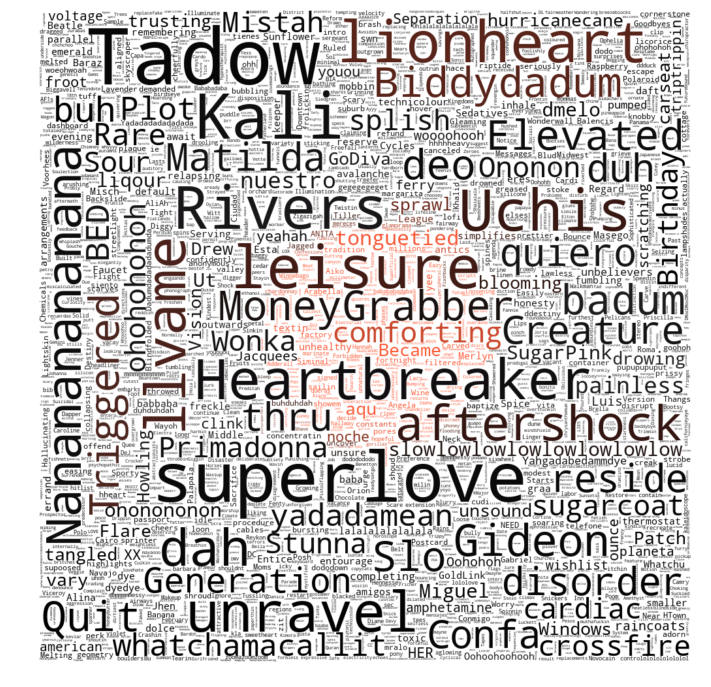

jazz


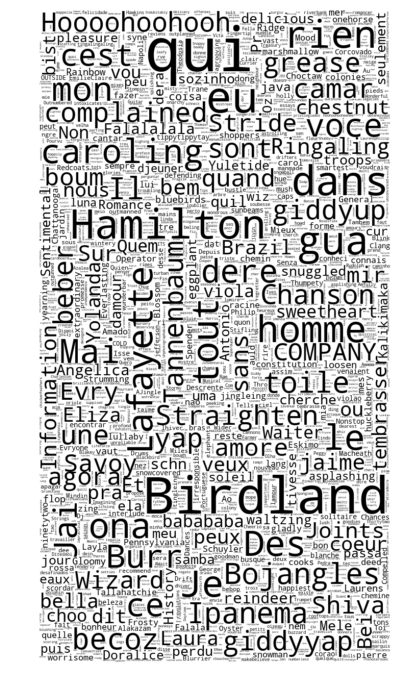

soul


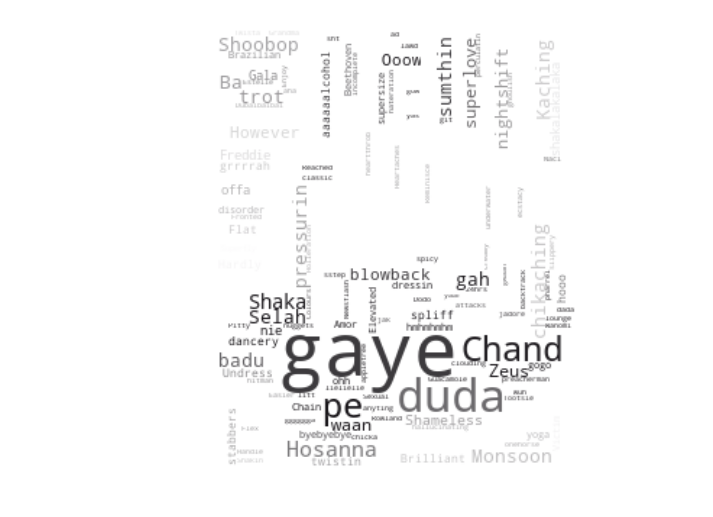

pop


NotImplementedError: Gray-scale images TODO

<Figure size 864x864 with 0 Axes>

In [45]:
for genre in word_freq_dict.keys():
    print(genre)
    if (genre == 'full'):
        continue
    genre_str = ""
    for term in tf_idf_dict[genre].keys():
        genre_str += (term + " ") * int(round(tf_idf_dict[genre][term], 0))

    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    genre_mask = np.array(Image.open(path.join(d, "./wc/tfidf/" + genre +"_rgb.png")))

    #Create wordcloud object
    wc = WordCloud(collocations=False, background_color="white", max_words=10000, mask=genre_mask, 
                   stopwords = [], max_font_size=120, random_state=42)

    #Generate word cloud
    wc.generate(genre_str)

    #Base the colors of the wordcloud to the colors of the image
    image_colors = ImageColorGenerator(genre_mask)
    #Change figure size
    plt.figure(figsize=[12,12])
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    _=plt.show()

Indie is an adjective for a genre (indie rock, indie pop, indie hip hop) etc. mentioning the way that a record has been produced or how the artists conducts himself.

Thus we receive some results in our word cloud in accordance to that.

number of words per song and plot
most common words (wordcloud?)
put all in one str (and one per genre)

collocations per genre


create tfidf and follow it to
make wordclouds

make wordclouds per artists for examples (per genre)

WordCloud(
                      font_path='pics/CabinSketch-Bold.ttf',
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(wordsString)

see percentage of brands mentioned
who advertises the most?
what genre advertises the most?

make sentiment distributions per artist - connect with other artists that are within a stddev of him
make sentiment distribution
make sentiment distribution per genre

top 10 saddest and happiest songs (and per genre)
top 10 words of the most emotional songs

DO FUNKY THINGS WITH TITLES

RELEWSE DATE

LINGUISTICS 

text analyse collabz - do collabz have a certain feature differently?

geo location of collaborating artists (vizualize on map)
